# IMAGE FORMATION LAB-1 #
<font color = "orange">*Sudarsanan A K <BR>
    SC21M063*</font>

**Outline** :
1. Pinhole Camera Model
2. Homogeneous Coordinates
3. Intrinsic and Extrinsic Camera Matrices
4. Lense Effects
5. Camera Calibration

 # Pinhole Camera Model # 

In 2D, <br>
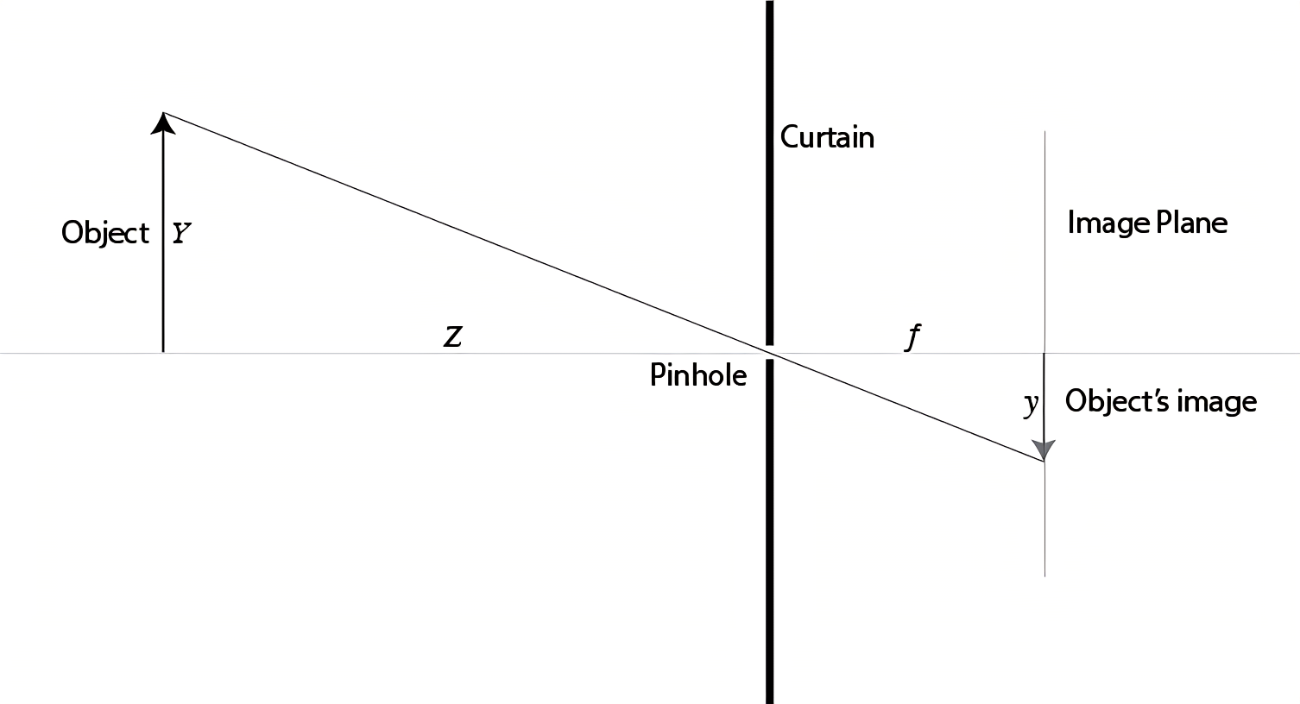

 
From figure, using similar triangle arguments, $Y/Z =y/f$ <br>
Rearanging the above expression, $y = fY/Z$

In 3D, <br>
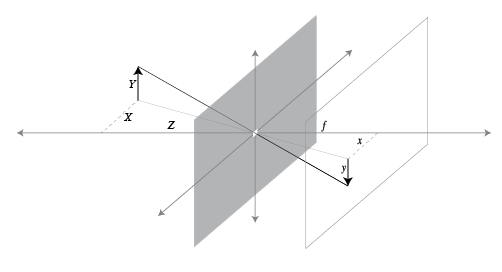


Pinhole model describes the relationship between a $3d$ point  $(X,Y,Z)$  and its imaging location  $(x,y)$ . <br> Here  $f$  is the distance of the image plane and the pinhole, also known as the focal length, and $Z$ is the distance of the point from the pinhole. <br> This formulation assumes that pinhole is situated at location  $(0,0,0)$ , or the origin, and the camera's optical axis is aligned with the global $z$-axis

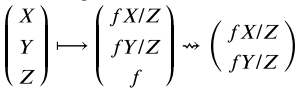

# Homogeneous Coordinates #

**From Cartesian Coordinates to Homogeneous Coordinates**,

$$(x,y)→(x,y,1)$$ <br>
$$(x,y,z)→(x,y,z,1)$$

Example
$$(2,3)→(2,3,1)$$
$$(10,−4,−2)→(10,−4,−2,1)$$

**From Homogeneous Coordinates to Cartesian Coordinates**,

$$(x,y,w)→(x/w,y/w)$$
$$(x,y,z,w)→(x/w,y/w,z/w)$$

Example, <br>
$$(6,−2,2)→(3,−1)$$
$$(9,−24,−3,−3)→(−3,8,1)$$

**Homogeneous Coordinates Properties :** 

Invariant to Scaling, i.e.,  $(x,y,w)=k(x,y,w)$ . Both  $(x,y,w)$  and  $(kx,ky,kw)$  represent the same $2D$ Cartesian point  $(x/w,y/w)$.

<font color="cyan"><u>**Constructing a Line :** </font>

Consider two $2D$ Cartesian points  $(x1,y1)$ and  $(x2,y2)$. We can find the line that passes through these points using cross-product in homogeneous coordinates

Recall that equation of a line is  $ax+by+c=0$  then
$$(a,b,c)=(x1,y1,1)×(x2,y2,1)$$

**Proof**

If line  $ax+by+c=0$  satisfies points  $(x1,y1)$  and  $(x2,y2)$  then the following must be true $$ax1+by1+c = 0$$ $$ax2+by2+c=0$$

We can re-write these equations in terms of the dot product of two vectors $\begin{bmatrix} a & b & c \end{bmatrix} \begin{bmatrix} x1 \\ y1 \\ 1 \end{bmatrix} = 0$ and $\begin{bmatrix} a & b & c \end{bmatrix} \begin{bmatrix} x2 \\ y2 \\ 1 \end{bmatrix} = 0$. The dot product of two vectors is only zero if the two vectors are perpendicular to each other. This suggests that vector $\begin{bmatrix} a & b & c \end{bmatrix}$ is perpendicular to both $\begin{bmatrix} x1 & y1 & 1 \end{bmatrix}$ and $\begin{bmatrix} x2 & y2 & 1 \end{bmatrix}$


Given two vectors, their cross-product returns a vector that is perpendicular to both vectors. Consequently, we can compute $ \begin{bmatrix} a & b & c \end{bmatrix} $ by taking a cross-product of vectors   $\begin{bmatrix} x1 & y1 & 1 \end{bmatrix}$ and $\begin{bmatrix} x2 & y2 & 1 \end{bmatrix}$

**Cross-Product**

Cross-product of two vectors  $(d, e, f)$ and  $(r, s, t)$ is computed as seen below. $$ (d, e, f) x (r, s, t) = det \begin{bmatrix} i & j & k \\ d & e  & f \\ r & s & t \end{bmatrix} $$

<font color="magenta">**Exercise:</font> <font color = "yellow">computing a representation of a line from homogenous coordinates**</font>

Find a representation of the line between points **$a = (1,2)$**  and  **$b = (4,3)$**  using homogeneous coordinates.

In [1]:
import numpy as np
import math
from scipy import linalg

In [4]:
a = [1, 2]
b = [4, 3]
ah = [1, 2, 1]  # point a in homogeneous coordinates (augmented vector)
bh = [4, 3, 1]  # point b in homogeneous coordinates (augmented vector)
[p, q, r] = np.cross(ah, bh) # l = x1 x x2
print(f" The equation of the line passing through point a(1, 2) and b(4, 3) is {p}x + {q}y {r} = 0") # equation of line px + qy + r = 0

 The equation of the line passing through point a(1, 2) and b(4, 3) is -1x + 3y -5 = 0


<font color="cyan"><u>**Intersecting Lines :**<font> 

Given two lines  $a1x+b1y+c1=0$  and  $a2x+b2y+c2=0$ , we can compute their intersection using cross-product as follows:

**Step 1: Find intersection point in homogeneous coordinates** $$(x,y,w)=(a1,b1,c1)×(a2,b2,c2)$$ <br>
**Step 2: Compute Cartesian coordinates from homogeneous coordinates** <br>
Intersection point is then  $(x/w,y/w)$

<font color = "yellow">**Proof**</font>

<font color = "yellow">if point $(x,y)$ is the intersecting point of the lines $(a1,b1,c1)$ and $(a2,b2,c2)$ then folowing must be true. $$a1x+b1y+c1=0$$ $$a2x+b2y+c2=0$$ <br> This can be re-written as $\begin{bmatrix} a1 & b1 & c1 \end{bmatrix}\begin{bmatrix} x \\ y \\ 1 \end{bmatrix} = 0$ and $\begin{bmatrix} a2 & b2 & c2 \end{bmatrix}$ $\begin{bmatrix} x \\ y \\ 1 \end{bmatrix} = 0$, repectively.<br> This implies that both the vectors $(a1,b1,c1)$ and $(a2,b2,c2)$ are perpendicular to the vector $(x,y,1)$. Thus we can compute $\begin{bmatrix} x \\ y \\ 1 \end{bmatrix}$ by taking cross-product of vectors $\begin{bmatrix} a1 & b1 & c1 \end{bmatrix}$ and $\begin{bmatrix} a2 & b2 & c2 \end{bmatrix}$ </font>

Example: finding the intersection of two lines using homogeneous coordinates

Use homogeneous coordinates to determine the intersection location for the following two lines.$$3x−y+7 = 0$$$$ 2x−y+1=0$$

In [5]:
l1 = np.array([3,-1,7])
l2 = np.array([2,-1,1])

ph = np.cross(l1, l2)
print('ph = {}'.format(ph))

p = ph[:2] / ph[2]
print('p = {}'.format(p))
print('Point p sits on l1: {}'.format(math.isclose(np.dot(l1, np.append(p,[1])), 0.0)))
print('Point p sits on l2: {}'.format(math.isclose(np.dot(l2, np.append(p,[1])), 0.0)))

ph = [ 6 11 -1]
p = [ -6. -11.]
Point p sits on l1: True
Point p sits on l2: True
<class 'numpy.ndarray'>


<font color="magenta">**Exercise:</font> <font color = "yellow">finding the intersection of two lines using homogeneous coordinates** </font><br>
    Find intersection location for the following two lines. $$ 3x−y+7 = 0 $$ $$ 3x−y−3=0$$

In [5]:
# Answer
l1 = np.array([3,-1,7])
l2 = np.array([3,-1,-3])

ph = np.cross(l1, l2)
print('ph = {}'.format(ph))

if ph[2] == 0:  # checking for ideal point (point at infinity)
    print("The two lines are parllel to each other and the intersection point is at infinity")
else:
    p = ph[:2] / ph[2]
    print('p = {}'.format(p))
    print('Point p sits on l1: {}'.format(math.isclose(np.dot(l1, np.append(p,[1])), 0.0)))
    print('Point p sits on l2: {}'.format(math.isclose(np.dot(l2, np.append(p,[1])), 0.0)))
    print(f'Point {p} is the intersecting point of the lines {l1} and {l2} ')

ph = [10 30  0]
The two lines are parllel to each other and the intersection point is at infinity


**Parallel Lines :**

$w=0$  if two lines are parallel. We say that these lines intersect at infinity. This suggests that it is possible to represent points at infinity in homogeneous coordinates. Just set the homogeneous coordinate to  $0$ .

**Points at Infinity :**

We can represent a point at infinity by setting its  $w=0$. <br> E.g., Homogeneous coordinate  $(3,−1,3,0)$  represents a point at infinity in the direction  $(3,−1,3,0)$.

# Back to Pinhole Model #

We now develop a mathematical model for pinhole cameras. This discussion follows [Multiple View Geometry in Computer Vision (2nd Ed.)](https://www.robots.ox.ac.uk/~vgg/hzbook/) by Harley and Zisserman. For the following discussion we assume the following camera geometry.

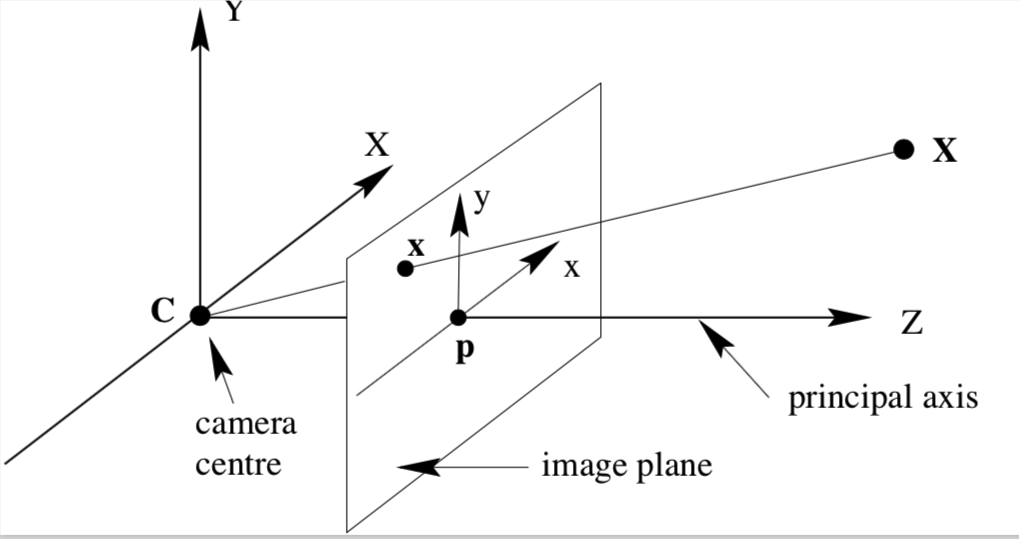 <br>Picture from Multiple View Geometry in Computer Vision, Second Edition

This assumes that the image plane sits in front of the pinhole. Obviously, no physical camera has this property. Never the less it is mathematically convenient (and equivalent) to model pinhole cameras as such

* Camera centre sits at the origin of the Euclidean coordinate system Camera centre is also known as center of projection or optical centre
* Image plane (also known as the focal plane) sits at  $Z=f$ 
* Point in 3D space $X = (x,y,z)^T$
* This point is mapped to $(fX/Z,fY/Z,f)$
* Image coordinates are (just drop  $f$) $(fX/Z,fY/Z)$
* Principal axis or principal ray is the line perpendicular to the image plane and passing through the centre of projection
* Principal point is the intersection location of image plane with the principal axis
* Principal plane is parallel to the image plane and passes through the centre of projection

## Using Homogeneous Coordinates ##

We can describe the pinhole camera model using homoegenous coordinates as follows

$\begin{bmatrix} X \\ Y \\ Z \\ 1 \end{bmatrix} ⟼ \begin{bmatrix} fX \\ fY \\ Z  \end{bmatrix}$ = $\begin{bmatrix} f  &  &  &  0 \\   & f &   & 0\\   &   & 1 & 0  \end{bmatrix}\begin{bmatrix} X \\ Y \\ Z \\ 1 \end{bmatrix}$ <br>
$= diag(f,f,1)\begin{bmatrix} I | 0 \end{bmatrix}\begin{bmatrix} X \\ Y \\ Z \\ 1 \end{bmatrix}$

We set $P = diag(f,f,1)\begin{bmatrix} I | 0 \end{bmatrix}$ <br>
to denote the projection matrix. Specifically, we use  **P**  to map $3D$ points  **X**  to image points  **x** :
$$x = PX$$ <br>
Under these assumptions,  **P**  has one degree-of-freedom, namely, the parameter  $f$ .

## Principal Point Offset ##

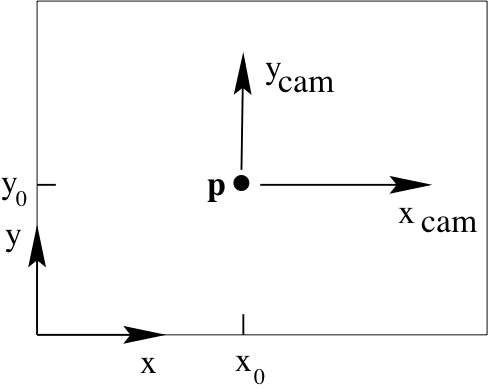 <br>Figure from Multiple View Geometry in Computer Vision, Second Edition

The above discussion assumes that the principle point sits at the origin of the coordinates in the image plane. Lets relax this assumption. <br>
Say $(px,py)$  are the coordinates of the principal point. Then,

$\begin{bmatrix} X \\ Y \\ Z \\ 1 \end{bmatrix} ⟼ \begin{bmatrix} fX+pxZ \\ fY+pyZ \\ Z  \end{bmatrix}$ = $\begin{bmatrix} f  &  &px&  0 \\   & f &py& 0\\   &   & 1 & 0  \end{bmatrix}\begin{bmatrix} X \\ Y \\ Z \\ 1 \end{bmatrix}$ <br>
= **K**$\begin{bmatrix} I | 0 \end{bmatrix}$ **X**$_{cam}$

Note  **X**$_{cam}$ . This captures our assumption that the camera centre is located at the origin of the Euclidean coordinate system (we can think of this as the world coordinate system) with camera pointing straight down the  $z -axis$.  **X**$_{cam}$  denotes that the point is expressed in the camera coordinate system.

In this case, we set projection matrix to <br>
**P** = **K**$\begin{bmatrix} I | 0 \end{bmatrix}$


<font color = "magenta">**Exercise:</font><font color = "yellow"> Degrees of freedom of a projection matrix**</font>

How many degrees of freedom does a projection matrix have when the camera centre is assumed to be fixed at the origin with the camera pointing straight down the  z -axis? That is, how many parameters are required to specify a projection matrix  **P**  uniquely under these assumptions?

<font color = "yellow">**Answer:** The projection matrix when the camera centre is assumed to be fixed at the origin with the camera pointing straight down the  $z -axis$ is given by **P** = $\begin{bmatrix} f  &  &px&  0 \\   & f &py& 0\\   &   & 1 & 0  \end{bmatrix}$ <br> Thus inorder to specify the matrix uniquely, we will require $3$ parameters $(f, px   \& py)$ ,which means, the Degrees-of-Freedom that the projection matrix is having under these assumptions is $3$ </font>

## Camera Rotation and Translation ##

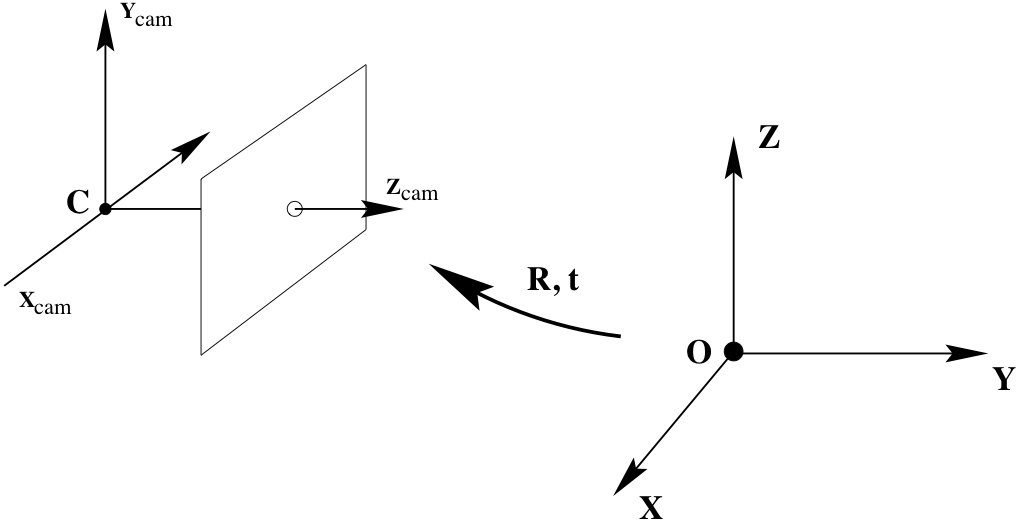<br>Figure from Multiple View Geometry in Computer Vision, Second Edition 

Now we relax our assumption that the camera centre is located at the origin of the Euclidean coordinate system (we can think of this as the world coordinate system) with camera pointing straight down the  $z -axis$.

Say camera centre in inhomogeneous coordinates is C~ and that camera rotation is represented by matrix  **R** . Then we can transform an inhomogeneous point  $X$~  in the world coordinate system to an inhomogeneous point  $X_{cam}$~ in the camera coordinates system as follows



$$Xcam`=R(X`−C`)$$

We can re-write this as follows 

$X_{cam}$ = $\begin{bmatrix} R & -RC` \\ 0 & 1\end{bmatrix} \begin{bmatrix} X \\ Y \\ Z \\ 1\end{bmatrix}$

Putting it all together

$$x = KR\begin{bmatrix} I |  -C` \end{bmatrix}X$$

It is often convenient to set  $t=−RC`$ . Then we can rewrite the above as follows
$$P=K\begin{bmatrix}R | t\end{bmatrix}$$

<font color = "magenta">**Exercise:</font><font color = "yellow"> Degrees of freedom of a projection matrix**</font>

How many degrees of freedom does a projection matrix have when the camera centre is assumed to be fixed at  $C`$  and the camera's rotation is represented by matrix  **R** ? That is, how many parameters are required to specify a projection matrix  **P**  uniquely under these assumptions?

<font color = "yellow">**Answer:** When the camera center is fixed at $C`$, we will be having $3$ possible traslations (along $X$, $Y$ & $Z$) and the rotation matrix **R** will be having  $3$ independent components for rotation about each of the $3$ axes. Thus, a total of $6$ distinct parameters are required for uniquely specify the projection matrix. Therefore, DoF of the projection matrix under these assumptions is $6$</font>

## CCD Pixel Sizes and Skew ##

Thus far we have assumed that image coordinates have equal scales in  $x$  and  $y$ . If the number of pixels per unit distance in image coordinates are  $mx$  and  $my$  in the  $x$  and  $y$  directions then we re-write  **K**  as follows

$$K = \begin{bmatrix}\alpha_{x}  & s & x_0 \\  & \alpha_{y} & y_0 \\  & & 1\end{bmatrix}$$

where  $\alpha_{x}=fm_x$ ,  $\alpha_{y}=fm_{y}$ ,  $x_0=m_xp_x ,  y_0=m_yp_y ,  s$  is the skew term, which is often  $0$ . Note that  $x_0$  and  $y_0$  are the coordiantes of the principal point in terms of pixel dimensions in  $x$  and  $y$  directions.  $s$  becomes non-zero under special circumstances when lens is not aligned with the image plane.

<font color = "magenta">**Exercise:</font><font color = "yellow"> Degrees of freedom of a projection matrix</font>**

How many degrees of freedom does a projection matrix have when the camera centre is assumed to be fixed at  $C`$  and the camera's rotation is represented by matrix  **R**  when the pixels are non-uniformly scaled as just described? That is, how many parameters are required to specify a projection matrix  P  uniquely under these assumptions?

<font color = "yellow">**Answer:** Under these assumptions, the projection matrix gets $5$ more degrees-of-freedom along with the previous $6$ degrees-of-freedom. Thus a total of $6+5 = 11$ distinct parameters will be required to uniquely specify the projection matrix and therefore, the degree-of-freedom will be $11$</font>

## Putting it all together ##

We get the following equation that describes the mapping from world points to image points.
$$ x = PX$$
$$ x = K\begin{bmatrix} R  &|&  t \end{bmatrix}X$$
Note that  **P**  is the same as a homogeneous  $3×4$  matrix defined upto an arbitrary scale of rank $3$. Projective matrices of rank less than $3$ do not span the image plane. The projections might degenerate to a line or a point.

## _Extrinsic_ and _Intrinsic_ matrices ##

We refer to  **K**  as the intrinsic matrix, and  $[R | t]$  is the extrinsic matrix.

## Properties of  **P** ##

To make the following discussion easier, let's express  **P**  as $$P = \begin{bmatrix} M&|&P_4\end{bmatrix}$$ <br>
Here  **M**  is the top-left  $3×3$  submatrix of  **P**  and  $p_4$  is the last column of  **P** . Furthermore, let  p$^{iT}$  and  $p_j$  represent the  $i$ -th row and  $j$ -th column of  **P** , respectively. We can similarly denote rows and columns of  **M** .

<div class="text_cell_render border-box-sizing rendered_html">
<p><strong>Matrix</strong> <span class="MathJax_Preview" style="color: inherit;"></span><span class="MathJax" id="MathJax-Element-129-Frame" tabindex="0" data-mathml="<math xmlns=&quot;http://www.w3.org/1998/Math/MathML&quot;><mi mathvariant=&quot;monospace&quot;>M</mi></math>" role="presentation" style="position: relative;"><nobr aria-hidden="true"><span class="math" id="MathJax-Span-2055" style="width: 0.658em; display: inline-block;"><span style="display: inline-block; position: relative; width: 0.539em; height: 0px; font-size: 120%;"><span style="position: absolute; clip: rect(1.372em, 1000.54em, 2.324em, -999.997em); top: -2.14em; left: 0em;"><span class="mrow" id="MathJax-Span-2056"><span class="texatom" id="MathJax-Span-2057"><span class="mrow" id="MathJax-Span-2058"><span class="mi" id="MathJax-Span-2059" style="font-family: MathJax_Typewriter;">M</span></span></span></span><span style="display: inline-block; width: 0px; height: 2.146em;"></span></span></span><span style="display: inline-block; overflow: hidden; vertical-align: -0.068em; border-left: 0px solid; width: 0px; height: 0.861em;"></span></span></nobr><span class="MJX_Assistive_MathML" role="presentation"><math xmlns="http://www.w3.org/1998/Math/MathML"><mi mathvariant="monospace">M</mi></math></span></span><script type="math/tex" id="MathJax-Element-129">\mathtt{M}</script></p>
<p>Recall that 
<span class="MathJax_Preview" style="color: inherit;"></span><span class="MathJax" id="MathJax-Element-130-Frame" tabindex="0" data-mathml="<math xmlns=&quot;http://www.w3.org/1998/Math/MathML&quot;><mi mathvariant=&quot;monospace&quot;>P</mi><mo>=</mo><mrow><mo>[</mo><mtable columnalign=&quot;center center center center&quot; rowspacing=&quot;4pt&quot; columnspacing=&quot;1em&quot;><mtr><mtd><msub><mi>p</mi><mn>11</mn></msub></mtd><mtd><msub><mi>p</mi><mn>12</mn></msub></mtd><mtd><msub><mi>p</mi><mn>13</mn></msub></mtd><mtd><msub><mi>p</mi><mn>14</mn></msub></mtd></mtr><mtr><mtd><msub><mi>p</mi><mn>21</mn></msub></mtd><mtd><msub><mi>p</mi><mn>22</mn></msub></mtd><mtd><msub><mi>p</mi><mn>23</mn></msub></mtd><mtd><msub><mi>p</mi><mn>24</mn></msub></mtd></mtr><mtr><mtd><msub><mi>p</mi><mn>31</mn></msub></mtd><mtd><msub><mi>p</mi><mn>32</mn></msub></mtd><mtd><msub><mi>p</mi><mn>33</mn></msub></mtd><mtd><msub><mi>p</mi><mn>34</mn></msub></mtd></mtr></mtable><mo>]</mo></mrow><mo>.</mo></math>" role="presentation" style="position: relative;"><nobr aria-hidden="true"><span class="math" id="MathJax-Span-2060" style="width: 14.646em; display: inline-block;"><span style="display: inline-block; position: relative; width: 12.205em; height: 0px; font-size: 120%;"><span style="position: absolute; clip: rect(2.027em, 1012.15em, 6.193em, -999.997em); top: -4.342em; left: 0em;"><span class="mrow" id="MathJax-Span-2061"><span class="texatom" id="MathJax-Span-2062"><span class="mrow" id="MathJax-Span-2063"><span class="mi" id="MathJax-Span-2064" style="font-family: MathJax_Typewriter;">P</span></span></span><span class="mo" id="MathJax-Span-2065" style="font-family: MathJax_Main; padding-left: 0.301em;">=</span><span class="mrow" id="MathJax-Span-2066" style="padding-left: 0.301em;"><span class="mo" id="MathJax-Span-2067" style="vertical-align: 2.146em;"><span style="display: inline-block; position: relative; width: 0.658em; height: 0px;"><span style="position: absolute; font-family: MathJax_Size4; top: -2.854em; left: 0em;">⎡<span style="display: inline-block; width: 0px; height: 3.991em;"></span></span><span style="position: absolute; font-family: MathJax_Size4; top: -0.83em; left: 0em;">⎣<span style="display: inline-block; width: 0px; height: 3.991em;"></span></span><span style="font-family: MathJax_Size4; position: absolute; top: -1.783em; left: 0em;">⎢<span style="display: inline-block; width: 0px; height: 3.991em;"></span></span></span></span><span class="mtable" id="MathJax-Span-2068"><span style="display: inline-block; position: relative; width: 8.158em; height: 0px; margin-right: 0.182em; margin-left: 0.182em;"><span style="position: absolute; clip: rect(2.503em, 1001.31em, 6.313em, -999.997em); top: -4.461em; left: 0em;"><span style="display: inline-block; position: relative; width: 1.313em; height: 0px;"><span style="position: absolute; clip: rect(3.396em, 1001.31em, 4.348em, -999.997em); top: -5.354em; left: 50%; margin-left: -0.652em;"><span class="mtd" id="MathJax-Span-2069"><span class="mrow" id="MathJax-Span-2070"><span class="msubsup" id="MathJax-Span-2071"><span style="display: inline-block; position: relative; width: 1.313em; height: 0px;"><span style="position: absolute; clip: rect(3.396em, 1000.48em, 4.348em, -999.997em); top: -3.985em; left: 0em;"><span class="mi" id="MathJax-Span-2072" style="font-family: MathJax_Math-italic;">p</span><span style="display: inline-block; width: 0px; height: 3.991em;"></span></span><span style="position: absolute; top: -3.807em; left: 0.479em;"><span class="texatom" id="MathJax-Span-2073"><span class="mrow" id="MathJax-Span-2074"><span class="mn" id="MathJax-Span-2075" style="font-size: 70.7%; font-family: MathJax_Main;">11</span></span></span><span style="display: inline-block; width: 0px; height: 3.991em;"></span></span></span></span></span></span><span style="display: inline-block; width: 0px; height: 3.991em;"></span></span><span style="position: absolute; clip: rect(3.396em, 1001.31em, 4.348em, -999.997em); top: -3.926em; left: 50%; margin-left: -0.652em;"><span class="mtd" id="MathJax-Span-2097"><span class="mrow" id="MathJax-Span-2098"><span class="msubsup" id="MathJax-Span-2099"><span style="display: inline-block; position: relative; width: 1.313em; height: 0px;"><span style="position: absolute; clip: rect(3.396em, 1000.48em, 4.348em, -999.997em); top: -3.985em; left: 0em;"><span class="mi" id="MathJax-Span-2100" style="font-family: MathJax_Math-italic;">p</span><span style="display: inline-block; width: 0px; height: 3.991em;"></span></span><span style="position: absolute; top: -3.807em; left: 0.479em;"><span class="texatom" id="MathJax-Span-2101"><span class="mrow" id="MathJax-Span-2102"><span class="mn" id="MathJax-Span-2103" style="font-size: 70.7%; font-family: MathJax_Main;">21</span></span></span><span style="display: inline-block; width: 0px; height: 3.991em;"></span></span></span></span></span></span><span style="display: inline-block; width: 0px; height: 3.991em;"></span></span><span style="position: absolute; clip: rect(3.396em, 1001.31em, 4.348em, -999.997em); top: -2.557em; left: 50%; margin-left: -0.652em;"><span class="mtd" id="MathJax-Span-2125"><span class="mrow" id="MathJax-Span-2126"><span class="msubsup" id="MathJax-Span-2127"><span style="display: inline-block; position: relative; width: 1.313em; height: 0px;"><span style="position: absolute; clip: rect(3.396em, 1000.48em, 4.348em, -999.997em); top: -3.985em; left: 0em;"><span class="mi" id="MathJax-Span-2128" style="font-family: MathJax_Math-italic;">p</span><span style="display: inline-block; width: 0px; height: 3.991em;"></span></span><span style="position: absolute; top: -3.807em; left: 0.479em;"><span class="texatom" id="MathJax-Span-2129"><span class="mrow" id="MathJax-Span-2130"><span class="mn" id="MathJax-Span-2131" style="font-size: 70.7%; font-family: MathJax_Main;">31</span></span></span><span style="display: inline-block; width: 0px; height: 3.991em;"></span></span></span></span></span></span><span style="display: inline-block; width: 0px; height: 3.991em;"></span></span></span><span style="display: inline-block; width: 0px; height: 4.467em;"></span></span><span style="position: absolute; clip: rect(2.503em, 1001.31em, 6.313em, -999.997em); top: -4.461em; left: 2.265em;"><span style="display: inline-block; position: relative; width: 1.313em; height: 0px;"><span style="position: absolute; clip: rect(3.396em, 1001.31em, 4.348em, -999.997em); top: -5.354em; left: 50%; margin-left: -0.652em;"><span class="mtd" id="MathJax-Span-2076"><span class="mrow" id="MathJax-Span-2077"><span class="msubsup" id="MathJax-Span-2078"><span style="display: inline-block; position: relative; width: 1.313em; height: 0px;"><span style="position: absolute; clip: rect(3.396em, 1000.48em, 4.348em, -999.997em); top: -3.985em; left: 0em;"><span class="mi" id="MathJax-Span-2079" style="font-family: MathJax_Math-italic;">p</span><span style="display: inline-block; width: 0px; height: 3.991em;"></span></span><span style="position: absolute; top: -3.807em; left: 0.479em;"><span class="texatom" id="MathJax-Span-2080"><span class="mrow" id="MathJax-Span-2081"><span class="mn" id="MathJax-Span-2082" style="font-size: 70.7%; font-family: MathJax_Main;">12</span></span></span><span style="display: inline-block; width: 0px; height: 3.991em;"></span></span></span></span></span></span><span style="display: inline-block; width: 0px; height: 3.991em;"></span></span><span style="position: absolute; clip: rect(3.396em, 1001.31em, 4.348em, -999.997em); top: -3.926em; left: 50%; margin-left: -0.652em;"><span class="mtd" id="MathJax-Span-2104"><span class="mrow" id="MathJax-Span-2105"><span class="msubsup" id="MathJax-Span-2106"><span style="display: inline-block; position: relative; width: 1.313em; height: 0px;"><span style="position: absolute; clip: rect(3.396em, 1000.48em, 4.348em, -999.997em); top: -3.985em; left: 0em;"><span class="mi" id="MathJax-Span-2107" style="font-family: MathJax_Math-italic;">p</span><span style="display: inline-block; width: 0px; height: 3.991em;"></span></span><span style="position: absolute; top: -3.807em; left: 0.479em;"><span class="texatom" id="MathJax-Span-2108"><span class="mrow" id="MathJax-Span-2109"><span class="mn" id="MathJax-Span-2110" style="font-size: 70.7%; font-family: MathJax_Main;">22</span></span></span><span style="display: inline-block; width: 0px; height: 3.991em;"></span></span></span></span></span></span><span style="display: inline-block; width: 0px; height: 3.991em;"></span></span><span style="position: absolute; clip: rect(3.396em, 1001.31em, 4.348em, -999.997em); top: -2.557em; left: 50%; margin-left: -0.652em;"><span class="mtd" id="MathJax-Span-2132"><span class="mrow" id="MathJax-Span-2133"><span class="msubsup" id="MathJax-Span-2134"><span style="display: inline-block; position: relative; width: 1.313em; height: 0px;"><span style="position: absolute; clip: rect(3.396em, 1000.48em, 4.348em, -999.997em); top: -3.985em; left: 0em;"><span class="mi" id="MathJax-Span-2135" style="font-family: MathJax_Math-italic;">p</span><span style="display: inline-block; width: 0px; height: 3.991em;"></span></span><span style="position: absolute; top: -3.807em; left: 0.479em;"><span class="texatom" id="MathJax-Span-2136"><span class="mrow" id="MathJax-Span-2137"><span class="mn" id="MathJax-Span-2138" style="font-size: 70.7%; font-family: MathJax_Main;">32</span></span></span><span style="display: inline-block; width: 0px; height: 3.991em;"></span></span></span></span></span></span><span style="display: inline-block; width: 0px; height: 3.991em;"></span></span></span><span style="display: inline-block; width: 0px; height: 4.467em;"></span></span><span style="position: absolute; clip: rect(2.503em, 1001.31em, 6.313em, -999.997em); top: -4.461em; left: 4.586em;"><span style="display: inline-block; position: relative; width: 1.313em; height: 0px;"><span style="position: absolute; clip: rect(3.396em, 1001.31em, 4.348em, -999.997em); top: -5.354em; left: 50%; margin-left: -0.652em;"><span class="mtd" id="MathJax-Span-2083"><span class="mrow" id="MathJax-Span-2084"><span class="msubsup" id="MathJax-Span-2085"><span style="display: inline-block; position: relative; width: 1.313em; height: 0px;"><span style="position: absolute; clip: rect(3.396em, 1000.48em, 4.348em, -999.997em); top: -3.985em; left: 0em;"><span class="mi" id="MathJax-Span-2086" style="font-family: MathJax_Math-italic;">p</span><span style="display: inline-block; width: 0px; height: 3.991em;"></span></span><span style="position: absolute; top: -3.807em; left: 0.479em;"><span class="texatom" id="MathJax-Span-2087"><span class="mrow" id="MathJax-Span-2088"><span class="mn" id="MathJax-Span-2089" style="font-size: 70.7%; font-family: MathJax_Main;">13</span></span></span><span style="display: inline-block; width: 0px; height: 3.991em;"></span></span></span></span></span></span><span style="display: inline-block; width: 0px; height: 3.991em;"></span></span><span style="position: absolute; clip: rect(3.396em, 1001.31em, 4.348em, -999.997em); top: -3.926em; left: 50%; margin-left: -0.652em;"><span class="mtd" id="MathJax-Span-2111"><span class="mrow" id="MathJax-Span-2112"><span class="msubsup" id="MathJax-Span-2113"><span style="display: inline-block; position: relative; width: 1.313em; height: 0px;"><span style="position: absolute; clip: rect(3.396em, 1000.48em, 4.348em, -999.997em); top: -3.985em; left: 0em;"><span class="mi" id="MathJax-Span-2114" style="font-family: MathJax_Math-italic;">p</span><span style="display: inline-block; width: 0px; height: 3.991em;"></span></span><span style="position: absolute; top: -3.807em; left: 0.479em;"><span class="texatom" id="MathJax-Span-2115"><span class="mrow" id="MathJax-Span-2116"><span class="mn" id="MathJax-Span-2117" style="font-size: 70.7%; font-family: MathJax_Main;">23</span></span></span><span style="display: inline-block; width: 0px; height: 3.991em;"></span></span></span></span></span></span><span style="display: inline-block; width: 0px; height: 3.991em;"></span></span><span style="position: absolute; clip: rect(3.396em, 1001.31em, 4.348em, -999.997em); top: -2.557em; left: 50%; margin-left: -0.652em;"><span class="mtd" id="MathJax-Span-2139"><span class="mrow" id="MathJax-Span-2140"><span class="msubsup" id="MathJax-Span-2141"><span style="display: inline-block; position: relative; width: 1.313em; height: 0px;"><span style="position: absolute; clip: rect(3.396em, 1000.48em, 4.348em, -999.997em); top: -3.985em; left: 0em;"><span class="mi" id="MathJax-Span-2142" style="font-family: MathJax_Math-italic;">p</span><span style="display: inline-block; width: 0px; height: 3.991em;"></span></span><span style="position: absolute; top: -3.807em; left: 0.479em;"><span class="texatom" id="MathJax-Span-2143"><span class="mrow" id="MathJax-Span-2144"><span class="mn" id="MathJax-Span-2145" style="font-size: 70.7%; font-family: MathJax_Main;">33</span></span></span><span style="display: inline-block; width: 0px; height: 3.991em;"></span></span></span></span></span></span><span style="display: inline-block; width: 0px; height: 3.991em;"></span></span></span><span style="display: inline-block; width: 0px; height: 4.467em;"></span></span><span style="position: absolute; clip: rect(2.503em, 1001.31em, 6.313em, -999.997em); top: -4.461em; left: 6.848em;"><span style="display: inline-block; position: relative; width: 1.313em; height: 0px;"><span style="position: absolute; clip: rect(3.396em, 1001.31em, 4.348em, -999.997em); top: -5.354em; left: 50%; margin-left: -0.652em;"><span class="mtd" id="MathJax-Span-2090"><span class="mrow" id="MathJax-Span-2091"><span class="msubsup" id="MathJax-Span-2092"><span style="display: inline-block; position: relative; width: 1.313em; height: 0px;"><span style="position: absolute; clip: rect(3.396em, 1000.48em, 4.348em, -999.997em); top: -3.985em; left: 0em;"><span class="mi" id="MathJax-Span-2093" style="font-family: MathJax_Math-italic;">p</span><span style="display: inline-block; width: 0px; height: 3.991em;"></span></span><span style="position: absolute; top: -3.807em; left: 0.479em;"><span class="texatom" id="MathJax-Span-2094"><span class="mrow" id="MathJax-Span-2095"><span class="mn" id="MathJax-Span-2096" style="font-size: 70.7%; font-family: MathJax_Main;">14</span></span></span><span style="display: inline-block; width: 0px; height: 3.991em;"></span></span></span></span></span></span><span style="display: inline-block; width: 0px; height: 3.991em;"></span></span><span style="position: absolute; clip: rect(3.396em, 1001.31em, 4.348em, -999.997em); top: -3.926em; left: 50%; margin-left: -0.652em;"><span class="mtd" id="MathJax-Span-2118"><span class="mrow" id="MathJax-Span-2119"><span class="msubsup" id="MathJax-Span-2120"><span style="display: inline-block; position: relative; width: 1.313em; height: 0px;"><span style="position: absolute; clip: rect(3.396em, 1000.48em, 4.348em, -999.997em); top: -3.985em; left: 0em;"><span class="mi" id="MathJax-Span-2121" style="font-family: MathJax_Math-italic;">p</span><span style="display: inline-block; width: 0px; height: 3.991em;"></span></span><span style="position: absolute; top: -3.807em; left: 0.479em;"><span class="texatom" id="MathJax-Span-2122"><span class="mrow" id="MathJax-Span-2123"><span class="mn" id="MathJax-Span-2124" style="font-size: 70.7%; font-family: MathJax_Main;">24</span></span></span><span style="display: inline-block; width: 0px; height: 3.991em;"></span></span></span></span></span></span><span style="display: inline-block; width: 0px; height: 3.991em;"></span></span><span style="position: absolute; clip: rect(3.396em, 1001.31em, 4.348em, -999.997em); top: -2.557em; left: 50%; margin-left: -0.652em;"><span class="mtd" id="MathJax-Span-2146"><span class="mrow" id="MathJax-Span-2147"><span class="msubsup" id="MathJax-Span-2148"><span style="display: inline-block; position: relative; width: 1.313em; height: 0px;"><span style="position: absolute; clip: rect(3.396em, 1000.48em, 4.348em, -999.997em); top: -3.985em; left: 0em;"><span class="mi" id="MathJax-Span-2149" style="font-family: MathJax_Math-italic;">p</span><span style="display: inline-block; width: 0px; height: 3.991em;"></span></span><span style="position: absolute; top: -3.807em; left: 0.479em;"><span class="texatom" id="MathJax-Span-2150"><span class="mrow" id="MathJax-Span-2151"><span class="mn" id="MathJax-Span-2152" style="font-size: 70.7%; font-family: MathJax_Main;">34</span></span></span><span style="display: inline-block; width: 0px; height: 3.991em;"></span></span></span></span></span></span><span style="display: inline-block; width: 0px; height: 3.991em;"></span></span></span><span style="display: inline-block; width: 0px; height: 4.467em;"></span></span></span></span><span class="mo" id="MathJax-Span-2153" style="vertical-align: 2.146em;"><span style="display: inline-block; position: relative; width: 0.658em; height: 0px;"><span style="position: absolute; font-family: MathJax_Size4; top: -2.854em; left: 0em;">⎤<span style="display: inline-block; width: 0px; height: 3.991em;"></span></span><span style="position: absolute; font-family: MathJax_Size4; top: -0.83em; left: 0em;">⎦<span style="display: inline-block; width: 0px; height: 3.991em;"></span></span><span style="font-family: MathJax_Size4; position: absolute; top: -1.783em; left: 0em;">⎥<span style="display: inline-block; width: 0px; height: 3.991em;"></span></span></span></span></span><span class="mo" id="MathJax-Span-2154" style="font-family: MathJax_Main; padding-left: 0.182em;">.</span></span><span style="display: inline-block; width: 0px; height: 4.348em;"></span></span></span><span style="display: inline-block; overflow: hidden; vertical-align: -2.068em; border-left: 0px solid; width: 0px; height: 4.718em;"></span></span></nobr><span class="MJX_Assistive_MathML" role="presentation"><math xmlns="http://www.w3.org/1998/Math/MathML"><mi mathvariant="monospace">P</mi><mo>=</mo><mrow><mo>[</mo><mtable columnalign="center center center center" rowspacing="4pt" columnspacing="1em"><mtr><mtd><msub><mi>p</mi><mn>11</mn></msub></mtd><mtd><msub><mi>p</mi><mn>12</mn></msub></mtd><mtd><msub><mi>p</mi><mn>13</mn></msub></mtd><mtd><msub><mi>p</mi><mn>14</mn></msub></mtd></mtr><mtr><mtd><msub><mi>p</mi><mn>21</mn></msub></mtd><mtd><msub><mi>p</mi><mn>22</mn></msub></mtd><mtd><msub><mi>p</mi><mn>23</mn></msub></mtd><mtd><msub><mi>p</mi><mn>24</mn></msub></mtd></mtr><mtr><mtd><msub><mi>p</mi><mn>31</mn></msub></mtd><mtd><msub><mi>p</mi><mn>32</mn></msub></mtd><mtd><msub><mi>p</mi><mn>33</mn></msub></mtd><mtd><msub><mi>p</mi><mn>34</mn></msub></mtd></mtr></mtable><mo>]</mo></mrow><mo>.</mo></math></span></span><script type="math/tex" id="MathJax-Element-130">
\mathtt{P} = \left[
\begin{array}{cccc}
p_{11} & p_{12} & p_{13} & p_{14} \\
p_{21} & p_{22} & p_{23} & p_{24} \\
p_{31} & p_{32} & p_{33} & p_{34}
\end{array}
\right].
</script>
Let
<span class="MathJax_Preview" style="color: inherit;"></span><span class="MathJax" id="MathJax-Element-131-Frame" tabindex="0" data-mathml="<math xmlns=&quot;http://www.w3.org/1998/Math/MathML&quot;><mi mathvariant=&quot;monospace&quot;>M</mi><mo>=</mo><mrow><mo>[</mo><mtable columnalign=&quot;center center center&quot; rowspacing=&quot;4pt&quot; columnspacing=&quot;1em&quot;><mtr><mtd><msub><mi>p</mi><mn>11</mn></msub></mtd><mtd><msub><mi>p</mi><mn>12</mn></msub></mtd><mtd><msub><mi>p</mi><mn>13</mn></msub></mtd></mtr><mtr><mtd><msub><mi>p</mi><mn>21</mn></msub></mtd><mtd><msub><mi>p</mi><mn>22</mn></msub></mtd><mtd><msub><mi>p</mi><mn>23</mn></msub></mtd></mtr><mtr><mtd><msub><mi>p</mi><mn>31</mn></msub></mtd><mtd><msub><mi>p</mi><mn>32</mn></msub></mtd><mtd><msub><mi>p</mi><mn>33</mn></msub></mtd></mtr></mtable><mo>]</mo></mrow></math>" role="presentation" style="position: relative;"><nobr aria-hidden="true"><span class="math" id="MathJax-Span-2155" style="width: 11.313em; display: inline-block;"><span style="display: inline-block; position: relative; width: 9.408em; height: 0px; font-size: 120%;"><span style="position: absolute; clip: rect(2.027em, 1009.11em, 6.193em, -999.997em); top: -4.342em; left: 0em;"><span class="mrow" id="MathJax-Span-2156"><span class="texatom" id="MathJax-Span-2157"><span class="mrow" id="MathJax-Span-2158"><span class="mi" id="MathJax-Span-2159" style="font-family: MathJax_Typewriter;">M</span></span></span><span class="mo" id="MathJax-Span-2160" style="font-family: MathJax_Main; padding-left: 0.301em;">=</span><span class="mrow" id="MathJax-Span-2161" style="padding-left: 0.301em;"><span class="mo" id="MathJax-Span-2162" style="vertical-align: 2.146em;"><span style="display: inline-block; position: relative; width: 0.658em; height: 0px;"><span style="position: absolute; font-family: MathJax_Size4; top: -2.854em; left: 0em;">⎡<span style="display: inline-block; width: 0px; height: 3.991em;"></span></span><span style="position: absolute; font-family: MathJax_Size4; top: -0.83em; left: 0em;">⎣<span style="display: inline-block; width: 0px; height: 3.991em;"></span></span><span style="font-family: MathJax_Size4; position: absolute; top: -1.783em; left: 0em;">⎢<span style="display: inline-block; width: 0px; height: 3.991em;"></span></span></span></span><span class="mtable" id="MathJax-Span-2163"><span style="display: inline-block; position: relative; width: 5.836em; height: 0px; margin-right: 0.182em; margin-left: 0.182em;"><span style="position: absolute; clip: rect(2.503em, 1001.31em, 6.313em, -999.997em); top: -4.461em; left: 0em;"><span style="display: inline-block; position: relative; width: 1.313em; height: 0px;"><span style="position: absolute; clip: rect(3.396em, 1001.31em, 4.348em, -999.997em); top: -5.354em; left: 50%; margin-left: -0.652em;"><span class="mtd" id="MathJax-Span-2164"><span class="mrow" id="MathJax-Span-2165"><span class="msubsup" id="MathJax-Span-2166"><span style="display: inline-block; position: relative; width: 1.313em; height: 0px;"><span style="position: absolute; clip: rect(3.396em, 1000.48em, 4.348em, -999.997em); top: -3.985em; left: 0em;"><span class="mi" id="MathJax-Span-2167" style="font-family: MathJax_Math-italic;">p</span><span style="display: inline-block; width: 0px; height: 3.991em;"></span></span><span style="position: absolute; top: -3.807em; left: 0.479em;"><span class="texatom" id="MathJax-Span-2168"><span class="mrow" id="MathJax-Span-2169"><span class="mn" id="MathJax-Span-2170" style="font-size: 70.7%; font-family: MathJax_Main;">11</span></span></span><span style="display: inline-block; width: 0px; height: 3.991em;"></span></span></span></span></span></span><span style="display: inline-block; width: 0px; height: 3.991em;"></span></span><span style="position: absolute; clip: rect(3.396em, 1001.31em, 4.348em, -999.997em); top: -3.926em; left: 50%; margin-left: -0.652em;"><span class="mtd" id="MathJax-Span-2185"><span class="mrow" id="MathJax-Span-2186"><span class="msubsup" id="MathJax-Span-2187"><span style="display: inline-block; position: relative; width: 1.313em; height: 0px;"><span style="position: absolute; clip: rect(3.396em, 1000.48em, 4.348em, -999.997em); top: -3.985em; left: 0em;"><span class="mi" id="MathJax-Span-2188" style="font-family: MathJax_Math-italic;">p</span><span style="display: inline-block; width: 0px; height: 3.991em;"></span></span><span style="position: absolute; top: -3.807em; left: 0.479em;"><span class="texatom" id="MathJax-Span-2189"><span class="mrow" id="MathJax-Span-2190"><span class="mn" id="MathJax-Span-2191" style="font-size: 70.7%; font-family: MathJax_Main;">21</span></span></span><span style="display: inline-block; width: 0px; height: 3.991em;"></span></span></span></span></span></span><span style="display: inline-block; width: 0px; height: 3.991em;"></span></span><span style="position: absolute; clip: rect(3.396em, 1001.31em, 4.348em, -999.997em); top: -2.557em; left: 50%; margin-left: -0.652em;"><span class="mtd" id="MathJax-Span-2206"><span class="mrow" id="MathJax-Span-2207"><span class="msubsup" id="MathJax-Span-2208"><span style="display: inline-block; position: relative; width: 1.313em; height: 0px;"><span style="position: absolute; clip: rect(3.396em, 1000.48em, 4.348em, -999.997em); top: -3.985em; left: 0em;"><span class="mi" id="MathJax-Span-2209" style="font-family: MathJax_Math-italic;">p</span><span style="display: inline-block; width: 0px; height: 3.991em;"></span></span><span style="position: absolute; top: -3.807em; left: 0.479em;"><span class="texatom" id="MathJax-Span-2210"><span class="mrow" id="MathJax-Span-2211"><span class="mn" id="MathJax-Span-2212" style="font-size: 70.7%; font-family: MathJax_Main;">31</span></span></span><span style="display: inline-block; width: 0px; height: 3.991em;"></span></span></span></span></span></span><span style="display: inline-block; width: 0px; height: 3.991em;"></span></span></span><span style="display: inline-block; width: 0px; height: 4.467em;"></span></span><span style="position: absolute; clip: rect(2.503em, 1001.31em, 6.313em, -999.997em); top: -4.461em; left: 2.265em;"><span style="display: inline-block; position: relative; width: 1.313em; height: 0px;"><span style="position: absolute; clip: rect(3.396em, 1001.31em, 4.348em, -999.997em); top: -5.354em; left: 50%; margin-left: -0.652em;"><span class="mtd" id="MathJax-Span-2171"><span class="mrow" id="MathJax-Span-2172"><span class="msubsup" id="MathJax-Span-2173"><span style="display: inline-block; position: relative; width: 1.313em; height: 0px;"><span style="position: absolute; clip: rect(3.396em, 1000.48em, 4.348em, -999.997em); top: -3.985em; left: 0em;"><span class="mi" id="MathJax-Span-2174" style="font-family: MathJax_Math-italic;">p</span><span style="display: inline-block; width: 0px; height: 3.991em;"></span></span><span style="position: absolute; top: -3.807em; left: 0.479em;"><span class="texatom" id="MathJax-Span-2175"><span class="mrow" id="MathJax-Span-2176"><span class="mn" id="MathJax-Span-2177" style="font-size: 70.7%; font-family: MathJax_Main;">12</span></span></span><span style="display: inline-block; width: 0px; height: 3.991em;"></span></span></span></span></span></span><span style="display: inline-block; width: 0px; height: 3.991em;"></span></span><span style="position: absolute; clip: rect(3.396em, 1001.31em, 4.348em, -999.997em); top: -3.926em; left: 50%; margin-left: -0.652em;"><span class="mtd" id="MathJax-Span-2192"><span class="mrow" id="MathJax-Span-2193"><span class="msubsup" id="MathJax-Span-2194"><span style="display: inline-block; position: relative; width: 1.313em; height: 0px;"><span style="position: absolute; clip: rect(3.396em, 1000.48em, 4.348em, -999.997em); top: -3.985em; left: 0em;"><span class="mi" id="MathJax-Span-2195" style="font-family: MathJax_Math-italic;">p</span><span style="display: inline-block; width: 0px; height: 3.991em;"></span></span><span style="position: absolute; top: -3.807em; left: 0.479em;"><span class="texatom" id="MathJax-Span-2196"><span class="mrow" id="MathJax-Span-2197"><span class="mn" id="MathJax-Span-2198" style="font-size: 70.7%; font-family: MathJax_Main;">22</span></span></span><span style="display: inline-block; width: 0px; height: 3.991em;"></span></span></span></span></span></span><span style="display: inline-block; width: 0px; height: 3.991em;"></span></span><span style="position: absolute; clip: rect(3.396em, 1001.31em, 4.348em, -999.997em); top: -2.557em; left: 50%; margin-left: -0.652em;"><span class="mtd" id="MathJax-Span-2213"><span class="mrow" id="MathJax-Span-2214"><span class="msubsup" id="MathJax-Span-2215"><span style="display: inline-block; position: relative; width: 1.313em; height: 0px;"><span style="position: absolute; clip: rect(3.396em, 1000.48em, 4.348em, -999.997em); top: -3.985em; left: 0em;"><span class="mi" id="MathJax-Span-2216" style="font-family: MathJax_Math-italic;">p</span><span style="display: inline-block; width: 0px; height: 3.991em;"></span></span><span style="position: absolute; top: -3.807em; left: 0.479em;"><span class="texatom" id="MathJax-Span-2217"><span class="mrow" id="MathJax-Span-2218"><span class="mn" id="MathJax-Span-2219" style="font-size: 70.7%; font-family: MathJax_Main;">32</span></span></span><span style="display: inline-block; width: 0px; height: 3.991em;"></span></span></span></span></span></span><span style="display: inline-block; width: 0px; height: 3.991em;"></span></span></span><span style="display: inline-block; width: 0px; height: 4.467em;"></span></span><span style="position: absolute; clip: rect(2.503em, 1001.31em, 6.313em, -999.997em); top: -4.461em; left: 4.586em;"><span style="display: inline-block; position: relative; width: 1.313em; height: 0px;"><span style="position: absolute; clip: rect(3.396em, 1001.31em, 4.348em, -999.997em); top: -5.354em; left: 50%; margin-left: -0.652em;"><span class="mtd" id="MathJax-Span-2178"><span class="mrow" id="MathJax-Span-2179"><span class="msubsup" id="MathJax-Span-2180"><span style="display: inline-block; position: relative; width: 1.313em; height: 0px;"><span style="position: absolute; clip: rect(3.396em, 1000.48em, 4.348em, -999.997em); top: -3.985em; left: 0em;"><span class="mi" id="MathJax-Span-2181" style="font-family: MathJax_Math-italic;">p</span><span style="display: inline-block; width: 0px; height: 3.991em;"></span></span><span style="position: absolute; top: -3.807em; left: 0.479em;"><span class="texatom" id="MathJax-Span-2182"><span class="mrow" id="MathJax-Span-2183"><span class="mn" id="MathJax-Span-2184" style="font-size: 70.7%; font-family: MathJax_Main;">13</span></span></span><span style="display: inline-block; width: 0px; height: 3.991em;"></span></span></span></span></span></span><span style="display: inline-block; width: 0px; height: 3.991em;"></span></span><span style="position: absolute; clip: rect(3.396em, 1001.31em, 4.348em, -999.997em); top: -3.926em; left: 50%; margin-left: -0.652em;"><span class="mtd" id="MathJax-Span-2199"><span class="mrow" id="MathJax-Span-2200"><span class="msubsup" id="MathJax-Span-2201"><span style="display: inline-block; position: relative; width: 1.313em; height: 0px;"><span style="position: absolute; clip: rect(3.396em, 1000.48em, 4.348em, -999.997em); top: -3.985em; left: 0em;"><span class="mi" id="MathJax-Span-2202" style="font-family: MathJax_Math-italic;">p</span><span style="display: inline-block; width: 0px; height: 3.991em;"></span></span><span style="position: absolute; top: -3.807em; left: 0.479em;"><span class="texatom" id="MathJax-Span-2203"><span class="mrow" id="MathJax-Span-2204"><span class="mn" id="MathJax-Span-2205" style="font-size: 70.7%; font-family: MathJax_Main;">23</span></span></span><span style="display: inline-block; width: 0px; height: 3.991em;"></span></span></span></span></span></span><span style="display: inline-block; width: 0px; height: 3.991em;"></span></span><span style="position: absolute; clip: rect(3.396em, 1001.31em, 4.348em, -999.997em); top: -2.557em; left: 50%; margin-left: -0.652em;"><span class="mtd" id="MathJax-Span-2220"><span class="mrow" id="MathJax-Span-2221"><span class="msubsup" id="MathJax-Span-2222"><span style="display: inline-block; position: relative; width: 1.313em; height: 0px;"><span style="position: absolute; clip: rect(3.396em, 1000.48em, 4.348em, -999.997em); top: -3.985em; left: 0em;"><span class="mi" id="MathJax-Span-2223" style="font-family: MathJax_Math-italic;">p</span><span style="display: inline-block; width: 0px; height: 3.991em;"></span></span><span style="position: absolute; top: -3.807em; left: 0.479em;"><span class="texatom" id="MathJax-Span-2224"><span class="mrow" id="MathJax-Span-2225"><span class="mn" id="MathJax-Span-2226" style="font-size: 70.7%; font-family: MathJax_Main;">33</span></span></span><span style="display: inline-block; width: 0px; height: 3.991em;"></span></span></span></span></span></span><span style="display: inline-block; width: 0px; height: 3.991em;"></span></span></span><span style="display: inline-block; width: 0px; height: 4.467em;"></span></span></span></span><span class="mo" id="MathJax-Span-2227" style="vertical-align: 2.146em;"><span style="display: inline-block; position: relative; width: 0.658em; height: 0px;"><span style="position: absolute; font-family: MathJax_Size4; top: -2.854em; left: 0em;">⎤<span style="display: inline-block; width: 0px; height: 3.991em;"></span></span><span style="position: absolute; font-family: MathJax_Size4; top: -0.83em; left: 0em;">⎦<span style="display: inline-block; width: 0px; height: 3.991em;"></span></span><span style="font-family: MathJax_Size4; position: absolute; top: -1.783em; left: 0em;">⎥<span style="display: inline-block; width: 0px; height: 3.991em;"></span></span></span></span></span></span><span style="display: inline-block; width: 0px; height: 4.348em;"></span></span></span><span style="display: inline-block; overflow: hidden; vertical-align: -2.068em; border-left: 0px solid; width: 0px; height: 4.718em;"></span></span></nobr><span class="MJX_Assistive_MathML" role="presentation"><math xmlns="http://www.w3.org/1998/Math/MathML"><mi mathvariant="monospace">M</mi><mo>=</mo><mrow><mo>[</mo><mtable columnalign="center center center" rowspacing="4pt" columnspacing="1em"><mtr><mtd><msub><mi>p</mi><mn>11</mn></msub></mtd><mtd><msub><mi>p</mi><mn>12</mn></msub></mtd><mtd><msub><mi>p</mi><mn>13</mn></msub></mtd></mtr><mtr><mtd><msub><mi>p</mi><mn>21</mn></msub></mtd><mtd><msub><mi>p</mi><mn>22</mn></msub></mtd><mtd><msub><mi>p</mi><mn>23</mn></msub></mtd></mtr><mtr><mtd><msub><mi>p</mi><mn>31</mn></msub></mtd><mtd><msub><mi>p</mi><mn>32</mn></msub></mtd><mtd><msub><mi>p</mi><mn>33</mn></msub></mtd></mtr></mtable><mo>]</mo></mrow></math></span></span><script type="math/tex" id="MathJax-Element-131">
\mathtt{M} = \left[
\begin{array}{ccc}
p_{11} & p_{12} & p_{13} \\
p_{21} & p_{22} & p_{23} \\
p_{31} & p_{32} & p_{33}
\end{array}
\right]
</script>
and
<span class="MathJax_Preview" style="color: inherit;"></span><span class="MathJax" id="MathJax-Element-132-Frame" tabindex="0" data-mathml="<math xmlns=&quot;http://www.w3.org/1998/Math/MathML&quot;><msub><mi mathvariant=&quot;bold&quot;>p</mi><mn>4</mn></msub><mo>=</mo><mrow><mo>[</mo><mtable rowspacing=&quot;4pt&quot; columnspacing=&quot;1em&quot;><mtr><mtd><msub><mi>p</mi><mn>14</mn></msub></mtd></mtr><mtr><mtd><msub><mi>p</mi><mn>24</mn></msub></mtd></mtr><mtr><mtd><msub><mi>p</mi><mn>34</mn></msub></mtd></mtr></mtable><mo>]</mo></mrow><mo>.</mo></math>" role="presentation" style="position: relative;"><nobr aria-hidden="true"><span class="math" id="MathJax-Span-2228" style="width: 7.086em; display: inline-block;"><span style="display: inline-block; position: relative; width: 5.896em; height: 0px; font-size: 120%;"><span style="position: absolute; clip: rect(2.027em, 1005.84em, 6.193em, -999.997em); top: -4.342em; left: 0em;"><span class="mrow" id="MathJax-Span-2229"><span class="msubsup" id="MathJax-Span-2230"><span style="display: inline-block; position: relative; width: 1.074em; height: 0px;"><span style="position: absolute; clip: rect(3.336em, 1000.6em, 4.348em, -999.997em); top: -3.985em; left: 0em;"><span class="texatom" id="MathJax-Span-2231"><span class="mrow" id="MathJax-Span-2232"><span class="mi" id="MathJax-Span-2233" style="font-family: MathJax_Main-bold;">p</span></span></span><span style="display: inline-block; width: 0px; height: 3.991em;"></span></span><span style="position: absolute; top: -3.747em; left: 0.658em;"><span class="mn" id="MathJax-Span-2234" style="font-size: 70.7%; font-family: MathJax_Main;">4</span><span style="display: inline-block; width: 0px; height: 3.991em;"></span></span></span></span><span class="mo" id="MathJax-Span-2235" style="font-family: MathJax_Main; padding-left: 0.301em;">=</span><span class="mrow" id="MathJax-Span-2236" style="padding-left: 0.301em;"><span class="mo" id="MathJax-Span-2237" style="vertical-align: 2.146em;"><span style="display: inline-block; position: relative; width: 0.658em; height: 0px;"><span style="position: absolute; font-family: MathJax_Size4; top: -2.854em; left: 0em;">⎡<span style="display: inline-block; width: 0px; height: 3.991em;"></span></span><span style="position: absolute; font-family: MathJax_Size4; top: -0.83em; left: 0em;">⎣<span style="display: inline-block; width: 0px; height: 3.991em;"></span></span><span style="font-family: MathJax_Size4; position: absolute; top: -1.783em; left: 0em;">⎢<span style="display: inline-block; width: 0px; height: 3.991em;"></span></span></span></span><span class="mtable" id="MathJax-Span-2238"><span style="display: inline-block; position: relative; width: 1.313em; height: 0px; margin-right: 0.182em; margin-left: 0.182em;"><span style="position: absolute; clip: rect(2.503em, 1001.31em, 6.313em, -999.997em); top: -4.461em; left: 0em;"><span style="display: inline-block; position: relative; width: 1.313em; height: 0px;"><span style="position: absolute; clip: rect(3.396em, 1001.31em, 4.348em, -999.997em); top: -5.354em; left: 50%; margin-left: -0.652em;"><span class="mtd" id="MathJax-Span-2239"><span class="mrow" id="MathJax-Span-2240"><span class="msubsup" id="MathJax-Span-2241"><span style="display: inline-block; position: relative; width: 1.313em; height: 0px;"><span style="position: absolute; clip: rect(3.396em, 1000.48em, 4.348em, -999.997em); top: -3.985em; left: 0em;"><span class="mi" id="MathJax-Span-2242" style="font-family: MathJax_Math-italic;">p</span><span style="display: inline-block; width: 0px; height: 3.991em;"></span></span><span style="position: absolute; top: -3.807em; left: 0.479em;"><span class="texatom" id="MathJax-Span-2243"><span class="mrow" id="MathJax-Span-2244"><span class="mn" id="MathJax-Span-2245" style="font-size: 70.7%; font-family: MathJax_Main;">14</span></span></span><span style="display: inline-block; width: 0px; height: 3.991em;"></span></span></span></span></span></span><span style="display: inline-block; width: 0px; height: 3.991em;"></span></span><span style="position: absolute; clip: rect(3.396em, 1001.31em, 4.348em, -999.997em); top: -3.926em; left: 50%; margin-left: -0.652em;"><span class="mtd" id="MathJax-Span-2246"><span class="mrow" id="MathJax-Span-2247"><span class="msubsup" id="MathJax-Span-2248"><span style="display: inline-block; position: relative; width: 1.313em; height: 0px;"><span style="position: absolute; clip: rect(3.396em, 1000.48em, 4.348em, -999.997em); top: -3.985em; left: 0em;"><span class="mi" id="MathJax-Span-2249" style="font-family: MathJax_Math-italic;">p</span><span style="display: inline-block; width: 0px; height: 3.991em;"></span></span><span style="position: absolute; top: -3.807em; left: 0.479em;"><span class="texatom" id="MathJax-Span-2250"><span class="mrow" id="MathJax-Span-2251"><span class="mn" id="MathJax-Span-2252" style="font-size: 70.7%; font-family: MathJax_Main;">24</span></span></span><span style="display: inline-block; width: 0px; height: 3.991em;"></span></span></span></span></span></span><span style="display: inline-block; width: 0px; height: 3.991em;"></span></span><span style="position: absolute; clip: rect(3.396em, 1001.31em, 4.348em, -999.997em); top: -2.557em; left: 50%; margin-left: -0.652em;"><span class="mtd" id="MathJax-Span-2253"><span class="mrow" id="MathJax-Span-2254"><span class="msubsup" id="MathJax-Span-2255"><span style="display: inline-block; position: relative; width: 1.313em; height: 0px;"><span style="position: absolute; clip: rect(3.396em, 1000.48em, 4.348em, -999.997em); top: -3.985em; left: 0em;"><span class="mi" id="MathJax-Span-2256" style="font-family: MathJax_Math-italic;">p</span><span style="display: inline-block; width: 0px; height: 3.991em;"></span></span><span style="position: absolute; top: -3.807em; left: 0.479em;"><span class="texatom" id="MathJax-Span-2257"><span class="mrow" id="MathJax-Span-2258"><span class="mn" id="MathJax-Span-2259" style="font-size: 70.7%; font-family: MathJax_Main;">34</span></span></span><span style="display: inline-block; width: 0px; height: 3.991em;"></span></span></span></span></span></span><span style="display: inline-block; width: 0px; height: 3.991em;"></span></span></span><span style="display: inline-block; width: 0px; height: 4.467em;"></span></span></span></span><span class="mo" id="MathJax-Span-2260" style="vertical-align: 2.146em;"><span style="display: inline-block; position: relative; width: 0.658em; height: 0px;"><span style="position: absolute; font-family: MathJax_Size4; top: -2.854em; left: 0em;">⎤<span style="display: inline-block; width: 0px; height: 3.991em;"></span></span><span style="position: absolute; font-family: MathJax_Size4; top: -0.83em; left: 0em;">⎦<span style="display: inline-block; width: 0px; height: 3.991em;"></span></span><span style="font-family: MathJax_Size4; position: absolute; top: -1.783em; left: 0em;">⎥<span style="display: inline-block; width: 0px; height: 3.991em;"></span></span></span></span></span><span class="mo" id="MathJax-Span-2261" style="font-family: MathJax_Main; padding-left: 0.182em;">.</span></span><span style="display: inline-block; width: 0px; height: 4.348em;"></span></span></span><span style="display: inline-block; overflow: hidden; vertical-align: -2.068em; border-left: 0px solid; width: 0px; height: 4.718em;"></span></span></nobr><span class="MJX_Assistive_MathML" role="presentation"><math xmlns="http://www.w3.org/1998/Math/MathML"><msub><mi mathvariant="bold">p</mi><mn>4</mn></msub><mo>=</mo><mrow><mo>[</mo><mtable rowspacing="4pt" columnspacing="1em"><mtr><mtd><msub><mi>p</mi><mn>14</mn></msub></mtd></mtr><mtr><mtd><msub><mi>p</mi><mn>24</mn></msub></mtd></mtr><mtr><mtd><msub><mi>p</mi><mn>34</mn></msub></mtd></mtr></mtable><mo>]</mo></mrow><mo>.</mo></math></span></span><script type="math/tex" id="MathJax-Element-132">
\mathbf{p}_4 = \left[
\begin{array}{c}
p_{14} \\
p_{24} \\
p_{34}
\end{array}
\right].
</script>
Then <span class="MathJax_Preview" style="color: inherit;"></span><span class="MathJax" id="MathJax-Element-133-Frame" tabindex="0" data-mathml="<math xmlns=&quot;http://www.w3.org/1998/Math/MathML&quot;><mi mathvariant=&quot;monospace&quot;>P</mi><mo>=</mo><mrow><mo>[</mo><mi mathvariant=&quot;monospace&quot;>M</mi><mtext>&amp;#xA0;</mtext><mo stretchy=&quot;false&quot;>|</mo><mtext>&amp;#xA0;</mtext><msub><mi mathvariant=&quot;bold&quot;>p</mi><mn>4</mn></msub><mo>]</mo></mrow><mo>.</mo></math>" role="presentation" style="position: relative;"><nobr aria-hidden="true"><span class="math" id="MathJax-Span-2262" style="width: 6.372em; display: inline-block;"><span style="display: inline-block; position: relative; width: 5.301em; height: 0px; font-size: 120%;"><span style="position: absolute; clip: rect(1.253em, 1005.24em, 2.622em, -999.997em); top: -2.199em; left: 0em;"><span class="mrow" id="MathJax-Span-2263"><span class="texatom" id="MathJax-Span-2264"><span class="mrow" id="MathJax-Span-2265"><span class="mi" id="MathJax-Span-2266" style="font-family: MathJax_Typewriter;">P</span></span></span><span class="mo" id="MathJax-Span-2267" style="font-family: MathJax_Main; padding-left: 0.301em;">=</span><span class="mrow" id="MathJax-Span-2268" style="padding-left: 0.301em;"><span class="mo" id="MathJax-Span-2269" style="font-family: MathJax_Main;">[</span><span class="texatom" id="MathJax-Span-2270"><span class="mrow" id="MathJax-Span-2271"><span class="mi" id="MathJax-Span-2272" style="font-family: MathJax_Typewriter;">M</span></span></span><span class="mtext" id="MathJax-Span-2273" style="font-family: MathJax_Main;">&nbsp;</span><span class="texatom" id="MathJax-Span-2274"><span class="mrow" id="MathJax-Span-2275"><span class="mo" id="MathJax-Span-2276" style="font-family: MathJax_Main;">|</span></span></span><span class="mtext" id="MathJax-Span-2277" style="font-family: MathJax_Main;">&nbsp;</span><span class="msubsup" id="MathJax-Span-2278"><span style="display: inline-block; position: relative; width: 1.074em; height: 0px;"><span style="position: absolute; clip: rect(3.336em, 1000.6em, 4.348em, -999.997em); top: -3.985em; left: 0em;"><span class="texatom" id="MathJax-Span-2279"><span class="mrow" id="MathJax-Span-2280"><span class="mi" id="MathJax-Span-2281" style="font-family: MathJax_Main-bold;">p</span></span></span><span style="display: inline-block; width: 0px; height: 3.991em;"></span></span><span style="position: absolute; top: -3.747em; left: 0.658em;"><span class="mn" id="MathJax-Span-2282" style="font-size: 70.7%; font-family: MathJax_Main;">4</span><span style="display: inline-block; width: 0px; height: 3.991em;"></span></span></span></span><span class="mo" id="MathJax-Span-2283" style="font-family: MathJax_Main;">]</span></span><span class="mo" id="MathJax-Span-2284" style="font-family: MathJax_Main; padding-left: 0.182em;">.</span></span><span style="display: inline-block; width: 0px; height: 2.205em;"></span></span></span><span style="display: inline-block; overflow: hidden; vertical-align: -0.354em; border-left: 0px solid; width: 0px; height: 1.361em;"></span></span></nobr><span class="MJX_Assistive_MathML" role="presentation"><math xmlns="http://www.w3.org/1998/Math/MathML"><mi mathvariant="monospace">P</mi><mo>=</mo><mrow><mo>[</mo><mi mathvariant="monospace">M</mi><mtext>&nbsp;</mtext><mo stretchy="false">|</mo><mtext>&nbsp;</mtext><msub><mi mathvariant="bold">p</mi><mn>4</mn></msub><mo>]</mo></mrow><mo>.</mo></math></span></span><script type="math/tex" id="MathJax-Element-133">\mathtt{P} = \left[ \mathtt{M}\ |\ \mathbf{p}_4 \right].</script></p>

</div>

<div class="cell border-box-sizing text_cell rendered"><div class="prompt input_prompt">
</div><div class="inner_cell">
<div class="text_cell_render border-box-sizing rendered_html">
<h3 id="Finite-Projective-Camera">Finite Projective Camera<a class="anchor-link" href="#Finite-Projective-Camera">¶</a></h3><p>If <span class="MathJax_Preview" style="color: inherit;"></span><span class="MathJax" id="MathJax-Element-134-Frame" tabindex="0" data-mathml="<math xmlns=&quot;http://www.w3.org/1998/Math/MathML&quot;><mi mathvariant=&quot;monospace&quot;>M</mi></math>" role="presentation" style="position: relative;"><nobr aria-hidden="true"><span class="math" id="MathJax-Span-2285" style="width: 0.658em; display: inline-block;"><span style="display: inline-block; position: relative; width: 0.539em; height: 0px; font-size: 120%;"><span style="position: absolute; clip: rect(1.372em, 1000.54em, 2.324em, -999.997em); top: -2.14em; left: 0em;"><span class="mrow" id="MathJax-Span-2286"><span class="texatom" id="MathJax-Span-2287"><span class="mrow" id="MathJax-Span-2288"><span class="mi" id="MathJax-Span-2289" style="font-family: MathJax_Typewriter;">M</span></span></span></span><span style="display: inline-block; width: 0px; height: 2.146em;"></span></span></span><span style="display: inline-block; overflow: hidden; vertical-align: -0.068em; border-left: 0px solid; width: 0px; height: 0.861em;"></span></span></nobr><span class="MJX_Assistive_MathML" role="presentation"><math xmlns="http://www.w3.org/1998/Math/MathML"><mi mathvariant="monospace">M</mi></math></span></span><script type="math/tex" id="MathJax-Element-134">\mathtt{M}</script>  is non-singular then we have a finite projective camera.  There are cases when  <span class="MathJax_Preview" style="color: inherit;"></span><span class="MathJax" id="MathJax-Element-135-Frame" tabindex="0" data-mathml="<math xmlns=&quot;http://www.w3.org/1998/Math/MathML&quot;><mi mathvariant=&quot;monospace&quot;>M</mi></math>" role="presentation" style="position: relative;"><nobr aria-hidden="true"><span class="math" id="MathJax-Span-2290" style="width: 0.658em; display: inline-block;"><span style="display: inline-block; position: relative; width: 0.539em; height: 0px; font-size: 120%;"><span style="position: absolute; clip: rect(1.372em, 1000.54em, 2.324em, -999.997em); top: -2.14em; left: 0em;"><span class="mrow" id="MathJax-Span-2291"><span class="texatom" id="MathJax-Span-2292"><span class="mrow" id="MathJax-Span-2293"><span class="mi" id="MathJax-Span-2294" style="font-family: MathJax_Typewriter;">M</span></span></span></span><span style="display: inline-block; width: 0px; height: 2.146em;"></span></span></span><span style="display: inline-block; overflow: hidden; vertical-align: -0.068em; border-left: 0px solid; width: 0px; height: 0.861em;"></span></span></nobr><span class="MJX_Assistive_MathML" role="presentation"><math xmlns="http://www.w3.org/1998/Math/MathML"><mi mathvariant="monospace">M</mi></math></span></span><script type="math/tex" id="MathJax-Element-135">\mathtt{M}</script> is singular.  These are referred to as general projective cameras.</p>

</div>
</div>
</div>

<div class="text_cell_render border-box-sizing rendered_html">
<h4 id="Thought-experiment:-what-value-of-$x$-will-satisfy-the-following-equation.">Thought experiment: what value of <span class="MathJax_Preview" style="color: inherit;"></span><span class="MathJax" id="MathJax-Element-136-Frame" tabindex="0" data-mathml="<math xmlns=&quot;http://www.w3.org/1998/Math/MathML&quot;><mi>x</mi></math>" role="presentation" style="position: relative;"><nobr aria-hidden="true"><span class="math" id="MathJax-Span-2295" style="width: 0.717em; display: inline-block;"><span style="display: inline-block; position: relative; width: 0.598em; height: 0px; font-size: 120%;"><span style="position: absolute; clip: rect(1.551em, 1000.54em, 2.324em, -999.997em); top: -2.14em; left: 0em;"><span class="mrow" id="MathJax-Span-2296"><span class="mi" id="MathJax-Span-2297" style="font-family: MathJax_Math-italic;">x</span></span><span style="display: inline-block; width: 0px; height: 2.146em;"></span></span></span><span style="display: inline-block; overflow: hidden; vertical-align: -0.068em; border-left: 0px solid; width: 0px; height: 0.718em;"></span></span></nobr><span class="MJX_Assistive_MathML" role="presentation"><math xmlns="http://www.w3.org/1998/Math/MathML"><mi>x</mi></math></span></span><script type="math/tex" id="MathJax-Element-136">x</script> will satisfy the following equation.<a class="anchor-link" href="#Thought-experiment:-what-value-of-$x$-will-satisfy-the-following-equation.">¶</a></h4><span class="MathJax_Preview" style="color: inherit;"></span><div class="MathJax_Display" style="text-align: center;"><span class="MathJax" id="MathJax-Element-137-Frame" tabindex="0" data-mathml="<math xmlns=&quot;http://www.w3.org/1998/Math/MathML&quot; display=&quot;block&quot;><mn>2</mn><mo>&amp;#x2217;</mo><mi>x</mi><mo>&amp;#x2212;</mo><mn>8</mn><mo>=</mo><mn>0</mn></math>" role="presentation" style="text-align: center; position: relative;"><nobr aria-hidden="true"><span class="math" id="MathJax-Span-2298" style="width: 6.908em; display: inline-block;"><span style="display: inline-block; position: relative; width: 5.717em; height: 0px; font-size: 120%;"><span style="position: absolute; clip: rect(1.372em, 1005.66em, 2.443em, -999.997em); top: -2.199em; left: 0em;"><span class="mrow" id="MathJax-Span-2299"><span class="mn" id="MathJax-Span-2300" style="font-family: MathJax_Main;">2</span><span class="mo" id="MathJax-Span-2301" style="font-family: MathJax_Main; padding-left: 0.241em;">∗</span><span class="mi" id="MathJax-Span-2302" style="font-family: MathJax_Math-italic; padding-left: 0.241em;">x</span><span class="mo" id="MathJax-Span-2303" style="font-family: MathJax_Main; padding-left: 0.241em;">−</span><span class="mn" id="MathJax-Span-2304" style="font-family: MathJax_Main; padding-left: 0.241em;">8</span><span class="mo" id="MathJax-Span-2305" style="font-family: MathJax_Main; padding-left: 0.301em;">=</span><span class="mn" id="MathJax-Span-2306" style="font-family: MathJax_Main; padding-left: 0.301em;">0</span></span><span style="display: inline-block; width: 0px; height: 2.205em;"></span></span></span><span style="display: inline-block; overflow: hidden; vertical-align: -0.139em; border-left: 0px solid; width: 0px; height: 1.075em;"></span></span></nobr><span class="MJX_Assistive_MathML MJX_Assistive_MathML_Block" role="presentation"><math xmlns="http://www.w3.org/1998/Math/MathML" display="block"><mn>2</mn><mo>∗</mo><mi>x</mi><mo>−</mo><mn>8</mn><mo>=</mo><mn>0</mn></math></span></span></div><script type="math/tex; mode=display" id="MathJax-Element-137">
$2 * x - 8 = 0$
</script>
</div>

<div class="text_cell_render border-box-sizing rendered_html">
<h3 id="Camera-Center">Camera Center<a class="anchor-link" href="#Camera-Center">¶</a></h3><p>In general camera center is the 1-dimensional right nullspace of matrix <span class="MathJax_Preview" style="color: inherit;"></span><span class="MathJax" id="MathJax-Element-138-Frame" tabindex="0" style="position: relative;" data-mathml="<math xmlns=&quot;http://www.w3.org/1998/Math/MathML&quot;><mi mathvariant=&quot;monospace&quot;>P</mi></math>" role="presentation"><nobr aria-hidden="true"><span class="math" id="MathJax-Span-2307" style="width: 0.658em; display: inline-block;"><span style="display: inline-block; position: relative; width: 0.539em; height: 0px; font-size: 120%;"><span style="position: absolute; clip: rect(1.372em, 1000.48em, 2.324em, -999.997em); top: -2.14em; left: 0em;"><span class="mrow" id="MathJax-Span-2308"><span class="texatom" id="MathJax-Span-2309"><span class="mrow" id="MathJax-Span-2310"><span class="mi" id="MathJax-Span-2311" style="font-family: MathJax_Typewriter;">P</span></span></span></span><span style="display: inline-block; width: 0px; height: 2.146em;"></span></span></span><span style="display: inline-block; overflow: hidden; vertical-align: -0.068em; border-left: 0px solid; width: 0px; height: 0.861em;"></span></span></nobr><span class="MJX_Assistive_MathML" role="presentation"><math xmlns="http://www.w3.org/1998/Math/MathML"><mi mathvariant="monospace">P</mi></math></span></span><script type="math/tex" id="MathJax-Element-138">\mathtt{P}</script> since <span class="MathJax_Preview" style="color: inherit;"></span><span class="MathJax" id="MathJax-Element-139-Frame" tabindex="0" style="position: relative;" data-mathml="<math xmlns=&quot;http://www.w3.org/1998/Math/MathML&quot;><mi mathvariant=&quot;monospace&quot;>P</mi><mi mathvariant=&quot;bold&quot;>C</mi><mo>=</mo><mn mathvariant=&quot;bold&quot;>0</mn></math>" role="presentation"><nobr aria-hidden="true"><span class="math" id="MathJax-Span-2312" style="width: 4.051em; display: inline-block;"><span style="display: inline-block; position: relative; width: 3.336em; height: 0px; font-size: 120%;"><span style="position: absolute; clip: rect(1.372em, 1003.28em, 2.443em, -999.997em); top: -2.259em; left: 0em;"><span class="mrow" id="MathJax-Span-2313"><span class="texatom" id="MathJax-Span-2314"><span class="mrow" id="MathJax-Span-2315"><span class="mi" id="MathJax-Span-2316" style="font-family: MathJax_Typewriter;">P</span></span></span><span class="texatom" id="MathJax-Span-2317"><span class="mrow" id="MathJax-Span-2318"><span class="mi" id="MathJax-Span-2319" style="font-family: MathJax_Main-bold;">C</span></span></span><span class="mo" id="MathJax-Span-2320" style="font-family: MathJax_Main; padding-left: 0.301em;">=</span><span class="texatom" id="MathJax-Span-2321" style="padding-left: 0.301em;"><span class="mrow" id="MathJax-Span-2322"><span class="mn" id="MathJax-Span-2323" style="font-family: MathJax_Main-bold;">0</span></span></span></span><span style="display: inline-block; width: 0px; height: 2.265em;"></span></span></span><span style="display: inline-block; overflow: hidden; vertical-align: -0.068em; border-left: 0px solid; width: 0px; height: 1.004em;"></span></span></nobr><span class="MJX_Assistive_MathML" role="presentation"><math xmlns="http://www.w3.org/1998/Math/MathML"><mi mathvariant="monospace">P</mi><mi mathvariant="bold">C</mi><mo>=</mo><mn mathvariant="bold">0</mn></math></span></span><script type="math/tex" id="MathJax-Element-139">\mathtt{P}  \mathbf{C} = \mathbf{0}</script>.</p>
<p>Alternately, we can use the following to find the camera center</p>
<span class="MathJax_Preview" style="color: inherit;"></span><div class="MathJax_Display" style="text-align: center;"><span class="MathJax" id="MathJax-Element-140-Frame" tabindex="0" style="text-align: center; position: relative;" data-mathml="<math xmlns=&quot;http://www.w3.org/1998/Math/MathML&quot; display=&quot;block&quot;><mover><mi mathvariant=&quot;bold&quot;>C</mi><mo stretchy=&quot;false&quot;>&amp;#x007E;</mo></mover><mo>=</mo><mo>&amp;#x2212;</mo><msup><mi mathvariant=&quot;monospace&quot;>M</mi><mrow><mo>&amp;#x2212;</mo><mn>1</mn></mrow></msup><mrow><mo>(</mo><mtable rowspacing=&quot;4pt&quot; columnspacing=&quot;1em&quot;><mtr><mtd><msub><mi>p</mi><mn>14</mn></msub></mtd></mtr><mtr><mtd><msub><mi>p</mi><mn>24</mn></msub></mtd></mtr><mtr><mtd><msub><mi>p</mi><mn>34</mn></msub></mtd></mtr></mtable><mo>)</mo></mrow></math>" role="presentation"><nobr aria-hidden="true"><span class="math" id="MathJax-Span-2324" style="width: 9.824em; display: inline-block;"><span style="display: inline-block; position: relative; width: 8.158em; height: 0px; font-size: 120%;"><span style="position: absolute; clip: rect(2.027em, 1007.86em, 6.193em, -999.997em); top: -4.342em; left: 0em;"><span class="mrow" id="MathJax-Span-2325"><span class="texatom" id="MathJax-Span-2326"><span class="mrow" id="MathJax-Span-2327"><span class="munderover" id="MathJax-Span-2328"><span style="display: inline-block; position: relative; width: 0.836em; height: 0px;"><span style="position: absolute; clip: rect(3.098em, 1000.78em, 4.17em, -999.997em); top: -3.985em; left: 0em;"><span class="texatom" id="MathJax-Span-2329"><span class="mrow" id="MathJax-Span-2330"><span class="mi" id="MathJax-Span-2331" style="font-family: MathJax_Main-bold;">C</span></span></span><span style="display: inline-block; width: 0px; height: 3.991em;"></span></span><span style="position: absolute; clip: rect(3.515em, 1000.42em, 3.932em, -999.997em); top: -4.64em; left: 0.182em;"><span class="mo" id="MathJax-Span-2332" style="font-family: MathJax_Main;">~</span><span style="display: inline-block; width: 0px; height: 3.991em;"></span></span></span></span></span></span><span class="mo" id="MathJax-Span-2333" style="font-family: MathJax_Main; padding-left: 0.301em;">=</span><span class="mo" id="MathJax-Span-2334" style="font-family: MathJax_Main; padding-left: 0.301em;">−</span><span class="msubsup" id="MathJax-Span-2335"><span style="display: inline-block; position: relative; width: 1.491em; height: 0px;"><span style="position: absolute; clip: rect(3.217em, 1000.54em, 4.17em, -999.997em); top: -3.985em; left: 0em;"><span class="texatom" id="MathJax-Span-2336"><span class="mrow" id="MathJax-Span-2337"><span class="mi" id="MathJax-Span-2338" style="font-family: MathJax_Typewriter;">M</span></span></span><span style="display: inline-block; width: 0px; height: 3.991em;"></span></span><span style="position: absolute; top: -4.402em; left: 0.539em;"><span class="texatom" id="MathJax-Span-2339"><span class="mrow" id="MathJax-Span-2340"><span class="mo" id="MathJax-Span-2341" style="font-size: 70.7%; font-family: MathJax_Main;">−</span><span class="mn" id="MathJax-Span-2342" style="font-size: 70.7%; font-family: MathJax_Main;">1</span></span></span><span style="display: inline-block; width: 0px; height: 3.991em;"></span></span></span></span><span class="mrow" id="MathJax-Span-2343" style="padding-left: 0.182em;"><span class="mo" id="MathJax-Span-2344" style="vertical-align: 2.146em;"><span style="display: inline-block; position: relative; width: 0.896em; height: 0px;"><span style="position: absolute; font-family: MathJax_Size4; top: -2.854em; left: 0em;">⎛<span style="display: inline-block; width: 0px; height: 3.991em;"></span></span><span style="position: absolute; font-family: MathJax_Size4; top: -0.83em; left: 0em;">⎝<span style="display: inline-block; width: 0px; height: 3.991em;"></span></span><span style="font-family: MathJax_Size4; position: absolute; top: -1.783em; left: 0em;">⎜<span style="display: inline-block; width: 0px; height: 3.991em;"></span></span></span></span><span class="mtable" id="MathJax-Span-2345"><span style="display: inline-block; position: relative; width: 1.313em; height: 0px; margin-right: 0.182em; margin-left: 0.182em;"><span style="position: absolute; clip: rect(2.503em, 1001.31em, 6.313em, -999.997em); top: -4.461em; left: 0em;"><span style="display: inline-block; position: relative; width: 1.313em; height: 0px;"><span style="position: absolute; clip: rect(3.396em, 1001.31em, 4.348em, -999.997em); top: -5.354em; left: 50%; margin-left: -0.652em;"><span class="mtd" id="MathJax-Span-2346"><span class="mrow" id="MathJax-Span-2347"><span class="msubsup" id="MathJax-Span-2348"><span style="display: inline-block; position: relative; width: 1.313em; height: 0px;"><span style="position: absolute; clip: rect(3.396em, 1000.48em, 4.348em, -999.997em); top: -3.985em; left: 0em;"><span class="mi" id="MathJax-Span-2349" style="font-family: MathJax_Math-italic;">p</span><span style="display: inline-block; width: 0px; height: 3.991em;"></span></span><span style="position: absolute; top: -3.807em; left: 0.479em;"><span class="texatom" id="MathJax-Span-2350"><span class="mrow" id="MathJax-Span-2351"><span class="mn" id="MathJax-Span-2352" style="font-size: 70.7%; font-family: MathJax_Main;">14</span></span></span><span style="display: inline-block; width: 0px; height: 3.991em;"></span></span></span></span></span></span><span style="display: inline-block; width: 0px; height: 3.991em;"></span></span><span style="position: absolute; clip: rect(3.396em, 1001.31em, 4.348em, -999.997em); top: -3.926em; left: 50%; margin-left: -0.652em;"><span class="mtd" id="MathJax-Span-2353"><span class="mrow" id="MathJax-Span-2354"><span class="msubsup" id="MathJax-Span-2355"><span style="display: inline-block; position: relative; width: 1.313em; height: 0px;"><span style="position: absolute; clip: rect(3.396em, 1000.48em, 4.348em, -999.997em); top: -3.985em; left: 0em;"><span class="mi" id="MathJax-Span-2356" style="font-family: MathJax_Math-italic;">p</span><span style="display: inline-block; width: 0px; height: 3.991em;"></span></span><span style="position: absolute; top: -3.807em; left: 0.479em;"><span class="texatom" id="MathJax-Span-2357"><span class="mrow" id="MathJax-Span-2358"><span class="mn" id="MathJax-Span-2359" style="font-size: 70.7%; font-family: MathJax_Main;">24</span></span></span><span style="display: inline-block; width: 0px; height: 3.991em;"></span></span></span></span></span></span><span style="display: inline-block; width: 0px; height: 3.991em;"></span></span><span style="position: absolute; clip: rect(3.396em, 1001.31em, 4.348em, -999.997em); top: -2.557em; left: 50%; margin-left: -0.652em;"><span class="mtd" id="MathJax-Span-2360"><span class="mrow" id="MathJax-Span-2361"><span class="msubsup" id="MathJax-Span-2362"><span style="display: inline-block; position: relative; width: 1.313em; height: 0px;"><span style="position: absolute; clip: rect(3.396em, 1000.48em, 4.348em, -999.997em); top: -3.985em; left: 0em;"><span class="mi" id="MathJax-Span-2363" style="font-family: MathJax_Math-italic;">p</span><span style="display: inline-block; width: 0px; height: 3.991em;"></span></span><span style="position: absolute; top: -3.807em; left: 0.479em;"><span class="texatom" id="MathJax-Span-2364"><span class="mrow" id="MathJax-Span-2365"><span class="mn" id="MathJax-Span-2366" style="font-size: 70.7%; font-family: MathJax_Main;">34</span></span></span><span style="display: inline-block; width: 0px; height: 3.991em;"></span></span></span></span></span></span><span style="display: inline-block; width: 0px; height: 3.991em;"></span></span></span><span style="display: inline-block; width: 0px; height: 4.467em;"></span></span></span></span><span class="mo" id="MathJax-Span-2367" style="vertical-align: 2.146em;"><span style="display: inline-block; position: relative; width: 0.896em; height: 0px;"><span style="position: absolute; font-family: MathJax_Size4; top: -2.854em; left: 0em;">⎞<span style="display: inline-block; width: 0px; height: 3.991em;"></span></span><span style="position: absolute; font-family: MathJax_Size4; top: -0.83em; left: 0em;">⎠<span style="display: inline-block; width: 0px; height: 3.991em;"></span></span><span style="font-family: MathJax_Size4; position: absolute; top: -1.783em; left: 0em;">⎟<span style="display: inline-block; width: 0px; height: 3.991em;"></span></span></span></span></span></span><span style="display: inline-block; width: 0px; height: 4.348em;"></span></span></span><span style="display: inline-block; overflow: hidden; vertical-align: -2.068em; border-left: 0px solid; width: 0px; height: 4.718em;"></span></span></nobr><span class="MJX_Assistive_MathML MJX_Assistive_MathML_Block" role="presentation"><math xmlns="http://www.w3.org/1998/Math/MathML" display="block"><mover><mi mathvariant="bold">C</mi><mo stretchy="false">~</mo></mover><mo>=</mo><mo>−</mo><msup><mi mathvariant="monospace">M</mi><mrow><mo>−</mo><mn>1</mn></mrow></msup><mrow><mo>(</mo><mtable rowspacing="4pt" columnspacing="1em"><mtr><mtd><msub><mi>p</mi><mn>14</mn></msub></mtd></mtr><mtr><mtd><msub><mi>p</mi><mn>24</mn></msub></mtd></mtr><mtr><mtd><msub><mi>p</mi><mn>34</mn></msub></mtd></mtr></mtable><mo>)</mo></mrow></math></span></span></div><script type="math/tex; mode=display" id="MathJax-Element-140">
\tilde{\mathbf{C}} = - \mathtt{M}^{-1} 
\left(
\begin{array}{c}
p_{14} \\
p_{24} \\
p_{34} 
\end{array}
\right)
</script><p>Recall that</p>
<span class="MathJax_Preview" style="color: inherit;"></span><div class="MathJax_Display" style="text-align: center;"><span class="MathJax" id="MathJax-Element-141-Frame" tabindex="0" style="text-align: center; position: relative;" data-mathml="<math xmlns=&quot;http://www.w3.org/1998/Math/MathML&quot; display=&quot;block&quot;><mi mathvariant=&quot;bold&quot;>C</mi><mo>=</mo><msup><mrow><mo>(</mo><msup><mover><mi>C</mi><mo stretchy=&quot;false&quot;>&amp;#x007E;</mo></mover><mi>T</mi></msup><mo>,</mo><mn>1</mn><mo>)</mo></mrow><mi>T</mi></msup></math>" role="presentation"><nobr aria-hidden="true"><span class="math" id="MathJax-Span-2368" style="width: 7.503em; display: inline-block;"><span style="display: inline-block; position: relative; width: 6.253em; height: 0px; font-size: 120%;"><span style="position: absolute; clip: rect(0.717em, 1006.25em, 3.098em, -999.997em); top: -2.259em; left: 0em;"><span class="mrow" id="MathJax-Span-2369"><span class="texatom" id="MathJax-Span-2370"><span class="mrow" id="MathJax-Span-2371"><span class="mi" id="MathJax-Span-2372" style="font-family: MathJax_Main-bold;">C</span></span></span><span class="mo" id="MathJax-Span-2373" style="font-family: MathJax_Main; padding-left: 0.301em;">=</span><span class="msubsup" id="MathJax-Span-2374" style="padding-left: 0.301em;"><span style="display: inline-block; position: relative; width: 4.051em; height: 0px;"><span style="position: absolute; clip: rect(2.622em, 1003.34em, 4.824em, -999.997em); top: -3.985em; left: 0em;"><span class="mrow" id="MathJax-Span-2375"><span class="mo" id="MathJax-Span-2376" style="vertical-align: 0em;"><span style="font-family: MathJax_Size2;">(</span></span><span class="msubsup" id="MathJax-Span-2377"><span style="display: inline-block; position: relative; width: 1.372em; height: 0px;"><span style="position: absolute; clip: rect(2.86em, 1000.78em, 4.17em, -999.997em); top: -3.985em; left: 0em;"><span class="texatom" id="MathJax-Span-2378"><span class="mrow" id="MathJax-Span-2379"><span class="munderover" id="MathJax-Span-2380"><span style="display: inline-block; position: relative; width: 0.777em; height: 0px;"><span style="position: absolute; clip: rect(3.098em, 1000.78em, 4.17em, -999.997em); top: -3.985em; left: 0em;"><span class="mi" id="MathJax-Span-2381" style="font-family: MathJax_Math-italic;">C<span style="display: inline-block; overflow: hidden; height: 1px; width: 0.063em;"></span></span><span style="display: inline-block; width: 0px; height: 3.991em;"></span></span><span style="position: absolute; clip: rect(3.515em, 1000.42em, 3.932em, -999.997em); top: -4.64em; left: 0.241em;"><span class="mo" id="MathJax-Span-2382" style="font-family: MathJax_Main;">~</span><span style="display: inline-block; width: 0px; height: 3.991em;"></span></span></span></span></span></span><span style="display: inline-block; width: 0px; height: 3.991em;"></span></span><span style="position: absolute; top: -4.64em; left: 0.777em;"><span class="mi" id="MathJax-Span-2383" style="font-size: 70.7%; font-family: MathJax_Math-italic;">T<span style="display: inline-block; overflow: hidden; height: 1px; width: 0.063em;"></span></span><span style="display: inline-block; width: 0px; height: 3.991em;"></span></span></span></span><span class="mo" id="MathJax-Span-2384" style="font-family: MathJax_Main;">,</span><span class="mn" id="MathJax-Span-2385" style="font-family: MathJax_Main; padding-left: 0.182em;">1</span><span class="mo" id="MathJax-Span-2386" style="vertical-align: 0em;"><span style="font-family: MathJax_Size2;">)</span></span></span><span style="display: inline-block; width: 0px; height: 3.991em;"></span></span><span style="position: absolute; top: -4.878em; left: 3.515em;"><span class="mi" id="MathJax-Span-2387" style="font-size: 70.7%; font-family: MathJax_Math-italic;">T<span style="display: inline-block; overflow: hidden; height: 1px; width: 0.063em;"></span></span><span style="display: inline-block; width: 0px; height: 3.991em;"></span></span></span></span></span><span style="display: inline-block; width: 0px; height: 2.265em;"></span></span></span><span style="display: inline-block; overflow: hidden; vertical-align: -0.854em; border-left: 0px solid; width: 0px; height: 2.575em;"></span></span></nobr><span class="MJX_Assistive_MathML MJX_Assistive_MathML_Block" role="presentation"><math xmlns="http://www.w3.org/1998/Math/MathML" display="block"><mi mathvariant="bold">C</mi><mo>=</mo><msup><mrow><mo>(</mo><msup><mover><mi>C</mi><mo stretchy="false">~</mo></mover><mi>T</mi></msup><mo>,</mo><mn>1</mn><mo>)</mo></mrow><mi>T</mi></msup></math></span></span></div><script type="math/tex; mode=display" id="MathJax-Element-141">
\mathbf{C} = \left( \tilde{C}^T, 1  \right)^T
</script><p><em>Aside 1</em>:</p>
<p>If <span class="MathJax_Preview" style="color: inherit;"></span><span class="MathJax" id="MathJax-Element-142-Frame" tabindex="0" style="position: relative;" data-mathml="<math xmlns=&quot;http://www.w3.org/1998/Math/MathML&quot;><mi mathvariant=&quot;monospace&quot;>M</mi></math>" role="presentation"><nobr aria-hidden="true"><span class="math" id="MathJax-Span-2388" style="width: 0.658em; display: inline-block;"><span style="display: inline-block; position: relative; width: 0.539em; height: 0px; font-size: 120%;"><span style="position: absolute; clip: rect(1.372em, 1000.54em, 2.324em, -999.997em); top: -2.14em; left: 0em;"><span class="mrow" id="MathJax-Span-2389"><span class="texatom" id="MathJax-Span-2390"><span class="mrow" id="MathJax-Span-2391"><span class="mi" id="MathJax-Span-2392" style="font-family: MathJax_Typewriter;">M</span></span></span></span><span style="display: inline-block; width: 0px; height: 2.146em;"></span></span></span><span style="display: inline-block; overflow: hidden; vertical-align: -0.068em; border-left: 0px solid; width: 0px; height: 0.861em;"></span></span></nobr><span class="MJX_Assistive_MathML" role="presentation"><math xmlns="http://www.w3.org/1998/Math/MathML"><mi mathvariant="monospace">M</mi></math></span></span><script type="math/tex" id="MathJax-Element-142">\mathtt{M}</script> is singular (in case of general projective cameras), camera center (at infinity) is the right null space of <span class="MathJax_Preview" style="color: inherit;"></span><span class="MathJax" id="MathJax-Element-143-Frame" tabindex="0" style="position: relative;" data-mathml="<math xmlns=&quot;http://www.w3.org/1998/Math/MathML&quot;><mi mathvariant=&quot;monospace&quot;>M</mi></math>" role="presentation"><nobr aria-hidden="true"><span class="math" id="MathJax-Span-2393" style="width: 0.658em; display: inline-block;"><span style="display: inline-block; position: relative; width: 0.539em; height: 0px; font-size: 120%;"><span style="position: absolute; clip: rect(1.372em, 1000.54em, 2.324em, -999.997em); top: -2.14em; left: 0em;"><span class="mrow" id="MathJax-Span-2394"><span class="texatom" id="MathJax-Span-2395"><span class="mrow" id="MathJax-Span-2396"><span class="mi" id="MathJax-Span-2397" style="font-family: MathJax_Typewriter;">M</span></span></span></span><span style="display: inline-block; width: 0px; height: 2.146em;"></span></span></span><span style="display: inline-block; overflow: hidden; vertical-align: -0.068em; border-left: 0px solid; width: 0px; height: 0.861em;"></span></span></nobr><span class="MJX_Assistive_MathML" role="presentation"><math xmlns="http://www.w3.org/1998/Math/MathML"><mi mathvariant="monospace">M</mi></math></span></span><script type="math/tex" id="MathJax-Element-143">\mathtt{M}</script>, i.e.,  <span class="MathJax_Preview" style="color: inherit;"></span><span class="MathJax" id="MathJax-Element-144-Frame" tabindex="0" style="position: relative;" data-mathml="<math xmlns=&quot;http://www.w3.org/1998/Math/MathML&quot;><mi mathvariant=&quot;monospace&quot;>M</mi><mi mathvariant=&quot;bold&quot;>d</mi><mo>=</mo><mn mathvariant=&quot;bold&quot;>0</mn></math>" role="presentation"><nobr aria-hidden="true"><span class="math" id="MathJax-Span-2398" style="width: 3.812em; display: inline-block;"><span style="display: inline-block; position: relative; width: 3.158em; height: 0px; font-size: 120%;"><span style="position: absolute; clip: rect(1.372em, 1003.1em, 2.443em, -999.997em); top: -2.259em; left: 0em;"><span class="mrow" id="MathJax-Span-2399"><span class="texatom" id="MathJax-Span-2400"><span class="mrow" id="MathJax-Span-2401"><span class="mi" id="MathJax-Span-2402" style="font-family: MathJax_Typewriter;">M</span></span></span><span class="texatom" id="MathJax-Span-2403"><span class="mrow" id="MathJax-Span-2404"><span class="mi" id="MathJax-Span-2405" style="font-family: MathJax_Main-bold;">d</span></span></span><span class="mo" id="MathJax-Span-2406" style="font-family: MathJax_Main; padding-left: 0.301em;">=</span><span class="texatom" id="MathJax-Span-2407" style="padding-left: 0.301em;"><span class="mrow" id="MathJax-Span-2408"><span class="mn" id="MathJax-Span-2409" style="font-family: MathJax_Main-bold;">0</span></span></span></span><span style="display: inline-block; width: 0px; height: 2.265em;"></span></span></span><span style="display: inline-block; overflow: hidden; vertical-align: -0.068em; border-left: 0px solid; width: 0px; height: 1.004em;"></span></span></nobr><span class="MJX_Assistive_MathML" role="presentation"><math xmlns="http://www.w3.org/1998/Math/MathML"><mi mathvariant="monospace">M</mi><mi mathvariant="bold">d</mi><mo>=</mo><mn mathvariant="bold">0</mn></math></span></span><script type="math/tex" id="MathJax-Element-144">\mathtt{M} \mathbf{d} = \mathbf{0}</script>.  In this case,</p>
<span class="MathJax_Preview" style="color: inherit;"></span><div class="MathJax_Display" style="text-align: center;"><span class="MathJax" id="MathJax-Element-145-Frame" tabindex="0" style="text-align: center; position: relative;" data-mathml="<math xmlns=&quot;http://www.w3.org/1998/Math/MathML&quot; display=&quot;block&quot;><mi mathvariant=&quot;bold&quot;>C</mi><mo>=</mo><msup><mrow><mo>(</mo><msup><mi mathvariant=&quot;bold&quot;>d</mi><mi>T</mi></msup><mo>,</mo><mn>0</mn><mo>)</mo></mrow><mi>T</mi></msup></math>" role="presentation"><nobr aria-hidden="true"><span class="math" id="MathJax-Span-2410" style="width: 7.027em; display: inline-block;"><span style="display: inline-block; position: relative; width: 5.836em; height: 0px; font-size: 120%;"><span style="position: absolute; clip: rect(0.955em, 1005.84em, 2.801em, -999.997em); top: -2.259em; left: 0em;"><span class="mrow" id="MathJax-Span-2411"><span class="texatom" id="MathJax-Span-2412"><span class="mrow" id="MathJax-Span-2413"><span class="mi" id="MathJax-Span-2414" style="font-family: MathJax_Main-bold;">C</span></span></span><span class="mo" id="MathJax-Span-2415" style="font-family: MathJax_Main; padding-left: 0.301em;">=</span><span class="msubsup" id="MathJax-Span-2416" style="padding-left: 0.301em;"><span style="display: inline-block; position: relative; width: 3.634em; height: 0px;"><span style="position: absolute; clip: rect(2.92em, 1002.92em, 4.527em, -999.997em); top: -3.985em; left: 0em;"><span class="mrow" id="MathJax-Span-2417"><span class="mo" id="MathJax-Span-2418" style="vertical-align: 0em;"><span style="font-family: MathJax_Size1;">(</span></span><span class="msubsup" id="MathJax-Span-2419"><span style="display: inline-block; position: relative; width: 1.193em; height: 0px;"><span style="position: absolute; clip: rect(3.098em, 1000.6em, 4.17em, -999.997em); top: -3.985em; left: 0em;"><span class="texatom" id="MathJax-Span-2420"><span class="mrow" id="MathJax-Span-2421"><span class="mi" id="MathJax-Span-2422" style="font-family: MathJax_Main-bold;">d</span></span></span><span style="display: inline-block; width: 0px; height: 3.991em;"></span></span><span style="position: absolute; top: -4.402em; left: 0.658em;"><span class="mi" id="MathJax-Span-2423" style="font-size: 70.7%; font-family: MathJax_Math-italic;">T<span style="display: inline-block; overflow: hidden; height: 1px; width: 0.063em;"></span></span><span style="display: inline-block; width: 0px; height: 3.991em;"></span></span></span></span><span class="mo" id="MathJax-Span-2424" style="font-family: MathJax_Main;">,</span><span class="mn" id="MathJax-Span-2425" style="font-family: MathJax_Main; padding-left: 0.182em;">0</span><span class="mo" id="MathJax-Span-2426" style="vertical-align: 0em;"><span style="font-family: MathJax_Size1;">)</span></span></span><span style="display: inline-block; width: 0px; height: 3.991em;"></span></span><span style="position: absolute; top: -4.64em; left: 3.098em;"><span class="mi" id="MathJax-Span-2427" style="font-size: 70.7%; font-family: MathJax_Math-italic;">T<span style="display: inline-block; overflow: hidden; height: 1px; width: 0.063em;"></span></span><span style="display: inline-block; width: 0px; height: 3.991em;"></span></span></span></span></span><span style="display: inline-block; width: 0px; height: 2.265em;"></span></span></span><span style="display: inline-block; overflow: hidden; vertical-align: -0.496em; border-left: 0px solid; width: 0px; height: 1.861em;"></span></span></nobr><span class="MJX_Assistive_MathML MJX_Assistive_MathML_Block" role="presentation"><math xmlns="http://www.w3.org/1998/Math/MathML" display="block"><mi mathvariant="bold">C</mi><mo>=</mo><msup><mrow><mo>(</mo><msup><mi mathvariant="bold">d</mi><mi>T</mi></msup><mo>,</mo><mn>0</mn><mo>)</mo></mrow><mi>T</mi></msup></math></span></span></div><script type="math/tex; mode=display" id="MathJax-Element-145">
\mathbf{C} = \left( \mathbf{d}^T, 0  \right)^T
</script><p><em>Aside 2</em>:</p>
<p>The singular value decomposition (SVD) of a matrix <span class="MathJax_Preview" style="color: inherit;"></span><span class="MathJax" id="MathJax-Element-146-Frame" tabindex="0" style="position: relative;" data-mathml="<math xmlns=&quot;http://www.w3.org/1998/Math/MathML&quot;><mi mathvariant=&quot;monospace&quot;>P</mi></math>" role="presentation"><nobr aria-hidden="true"><span class="math" id="MathJax-Span-2428" style="width: 0.658em; display: inline-block;"><span style="display: inline-block; position: relative; width: 0.539em; height: 0px; font-size: 120%;"><span style="position: absolute; clip: rect(1.372em, 1000.48em, 2.324em, -999.997em); top: -2.14em; left: 0em;"><span class="mrow" id="MathJax-Span-2429"><span class="texatom" id="MathJax-Span-2430"><span class="mrow" id="MathJax-Span-2431"><span class="mi" id="MathJax-Span-2432" style="font-family: MathJax_Typewriter;">P</span></span></span></span><span style="display: inline-block; width: 0px; height: 2.146em;"></span></span></span><span style="display: inline-block; overflow: hidden; vertical-align: -0.068em; border-left: 0px solid; width: 0px; height: 0.861em;"></span></span></nobr><span class="MJX_Assistive_MathML" role="presentation"><math xmlns="http://www.w3.org/1998/Math/MathML"><mi mathvariant="monospace">P</mi></math></span></span><script type="math/tex" id="MathJax-Element-146">\mathtt{P}</script> may be written as</p>
<span class="MathJax_Preview" style="color: inherit;"></span><div class="MathJax_Display" style="text-align: center;"><span class="MathJax" id="MathJax-Element-147-Frame" tabindex="0" style="text-align: center; position: relative;" data-mathml="<math xmlns=&quot;http://www.w3.org/1998/Math/MathML&quot; display=&quot;block&quot;><mi mathvariant=&quot;monospace&quot;>P</mi><mo>=</mo><mi mathvariant=&quot;monospace&quot;>U</mi><mi mathvariant=&quot;monospace&quot;>&amp;#x03A3;</mi><msup><mi mathvariant=&quot;monospace&quot;>V</mi><mi>T</mi></msup></math>" role="presentation"><nobr aria-hidden="true"><span class="math" id="MathJax-Span-2433" style="width: 4.884em; display: inline-block;"><span style="display: inline-block; position: relative; width: 4.051em; height: 0px; font-size: 120%;"><span style="position: absolute; clip: rect(1.134em, 1004.05em, 2.384em, -999.997em); top: -2.199em; left: 0em;"><span class="mrow" id="MathJax-Span-2434"><span class="texatom" id="MathJax-Span-2435"><span class="mrow" id="MathJax-Span-2436"><span class="mi" id="MathJax-Span-2437" style="font-family: MathJax_Typewriter;">P</span></span></span><span class="mo" id="MathJax-Span-2438" style="font-family: MathJax_Main; padding-left: 0.301em;">=</span><span class="texatom" id="MathJax-Span-2439" style="padding-left: 0.301em;"><span class="mrow" id="MathJax-Span-2440"><span class="mi" id="MathJax-Span-2441" style="font-family: MathJax_Typewriter;">U<span style="display: inline-block; overflow: hidden; height: 1px; width: 0.003em;"></span></span></span></span><span class="texatom" id="MathJax-Span-2442"><span class="mrow" id="MathJax-Span-2443"><span class="mi" id="MathJax-Span-2444" style="font-family: MathJax_Typewriter;">Σ</span></span></span><span class="msubsup" id="MathJax-Span-2445"><span style="display: inline-block; position: relative; width: 1.074em; height: 0px;"><span style="position: absolute; clip: rect(3.217em, 1000.48em, 4.17em, -999.997em); top: -3.985em; left: 0em;"><span class="texatom" id="MathJax-Span-2446"><span class="mrow" id="MathJax-Span-2447"><span class="mi" id="MathJax-Span-2448" style="font-family: MathJax_Typewriter;">V</span></span></span><span style="display: inline-block; width: 0px; height: 3.991em;"></span></span><span style="position: absolute; top: -4.402em; left: 0.539em;"><span class="mi" id="MathJax-Span-2449" style="font-size: 70.7%; font-family: MathJax_Math-italic;">T<span style="display: inline-block; overflow: hidden; height: 1px; width: 0.063em;"></span></span><span style="display: inline-block; width: 0px; height: 3.991em;"></span></span></span></span></span><span style="display: inline-block; width: 0px; height: 2.205em;"></span></span></span><span style="display: inline-block; overflow: hidden; vertical-align: -0.068em; border-left: 0px solid; width: 0px; height: 1.218em;"></span></span></nobr><span class="MJX_Assistive_MathML MJX_Assistive_MathML_Block" role="presentation"><math xmlns="http://www.w3.org/1998/Math/MathML" display="block"><mi mathvariant="monospace">P</mi><mo>=</mo><mi mathvariant="monospace">U</mi><mi mathvariant="monospace">Σ</mi><msup><mi mathvariant="monospace">V</mi><mi>T</mi></msup></math></span></span></div><script type="math/tex; mode=display" id="MathJax-Element-147">
\mathtt{P} = \mathtt{U} \mathtt{\Sigma} \mathtt{V}^T
</script><p>Then the (right) null space of <span class="MathJax_Preview" style="color: inherit;"></span><span class="MathJax" id="MathJax-Element-148-Frame" tabindex="0" style="position: relative;" data-mathml="<math xmlns=&quot;http://www.w3.org/1998/Math/MathML&quot;><mi mathvariant=&quot;monospace&quot;>P</mi></math>" role="presentation"><nobr aria-hidden="true"><span class="math" id="MathJax-Span-2450" style="width: 0.658em; display: inline-block;"><span style="display: inline-block; position: relative; width: 0.539em; height: 0px; font-size: 120%;"><span style="position: absolute; clip: rect(1.372em, 1000.48em, 2.324em, -999.997em); top: -2.14em; left: 0em;"><span class="mrow" id="MathJax-Span-2451"><span class="texatom" id="MathJax-Span-2452"><span class="mrow" id="MathJax-Span-2453"><span class="mi" id="MathJax-Span-2454" style="font-family: MathJax_Typewriter;">P</span></span></span></span><span style="display: inline-block; width: 0px; height: 2.146em;"></span></span></span><span style="display: inline-block; overflow: hidden; vertical-align: -0.068em; border-left: 0px solid; width: 0px; height: 0.861em;"></span></span></nobr><span class="MJX_Assistive_MathML" role="presentation"><math xmlns="http://www.w3.org/1998/Math/MathML"><mi mathvariant="monospace">P</mi></math></span></span><script type="math/tex" id="MathJax-Element-148">\mathtt{P}</script> is the columns of <span class="MathJax_Preview" style="color: inherit;"></span><span class="MathJax" id="MathJax-Element-149-Frame" tabindex="0" style="position: relative;" data-mathml="<math xmlns=&quot;http://www.w3.org/1998/Math/MathML&quot;><mi mathvariant=&quot;monospace&quot;>V</mi></math>" role="presentation"><nobr aria-hidden="true"><span class="math" id="MathJax-Span-2455" style="width: 0.658em; display: inline-block;"><span style="display: inline-block; position: relative; width: 0.539em; height: 0px; font-size: 120%;"><span style="position: absolute; clip: rect(1.372em, 1000.54em, 2.324em, -999.997em); top: -2.14em; left: 0em;"><span class="mrow" id="MathJax-Span-2456"><span class="texatom" id="MathJax-Span-2457"><span class="mrow" id="MathJax-Span-2458"><span class="mi" id="MathJax-Span-2459" style="font-family: MathJax_Typewriter;">V</span></span></span></span><span style="display: inline-block; width: 0px; height: 2.146em;"></span></span></span><span style="display: inline-block; overflow: hidden; vertical-align: -0.068em; border-left: 0px solid; width: 0px; height: 0.861em;"></span></span></nobr><span class="MJX_Assistive_MathML" role="presentation"><math xmlns="http://www.w3.org/1998/Math/MathML"><mi mathvariant="monospace">V</mi></math></span></span><script type="math/tex" id="MathJax-Element-149">\mathtt{V}</script> corresponding to singular values equal to zero.</p>

</div>

<div class="text_cell_render border-box-sizing rendered_html">
<h2 id="Columns-and-rows-of-$\mathtt{P}$">Columns and rows of <span class="MathJax_Preview" style="color: inherit;"></span><span class="MathJax" id="MathJax-Element-150-Frame" tabindex="0" style="position: relative;" data-mathml="<math xmlns=&quot;http://www.w3.org/1998/Math/MathML&quot;><mi mathvariant=&quot;monospace&quot;>P</mi></math>" role="presentation"><nobr aria-hidden="true"><span class="math" id="MathJax-Span-2460" style="width: 0.646em; display: inline-block;"><span style="display: inline-block; position: relative; width: 0.533em; height: 0px; font-size: 120%;"><span style="position: absolute; clip: rect(1.404em, 1000.5em, 2.238em, -999.998em); top: -2.121em; left: 0em;"><span class="mrow" id="MathJax-Span-2461"><span class="texatom" id="MathJax-Span-2462"><span class="mrow" id="MathJax-Span-2463"><span class="mi" id="MathJax-Span-2464" style="font-family: MathJax_Typewriter;">P</span></span></span></span><span style="display: inline-block; width: 0px; height: 2.125em;"></span></span></span><span style="display: inline-block; overflow: hidden; vertical-align: -0.043em; border-left: 0px solid; width: 0px; height: 0.821em;"></span></span></nobr><span class="MJX_Assistive_MathML" role="presentation"><math xmlns="http://www.w3.org/1998/Math/MathML"><mi mathvariant="monospace">P</mi></math></span></span><script type="math/tex" id="MathJax-Element-150">\mathtt{P}</script><a class="anchor-link" href="#Columns-and-rows-of-$\mathtt{P}$">¶</a></h2><p>Matrix 
<span class="MathJax_Preview" style="color: inherit;"></span><div class="MathJax_Display" style="text-align: center;"><span class="MathJax" id="MathJax-Element-151-Frame" tabindex="0" style="text-align: center; position: relative;" data-mathml="<math xmlns=&quot;http://www.w3.org/1998/Math/MathML&quot; display=&quot;block&quot;><mi mathvariant=&quot;monospace&quot;>P</mi><mo>=</mo><mrow><mo>[</mo><mtable columnalign=&quot;center center center center&quot; rowspacing=&quot;4pt&quot; columnspacing=&quot;1em&quot;><mtr><mtd><msub><mi>p</mi><mn>11</mn></msub></mtd><mtd><msub><mi>p</mi><mn>12</mn></msub></mtd><mtd><msub><mi>p</mi><mn>13</mn></msub></mtd><mtd><msub><mi>p</mi><mn>14</mn></msub></mtd></mtr><mtr><mtd><msub><mi>p</mi><mn>21</mn></msub></mtd><mtd><msub><mi>p</mi><mn>22</mn></msub></mtd><mtd><msub><mi>p</mi><mn>23</mn></msub></mtd><mtd><msub><mi>p</mi><mn>24</mn></msub></mtd></mtr><mtr><mtd><msub><mi>p</mi><mn>31</mn></msub></mtd><mtd><msub><mi>p</mi><mn>32</mn></msub></mtd><mtd><msub><mi>p</mi><mn>33</mn></msub></mtd><mtd><msub><mi>p</mi><mn>34</mn></msub></mtd></mtr></mtable><mo>]</mo></mrow></math>" role="presentation"><nobr aria-hidden="true"><span class="math" id="MathJax-Span-2465" style="width: 14.17em; display: inline-block;"><span style="display: inline-block; position: relative; width: 11.789em; height: 0px; font-size: 120%;"><span style="position: absolute; clip: rect(2.027em, 1011.49em, 6.193em, -999.997em); top: -4.342em; left: 0em;"><span class="mrow" id="MathJax-Span-2466"><span class="texatom" id="MathJax-Span-2467"><span class="mrow" id="MathJax-Span-2468"><span class="mi" id="MathJax-Span-2469" style="font-family: MathJax_Typewriter;">P</span></span></span><span class="mo" id="MathJax-Span-2470" style="font-family: MathJax_Main; padding-left: 0.301em;">=</span><span class="mrow" id="MathJax-Span-2471" style="padding-left: 0.301em;"><span class="mo" id="MathJax-Span-2472" style="vertical-align: 2.146em;"><span style="display: inline-block; position: relative; width: 0.658em; height: 0px;"><span style="position: absolute; font-family: MathJax_Size4; top: -2.854em; left: 0em;">⎡<span style="display: inline-block; width: 0px; height: 3.991em;"></span></span><span style="position: absolute; font-family: MathJax_Size4; top: -0.83em; left: 0em;">⎣<span style="display: inline-block; width: 0px; height: 3.991em;"></span></span><span style="font-family: MathJax_Size4; position: absolute; top: -1.783em; left: 0em;">⎢<span style="display: inline-block; width: 0px; height: 3.991em;"></span></span></span></span><span class="mtable" id="MathJax-Span-2473"><span style="display: inline-block; position: relative; width: 8.158em; height: 0px; margin-right: 0.182em; margin-left: 0.182em;"><span style="position: absolute; clip: rect(2.503em, 1001.31em, 6.313em, -999.997em); top: -4.461em; left: 0em;"><span style="display: inline-block; position: relative; width: 1.313em; height: 0px;"><span style="position: absolute; clip: rect(3.396em, 1001.31em, 4.348em, -999.997em); top: -5.354em; left: 50%; margin-left: -0.652em;"><span class="mtd" id="MathJax-Span-2474"><span class="mrow" id="MathJax-Span-2475"><span class="msubsup" id="MathJax-Span-2476"><span style="display: inline-block; position: relative; width: 1.313em; height: 0px;"><span style="position: absolute; clip: rect(3.396em, 1000.48em, 4.348em, -999.997em); top: -3.985em; left: 0em;"><span class="mi" id="MathJax-Span-2477" style="font-family: MathJax_Math-italic;">p</span><span style="display: inline-block; width: 0px; height: 3.991em;"></span></span><span style="position: absolute; top: -3.807em; left: 0.479em;"><span class="texatom" id="MathJax-Span-2478"><span class="mrow" id="MathJax-Span-2479"><span class="mn" id="MathJax-Span-2480" style="font-size: 70.7%; font-family: MathJax_Main;">11</span></span></span><span style="display: inline-block; width: 0px; height: 3.991em;"></span></span></span></span></span></span><span style="display: inline-block; width: 0px; height: 3.991em;"></span></span><span style="position: absolute; clip: rect(3.396em, 1001.31em, 4.348em, -999.997em); top: -3.926em; left: 50%; margin-left: -0.652em;"><span class="mtd" id="MathJax-Span-2502"><span class="mrow" id="MathJax-Span-2503"><span class="msubsup" id="MathJax-Span-2504"><span style="display: inline-block; position: relative; width: 1.313em; height: 0px;"><span style="position: absolute; clip: rect(3.396em, 1000.48em, 4.348em, -999.997em); top: -3.985em; left: 0em;"><span class="mi" id="MathJax-Span-2505" style="font-family: MathJax_Math-italic;">p</span><span style="display: inline-block; width: 0px; height: 3.991em;"></span></span><span style="position: absolute; top: -3.807em; left: 0.479em;"><span class="texatom" id="MathJax-Span-2506"><span class="mrow" id="MathJax-Span-2507"><span class="mn" id="MathJax-Span-2508" style="font-size: 70.7%; font-family: MathJax_Main;">21</span></span></span><span style="display: inline-block; width: 0px; height: 3.991em;"></span></span></span></span></span></span><span style="display: inline-block; width: 0px; height: 3.991em;"></span></span><span style="position: absolute; clip: rect(3.396em, 1001.31em, 4.348em, -999.997em); top: -2.557em; left: 50%; margin-left: -0.652em;"><span class="mtd" id="MathJax-Span-2530"><span class="mrow" id="MathJax-Span-2531"><span class="msubsup" id="MathJax-Span-2532"><span style="display: inline-block; position: relative; width: 1.313em; height: 0px;"><span style="position: absolute; clip: rect(3.396em, 1000.48em, 4.348em, -999.997em); top: -3.985em; left: 0em;"><span class="mi" id="MathJax-Span-2533" style="font-family: MathJax_Math-italic;">p</span><span style="display: inline-block; width: 0px; height: 3.991em;"></span></span><span style="position: absolute; top: -3.807em; left: 0.479em;"><span class="texatom" id="MathJax-Span-2534"><span class="mrow" id="MathJax-Span-2535"><span class="mn" id="MathJax-Span-2536" style="font-size: 70.7%; font-family: MathJax_Main;">31</span></span></span><span style="display: inline-block; width: 0px; height: 3.991em;"></span></span></span></span></span></span><span style="display: inline-block; width: 0px; height: 3.991em;"></span></span></span><span style="display: inline-block; width: 0px; height: 4.467em;"></span></span><span style="position: absolute; clip: rect(2.503em, 1001.31em, 6.313em, -999.997em); top: -4.461em; left: 2.265em;"><span style="display: inline-block; position: relative; width: 1.313em; height: 0px;"><span style="position: absolute; clip: rect(3.396em, 1001.31em, 4.348em, -999.997em); top: -5.354em; left: 50%; margin-left: -0.652em;"><span class="mtd" id="MathJax-Span-2481"><span class="mrow" id="MathJax-Span-2482"><span class="msubsup" id="MathJax-Span-2483"><span style="display: inline-block; position: relative; width: 1.313em; height: 0px;"><span style="position: absolute; clip: rect(3.396em, 1000.48em, 4.348em, -999.997em); top: -3.985em; left: 0em;"><span class="mi" id="MathJax-Span-2484" style="font-family: MathJax_Math-italic;">p</span><span style="display: inline-block; width: 0px; height: 3.991em;"></span></span><span style="position: absolute; top: -3.807em; left: 0.479em;"><span class="texatom" id="MathJax-Span-2485"><span class="mrow" id="MathJax-Span-2486"><span class="mn" id="MathJax-Span-2487" style="font-size: 70.7%; font-family: MathJax_Main;">12</span></span></span><span style="display: inline-block; width: 0px; height: 3.991em;"></span></span></span></span></span></span><span style="display: inline-block; width: 0px; height: 3.991em;"></span></span><span style="position: absolute; clip: rect(3.396em, 1001.31em, 4.348em, -999.997em); top: -3.926em; left: 50%; margin-left: -0.652em;"><span class="mtd" id="MathJax-Span-2509"><span class="mrow" id="MathJax-Span-2510"><span class="msubsup" id="MathJax-Span-2511"><span style="display: inline-block; position: relative; width: 1.313em; height: 0px;"><span style="position: absolute; clip: rect(3.396em, 1000.48em, 4.348em, -999.997em); top: -3.985em; left: 0em;"><span class="mi" id="MathJax-Span-2512" style="font-family: MathJax_Math-italic;">p</span><span style="display: inline-block; width: 0px; height: 3.991em;"></span></span><span style="position: absolute; top: -3.807em; left: 0.479em;"><span class="texatom" id="MathJax-Span-2513"><span class="mrow" id="MathJax-Span-2514"><span class="mn" id="MathJax-Span-2515" style="font-size: 70.7%; font-family: MathJax_Main;">22</span></span></span><span style="display: inline-block; width: 0px; height: 3.991em;"></span></span></span></span></span></span><span style="display: inline-block; width: 0px; height: 3.991em;"></span></span><span style="position: absolute; clip: rect(3.396em, 1001.31em, 4.348em, -999.997em); top: -2.557em; left: 50%; margin-left: -0.652em;"><span class="mtd" id="MathJax-Span-2537"><span class="mrow" id="MathJax-Span-2538"><span class="msubsup" id="MathJax-Span-2539"><span style="display: inline-block; position: relative; width: 1.313em; height: 0px;"><span style="position: absolute; clip: rect(3.396em, 1000.48em, 4.348em, -999.997em); top: -3.985em; left: 0em;"><span class="mi" id="MathJax-Span-2540" style="font-family: MathJax_Math-italic;">p</span><span style="display: inline-block; width: 0px; height: 3.991em;"></span></span><span style="position: absolute; top: -3.807em; left: 0.479em;"><span class="texatom" id="MathJax-Span-2541"><span class="mrow" id="MathJax-Span-2542"><span class="mn" id="MathJax-Span-2543" style="font-size: 70.7%; font-family: MathJax_Main;">32</span></span></span><span style="display: inline-block; width: 0px; height: 3.991em;"></span></span></span></span></span></span><span style="display: inline-block; width: 0px; height: 3.991em;"></span></span></span><span style="display: inline-block; width: 0px; height: 4.467em;"></span></span><span style="position: absolute; clip: rect(2.503em, 1001.31em, 6.313em, -999.997em); top: -4.461em; left: 4.586em;"><span style="display: inline-block; position: relative; width: 1.313em; height: 0px;"><span style="position: absolute; clip: rect(3.396em, 1001.31em, 4.348em, -999.997em); top: -5.354em; left: 50%; margin-left: -0.652em;"><span class="mtd" id="MathJax-Span-2488"><span class="mrow" id="MathJax-Span-2489"><span class="msubsup" id="MathJax-Span-2490"><span style="display: inline-block; position: relative; width: 1.313em; height: 0px;"><span style="position: absolute; clip: rect(3.396em, 1000.48em, 4.348em, -999.997em); top: -3.985em; left: 0em;"><span class="mi" id="MathJax-Span-2491" style="font-family: MathJax_Math-italic;">p</span><span style="display: inline-block; width: 0px; height: 3.991em;"></span></span><span style="position: absolute; top: -3.807em; left: 0.479em;"><span class="texatom" id="MathJax-Span-2492"><span class="mrow" id="MathJax-Span-2493"><span class="mn" id="MathJax-Span-2494" style="font-size: 70.7%; font-family: MathJax_Main;">13</span></span></span><span style="display: inline-block; width: 0px; height: 3.991em;"></span></span></span></span></span></span><span style="display: inline-block; width: 0px; height: 3.991em;"></span></span><span style="position: absolute; clip: rect(3.396em, 1001.31em, 4.348em, -999.997em); top: -3.926em; left: 50%; margin-left: -0.652em;"><span class="mtd" id="MathJax-Span-2516"><span class="mrow" id="MathJax-Span-2517"><span class="msubsup" id="MathJax-Span-2518"><span style="display: inline-block; position: relative; width: 1.313em; height: 0px;"><span style="position: absolute; clip: rect(3.396em, 1000.48em, 4.348em, -999.997em); top: -3.985em; left: 0em;"><span class="mi" id="MathJax-Span-2519" style="font-family: MathJax_Math-italic;">p</span><span style="display: inline-block; width: 0px; height: 3.991em;"></span></span><span style="position: absolute; top: -3.807em; left: 0.479em;"><span class="texatom" id="MathJax-Span-2520"><span class="mrow" id="MathJax-Span-2521"><span class="mn" id="MathJax-Span-2522" style="font-size: 70.7%; font-family: MathJax_Main;">23</span></span></span><span style="display: inline-block; width: 0px; height: 3.991em;"></span></span></span></span></span></span><span style="display: inline-block; width: 0px; height: 3.991em;"></span></span><span style="position: absolute; clip: rect(3.396em, 1001.31em, 4.348em, -999.997em); top: -2.557em; left: 50%; margin-left: -0.652em;"><span class="mtd" id="MathJax-Span-2544"><span class="mrow" id="MathJax-Span-2545"><span class="msubsup" id="MathJax-Span-2546"><span style="display: inline-block; position: relative; width: 1.313em; height: 0px;"><span style="position: absolute; clip: rect(3.396em, 1000.48em, 4.348em, -999.997em); top: -3.985em; left: 0em;"><span class="mi" id="MathJax-Span-2547" style="font-family: MathJax_Math-italic;">p</span><span style="display: inline-block; width: 0px; height: 3.991em;"></span></span><span style="position: absolute; top: -3.807em; left: 0.479em;"><span class="texatom" id="MathJax-Span-2548"><span class="mrow" id="MathJax-Span-2549"><span class="mn" id="MathJax-Span-2550" style="font-size: 70.7%; font-family: MathJax_Main;">33</span></span></span><span style="display: inline-block; width: 0px; height: 3.991em;"></span></span></span></span></span></span><span style="display: inline-block; width: 0px; height: 3.991em;"></span></span></span><span style="display: inline-block; width: 0px; height: 4.467em;"></span></span><span style="position: absolute; clip: rect(2.503em, 1001.31em, 6.313em, -999.997em); top: -4.461em; left: 6.848em;"><span style="display: inline-block; position: relative; width: 1.313em; height: 0px;"><span style="position: absolute; clip: rect(3.396em, 1001.31em, 4.348em, -999.997em); top: -5.354em; left: 50%; margin-left: -0.652em;"><span class="mtd" id="MathJax-Span-2495"><span class="mrow" id="MathJax-Span-2496"><span class="msubsup" id="MathJax-Span-2497"><span style="display: inline-block; position: relative; width: 1.313em; height: 0px;"><span style="position: absolute; clip: rect(3.396em, 1000.48em, 4.348em, -999.997em); top: -3.985em; left: 0em;"><span class="mi" id="MathJax-Span-2498" style="font-family: MathJax_Math-italic;">p</span><span style="display: inline-block; width: 0px; height: 3.991em;"></span></span><span style="position: absolute; top: -3.807em; left: 0.479em;"><span class="texatom" id="MathJax-Span-2499"><span class="mrow" id="MathJax-Span-2500"><span class="mn" id="MathJax-Span-2501" style="font-size: 70.7%; font-family: MathJax_Main;">14</span></span></span><span style="display: inline-block; width: 0px; height: 3.991em;"></span></span></span></span></span></span><span style="display: inline-block; width: 0px; height: 3.991em;"></span></span><span style="position: absolute; clip: rect(3.396em, 1001.31em, 4.348em, -999.997em); top: -3.926em; left: 50%; margin-left: -0.652em;"><span class="mtd" id="MathJax-Span-2523"><span class="mrow" id="MathJax-Span-2524"><span class="msubsup" id="MathJax-Span-2525"><span style="display: inline-block; position: relative; width: 1.313em; height: 0px;"><span style="position: absolute; clip: rect(3.396em, 1000.48em, 4.348em, -999.997em); top: -3.985em; left: 0em;"><span class="mi" id="MathJax-Span-2526" style="font-family: MathJax_Math-italic;">p</span><span style="display: inline-block; width: 0px; height: 3.991em;"></span></span><span style="position: absolute; top: -3.807em; left: 0.479em;"><span class="texatom" id="MathJax-Span-2527"><span class="mrow" id="MathJax-Span-2528"><span class="mn" id="MathJax-Span-2529" style="font-size: 70.7%; font-family: MathJax_Main;">24</span></span></span><span style="display: inline-block; width: 0px; height: 3.991em;"></span></span></span></span></span></span><span style="display: inline-block; width: 0px; height: 3.991em;"></span></span><span style="position: absolute; clip: rect(3.396em, 1001.31em, 4.348em, -999.997em); top: -2.557em; left: 50%; margin-left: -0.652em;"><span class="mtd" id="MathJax-Span-2551"><span class="mrow" id="MathJax-Span-2552"><span class="msubsup" id="MathJax-Span-2553"><span style="display: inline-block; position: relative; width: 1.313em; height: 0px;"><span style="position: absolute; clip: rect(3.396em, 1000.48em, 4.348em, -999.997em); top: -3.985em; left: 0em;"><span class="mi" id="MathJax-Span-2554" style="font-family: MathJax_Math-italic;">p</span><span style="display: inline-block; width: 0px; height: 3.991em;"></span></span><span style="position: absolute; top: -3.807em; left: 0.479em;"><span class="texatom" id="MathJax-Span-2555"><span class="mrow" id="MathJax-Span-2556"><span class="mn" id="MathJax-Span-2557" style="font-size: 70.7%; font-family: MathJax_Main;">34</span></span></span><span style="display: inline-block; width: 0px; height: 3.991em;"></span></span></span></span></span></span><span style="display: inline-block; width: 0px; height: 3.991em;"></span></span></span><span style="display: inline-block; width: 0px; height: 4.467em;"></span></span></span></span><span class="mo" id="MathJax-Span-2558" style="vertical-align: 2.146em;"><span style="display: inline-block; position: relative; width: 0.658em; height: 0px;"><span style="position: absolute; font-family: MathJax_Size4; top: -2.854em; left: 0em;">⎤<span style="display: inline-block; width: 0px; height: 3.991em;"></span></span><span style="position: absolute; font-family: MathJax_Size4; top: -0.83em; left: 0em;">⎦<span style="display: inline-block; width: 0px; height: 3.991em;"></span></span><span style="font-family: MathJax_Size4; position: absolute; top: -1.783em; left: 0em;">⎥<span style="display: inline-block; width: 0px; height: 3.991em;"></span></span></span></span></span></span><span style="display: inline-block; width: 0px; height: 4.348em;"></span></span></span><span style="display: inline-block; overflow: hidden; vertical-align: -2.068em; border-left: 0px solid; width: 0px; height: 4.718em;"></span></span></nobr><span class="MJX_Assistive_MathML MJX_Assistive_MathML_Block" role="presentation"><math xmlns="http://www.w3.org/1998/Math/MathML" display="block"><mi mathvariant="monospace">P</mi><mo>=</mo><mrow><mo>[</mo><mtable columnalign="center center center center" rowspacing="4pt" columnspacing="1em"><mtr><mtd><msub><mi>p</mi><mn>11</mn></msub></mtd><mtd><msub><mi>p</mi><mn>12</mn></msub></mtd><mtd><msub><mi>p</mi><mn>13</mn></msub></mtd><mtd><msub><mi>p</mi><mn>14</mn></msub></mtd></mtr><mtr><mtd><msub><mi>p</mi><mn>21</mn></msub></mtd><mtd><msub><mi>p</mi><mn>22</mn></msub></mtd><mtd><msub><mi>p</mi><mn>23</mn></msub></mtd><mtd><msub><mi>p</mi><mn>24</mn></msub></mtd></mtr><mtr><mtd><msub><mi>p</mi><mn>31</mn></msub></mtd><mtd><msub><mi>p</mi><mn>32</mn></msub></mtd><mtd><msub><mi>p</mi><mn>33</mn></msub></mtd><mtd><msub><mi>p</mi><mn>34</mn></msub></mtd></mtr></mtable><mo>]</mo></mrow></math></span></span></div><script type="math/tex; mode=display" id="MathJax-Element-151">
\mathtt{P} = \left[
\begin{array}{cccc}
p_{11} & p_{12} & p_{13} & p_{14} \\
p_{21} & p_{22} & p_{23} & p_{24} \\
p_{31} & p_{32} & p_{33} & p_{34}
\end{array}
\right]
</script>
consits of 4 columns
<span class="MathJax_Preview" style="color: inherit;"></span><div class="MathJax_Display" style="text-align: center;"><span class="MathJax" id="MathJax-Element-152-Frame" tabindex="0" style="text-align: center; position: relative;" data-mathml="<math xmlns=&quot;http://www.w3.org/1998/Math/MathML&quot; display=&quot;block&quot;><msub><mi mathvariant=&quot;bold&quot;>p</mi><mn>1</mn></msub><mo>=</mo><mrow><mo>[</mo><mtable rowspacing=&quot;4pt&quot; columnspacing=&quot;1em&quot;><mtr><mtd><msub><mi>p</mi><mn>11</mn></msub></mtd></mtr><mtr><mtd><msub><mi>p</mi><mn>21</mn></msub></mtd></mtr><mtr><mtd><msub><mi>p</mi><mn>31</mn></msub></mtd></mtr></mtable><mo>]</mo></mrow><mo>,</mo><mtext>&amp;#xA0;</mtext><msub><mi mathvariant=&quot;bold&quot;>p</mi><mn>2</mn></msub><mo>=</mo><mrow><mo>[</mo><mtable rowspacing=&quot;4pt&quot; columnspacing=&quot;1em&quot;><mtr><mtd><msub><mi>p</mi><mn>12</mn></msub></mtd></mtr><mtr><mtd><msub><mi>p</mi><mn>22</mn></msub></mtd></mtr><mtr><mtd><msub><mi>p</mi><mn>32</mn></msub></mtd></mtr></mtable><mo>]</mo></mrow><mo>,</mo><mtext>&amp;#xA0;</mtext><msub><mi mathvariant=&quot;bold&quot;>p</mi><mn>3</mn></msub><mo>=</mo><mrow><mo>[</mo><mtable rowspacing=&quot;4pt&quot; columnspacing=&quot;1em&quot;><mtr><mtd><msub><mi>p</mi><mn>13</mn></msub></mtd></mtr><mtr><mtd><msub><mi>p</mi><mn>23</mn></msub></mtd></mtr><mtr><mtd><msub><mi>p</mi><mn>33</mn></msub></mtd></mtr></mtable><mo>]</mo></mrow><mo>,</mo><mrow><mtext>&amp;#xA0;</mtext><mi mathvariant=&quot;normal&quot;>a</mi><mi mathvariant=&quot;normal&quot;>n</mi><mi mathvariant=&quot;normal&quot;>d</mi><mtext>&amp;#xA0;</mtext></mrow><msub><mi mathvariant=&quot;bold&quot;>p</mi><mn>4</mn></msub><mo>=</mo><mrow><mo>[</mo><mtable rowspacing=&quot;4pt&quot; columnspacing=&quot;1em&quot;><mtr><mtd><msub><mi>p</mi><mn>14</mn></msub></mtd></mtr><mtr><mtd><msub><mi>p</mi><mn>24</mn></msub></mtd></mtr><mtr><mtd><msub><mi>p</mi><mn>34</mn></msub></mtd></mtr></mtable><mo>]</mo></mrow></math>" role="presentation"><nobr aria-hidden="true"><span class="math" id="MathJax-Span-2559" style="width: 31.61em; display: inline-block;"><span style="display: inline-block; position: relative; width: 26.313em; height: 0px; font-size: 120%;"><span style="position: absolute; clip: rect(2.027em, 1026.02em, 6.193em, -999.997em); top: -4.342em; left: 0em;"><span class="mrow" id="MathJax-Span-2560"><span class="msubsup" id="MathJax-Span-2561"><span style="display: inline-block; position: relative; width: 1.074em; height: 0px;"><span style="position: absolute; clip: rect(3.336em, 1000.6em, 4.348em, -999.997em); top: -3.985em; left: 0em;"><span class="texatom" id="MathJax-Span-2562"><span class="mrow" id="MathJax-Span-2563"><span class="mi" id="MathJax-Span-2564" style="font-family: MathJax_Main-bold;">p</span></span></span><span style="display: inline-block; width: 0px; height: 3.991em;"></span></span><span style="position: absolute; top: -3.747em; left: 0.658em;"><span class="mn" id="MathJax-Span-2565" style="font-size: 70.7%; font-family: MathJax_Main;">1</span><span style="display: inline-block; width: 0px; height: 3.991em;"></span></span></span></span><span class="mo" id="MathJax-Span-2566" style="font-family: MathJax_Main; padding-left: 0.301em;">=</span><span class="mrow" id="MathJax-Span-2567" style="padding-left: 0.301em;"><span class="mo" id="MathJax-Span-2568" style="vertical-align: 2.146em;"><span style="display: inline-block; position: relative; width: 0.658em; height: 0px;"><span style="position: absolute; font-family: MathJax_Size4; top: -2.854em; left: 0em;">⎡<span style="display: inline-block; width: 0px; height: 3.991em;"></span></span><span style="position: absolute; font-family: MathJax_Size4; top: -0.83em; left: 0em;">⎣<span style="display: inline-block; width: 0px; height: 3.991em;"></span></span><span style="font-family: MathJax_Size4; position: absolute; top: -1.783em; left: 0em;">⎢<span style="display: inline-block; width: 0px; height: 3.991em;"></span></span></span></span><span class="mtable" id="MathJax-Span-2569"><span style="display: inline-block; position: relative; width: 1.313em; height: 0px; margin-right: 0.182em; margin-left: 0.182em;"><span style="position: absolute; clip: rect(2.503em, 1001.31em, 6.313em, -999.997em); top: -4.461em; left: 0em;"><span style="display: inline-block; position: relative; width: 1.313em; height: 0px;"><span style="position: absolute; clip: rect(3.396em, 1001.31em, 4.348em, -999.997em); top: -5.354em; left: 50%; margin-left: -0.652em;"><span class="mtd" id="MathJax-Span-2570"><span class="mrow" id="MathJax-Span-2571"><span class="msubsup" id="MathJax-Span-2572"><span style="display: inline-block; position: relative; width: 1.313em; height: 0px;"><span style="position: absolute; clip: rect(3.396em, 1000.48em, 4.348em, -999.997em); top: -3.985em; left: 0em;"><span class="mi" id="MathJax-Span-2573" style="font-family: MathJax_Math-italic;">p</span><span style="display: inline-block; width: 0px; height: 3.991em;"></span></span><span style="position: absolute; top: -3.807em; left: 0.479em;"><span class="texatom" id="MathJax-Span-2574"><span class="mrow" id="MathJax-Span-2575"><span class="mn" id="MathJax-Span-2576" style="font-size: 70.7%; font-family: MathJax_Main;">11</span></span></span><span style="display: inline-block; width: 0px; height: 3.991em;"></span></span></span></span></span></span><span style="display: inline-block; width: 0px; height: 3.991em;"></span></span><span style="position: absolute; clip: rect(3.396em, 1001.31em, 4.348em, -999.997em); top: -3.926em; left: 50%; margin-left: -0.652em;"><span class="mtd" id="MathJax-Span-2577"><span class="mrow" id="MathJax-Span-2578"><span class="msubsup" id="MathJax-Span-2579"><span style="display: inline-block; position: relative; width: 1.313em; height: 0px;"><span style="position: absolute; clip: rect(3.396em, 1000.48em, 4.348em, -999.997em); top: -3.985em; left: 0em;"><span class="mi" id="MathJax-Span-2580" style="font-family: MathJax_Math-italic;">p</span><span style="display: inline-block; width: 0px; height: 3.991em;"></span></span><span style="position: absolute; top: -3.807em; left: 0.479em;"><span class="texatom" id="MathJax-Span-2581"><span class="mrow" id="MathJax-Span-2582"><span class="mn" id="MathJax-Span-2583" style="font-size: 70.7%; font-family: MathJax_Main;">21</span></span></span><span style="display: inline-block; width: 0px; height: 3.991em;"></span></span></span></span></span></span><span style="display: inline-block; width: 0px; height: 3.991em;"></span></span><span style="position: absolute; clip: rect(3.396em, 1001.31em, 4.348em, -999.997em); top: -2.557em; left: 50%; margin-left: -0.652em;"><span class="mtd" id="MathJax-Span-2584"><span class="mrow" id="MathJax-Span-2585"><span class="msubsup" id="MathJax-Span-2586"><span style="display: inline-block; position: relative; width: 1.313em; height: 0px;"><span style="position: absolute; clip: rect(3.396em, 1000.48em, 4.348em, -999.997em); top: -3.985em; left: 0em;"><span class="mi" id="MathJax-Span-2587" style="font-family: MathJax_Math-italic;">p</span><span style="display: inline-block; width: 0px; height: 3.991em;"></span></span><span style="position: absolute; top: -3.807em; left: 0.479em;"><span class="texatom" id="MathJax-Span-2588"><span class="mrow" id="MathJax-Span-2589"><span class="mn" id="MathJax-Span-2590" style="font-size: 70.7%; font-family: MathJax_Main;">31</span></span></span><span style="display: inline-block; width: 0px; height: 3.991em;"></span></span></span></span></span></span><span style="display: inline-block; width: 0px; height: 3.991em;"></span></span></span><span style="display: inline-block; width: 0px; height: 4.467em;"></span></span></span></span><span class="mo" id="MathJax-Span-2591" style="vertical-align: 2.146em;"><span style="display: inline-block; position: relative; width: 0.658em; height: 0px;"><span style="position: absolute; font-family: MathJax_Size4; top: -2.854em; left: 0em;">⎤<span style="display: inline-block; width: 0px; height: 3.991em;"></span></span><span style="position: absolute; font-family: MathJax_Size4; top: -0.83em; left: 0em;">⎦<span style="display: inline-block; width: 0px; height: 3.991em;"></span></span><span style="font-family: MathJax_Size4; position: absolute; top: -1.783em; left: 0em;">⎥<span style="display: inline-block; width: 0px; height: 3.991em;"></span></span></span></span></span><span class="mo" id="MathJax-Span-2592" style="font-family: MathJax_Main; padding-left: 0.182em;">,</span><span class="mtext" id="MathJax-Span-2593" style="font-family: MathJax_Main; padding-left: 0.182em;">&nbsp;</span><span class="msubsup" id="MathJax-Span-2594"><span style="display: inline-block; position: relative; width: 1.074em; height: 0px;"><span style="position: absolute; clip: rect(3.336em, 1000.6em, 4.348em, -999.997em); top: -3.985em; left: 0em;"><span class="texatom" id="MathJax-Span-2595"><span class="mrow" id="MathJax-Span-2596"><span class="mi" id="MathJax-Span-2597" style="font-family: MathJax_Main-bold;">p</span></span></span><span style="display: inline-block; width: 0px; height: 3.991em;"></span></span><span style="position: absolute; top: -3.747em; left: 0.658em;"><span class="mn" id="MathJax-Span-2598" style="font-size: 70.7%; font-family: MathJax_Main;">2</span><span style="display: inline-block; width: 0px; height: 3.991em;"></span></span></span></span><span class="mo" id="MathJax-Span-2599" style="font-family: MathJax_Main; padding-left: 0.301em;">=</span><span class="mrow" id="MathJax-Span-2600" style="padding-left: 0.301em;"><span class="mo" id="MathJax-Span-2601" style="vertical-align: 2.146em;"><span style="display: inline-block; position: relative; width: 0.658em; height: 0px;"><span style="position: absolute; font-family: MathJax_Size4; top: -2.854em; left: 0em;">⎡<span style="display: inline-block; width: 0px; height: 3.991em;"></span></span><span style="position: absolute; font-family: MathJax_Size4; top: -0.83em; left: 0em;">⎣<span style="display: inline-block; width: 0px; height: 3.991em;"></span></span><span style="font-family: MathJax_Size4; position: absolute; top: -1.783em; left: 0em;">⎢<span style="display: inline-block; width: 0px; height: 3.991em;"></span></span></span></span><span class="mtable" id="MathJax-Span-2602"><span style="display: inline-block; position: relative; width: 1.313em; height: 0px; margin-right: 0.182em; margin-left: 0.182em;"><span style="position: absolute; clip: rect(2.503em, 1001.31em, 6.313em, -999.997em); top: -4.461em; left: 0em;"><span style="display: inline-block; position: relative; width: 1.313em; height: 0px;"><span style="position: absolute; clip: rect(3.396em, 1001.31em, 4.348em, -999.997em); top: -5.354em; left: 50%; margin-left: -0.652em;"><span class="mtd" id="MathJax-Span-2603"><span class="mrow" id="MathJax-Span-2604"><span class="msubsup" id="MathJax-Span-2605"><span style="display: inline-block; position: relative; width: 1.313em; height: 0px;"><span style="position: absolute; clip: rect(3.396em, 1000.48em, 4.348em, -999.997em); top: -3.985em; left: 0em;"><span class="mi" id="MathJax-Span-2606" style="font-family: MathJax_Math-italic;">p</span><span style="display: inline-block; width: 0px; height: 3.991em;"></span></span><span style="position: absolute; top: -3.807em; left: 0.479em;"><span class="texatom" id="MathJax-Span-2607"><span class="mrow" id="MathJax-Span-2608"><span class="mn" id="MathJax-Span-2609" style="font-size: 70.7%; font-family: MathJax_Main;">12</span></span></span><span style="display: inline-block; width: 0px; height: 3.991em;"></span></span></span></span></span></span><span style="display: inline-block; width: 0px; height: 3.991em;"></span></span><span style="position: absolute; clip: rect(3.396em, 1001.31em, 4.348em, -999.997em); top: -3.926em; left: 50%; margin-left: -0.652em;"><span class="mtd" id="MathJax-Span-2610"><span class="mrow" id="MathJax-Span-2611"><span class="msubsup" id="MathJax-Span-2612"><span style="display: inline-block; position: relative; width: 1.313em; height: 0px;"><span style="position: absolute; clip: rect(3.396em, 1000.48em, 4.348em, -999.997em); top: -3.985em; left: 0em;"><span class="mi" id="MathJax-Span-2613" style="font-family: MathJax_Math-italic;">p</span><span style="display: inline-block; width: 0px; height: 3.991em;"></span></span><span style="position: absolute; top: -3.807em; left: 0.479em;"><span class="texatom" id="MathJax-Span-2614"><span class="mrow" id="MathJax-Span-2615"><span class="mn" id="MathJax-Span-2616" style="font-size: 70.7%; font-family: MathJax_Main;">22</span></span></span><span style="display: inline-block; width: 0px; height: 3.991em;"></span></span></span></span></span></span><span style="display: inline-block; width: 0px; height: 3.991em;"></span></span><span style="position: absolute; clip: rect(3.396em, 1001.31em, 4.348em, -999.997em); top: -2.557em; left: 50%; margin-left: -0.652em;"><span class="mtd" id="MathJax-Span-2617"><span class="mrow" id="MathJax-Span-2618"><span class="msubsup" id="MathJax-Span-2619"><span style="display: inline-block; position: relative; width: 1.313em; height: 0px;"><span style="position: absolute; clip: rect(3.396em, 1000.48em, 4.348em, -999.997em); top: -3.985em; left: 0em;"><span class="mi" id="MathJax-Span-2620" style="font-family: MathJax_Math-italic;">p</span><span style="display: inline-block; width: 0px; height: 3.991em;"></span></span><span style="position: absolute; top: -3.807em; left: 0.479em;"><span class="texatom" id="MathJax-Span-2621"><span class="mrow" id="MathJax-Span-2622"><span class="mn" id="MathJax-Span-2623" style="font-size: 70.7%; font-family: MathJax_Main;">32</span></span></span><span style="display: inline-block; width: 0px; height: 3.991em;"></span></span></span></span></span></span><span style="display: inline-block; width: 0px; height: 3.991em;"></span></span></span><span style="display: inline-block; width: 0px; height: 4.467em;"></span></span></span></span><span class="mo" id="MathJax-Span-2624" style="vertical-align: 2.146em;"><span style="display: inline-block; position: relative; width: 0.658em; height: 0px;"><span style="position: absolute; font-family: MathJax_Size4; top: -2.854em; left: 0em;">⎤<span style="display: inline-block; width: 0px; height: 3.991em;"></span></span><span style="position: absolute; font-family: MathJax_Size4; top: -0.83em; left: 0em;">⎦<span style="display: inline-block; width: 0px; height: 3.991em;"></span></span><span style="font-family: MathJax_Size4; position: absolute; top: -1.783em; left: 0em;">⎥<span style="display: inline-block; width: 0px; height: 3.991em;"></span></span></span></span></span><span class="mo" id="MathJax-Span-2625" style="font-family: MathJax_Main; padding-left: 0.182em;">,</span><span class="mtext" id="MathJax-Span-2626" style="font-family: MathJax_Main; padding-left: 0.182em;">&nbsp;</span><span class="msubsup" id="MathJax-Span-2627"><span style="display: inline-block; position: relative; width: 1.074em; height: 0px;"><span style="position: absolute; clip: rect(3.336em, 1000.6em, 4.348em, -999.997em); top: -3.985em; left: 0em;"><span class="texatom" id="MathJax-Span-2628"><span class="mrow" id="MathJax-Span-2629"><span class="mi" id="MathJax-Span-2630" style="font-family: MathJax_Main-bold;">p</span></span></span><span style="display: inline-block; width: 0px; height: 3.991em;"></span></span><span style="position: absolute; top: -3.747em; left: 0.658em;"><span class="mn" id="MathJax-Span-2631" style="font-size: 70.7%; font-family: MathJax_Main;">3</span><span style="display: inline-block; width: 0px; height: 3.991em;"></span></span></span></span><span class="mo" id="MathJax-Span-2632" style="font-family: MathJax_Main; padding-left: 0.301em;">=</span><span class="mrow" id="MathJax-Span-2633" style="padding-left: 0.301em;"><span class="mo" id="MathJax-Span-2634" style="vertical-align: 2.146em;"><span style="display: inline-block; position: relative; width: 0.658em; height: 0px;"><span style="position: absolute; font-family: MathJax_Size4; top: -2.854em; left: 0em;">⎡<span style="display: inline-block; width: 0px; height: 3.991em;"></span></span><span style="position: absolute; font-family: MathJax_Size4; top: -0.83em; left: 0em;">⎣<span style="display: inline-block; width: 0px; height: 3.991em;"></span></span><span style="font-family: MathJax_Size4; position: absolute; top: -1.783em; left: 0em;">⎢<span style="display: inline-block; width: 0px; height: 3.991em;"></span></span></span></span><span class="mtable" id="MathJax-Span-2635"><span style="display: inline-block; position: relative; width: 1.313em; height: 0px; margin-right: 0.182em; margin-left: 0.182em;"><span style="position: absolute; clip: rect(2.503em, 1001.31em, 6.313em, -999.997em); top: -4.461em; left: 0em;"><span style="display: inline-block; position: relative; width: 1.313em; height: 0px;"><span style="position: absolute; clip: rect(3.396em, 1001.31em, 4.348em, -999.997em); top: -5.354em; left: 50%; margin-left: -0.652em;"><span class="mtd" id="MathJax-Span-2636"><span class="mrow" id="MathJax-Span-2637"><span class="msubsup" id="MathJax-Span-2638"><span style="display: inline-block; position: relative; width: 1.313em; height: 0px;"><span style="position: absolute; clip: rect(3.396em, 1000.48em, 4.348em, -999.997em); top: -3.985em; left: 0em;"><span class="mi" id="MathJax-Span-2639" style="font-family: MathJax_Math-italic;">p</span><span style="display: inline-block; width: 0px; height: 3.991em;"></span></span><span style="position: absolute; top: -3.807em; left: 0.479em;"><span class="texatom" id="MathJax-Span-2640"><span class="mrow" id="MathJax-Span-2641"><span class="mn" id="MathJax-Span-2642" style="font-size: 70.7%; font-family: MathJax_Main;">13</span></span></span><span style="display: inline-block; width: 0px; height: 3.991em;"></span></span></span></span></span></span><span style="display: inline-block; width: 0px; height: 3.991em;"></span></span><span style="position: absolute; clip: rect(3.396em, 1001.31em, 4.348em, -999.997em); top: -3.926em; left: 50%; margin-left: -0.652em;"><span class="mtd" id="MathJax-Span-2643"><span class="mrow" id="MathJax-Span-2644"><span class="msubsup" id="MathJax-Span-2645"><span style="display: inline-block; position: relative; width: 1.313em; height: 0px;"><span style="position: absolute; clip: rect(3.396em, 1000.48em, 4.348em, -999.997em); top: -3.985em; left: 0em;"><span class="mi" id="MathJax-Span-2646" style="font-family: MathJax_Math-italic;">p</span><span style="display: inline-block; width: 0px; height: 3.991em;"></span></span><span style="position: absolute; top: -3.807em; left: 0.479em;"><span class="texatom" id="MathJax-Span-2647"><span class="mrow" id="MathJax-Span-2648"><span class="mn" id="MathJax-Span-2649" style="font-size: 70.7%; font-family: MathJax_Main;">23</span></span></span><span style="display: inline-block; width: 0px; height: 3.991em;"></span></span></span></span></span></span><span style="display: inline-block; width: 0px; height: 3.991em;"></span></span><span style="position: absolute; clip: rect(3.396em, 1001.31em, 4.348em, -999.997em); top: -2.557em; left: 50%; margin-left: -0.652em;"><span class="mtd" id="MathJax-Span-2650"><span class="mrow" id="MathJax-Span-2651"><span class="msubsup" id="MathJax-Span-2652"><span style="display: inline-block; position: relative; width: 1.313em; height: 0px;"><span style="position: absolute; clip: rect(3.396em, 1000.48em, 4.348em, -999.997em); top: -3.985em; left: 0em;"><span class="mi" id="MathJax-Span-2653" style="font-family: MathJax_Math-italic;">p</span><span style="display: inline-block; width: 0px; height: 3.991em;"></span></span><span style="position: absolute; top: -3.807em; left: 0.479em;"><span class="texatom" id="MathJax-Span-2654"><span class="mrow" id="MathJax-Span-2655"><span class="mn" id="MathJax-Span-2656" style="font-size: 70.7%; font-family: MathJax_Main;">33</span></span></span><span style="display: inline-block; width: 0px; height: 3.991em;"></span></span></span></span></span></span><span style="display: inline-block; width: 0px; height: 3.991em;"></span></span></span><span style="display: inline-block; width: 0px; height: 4.467em;"></span></span></span></span><span class="mo" id="MathJax-Span-2657" style="vertical-align: 2.146em;"><span style="display: inline-block; position: relative; width: 0.658em; height: 0px;"><span style="position: absolute; font-family: MathJax_Size4; top: -2.854em; left: 0em;">⎤<span style="display: inline-block; width: 0px; height: 3.991em;"></span></span><span style="position: absolute; font-family: MathJax_Size4; top: -0.83em; left: 0em;">⎦<span style="display: inline-block; width: 0px; height: 3.991em;"></span></span><span style="font-family: MathJax_Size4; position: absolute; top: -1.783em; left: 0em;">⎥<span style="display: inline-block; width: 0px; height: 3.991em;"></span></span></span></span></span><span class="mo" id="MathJax-Span-2658" style="font-family: MathJax_Main; padding-left: 0.182em;">,</span><span class="texatom" id="MathJax-Span-2659" style="padding-left: 0.182em;"><span class="mrow" id="MathJax-Span-2660"><span class="mtext" id="MathJax-Span-2661" style="font-family: MathJax_Main;">&nbsp;</span><span class="mi" id="MathJax-Span-2662" style="font-family: MathJax_Main;">a</span><span class="mi" id="MathJax-Span-2663" style="font-family: MathJax_Main;">n</span><span class="mi" id="MathJax-Span-2664" style="font-family: MathJax_Main;">d</span><span class="mtext" id="MathJax-Span-2665" style="font-family: MathJax_Main;">&nbsp;</span></span></span><span class="msubsup" id="MathJax-Span-2666"><span style="display: inline-block; position: relative; width: 1.074em; height: 0px;"><span style="position: absolute; clip: rect(3.336em, 1000.6em, 4.348em, -999.997em); top: -3.985em; left: 0em;"><span class="texatom" id="MathJax-Span-2667"><span class="mrow" id="MathJax-Span-2668"><span class="mi" id="MathJax-Span-2669" style="font-family: MathJax_Main-bold;">p</span></span></span><span style="display: inline-block; width: 0px; height: 3.991em;"></span></span><span style="position: absolute; top: -3.747em; left: 0.658em;"><span class="mn" id="MathJax-Span-2670" style="font-size: 70.7%; font-family: MathJax_Main;">4</span><span style="display: inline-block; width: 0px; height: 3.991em;"></span></span></span></span><span class="mo" id="MathJax-Span-2671" style="font-family: MathJax_Main; padding-left: 0.301em;">=</span><span class="mrow" id="MathJax-Span-2672" style="padding-left: 0.301em;"><span class="mo" id="MathJax-Span-2673" style="vertical-align: 2.146em;"><span style="display: inline-block; position: relative; width: 0.658em; height: 0px;"><span style="position: absolute; font-family: MathJax_Size4; top: -2.854em; left: 0em;">⎡<span style="display: inline-block; width: 0px; height: 3.991em;"></span></span><span style="position: absolute; font-family: MathJax_Size4; top: -0.83em; left: 0em;">⎣<span style="display: inline-block; width: 0px; height: 3.991em;"></span></span><span style="font-family: MathJax_Size4; position: absolute; top: -1.783em; left: 0em;">⎢<span style="display: inline-block; width: 0px; height: 3.991em;"></span></span></span></span><span class="mtable" id="MathJax-Span-2674"><span style="display: inline-block; position: relative; width: 1.313em; height: 0px; margin-right: 0.182em; margin-left: 0.182em;"><span style="position: absolute; clip: rect(2.503em, 1001.31em, 6.313em, -999.997em); top: -4.461em; left: 0em;"><span style="display: inline-block; position: relative; width: 1.313em; height: 0px;"><span style="position: absolute; clip: rect(3.396em, 1001.31em, 4.348em, -999.997em); top: -5.354em; left: 50%; margin-left: -0.652em;"><span class="mtd" id="MathJax-Span-2675"><span class="mrow" id="MathJax-Span-2676"><span class="msubsup" id="MathJax-Span-2677"><span style="display: inline-block; position: relative; width: 1.313em; height: 0px;"><span style="position: absolute; clip: rect(3.396em, 1000.48em, 4.348em, -999.997em); top: -3.985em; left: 0em;"><span class="mi" id="MathJax-Span-2678" style="font-family: MathJax_Math-italic;">p</span><span style="display: inline-block; width: 0px; height: 3.991em;"></span></span><span style="position: absolute; top: -3.807em; left: 0.479em;"><span class="texatom" id="MathJax-Span-2679"><span class="mrow" id="MathJax-Span-2680"><span class="mn" id="MathJax-Span-2681" style="font-size: 70.7%; font-family: MathJax_Main;">14</span></span></span><span style="display: inline-block; width: 0px; height: 3.991em;"></span></span></span></span></span></span><span style="display: inline-block; width: 0px; height: 3.991em;"></span></span><span style="position: absolute; clip: rect(3.396em, 1001.31em, 4.348em, -999.997em); top: -3.926em; left: 50%; margin-left: -0.652em;"><span class="mtd" id="MathJax-Span-2682"><span class="mrow" id="MathJax-Span-2683"><span class="msubsup" id="MathJax-Span-2684"><span style="display: inline-block; position: relative; width: 1.313em; height: 0px;"><span style="position: absolute; clip: rect(3.396em, 1000.48em, 4.348em, -999.997em); top: -3.985em; left: 0em;"><span class="mi" id="MathJax-Span-2685" style="font-family: MathJax_Math-italic;">p</span><span style="display: inline-block; width: 0px; height: 3.991em;"></span></span><span style="position: absolute; top: -3.807em; left: 0.479em;"><span class="texatom" id="MathJax-Span-2686"><span class="mrow" id="MathJax-Span-2687"><span class="mn" id="MathJax-Span-2688" style="font-size: 70.7%; font-family: MathJax_Main;">24</span></span></span><span style="display: inline-block; width: 0px; height: 3.991em;"></span></span></span></span></span></span><span style="display: inline-block; width: 0px; height: 3.991em;"></span></span><span style="position: absolute; clip: rect(3.396em, 1001.31em, 4.348em, -999.997em); top: -2.557em; left: 50%; margin-left: -0.652em;"><span class="mtd" id="MathJax-Span-2689"><span class="mrow" id="MathJax-Span-2690"><span class="msubsup" id="MathJax-Span-2691"><span style="display: inline-block; position: relative; width: 1.313em; height: 0px;"><span style="position: absolute; clip: rect(3.396em, 1000.48em, 4.348em, -999.997em); top: -3.985em; left: 0em;"><span class="mi" id="MathJax-Span-2692" style="font-family: MathJax_Math-italic;">p</span><span style="display: inline-block; width: 0px; height: 3.991em;"></span></span><span style="position: absolute; top: -3.807em; left: 0.479em;"><span class="texatom" id="MathJax-Span-2693"><span class="mrow" id="MathJax-Span-2694"><span class="mn" id="MathJax-Span-2695" style="font-size: 70.7%; font-family: MathJax_Main;">34</span></span></span><span style="display: inline-block; width: 0px; height: 3.991em;"></span></span></span></span></span></span><span style="display: inline-block; width: 0px; height: 3.991em;"></span></span></span><span style="display: inline-block; width: 0px; height: 4.467em;"></span></span></span></span><span class="mo" id="MathJax-Span-2696" style="vertical-align: 2.146em;"><span style="display: inline-block; position: relative; width: 0.658em; height: 0px;"><span style="position: absolute; font-family: MathJax_Size4; top: -2.854em; left: 0em;">⎤<span style="display: inline-block; width: 0px; height: 3.991em;"></span></span><span style="position: absolute; font-family: MathJax_Size4; top: -0.83em; left: 0em;">⎦<span style="display: inline-block; width: 0px; height: 3.991em;"></span></span><span style="font-family: MathJax_Size4; position: absolute; top: -1.783em; left: 0em;">⎥<span style="display: inline-block; width: 0px; height: 3.991em;"></span></span></span></span></span></span><span style="display: inline-block; width: 0px; height: 4.348em;"></span></span></span><span style="display: inline-block; overflow: hidden; vertical-align: -2.068em; border-left: 0px solid; width: 0px; height: 4.718em;"></span></span></nobr><span class="MJX_Assistive_MathML MJX_Assistive_MathML_Block" role="presentation"><math xmlns="http://www.w3.org/1998/Math/MathML" display="block"><msub><mi mathvariant="bold">p</mi><mn>1</mn></msub><mo>=</mo><mrow><mo>[</mo><mtable rowspacing="4pt" columnspacing="1em"><mtr><mtd><msub><mi>p</mi><mn>11</mn></msub></mtd></mtr><mtr><mtd><msub><mi>p</mi><mn>21</mn></msub></mtd></mtr><mtr><mtd><msub><mi>p</mi><mn>31</mn></msub></mtd></mtr></mtable><mo>]</mo></mrow><mo>,</mo><mtext>&nbsp;</mtext><msub><mi mathvariant="bold">p</mi><mn>2</mn></msub><mo>=</mo><mrow><mo>[</mo><mtable rowspacing="4pt" columnspacing="1em"><mtr><mtd><msub><mi>p</mi><mn>12</mn></msub></mtd></mtr><mtr><mtd><msub><mi>p</mi><mn>22</mn></msub></mtd></mtr><mtr><mtd><msub><mi>p</mi><mn>32</mn></msub></mtd></mtr></mtable><mo>]</mo></mrow><mo>,</mo><mtext>&nbsp;</mtext><msub><mi mathvariant="bold">p</mi><mn>3</mn></msub><mo>=</mo><mrow><mo>[</mo><mtable rowspacing="4pt" columnspacing="1em"><mtr><mtd><msub><mi>p</mi><mn>13</mn></msub></mtd></mtr><mtr><mtd><msub><mi>p</mi><mn>23</mn></msub></mtd></mtr><mtr><mtd><msub><mi>p</mi><mn>33</mn></msub></mtd></mtr></mtable><mo>]</mo></mrow><mo>,</mo><mrow><mtext>&nbsp;</mtext><mi mathvariant="normal">a</mi><mi mathvariant="normal">n</mi><mi mathvariant="normal">d</mi><mtext>&nbsp;</mtext></mrow><msub><mi mathvariant="bold">p</mi><mn>4</mn></msub><mo>=</mo><mrow><mo>[</mo><mtable rowspacing="4pt" columnspacing="1em"><mtr><mtd><msub><mi>p</mi><mn>14</mn></msub></mtd></mtr><mtr><mtd><msub><mi>p</mi><mn>24</mn></msub></mtd></mtr><mtr><mtd><msub><mi>p</mi><mn>34</mn></msub></mtd></mtr></mtable><mo>]</mo></mrow></math></span></span></div><script type="math/tex; mode=display" id="MathJax-Element-152">
\mathbf{p}_1 = \left[
\begin{array}{c}
p_{11} \\
p_{21} \\
p_{31}
\end{array}
\right],\ 
\mathbf{p}_2 = \left[
\begin{array}{c}
p_{12} \\
p_{22} \\
p_{32}
\end{array}
\right],\ 
\mathbf{p}_3 = \left[
\begin{array}{c}
p_{13} \\
p_{23} \\
p_{33}
\end{array}
\right],\mathrm{\ and\ } 
\mathbf{p}_4 = \left[
\begin{array}{c}
p_{14} \\
p_{24} \\
p_{34}
\end{array}
\right]
</script></p>
<p>and 3 rows</p>
<span class="MathJax_Preview" style="color: inherit;"></span><div class="MathJax_Display" style="text-align: center;"><span class="MathJax" id="MathJax-Element-153-Frame" tabindex="0" style="text-align: center; position: relative;" data-mathml="<math xmlns=&quot;http://www.w3.org/1998/Math/MathML&quot; display=&quot;block&quot;><mtable columnalign=&quot;right left right left right left right left right left right left&quot; rowspacing=&quot;3pt&quot; columnspacing=&quot;0em 2em 0em 2em 0em 2em 0em 2em 0em 2em 0em&quot; displaystyle=&quot;true&quot;><mtr><mtd><msup><mi mathvariant=&quot;bold&quot;>p</mi><mrow><mn>1</mn><mi>T</mi></mrow></msup></mtd><mtd><mi></mi><mo>=</mo><mrow><mo>[</mo><mtable columnalign=&quot;center center center center&quot; rowspacing=&quot;4pt&quot; columnspacing=&quot;1em&quot;><mtr><mtd><msub><mi>p</mi><mn>11</mn></msub></mtd><mtd><msub><mi>p</mi><mn>12</mn></msub></mtd><mtd><msub><mi>p</mi><mn>13</mn></msub></mtd><mtd><msub><mi>p</mi><mn>14</mn></msub></mtd></mtr></mtable><mo>]</mo></mrow><mo>,</mo></mtd></mtr><mtr><mtd><msup><mi mathvariant=&quot;bold&quot;>p</mi><mrow><mn>2</mn><mi>T</mi></mrow></msup></mtd><mtd><mi></mi><mo>=</mo><mrow><mo>[</mo><mtable columnalign=&quot;center center center center&quot; rowspacing=&quot;4pt&quot; columnspacing=&quot;1em&quot;><mtr><mtd><msub><mi>p</mi><mn>21</mn></msub></mtd><mtd><msub><mi>p</mi><mn>22</mn></msub></mtd><mtd><msub><mi>p</mi><mn>23</mn></msub></mtd><mtd><msub><mi>p</mi><mn>24</mn></msub></mtd></mtr></mtable><mo>]</mo></mrow><mo>,</mo><mrow><mtext>&amp;#xA0;</mtext><mi mathvariant=&quot;normal&quot;>a</mi><mi mathvariant=&quot;normal&quot;>n</mi><mi mathvariant=&quot;normal&quot;>d</mi></mrow></mtd></mtr><mtr><mtd><msup><mi mathvariant=&quot;bold&quot;>p</mi><mrow><mn>3</mn><mi>T</mi></mrow></msup></mtd><mtd><mi></mi><mo>=</mo><mrow><mo>[</mo><mtable columnalign=&quot;center center center center&quot; rowspacing=&quot;4pt&quot; columnspacing=&quot;1em&quot;><mtr><mtd><msub><mi>p</mi><mn>31</mn></msub></mtd><mtd><msub><mi>p</mi><mn>32</mn></msub></mtd><mtd><msub><mi>p</mi><mn>33</mn></msub></mtd><mtd><msub><mi>p</mi><mn>34</mn></msub></mtd></mtr></mtable><mo>]</mo></mrow></mtd></mtr></mtable></math>" role="presentation"><nobr aria-hidden="true"><span class="math" id="MathJax-Span-2697" style="width: 17.801em; display: inline-block;"><span style="display: inline-block; position: relative; width: 14.824em; height: 0px; font-size: 120%;"><span style="position: absolute; clip: rect(-0.295em, 1014.82em, 4.11em, -999.997em); top: -2.14em; left: 0em;"><span class="mrow" id="MathJax-Span-2698"><span class="mtable" id="MathJax-Span-2699"><span style="display: inline-block; position: relative; width: 14.467em; height: 0px; margin-right: 0.182em; margin-left: 0.182em;"><span style="position: absolute; clip: rect(2.503em, 1001.55em, 6.848em, -999.997em); top: -4.938em; left: 0em;"><span style="display: inline-block; position: relative; width: 1.551em; height: 0px;"><span style="position: absolute; clip: rect(2.92em, 1001.55em, 4.348em, -999.997em); top: -5.354em; right: 0em;"><span class="mtd" id="MathJax-Span-2700"><span class="mrow" id="MathJax-Span-2701"><span class="msubsup" id="MathJax-Span-2702"><span style="display: inline-block; position: relative; width: 1.551em; height: 0px;"><span style="position: absolute; clip: rect(3.336em, 1000.6em, 4.348em, -999.997em); top: -3.985em; left: 0em;"><span class="texatom" id="MathJax-Span-2703"><span class="mrow" id="MathJax-Span-2704"><span class="mi" id="MathJax-Span-2705" style="font-family: MathJax_Main-bold;">p</span></span></span><span style="display: inline-block; width: 0px; height: 3.991em;"></span></span><span style="position: absolute; top: -4.402em; left: 0.658em;"><span class="texatom" id="MathJax-Span-2706"><span class="mrow" id="MathJax-Span-2707"><span class="mn" id="MathJax-Span-2708" style="font-size: 70.7%; font-family: MathJax_Main;">1</span><span class="mi" id="MathJax-Span-2709" style="font-size: 70.7%; font-family: MathJax_Math-italic;">T<span style="display: inline-block; overflow: hidden; height: 1px; width: 0.063em;"></span></span></span></span><span style="display: inline-block; width: 0px; height: 3.991em;"></span></span></span></span></span></span><span style="display: inline-block; width: 0px; height: 3.991em;"></span></span><span style="position: absolute; clip: rect(2.92em, 1001.55em, 4.348em, -999.997em); top: -3.926em; right: 0em;"><span class="mtd" id="MathJax-Span-2747"><span class="mrow" id="MathJax-Span-2748"><span class="msubsup" id="MathJax-Span-2749"><span style="display: inline-block; position: relative; width: 1.551em; height: 0px;"><span style="position: absolute; clip: rect(3.336em, 1000.6em, 4.348em, -999.997em); top: -3.985em; left: 0em;"><span class="texatom" id="MathJax-Span-2750"><span class="mrow" id="MathJax-Span-2751"><span class="mi" id="MathJax-Span-2752" style="font-family: MathJax_Main-bold;">p</span></span></span><span style="display: inline-block; width: 0px; height: 3.991em;"></span></span><span style="position: absolute; top: -4.402em; left: 0.658em;"><span class="texatom" id="MathJax-Span-2753"><span class="mrow" id="MathJax-Span-2754"><span class="mn" id="MathJax-Span-2755" style="font-size: 70.7%; font-family: MathJax_Main;">2</span><span class="mi" id="MathJax-Span-2756" style="font-size: 70.7%; font-family: MathJax_Math-italic;">T<span style="display: inline-block; overflow: hidden; height: 1px; width: 0.063em;"></span></span></span></span><span style="display: inline-block; width: 0px; height: 3.991em;"></span></span></span></span></span></span><span style="display: inline-block; width: 0px; height: 3.991em;"></span></span><span style="position: absolute; clip: rect(2.92em, 1001.55em, 4.348em, -999.997em); top: -2.497em; right: 0em;"><span class="mtd" id="MathJax-Span-2800"><span class="mrow" id="MathJax-Span-2801"><span class="msubsup" id="MathJax-Span-2802"><span style="display: inline-block; position: relative; width: 1.551em; height: 0px;"><span style="position: absolute; clip: rect(3.336em, 1000.6em, 4.348em, -999.997em); top: -3.985em; left: 0em;"><span class="texatom" id="MathJax-Span-2803"><span class="mrow" id="MathJax-Span-2804"><span class="mi" id="MathJax-Span-2805" style="font-family: MathJax_Main-bold;">p</span></span></span><span style="display: inline-block; width: 0px; height: 3.991em;"></span></span><span style="position: absolute; top: -4.402em; left: 0.658em;"><span class="texatom" id="MathJax-Span-2806"><span class="mrow" id="MathJax-Span-2807"><span class="mn" id="MathJax-Span-2808" style="font-size: 70.7%; font-family: MathJax_Main;">3</span><span class="mi" id="MathJax-Span-2809" style="font-size: 70.7%; font-family: MathJax_Math-italic;">T<span style="display: inline-block; overflow: hidden; height: 1px; width: 0.063em;"></span></span></span></span><span style="display: inline-block; width: 0px; height: 3.991em;"></span></span></span></span></span></span><span style="display: inline-block; width: 0px; height: 3.991em;"></span></span></span><span style="display: inline-block; width: 0px; height: 4.943em;"></span></span><span style="position: absolute; clip: rect(2.562em, 1012.92em, 6.848em, -999.997em); top: -4.878em; left: 1.551em;"><span style="display: inline-block; position: relative; width: 12.92em; height: 0px;"><span style="position: absolute; clip: rect(3.039em, 1010.78em, 4.408em, -999.997em); top: -5.354em; left: 0em;"><span class="mtd" id="MathJax-Span-2710"><span class="mrow" id="MathJax-Span-2711"><span class="mi" id="MathJax-Span-2712"></span><span class="mo" id="MathJax-Span-2713" style="font-family: MathJax_Main; padding-left: 0.301em;">=</span><span class="mrow" id="MathJax-Span-2714" style="padding-left: 0.301em;"><span class="mo" id="MathJax-Span-2715" style="font-family: MathJax_Main;">[</span><span class="mtable" id="MathJax-Span-2716"><span style="display: inline-block; position: relative; width: 8.158em; height: 0px; margin-right: 0.182em; margin-left: 0.182em;"><span style="position: absolute; clip: rect(3.396em, 1001.31em, 4.408em, -999.997em); top: -3.985em; left: 0em;"><span style="display: inline-block; position: relative; width: 1.313em; height: 0px;"><span style="position: absolute; clip: rect(3.396em, 1001.31em, 4.348em, -999.997em); top: -3.926em; left: 50%; margin-left: -0.652em;"><span class="mtd" id="MathJax-Span-2717"><span class="mrow" id="MathJax-Span-2718"><span class="msubsup" id="MathJax-Span-2719"><span style="display: inline-block; position: relative; width: 1.313em; height: 0px;"><span style="position: absolute; clip: rect(3.396em, 1000.48em, 4.348em, -999.997em); top: -3.985em; left: 0em;"><span class="mi" id="MathJax-Span-2720" style="font-family: MathJax_Math-italic;">p</span><span style="display: inline-block; width: 0px; height: 3.991em;"></span></span><span style="position: absolute; top: -3.807em; left: 0.479em;"><span class="texatom" id="MathJax-Span-2721"><span class="mrow" id="MathJax-Span-2722"><span class="mn" id="MathJax-Span-2723" style="font-size: 70.7%; font-family: MathJax_Main;">11</span></span></span><span style="display: inline-block; width: 0px; height: 3.991em;"></span></span></span></span></span></span><span style="display: inline-block; width: 0px; height: 3.991em;"></span></span></span><span style="display: inline-block; width: 0px; height: 3.991em;"></span></span><span style="position: absolute; clip: rect(3.396em, 1001.31em, 4.408em, -999.997em); top: -3.985em; left: 2.265em;"><span style="display: inline-block; position: relative; width: 1.313em; height: 0px;"><span style="position: absolute; clip: rect(3.396em, 1001.31em, 4.348em, -999.997em); top: -3.926em; left: 50%; margin-left: -0.652em;"><span class="mtd" id="MathJax-Span-2724"><span class="mrow" id="MathJax-Span-2725"><span class="msubsup" id="MathJax-Span-2726"><span style="display: inline-block; position: relative; width: 1.313em; height: 0px;"><span style="position: absolute; clip: rect(3.396em, 1000.48em, 4.348em, -999.997em); top: -3.985em; left: 0em;"><span class="mi" id="MathJax-Span-2727" style="font-family: MathJax_Math-italic;">p</span><span style="display: inline-block; width: 0px; height: 3.991em;"></span></span><span style="position: absolute; top: -3.807em; left: 0.479em;"><span class="texatom" id="MathJax-Span-2728"><span class="mrow" id="MathJax-Span-2729"><span class="mn" id="MathJax-Span-2730" style="font-size: 70.7%; font-family: MathJax_Main;">12</span></span></span><span style="display: inline-block; width: 0px; height: 3.991em;"></span></span></span></span></span></span><span style="display: inline-block; width: 0px; height: 3.991em;"></span></span></span><span style="display: inline-block; width: 0px; height: 3.991em;"></span></span><span style="position: absolute; clip: rect(3.396em, 1001.31em, 4.408em, -999.997em); top: -3.985em; left: 4.586em;"><span style="display: inline-block; position: relative; width: 1.313em; height: 0px;"><span style="position: absolute; clip: rect(3.396em, 1001.31em, 4.348em, -999.997em); top: -3.926em; left: 50%; margin-left: -0.652em;"><span class="mtd" id="MathJax-Span-2731"><span class="mrow" id="MathJax-Span-2732"><span class="msubsup" id="MathJax-Span-2733"><span style="display: inline-block; position: relative; width: 1.313em; height: 0px;"><span style="position: absolute; clip: rect(3.396em, 1000.48em, 4.348em, -999.997em); top: -3.985em; left: 0em;"><span class="mi" id="MathJax-Span-2734" style="font-family: MathJax_Math-italic;">p</span><span style="display: inline-block; width: 0px; height: 3.991em;"></span></span><span style="position: absolute; top: -3.807em; left: 0.479em;"><span class="texatom" id="MathJax-Span-2735"><span class="mrow" id="MathJax-Span-2736"><span class="mn" id="MathJax-Span-2737" style="font-size: 70.7%; font-family: MathJax_Main;">13</span></span></span><span style="display: inline-block; width: 0px; height: 3.991em;"></span></span></span></span></span></span><span style="display: inline-block; width: 0px; height: 3.991em;"></span></span></span><span style="display: inline-block; width: 0px; height: 3.991em;"></span></span><span style="position: absolute; clip: rect(3.396em, 1001.31em, 4.408em, -999.997em); top: -3.985em; left: 6.848em;"><span style="display: inline-block; position: relative; width: 1.313em; height: 0px;"><span style="position: absolute; clip: rect(3.396em, 1001.31em, 4.348em, -999.997em); top: -3.926em; left: 50%; margin-left: -0.652em;"><span class="mtd" id="MathJax-Span-2738"><span class="mrow" id="MathJax-Span-2739"><span class="msubsup" id="MathJax-Span-2740"><span style="display: inline-block; position: relative; width: 1.313em; height: 0px;"><span style="position: absolute; clip: rect(3.396em, 1000.48em, 4.348em, -999.997em); top: -3.985em; left: 0em;"><span class="mi" id="MathJax-Span-2741" style="font-family: MathJax_Math-italic;">p</span><span style="display: inline-block; width: 0px; height: 3.991em;"></span></span><span style="position: absolute; top: -3.807em; left: 0.479em;"><span class="texatom" id="MathJax-Span-2742"><span class="mrow" id="MathJax-Span-2743"><span class="mn" id="MathJax-Span-2744" style="font-size: 70.7%; font-family: MathJax_Main;">14</span></span></span><span style="display: inline-block; width: 0px; height: 3.991em;"></span></span></span></span></span></span><span style="display: inline-block; width: 0px; height: 3.991em;"></span></span></span><span style="display: inline-block; width: 0px; height: 3.991em;"></span></span></span></span><span class="mo" id="MathJax-Span-2745" style="font-family: MathJax_Main;">]</span></span><span class="mo" id="MathJax-Span-2746" style="font-family: MathJax_Main; padding-left: 0.182em;">,</span></span></span><span style="display: inline-block; width: 0px; height: 3.991em;"></span></span><span style="position: absolute; clip: rect(3.039em, 1012.92em, 4.408em, -999.997em); top: -3.926em; left: 0em;"><span class="mtd" id="MathJax-Span-2757"><span class="mrow" id="MathJax-Span-2758"><span class="mi" id="MathJax-Span-2759"></span><span class="mo" id="MathJax-Span-2760" style="font-family: MathJax_Main; padding-left: 0.301em;">=</span><span class="mrow" id="MathJax-Span-2761" style="padding-left: 0.301em;"><span class="mo" id="MathJax-Span-2762" style="font-family: MathJax_Main;">[</span><span class="mtable" id="MathJax-Span-2763"><span style="display: inline-block; position: relative; width: 8.158em; height: 0px; margin-right: 0.182em; margin-left: 0.182em;"><span style="position: absolute; clip: rect(3.396em, 1001.31em, 4.408em, -999.997em); top: -3.985em; left: 0em;"><span style="display: inline-block; position: relative; width: 1.313em; height: 0px;"><span style="position: absolute; clip: rect(3.396em, 1001.31em, 4.348em, -999.997em); top: -3.926em; left: 50%; margin-left: -0.652em;"><span class="mtd" id="MathJax-Span-2764"><span class="mrow" id="MathJax-Span-2765"><span class="msubsup" id="MathJax-Span-2766"><span style="display: inline-block; position: relative; width: 1.313em; height: 0px;"><span style="position: absolute; clip: rect(3.396em, 1000.48em, 4.348em, -999.997em); top: -3.985em; left: 0em;"><span class="mi" id="MathJax-Span-2767" style="font-family: MathJax_Math-italic;">p</span><span style="display: inline-block; width: 0px; height: 3.991em;"></span></span><span style="position: absolute; top: -3.807em; left: 0.479em;"><span class="texatom" id="MathJax-Span-2768"><span class="mrow" id="MathJax-Span-2769"><span class="mn" id="MathJax-Span-2770" style="font-size: 70.7%; font-family: MathJax_Main;">21</span></span></span><span style="display: inline-block; width: 0px; height: 3.991em;"></span></span></span></span></span></span><span style="display: inline-block; width: 0px; height: 3.991em;"></span></span></span><span style="display: inline-block; width: 0px; height: 3.991em;"></span></span><span style="position: absolute; clip: rect(3.396em, 1001.31em, 4.408em, -999.997em); top: -3.985em; left: 2.265em;"><span style="display: inline-block; position: relative; width: 1.313em; height: 0px;"><span style="position: absolute; clip: rect(3.396em, 1001.31em, 4.348em, -999.997em); top: -3.926em; left: 50%; margin-left: -0.652em;"><span class="mtd" id="MathJax-Span-2771"><span class="mrow" id="MathJax-Span-2772"><span class="msubsup" id="MathJax-Span-2773"><span style="display: inline-block; position: relative; width: 1.313em; height: 0px;"><span style="position: absolute; clip: rect(3.396em, 1000.48em, 4.348em, -999.997em); top: -3.985em; left: 0em;"><span class="mi" id="MathJax-Span-2774" style="font-family: MathJax_Math-italic;">p</span><span style="display: inline-block; width: 0px; height: 3.991em;"></span></span><span style="position: absolute; top: -3.807em; left: 0.479em;"><span class="texatom" id="MathJax-Span-2775"><span class="mrow" id="MathJax-Span-2776"><span class="mn" id="MathJax-Span-2777" style="font-size: 70.7%; font-family: MathJax_Main;">22</span></span></span><span style="display: inline-block; width: 0px; height: 3.991em;"></span></span></span></span></span></span><span style="display: inline-block; width: 0px; height: 3.991em;"></span></span></span><span style="display: inline-block; width: 0px; height: 3.991em;"></span></span><span style="position: absolute; clip: rect(3.396em, 1001.31em, 4.408em, -999.997em); top: -3.985em; left: 4.586em;"><span style="display: inline-block; position: relative; width: 1.313em; height: 0px;"><span style="position: absolute; clip: rect(3.396em, 1001.31em, 4.348em, -999.997em); top: -3.926em; left: 50%; margin-left: -0.652em;"><span class="mtd" id="MathJax-Span-2778"><span class="mrow" id="MathJax-Span-2779"><span class="msubsup" id="MathJax-Span-2780"><span style="display: inline-block; position: relative; width: 1.313em; height: 0px;"><span style="position: absolute; clip: rect(3.396em, 1000.48em, 4.348em, -999.997em); top: -3.985em; left: 0em;"><span class="mi" id="MathJax-Span-2781" style="font-family: MathJax_Math-italic;">p</span><span style="display: inline-block; width: 0px; height: 3.991em;"></span></span><span style="position: absolute; top: -3.807em; left: 0.479em;"><span class="texatom" id="MathJax-Span-2782"><span class="mrow" id="MathJax-Span-2783"><span class="mn" id="MathJax-Span-2784" style="font-size: 70.7%; font-family: MathJax_Main;">23</span></span></span><span style="display: inline-block; width: 0px; height: 3.991em;"></span></span></span></span></span></span><span style="display: inline-block; width: 0px; height: 3.991em;"></span></span></span><span style="display: inline-block; width: 0px; height: 3.991em;"></span></span><span style="position: absolute; clip: rect(3.396em, 1001.31em, 4.408em, -999.997em); top: -3.985em; left: 6.848em;"><span style="display: inline-block; position: relative; width: 1.313em; height: 0px;"><span style="position: absolute; clip: rect(3.396em, 1001.31em, 4.348em, -999.997em); top: -3.926em; left: 50%; margin-left: -0.652em;"><span class="mtd" id="MathJax-Span-2785"><span class="mrow" id="MathJax-Span-2786"><span class="msubsup" id="MathJax-Span-2787"><span style="display: inline-block; position: relative; width: 1.313em; height: 0px;"><span style="position: absolute; clip: rect(3.396em, 1000.48em, 4.348em, -999.997em); top: -3.985em; left: 0em;"><span class="mi" id="MathJax-Span-2788" style="font-family: MathJax_Math-italic;">p</span><span style="display: inline-block; width: 0px; height: 3.991em;"></span></span><span style="position: absolute; top: -3.807em; left: 0.479em;"><span class="texatom" id="MathJax-Span-2789"><span class="mrow" id="MathJax-Span-2790"><span class="mn" id="MathJax-Span-2791" style="font-size: 70.7%; font-family: MathJax_Main;">24</span></span></span><span style="display: inline-block; width: 0px; height: 3.991em;"></span></span></span></span></span></span><span style="display: inline-block; width: 0px; height: 3.991em;"></span></span></span><span style="display: inline-block; width: 0px; height: 3.991em;"></span></span></span></span><span class="mo" id="MathJax-Span-2792" style="font-family: MathJax_Main;">]</span></span><span class="mo" id="MathJax-Span-2793" style="font-family: MathJax_Main; padding-left: 0.182em;">,</span><span class="texatom" id="MathJax-Span-2794" style="padding-left: 0.182em;"><span class="mrow" id="MathJax-Span-2795"><span class="mtext" id="MathJax-Span-2796" style="font-family: MathJax_Main;">&nbsp;</span><span class="mi" id="MathJax-Span-2797" style="font-family: MathJax_Main;">a</span><span class="mi" id="MathJax-Span-2798" style="font-family: MathJax_Main;">n</span><span class="mi" id="MathJax-Span-2799" style="font-family: MathJax_Main;">d</span></span></span></span></span><span style="display: inline-block; width: 0px; height: 3.991em;"></span></span><span style="position: absolute; clip: rect(3.039em, 1010.3em, 4.408em, -999.997em); top: -2.497em; left: 0em;"><span class="mtd" id="MathJax-Span-2810"><span class="mrow" id="MathJax-Span-2811"><span class="mi" id="MathJax-Span-2812"></span><span class="mo" id="MathJax-Span-2813" style="font-family: MathJax_Main; padding-left: 0.301em;">=</span><span class="mrow" id="MathJax-Span-2814" style="padding-left: 0.301em;"><span class="mo" id="MathJax-Span-2815" style="font-family: MathJax_Main;">[</span><span class="mtable" id="MathJax-Span-2816"><span style="display: inline-block; position: relative; width: 8.158em; height: 0px; margin-right: 0.182em; margin-left: 0.182em;"><span style="position: absolute; clip: rect(3.396em, 1001.31em, 4.408em, -999.997em); top: -3.985em; left: 0em;"><span style="display: inline-block; position: relative; width: 1.313em; height: 0px;"><span style="position: absolute; clip: rect(3.396em, 1001.31em, 4.348em, -999.997em); top: -3.926em; left: 50%; margin-left: -0.652em;"><span class="mtd" id="MathJax-Span-2817"><span class="mrow" id="MathJax-Span-2818"><span class="msubsup" id="MathJax-Span-2819"><span style="display: inline-block; position: relative; width: 1.313em; height: 0px;"><span style="position: absolute; clip: rect(3.396em, 1000.48em, 4.348em, -999.997em); top: -3.985em; left: 0em;"><span class="mi" id="MathJax-Span-2820" style="font-family: MathJax_Math-italic;">p</span><span style="display: inline-block; width: 0px; height: 3.991em;"></span></span><span style="position: absolute; top: -3.807em; left: 0.479em;"><span class="texatom" id="MathJax-Span-2821"><span class="mrow" id="MathJax-Span-2822"><span class="mn" id="MathJax-Span-2823" style="font-size: 70.7%; font-family: MathJax_Main;">31</span></span></span><span style="display: inline-block; width: 0px; height: 3.991em;"></span></span></span></span></span></span><span style="display: inline-block; width: 0px; height: 3.991em;"></span></span></span><span style="display: inline-block; width: 0px; height: 3.991em;"></span></span><span style="position: absolute; clip: rect(3.396em, 1001.31em, 4.408em, -999.997em); top: -3.985em; left: 2.265em;"><span style="display: inline-block; position: relative; width: 1.313em; height: 0px;"><span style="position: absolute; clip: rect(3.396em, 1001.31em, 4.348em, -999.997em); top: -3.926em; left: 50%; margin-left: -0.652em;"><span class="mtd" id="MathJax-Span-2824"><span class="mrow" id="MathJax-Span-2825"><span class="msubsup" id="MathJax-Span-2826"><span style="display: inline-block; position: relative; width: 1.313em; height: 0px;"><span style="position: absolute; clip: rect(3.396em, 1000.48em, 4.348em, -999.997em); top: -3.985em; left: 0em;"><span class="mi" id="MathJax-Span-2827" style="font-family: MathJax_Math-italic;">p</span><span style="display: inline-block; width: 0px; height: 3.991em;"></span></span><span style="position: absolute; top: -3.807em; left: 0.479em;"><span class="texatom" id="MathJax-Span-2828"><span class="mrow" id="MathJax-Span-2829"><span class="mn" id="MathJax-Span-2830" style="font-size: 70.7%; font-family: MathJax_Main;">32</span></span></span><span style="display: inline-block; width: 0px; height: 3.991em;"></span></span></span></span></span></span><span style="display: inline-block; width: 0px; height: 3.991em;"></span></span></span><span style="display: inline-block; width: 0px; height: 3.991em;"></span></span><span style="position: absolute; clip: rect(3.396em, 1001.31em, 4.408em, -999.997em); top: -3.985em; left: 4.586em;"><span style="display: inline-block; position: relative; width: 1.313em; height: 0px;"><span style="position: absolute; clip: rect(3.396em, 1001.31em, 4.348em, -999.997em); top: -3.926em; left: 50%; margin-left: -0.652em;"><span class="mtd" id="MathJax-Span-2831"><span class="mrow" id="MathJax-Span-2832"><span class="msubsup" id="MathJax-Span-2833"><span style="display: inline-block; position: relative; width: 1.313em; height: 0px;"><span style="position: absolute; clip: rect(3.396em, 1000.48em, 4.348em, -999.997em); top: -3.985em; left: 0em;"><span class="mi" id="MathJax-Span-2834" style="font-family: MathJax_Math-italic;">p</span><span style="display: inline-block; width: 0px; height: 3.991em;"></span></span><span style="position: absolute; top: -3.807em; left: 0.479em;"><span class="texatom" id="MathJax-Span-2835"><span class="mrow" id="MathJax-Span-2836"><span class="mn" id="MathJax-Span-2837" style="font-size: 70.7%; font-family: MathJax_Main;">33</span></span></span><span style="display: inline-block; width: 0px; height: 3.991em;"></span></span></span></span></span></span><span style="display: inline-block; width: 0px; height: 3.991em;"></span></span></span><span style="display: inline-block; width: 0px; height: 3.991em;"></span></span><span style="position: absolute; clip: rect(3.396em, 1001.31em, 4.408em, -999.997em); top: -3.985em; left: 6.848em;"><span style="display: inline-block; position: relative; width: 1.313em; height: 0px;"><span style="position: absolute; clip: rect(3.396em, 1001.31em, 4.348em, -999.997em); top: -3.926em; left: 50%; margin-left: -0.652em;"><span class="mtd" id="MathJax-Span-2838"><span class="mrow" id="MathJax-Span-2839"><span class="msubsup" id="MathJax-Span-2840"><span style="display: inline-block; position: relative; width: 1.313em; height: 0px;"><span style="position: absolute; clip: rect(3.396em, 1000.48em, 4.348em, -999.997em); top: -3.985em; left: 0em;"><span class="mi" id="MathJax-Span-2841" style="font-family: MathJax_Math-italic;">p</span><span style="display: inline-block; width: 0px; height: 3.991em;"></span></span><span style="position: absolute; top: -3.807em; left: 0.479em;"><span class="texatom" id="MathJax-Span-2842"><span class="mrow" id="MathJax-Span-2843"><span class="mn" id="MathJax-Span-2844" style="font-size: 70.7%; font-family: MathJax_Main;">34</span></span></span><span style="display: inline-block; width: 0px; height: 3.991em;"></span></span></span></span></span></span><span style="display: inline-block; width: 0px; height: 3.991em;"></span></span></span><span style="display: inline-block; width: 0px; height: 3.991em;"></span></span></span></span><span class="mo" id="MathJax-Span-2845" style="font-family: MathJax_Main;">]</span></span></span></span><span style="display: inline-block; width: 0px; height: 3.991em;"></span></span></span><span style="display: inline-block; width: 0px; height: 4.884em;"></span></span></span></span></span><span style="display: inline-block; width: 0px; height: 2.146em;"></span></span></span><span style="display: inline-block; overflow: hidden; vertical-align: -2.211em; border-left: 0px solid; width: 0px; height: 5.004em;"></span></span></nobr><span class="MJX_Assistive_MathML MJX_Assistive_MathML_Block" role="presentation"><math xmlns="http://www.w3.org/1998/Math/MathML" display="block"><mtable columnalign="right left right left right left right left right left right left" rowspacing="3pt" columnspacing="0em 2em 0em 2em 0em 2em 0em 2em 0em 2em 0em" displaystyle="true"><mtr><mtd><msup><mi mathvariant="bold">p</mi><mrow><mn>1</mn><mi>T</mi></mrow></msup></mtd><mtd><mi></mi><mo>=</mo><mrow><mo>[</mo><mtable columnalign="center center center center" rowspacing="4pt" columnspacing="1em"><mtr><mtd><msub><mi>p</mi><mn>11</mn></msub></mtd><mtd><msub><mi>p</mi><mn>12</mn></msub></mtd><mtd><msub><mi>p</mi><mn>13</mn></msub></mtd><mtd><msub><mi>p</mi><mn>14</mn></msub></mtd></mtr></mtable><mo>]</mo></mrow><mo>,</mo></mtd></mtr><mtr><mtd><msup><mi mathvariant="bold">p</mi><mrow><mn>2</mn><mi>T</mi></mrow></msup></mtd><mtd><mi></mi><mo>=</mo><mrow><mo>[</mo><mtable columnalign="center center center center" rowspacing="4pt" columnspacing="1em"><mtr><mtd><msub><mi>p</mi><mn>21</mn></msub></mtd><mtd><msub><mi>p</mi><mn>22</mn></msub></mtd><mtd><msub><mi>p</mi><mn>23</mn></msub></mtd><mtd><msub><mi>p</mi><mn>24</mn></msub></mtd></mtr></mtable><mo>]</mo></mrow><mo>,</mo><mrow><mtext>&nbsp;</mtext><mi mathvariant="normal">a</mi><mi mathvariant="normal">n</mi><mi mathvariant="normal">d</mi></mrow></mtd></mtr><mtr><mtd><msup><mi mathvariant="bold">p</mi><mrow><mn>3</mn><mi>T</mi></mrow></msup></mtd><mtd><mi></mi><mo>=</mo><mrow><mo>[</mo><mtable columnalign="center center center center" rowspacing="4pt" columnspacing="1em"><mtr><mtd><msub><mi>p</mi><mn>31</mn></msub></mtd><mtd><msub><mi>p</mi><mn>32</mn></msub></mtd><mtd><msub><mi>p</mi><mn>33</mn></msub></mtd><mtd><msub><mi>p</mi><mn>34</mn></msub></mtd></mtr></mtable><mo>]</mo></mrow></mtd></mtr></mtable></math></span></span></div><script type="math/tex; mode=display" id="MathJax-Element-153">
\begin{align}
\mathbf{p}^{1T} & = \left[
\begin{array}{cccc}
p_{11} & p_{12} & p_{13} & p_{14}
\end{array}
\right], \\
\mathbf{p}^{2T} &= \left[
\begin{array}{cccc}
p_{21} & p_{22} & p_{23} & p_{24}
\end{array}
\right],\mathrm{\ and} \\
\mathbf{p}^{3T} &= \left[
\begin{array}{cccc}
p_{31} & p_{32} & p_{33} & p_{34}
\end{array}
\right]
\end{align}
</script>
</div>

<div class="text_cell_render border-box-sizing rendered_html">
<h3 id="Columns-of-$\mathtt{P}$">Columns of <span class="MathJax_Preview" style="color: inherit;"></span><span class="MathJax" id="MathJax-Element-154-Frame" tabindex="0" data-mathml="<math xmlns=&quot;http://www.w3.org/1998/Math/MathML&quot;><mi mathvariant=&quot;monospace&quot;>P</mi></math>" role="presentation" style="position: relative;"><nobr aria-hidden="true"><span class="math" id="MathJax-Span-2846" style="width: 0.604em; display: inline-block;"><span style="display: inline-block; position: relative; width: 0.512em; height: 0px; font-size: 120%;"><span style="position: absolute; clip: rect(1.438em, 1000.47em, 2.317em, -999.998em); top: -2.174em; left: 0em;"><span class="mrow" id="MathJax-Span-2847"><span class="texatom" id="MathJax-Span-2848"><span class="mrow" id="MathJax-Span-2849"><span class="mi" id="MathJax-Span-2850" style="font-family: MathJax_Typewriter;">P</span></span></span></span><span style="display: inline-block; width: 0px; height: 2.178em;"></span></span></span><span style="display: inline-block; overflow: hidden; vertical-align: -0.053em; border-left: 0px solid; width: 0px; height: 0.836em;"></span></span></nobr><span class="MJX_Assistive_MathML" role="presentation"><math xmlns="http://www.w3.org/1998/Math/MathML"><mi mathvariant="monospace">P</mi></math></span></span><script type="math/tex" id="MathJax-Element-154">\mathtt{P}</script><a class="anchor-link" href="#Columns-of-$\mathtt{P}$">¶</a></h3><p><span class="MathJax_Preview" style="color: inherit;"></span><span class="MathJax" id="MathJax-Element-155-Frame" tabindex="0" data-mathml="<math xmlns=&quot;http://www.w3.org/1998/Math/MathML&quot;><msub><mi mathvariant=&quot;bold&quot;>p</mi><mn>1</mn></msub></math>" role="presentation" style="position: relative;"><nobr aria-hidden="true"><span class="math" id="MathJax-Span-2851" style="width: 1.313em; display: inline-block;"><span style="display: inline-block; position: relative; width: 1.074em; height: 0px; font-size: 120%;"><span style="position: absolute; clip: rect(1.491em, 1001.07em, 2.562em, -999.997em); top: -2.14em; left: 0em;"><span class="mrow" id="MathJax-Span-2852"><span class="msubsup" id="MathJax-Span-2853"><span style="display: inline-block; position: relative; width: 1.074em; height: 0px;"><span style="position: absolute; clip: rect(3.336em, 1000.6em, 4.348em, -999.997em); top: -3.985em; left: 0em;"><span class="texatom" id="MathJax-Span-2854"><span class="mrow" id="MathJax-Span-2855"><span class="mi" id="MathJax-Span-2856" style="font-family: MathJax_Main-bold;">p</span></span></span><span style="display: inline-block; width: 0px; height: 3.991em;"></span></span><span style="position: absolute; top: -3.747em; left: 0.658em;"><span class="mn" id="MathJax-Span-2857" style="font-size: 70.7%; font-family: MathJax_Main;">1</span><span style="display: inline-block; width: 0px; height: 3.991em;"></span></span></span></span></span><span style="display: inline-block; width: 0px; height: 2.146em;"></span></span></span><span style="display: inline-block; overflow: hidden; vertical-align: -0.354em; border-left: 0px solid; width: 0px; height: 0.932em;"></span></span></nobr><span class="MJX_Assistive_MathML" role="presentation"><math xmlns="http://www.w3.org/1998/Math/MathML"><msub><mi mathvariant="bold">p</mi><mn>1</mn></msub></math></span></span><script type="math/tex" id="MathJax-Element-155">\mathbf{p}_1</script>, <span class="MathJax_Preview" style="color: inherit;"></span><span class="MathJax" id="MathJax-Element-156-Frame" tabindex="0" data-mathml="<math xmlns=&quot;http://www.w3.org/1998/Math/MathML&quot;><msub><mi mathvariant=&quot;bold&quot;>p</mi><mn>2</mn></msub></math>" role="presentation" style="position: relative;"><nobr aria-hidden="true"><span class="math" id="MathJax-Span-2858" style="width: 1.313em; display: inline-block;"><span style="display: inline-block; position: relative; width: 1.074em; height: 0px; font-size: 120%;"><span style="position: absolute; clip: rect(1.491em, 1001.07em, 2.562em, -999.997em); top: -2.14em; left: 0em;"><span class="mrow" id="MathJax-Span-2859"><span class="msubsup" id="MathJax-Span-2860"><span style="display: inline-block; position: relative; width: 1.074em; height: 0px;"><span style="position: absolute; clip: rect(3.336em, 1000.6em, 4.348em, -999.997em); top: -3.985em; left: 0em;"><span class="texatom" id="MathJax-Span-2861"><span class="mrow" id="MathJax-Span-2862"><span class="mi" id="MathJax-Span-2863" style="font-family: MathJax_Main-bold;">p</span></span></span><span style="display: inline-block; width: 0px; height: 3.991em;"></span></span><span style="position: absolute; top: -3.747em; left: 0.658em;"><span class="mn" id="MathJax-Span-2864" style="font-size: 70.7%; font-family: MathJax_Main;">2</span><span style="display: inline-block; width: 0px; height: 3.991em;"></span></span></span></span></span><span style="display: inline-block; width: 0px; height: 2.146em;"></span></span></span><span style="display: inline-block; overflow: hidden; vertical-align: -0.354em; border-left: 0px solid; width: 0px; height: 0.932em;"></span></span></nobr><span class="MJX_Assistive_MathML" role="presentation"><math xmlns="http://www.w3.org/1998/Math/MathML"><msub><mi mathvariant="bold">p</mi><mn>2</mn></msub></math></span></span><script type="math/tex" id="MathJax-Element-156">\mathbf{p}_2</script> and <span class="MathJax_Preview" style="color: inherit;"></span><span class="MathJax" id="MathJax-Element-157-Frame" tabindex="0" data-mathml="<math xmlns=&quot;http://www.w3.org/1998/Math/MathML&quot;><msub><mi mathvariant=&quot;bold&quot;>p</mi><mn>3</mn></msub></math>" role="presentation" style="position: relative;"><nobr aria-hidden="true"><span class="math" id="MathJax-Span-2865" style="width: 1.313em; display: inline-block;"><span style="display: inline-block; position: relative; width: 1.074em; height: 0px; font-size: 120%;"><span style="position: absolute; clip: rect(1.491em, 1001.07em, 2.562em, -999.997em); top: -2.14em; left: 0em;"><span class="mrow" id="MathJax-Span-2866"><span class="msubsup" id="MathJax-Span-2867"><span style="display: inline-block; position: relative; width: 1.074em; height: 0px;"><span style="position: absolute; clip: rect(3.336em, 1000.6em, 4.348em, -999.997em); top: -3.985em; left: 0em;"><span class="texatom" id="MathJax-Span-2868"><span class="mrow" id="MathJax-Span-2869"><span class="mi" id="MathJax-Span-2870" style="font-family: MathJax_Main-bold;">p</span></span></span><span style="display: inline-block; width: 0px; height: 3.991em;"></span></span><span style="position: absolute; top: -3.747em; left: 0.658em;"><span class="mn" id="MathJax-Span-2871" style="font-size: 70.7%; font-family: MathJax_Main;">3</span><span style="display: inline-block; width: 0px; height: 3.991em;"></span></span></span></span></span><span style="display: inline-block; width: 0px; height: 2.146em;"></span></span></span><span style="display: inline-block; overflow: hidden; vertical-align: -0.354em; border-left: 0px solid; width: 0px; height: 1.004em;"></span></span></nobr><span class="MJX_Assistive_MathML" role="presentation"><math xmlns="http://www.w3.org/1998/Math/MathML"><msub><mi mathvariant="bold">p</mi><mn>3</mn></msub></math></span></span><script type="math/tex" id="MathJax-Element-157">\mathbf{p}_3</script> represent vanishing points in the <span class="MathJax_Preview" style="color: inherit;"></span><span class="MathJax" id="MathJax-Element-158-Frame" tabindex="0" data-mathml="<math xmlns=&quot;http://www.w3.org/1998/Math/MathML&quot;><mi>x</mi></math>" role="presentation" style="position: relative;"><nobr aria-hidden="true"><span class="math" id="MathJax-Span-2872" style="width: 0.717em; display: inline-block;"><span style="display: inline-block; position: relative; width: 0.598em; height: 0px; font-size: 120%;"><span style="position: absolute; clip: rect(1.551em, 1000.54em, 2.324em, -999.997em); top: -2.14em; left: 0em;"><span class="mrow" id="MathJax-Span-2873"><span class="mi" id="MathJax-Span-2874" style="font-family: MathJax_Math-italic;">x</span></span><span style="display: inline-block; width: 0px; height: 2.146em;"></span></span></span><span style="display: inline-block; overflow: hidden; vertical-align: -0.068em; border-left: 0px solid; width: 0px; height: 0.718em;"></span></span></nobr><span class="MJX_Assistive_MathML" role="presentation"><math xmlns="http://www.w3.org/1998/Math/MathML"><mi>x</mi></math></span></span><script type="math/tex" id="MathJax-Element-158">x</script>, <span class="MathJax_Preview" style="color: inherit;"></span><span class="MathJax" id="MathJax-Element-159-Frame" tabindex="0" data-mathml="<math xmlns=&quot;http://www.w3.org/1998/Math/MathML&quot;><mi>y</mi></math>" role="presentation" style="position: relative;"><nobr aria-hidden="true"><span class="math" id="MathJax-Span-2875" style="width: 0.598em; display: inline-block;"><span style="display: inline-block; position: relative; width: 0.479em; height: 0px; font-size: 120%;"><span style="position: absolute; clip: rect(1.551em, 1000.48em, 2.503em, -999.997em); top: -2.14em; left: 0em;"><span class="mrow" id="MathJax-Span-2876"><span class="mi" id="MathJax-Span-2877" style="font-family: MathJax_Math-italic;">y<span style="display: inline-block; overflow: hidden; height: 1px; width: 0.003em;"></span></span></span><span style="display: inline-block; width: 0px; height: 2.146em;"></span></span></span><span style="display: inline-block; overflow: hidden; vertical-align: -0.282em; border-left: 0px solid; width: 0px; height: 0.932em;"></span></span></nobr><span class="MJX_Assistive_MathML" role="presentation"><math xmlns="http://www.w3.org/1998/Math/MathML"><mi>y</mi></math></span></span><script type="math/tex" id="MathJax-Element-159">y</script>, and <span class="MathJax_Preview" style="color: inherit;"></span><span class="MathJax" id="MathJax-Element-160-Frame" tabindex="0" data-mathml="<math xmlns=&quot;http://www.w3.org/1998/Math/MathML&quot;><mi>z</mi></math>" role="presentation" style="position: relative;"><nobr aria-hidden="true"><span class="math" id="MathJax-Span-2878" style="width: 0.598em; display: inline-block;"><span style="display: inline-block; position: relative; width: 0.479em; height: 0px; font-size: 120%;"><span style="position: absolute; clip: rect(1.551em, 1000.48em, 2.324em, -999.997em); top: -2.14em; left: 0em;"><span class="mrow" id="MathJax-Span-2879"><span class="mi" id="MathJax-Span-2880" style="font-family: MathJax_Math-italic;">z<span style="display: inline-block; overflow: hidden; height: 1px; width: 0.003em;"></span></span></span><span style="display: inline-block; width: 0px; height: 2.146em;"></span></span></span><span style="display: inline-block; overflow: hidden; vertical-align: -0.068em; border-left: 0px solid; width: 0px; height: 0.718em;"></span></span></nobr><span class="MJX_Assistive_MathML" role="presentation"><math xmlns="http://www.w3.org/1998/Math/MathML"><mi>z</mi></math></span></span><script type="math/tex" id="MathJax-Element-160">z</script> directions.</p>
<p><span class="MathJax_Preview" style="color: inherit;"></span><span class="MathJax" id="MathJax-Element-161-Frame" tabindex="0" data-mathml="<math xmlns=&quot;http://www.w3.org/1998/Math/MathML&quot;><msub><mi mathvariant=&quot;bold&quot;>p</mi><mn>4</mn></msub></math>" role="presentation" style="position: relative;"><nobr aria-hidden="true"><span class="math" id="MathJax-Span-2881" style="width: 1.313em; display: inline-block;"><span style="display: inline-block; position: relative; width: 1.074em; height: 0px; font-size: 120%;"><span style="position: absolute; clip: rect(1.491em, 1001.07em, 2.562em, -999.997em); top: -2.14em; left: 0em;"><span class="mrow" id="MathJax-Span-2882"><span class="msubsup" id="MathJax-Span-2883"><span style="display: inline-block; position: relative; width: 1.074em; height: 0px;"><span style="position: absolute; clip: rect(3.336em, 1000.6em, 4.348em, -999.997em); top: -3.985em; left: 0em;"><span class="texatom" id="MathJax-Span-2884"><span class="mrow" id="MathJax-Span-2885"><span class="mi" id="MathJax-Span-2886" style="font-family: MathJax_Main-bold;">p</span></span></span><span style="display: inline-block; width: 0px; height: 3.991em;"></span></span><span style="position: absolute; top: -3.747em; left: 0.658em;"><span class="mn" id="MathJax-Span-2887" style="font-size: 70.7%; font-family: MathJax_Main;">4</span><span style="display: inline-block; width: 0px; height: 3.991em;"></span></span></span></span></span><span style="display: inline-block; width: 0px; height: 2.146em;"></span></span></span><span style="display: inline-block; overflow: hidden; vertical-align: -0.354em; border-left: 0px solid; width: 0px; height: 0.932em;"></span></span></nobr><span class="MJX_Assistive_MathML" role="presentation"><math xmlns="http://www.w3.org/1998/Math/MathML"><msub><mi mathvariant="bold">p</mi><mn>4</mn></msub></math></span></span><script type="math/tex" id="MathJax-Element-161">\mathbf{p}_4</script> is the image of the world origin.</p>
<p><em>Aside</em>:</p>
<p>Homogeneous point <span class="MathJax_Preview" style="color: inherit;"></span><span class="MathJax" id="MathJax-Element-162-Frame" tabindex="0" data-mathml="<math xmlns=&quot;http://www.w3.org/1998/Math/MathML&quot;><mi mathvariant=&quot;bold&quot;>D</mi><mo>=</mo><mo stretchy=&quot;false&quot;>(</mo><mn>1</mn><mo>,</mo><mn>0</mn><mo>,</mo><mn>0</mn><mo>,</mo><mn>0</mn><msup><mo stretchy=&quot;false&quot;>)</mo><mi>T</mi></msup></math>" role="presentation" style="position: relative;"><nobr aria-hidden="true"><span class="math" id="MathJax-Span-2888" style="width: 8.455em; display: inline-block;"><span style="display: inline-block; position: relative; width: 7.027em; height: 0px; font-size: 120%;"><span style="position: absolute; clip: rect(1.253em, 1007.03em, 2.682em, -999.997em); top: -2.259em; left: 0em;"><span class="mrow" id="MathJax-Span-2889"><span class="texatom" id="MathJax-Span-2890"><span class="mrow" id="MathJax-Span-2891"><span class="mi" id="MathJax-Span-2892" style="font-family: MathJax_Main-bold;">D</span></span></span><span class="mo" id="MathJax-Span-2893" style="font-family: MathJax_Main; padding-left: 0.301em;">=</span><span class="mo" id="MathJax-Span-2894" style="font-family: MathJax_Main; padding-left: 0.301em;">(</span><span class="mn" id="MathJax-Span-2895" style="font-family: MathJax_Main;">1</span><span class="mo" id="MathJax-Span-2896" style="font-family: MathJax_Main;">,</span><span class="mn" id="MathJax-Span-2897" style="font-family: MathJax_Main; padding-left: 0.182em;">0</span><span class="mo" id="MathJax-Span-2898" style="font-family: MathJax_Main;">,</span><span class="mn" id="MathJax-Span-2899" style="font-family: MathJax_Main; padding-left: 0.182em;">0</span><span class="mo" id="MathJax-Span-2900" style="font-family: MathJax_Main;">,</span><span class="mn" id="MathJax-Span-2901" style="font-family: MathJax_Main; padding-left: 0.182em;">0</span><span class="msubsup" id="MathJax-Span-2902"><span style="display: inline-block; position: relative; width: 0.955em; height: 0px;"><span style="position: absolute; clip: rect(3.039em, 1000.3em, 4.408em, -999.997em); top: -3.985em; left: 0em;"><span class="mo" id="MathJax-Span-2903" style="font-family: MathJax_Main;">)</span><span style="display: inline-block; width: 0px; height: 3.991em;"></span></span><span style="position: absolute; top: -4.342em; left: 0.42em;"><span class="mi" id="MathJax-Span-2904" style="font-size: 70.7%; font-family: MathJax_Math-italic;">T<span style="display: inline-block; overflow: hidden; height: 1px; width: 0.063em;"></span></span><span style="display: inline-block; width: 0px; height: 3.991em;"></span></span></span></span></span><span style="display: inline-block; width: 0px; height: 2.265em;"></span></span></span><span style="display: inline-block; overflow: hidden; vertical-align: -0.354em; border-left: 0px solid; width: 0px; height: 1.432em;"></span></span></nobr><span class="MJX_Assistive_MathML" role="presentation"><math xmlns="http://www.w3.org/1998/Math/MathML"><mi mathvariant="bold">D</mi><mo>=</mo><mo stretchy="false">(</mo><mn>1</mn><mo>,</mo><mn>0</mn><mo>,</mo><mn>0</mn><mo>,</mo><mn>0</mn><msup><mo stretchy="false">)</mo><mi>T</mi></msup></math></span></span><script type="math/tex" id="MathJax-Element-162">\mathbf{D} = (1,0,0,0)^T</script> represent the <span class="MathJax_Preview" style="color: inherit;"></span><span class="MathJax" id="MathJax-Element-163-Frame" tabindex="0" data-mathml="<math xmlns=&quot;http://www.w3.org/1998/Math/MathML&quot;><mi>x</mi></math>" role="presentation" style="position: relative;"><nobr aria-hidden="true"><span class="math" id="MathJax-Span-2905" style="width: 0.717em; display: inline-block;"><span style="display: inline-block; position: relative; width: 0.598em; height: 0px; font-size: 120%;"><span style="position: absolute; clip: rect(1.551em, 1000.54em, 2.324em, -999.997em); top: -2.14em; left: 0em;"><span class="mrow" id="MathJax-Span-2906"><span class="mi" id="MathJax-Span-2907" style="font-family: MathJax_Math-italic;">x</span></span><span style="display: inline-block; width: 0px; height: 2.146em;"></span></span></span><span style="display: inline-block; overflow: hidden; vertical-align: -0.068em; border-left: 0px solid; width: 0px; height: 0.718em;"></span></span></nobr><span class="MJX_Assistive_MathML" role="presentation"><math xmlns="http://www.w3.org/1998/Math/MathML"><mi>x</mi></math></span></span><script type="math/tex" id="MathJax-Element-163">x</script>-axis.  Then <span class="MathJax_Preview" style="color: inherit;"></span><span class="MathJax" id="MathJax-Element-164-Frame" tabindex="0" data-mathml="<math xmlns=&quot;http://www.w3.org/1998/Math/MathML&quot;><mi mathvariant=&quot;monospace&quot;>P</mi><mi mathvariant=&quot;monospace&quot;>D</mi><mo>=</mo><msub><mi mathvariant=&quot;bold&quot;>p</mi><mn mathvariant=&quot;bold&quot;>1</mn></msub></math>" role="presentation" style="position: relative;"><nobr aria-hidden="true"><span class="math" id="MathJax-Span-2908" style="width: 4.289em; display: inline-block;"><span style="display: inline-block; position: relative; width: 3.574em; height: 0px; font-size: 120%;"><span style="position: absolute; clip: rect(1.432em, 1003.57em, 2.562em, -999.997em); top: -2.199em; left: 0em;"><span class="mrow" id="MathJax-Span-2909"><span class="texatom" id="MathJax-Span-2910"><span class="mrow" id="MathJax-Span-2911"><span class="mi" id="MathJax-Span-2912" style="font-family: MathJax_Typewriter;">P</span></span></span><span class="texatom" id="MathJax-Span-2913"><span class="mrow" id="MathJax-Span-2914"><span class="mi" id="MathJax-Span-2915" style="font-family: MathJax_Typewriter;">D</span></span></span><span class="mo" id="MathJax-Span-2916" style="font-family: MathJax_Main; padding-left: 0.301em;">=</span><span class="texatom" id="MathJax-Span-2917" style="padding-left: 0.301em;"><span class="mrow" id="MathJax-Span-2918"><span class="msubsup" id="MathJax-Span-2919"><span style="display: inline-block; position: relative; width: 1.134em; height: 0px;"><span style="position: absolute; clip: rect(3.336em, 1000.6em, 4.348em, -999.997em); top: -3.985em; left: 0em;"><span class="mi" id="MathJax-Span-2920" style="font-family: MathJax_Main-bold;">p</span><span style="display: inline-block; width: 0px; height: 3.991em;"></span></span><span style="position: absolute; top: -3.807em; left: 0.658em;"><span class="mn" id="MathJax-Span-2921" style="font-size: 70.7%; font-family: MathJax_Main-bold;">1</span><span style="display: inline-block; width: 0px; height: 3.991em;"></span></span></span></span></span></span></span><span style="display: inline-block; width: 0px; height: 2.205em;"></span></span></span><span style="display: inline-block; overflow: hidden; vertical-align: -0.282em; border-left: 0px solid; width: 0px; height: 1.146em;"></span></span></nobr><span class="MJX_Assistive_MathML" role="presentation"><math xmlns="http://www.w3.org/1998/Math/MathML"><mi mathvariant="monospace">P</mi><mi mathvariant="monospace">D</mi><mo>=</mo><msub><mi mathvariant="bold">p</mi><mn mathvariant="bold">1</mn></msub></math></span></span><script type="math/tex" id="MathJax-Element-164">\mathtt{P} \mathtt{D} = \mathbf{p_1}</script> is the vanishing point in <span class="MathJax_Preview" style="color: inherit;"></span><span class="MathJax" id="MathJax-Element-165-Frame" tabindex="0" data-mathml="<math xmlns=&quot;http://www.w3.org/1998/Math/MathML&quot;><mi>x</mi></math>" role="presentation" style="position: relative;"><nobr aria-hidden="true"><span class="math" id="MathJax-Span-2922" style="width: 0.717em; display: inline-block;"><span style="display: inline-block; position: relative; width: 0.598em; height: 0px; font-size: 120%;"><span style="position: absolute; clip: rect(1.551em, 1000.54em, 2.324em, -999.997em); top: -2.14em; left: 0em;"><span class="mrow" id="MathJax-Span-2923"><span class="mi" id="MathJax-Span-2924" style="font-family: MathJax_Math-italic;">x</span></span><span style="display: inline-block; width: 0px; height: 2.146em;"></span></span></span><span style="display: inline-block; overflow: hidden; vertical-align: -0.068em; border-left: 0px solid; width: 0px; height: 0.718em;"></span></span></nobr><span class="MJX_Assistive_MathML" role="presentation"><math xmlns="http://www.w3.org/1998/Math/MathML"><mi>x</mi></math></span></span><script type="math/tex" id="MathJax-Element-165">x</script>-direction.</p>
<center>
    
        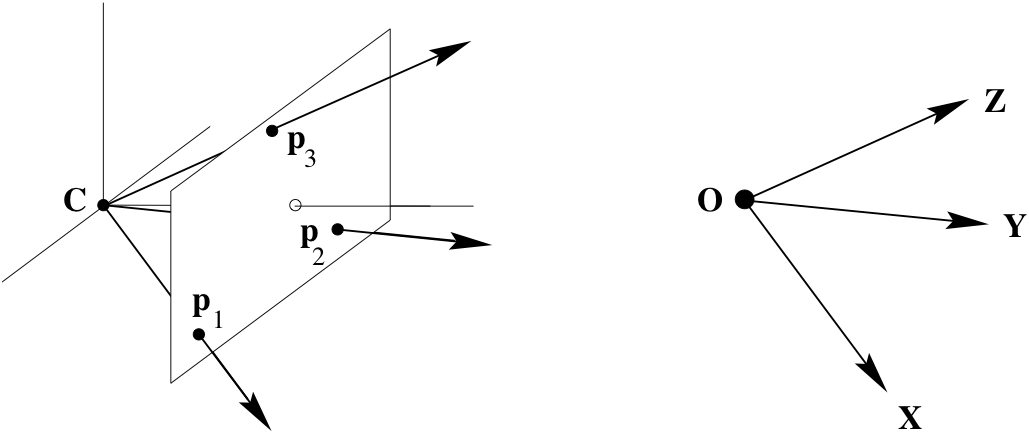
    <br>
    
    Figure from Hartley and Zisserman
    
</center>
</div>

<div class="text_cell_render border-box-sizing rendered_html">
<h3 id="Rows-of-$\mathtt{P}$">Rows of <span class="MathJax_Preview" style="color: inherit;"></span><span class="MathJax" id="MathJax-Element-166-Frame" tabindex="0" data-mathml="<math xmlns=&quot;http://www.w3.org/1998/Math/MathML&quot;><mi mathvariant=&quot;monospace&quot;>P</mi></math>" role="presentation" style="position: relative;"><nobr aria-hidden="true"><span class="math" id="MathJax-Span-2925" style="width: 0.604em; display: inline-block;"><span style="display: inline-block; position: relative; width: 0.512em; height: 0px; font-size: 120%;"><span style="position: absolute; clip: rect(1.438em, 1000.47em, 2.317em, -999.998em); top: -2.174em; left: 0em;"><span class="mrow" id="MathJax-Span-2926"><span class="texatom" id="MathJax-Span-2927"><span class="mrow" id="MathJax-Span-2928"><span class="mi" id="MathJax-Span-2929" style="font-family: MathJax_Typewriter;">P</span></span></span></span><span style="display: inline-block; width: 0px; height: 2.178em;"></span></span></span><span style="display: inline-block; overflow:dden; vertical-align: -0.053em; border-left: 0px solid; width: 0px; height: 0.836em;"></span></span></nobr><span class="MJX_Assistive_MathML" role="presentation"><math xmlns="http://www.w3.org/1998/Math/MathML"><mi mathvariant="monospace">P</mi></math></span></span><script type="math/tex" id="MathJax-Element-166">\mathtt{P}</script><a class="anchor-link" href="#Rows-of-$\mathtt{P}$">¶</a></h3><p><span class="MathJax_Preview" style="color: inherit;"></span><span class="MathJax" id="MathJax-Element-167-Frame" tabindex="0" data-mathml="<math xmlns=&quot;http://www.w3.org/1998/Math/MathML&quot;><msup><mi mathvariant=&quot;bold&quot;>p</mi><mrow><mn>1</mn><mi>T</mi></mrow></msup></math>" role="presentation" style="position: relative;"><nobr aria-hidden="true"><span class="math" id="MathJax-Span-2930" style="width: 1.908em; display: inline-block;"><span style="display: inline-block; position: relative; width: 1.551em; height: 0px; font-size: 120%;"><span style="position: absolute; clip: rect(1.134em, 1001.55em, 2.503em, -999.997em); top: -2.14em; left: 0em;"><span class="mrow" id="MathJax-Span-2931"><span class="msubsup" id="MathJax-Span-2932"><span style="display: inline-block; position: relative; width: 1.551em; height: 0px;"><span style="position: absolute; clip: rect(3.336em, 1000.6em, 4.348em, -999.997em); top: -3.985em; left: 0em;"><span class="texatom" id="MathJax-Span-2933"><span class="mrow" id="MathJax-Span-2934"><span class="mi" id="MathJax-Span-2935" style="font-family: MathJax_Main-bold;">p</span></span></span><span style="display: inline-block; width: 0px; height: 3.991em;"></span></span><span style="position: absolute; top: -4.342em; left: 0.658em;"><span class="texatom" id="MathJax-Span-2936"><span class="mrow" id="MathJax-Span-2937"><span class="mn" id="MathJax-Span-2938" style="font-size: 70.7%; font-family: MathJax_Main;">1</span><span class="mi" id="MathJax-Span-2939" style="font-size: 70.7%; font-family: MathJax_Math-italic;">T<span style="display: inline-block; overflow: hidden; height: 1px; width: 0.063em;"></span></span></span></span><span style="display: inline-block; width: 0px; height: 3.991em;"></span></span></span></span></span><span style="display: inline-block; width: 0px; height: 2.146em;"></span></span></span><span style="display: inline-block; overflow: hidden; vertical-align: -0.282em; border-left: 0px solid; width: 0px; height: 1.361em;"></span></span></nobr><span class="MJX_Assistive_MathML" role="presentation"><math xmlns="http://www.w3.org/1998/Math/MathML"><msup><mi mathvariant="bold">p</mi><mrow><mn>1</mn><mi>T</mi></mrow></msup></math></span></span><script type="math/tex" id="MathJax-Element-167">\mathbf{p}^{1T}</script> and <span class="MathJax_Preview" style="color: inherit;"></span><span class="MathJax" id="MathJax-Element-168-Frame" tabindex="0" data-mathml="<math xmlns=&quot;http://www.w3.org/1998/Math/MathML&quot;><msup><mi mathvariant=&quot;bold&quot;>p</mi><mrow><mn>2</mn><mi>T</mi></mrow></msup></math>" role="presentation" style="position: relative;"><nobr aria-hidden="true"><span class="math" id="MathJax-Span-2940" style="width: 1.908em; display: inline-block;"><span style="display: inline-block; position: relative; width: 1.551em; height: 0px; font-size: 120%;"><span style="position: absolute; clip: rect(1.134em, 1001.55em, 2.503em, -999.997em); top: -2.14em; left: 0em;"><span class="mrow" id="MathJax-Span-2941"><span class="msubsup" id="MathJax-Span-2942"><span style="display: inline-block; position: relative; width: 1.551em; height: 0px;"><span style="position: absolute; clip: rect(3.336em, 1000.6em, 4.348em, -999.997em); top: -3.985em; left: 0em;"><span class="texatom" id="MathJax-Span-2943"><span class="mrow" id="MathJax-Span-2944"><span class="mi" id="MathJax-Span-2945" style="font-family: MathJax_Main-bold;">p</span></span></span><span style="display: inline-block; width: 0px; height: 3.991em;"></span></span><span style="position: absolute; top: -4.342em; left: 0.658em;"><span class="texatom" id="MathJax-Span-2946"><span class="mrow" id="MathJax-Span-2947"><span class="mn" id="MathJax-Span-2948" style="font-size: 70.7%; font-family: MathJax_Main;">2</span><span class="mi" id="MathJax-Span-2949" style="font-size: 70.7%; font-family: MathJax_Math-italic;">T<span style="display: inline-block; overflow: hidden; height: 1px; width: 0.063em;"></span></span></span></span><span style="display: inline-block; width: 0px; height: 3.991em;"></span></span></span></span></span><span style="display: inline-block; width: 0px; height: 2.146em;"></span></span></span><span style="display: inline-block; overflow: hidden; vertical-align: -0.282em; border-left: 0px solid; width: 0px; height: 1.361em;"></span></span></nobr><span class="MJX_Assistive_MathML" role="presentation"><math xmlns="http://www.w3.org/1998/Math/MathML"><msup><mi mathvariant="bold">p</mi><mrow><mn>2</mn><mi>T</mi></mrow></msup></math></span></span><script type="math/tex" id="MathJax-Element-168">\mathbf{p}^{2T}</script> represent planes defined by the camera centre and image plane coordinate axis <span class="MathJax_Preview" style="color: inherit;"></span><span class="MathJax" id="MathJax-Element-169-Frame" tabindex="0" data-mathml="<math xmlns=&quot;http://www.w3.org/1998/Math/MathML&quot;><mi>x</mi></math>" role="presentation" style="position: relative;"><nobr aria-hidden="true"><span class="math" id="MathJax-Span-2950" style="width: 0.717em; display: inline-block;"><span style="display: inline-block; position: relative; width: 0.598em; height: 0px; font-size: 120%;"><span style="position: absolute; clip: rect(1.551em, 1000.54em, 2.324em, -999.997em); top: -2.14em; left: 0em;"><span class="mrow" id="MathJax-Span-2951"><span class="mi" id="MathJax-Span-2952" style="font-family: MathJax_Math-italic;">x</span></span><span style="display: inline-block; width: 0px; height: 2.146em;"></span></span></span><span style="display: inline-block; overflow: hidden; vertical-align: -0.068em; border-left: 0px solid; width: 0px; height: 0.718em;"></span></span></nobr><span class="MJX_Assistive_MathML" role="presentation"><math xmlns="http://www.w3.org/1998/Math/MathML"><mi>x</mi></math></span></span><script type="math/tex" id="MathJax-Element-169">x</script> and <span class="MathJax_Preview" style="color: inherit;"></span><span class="MathJax" id="MathJax-Element-170-Frame" tabindex="0" data-mathml="<math xmlns=&quot;http://www.w3.org/1998/Math/MathML&quot;><mi>y</mi></math>" role="presentation" style="position: relative;"><nobr aria-hidden="true"><span class="math" id="MathJax-Span-2953" style="width: 0.598em; display: inline-block;"><span style="display: inline-block; position: relative; width: 0.479em; height: 0px; font-size: 120%;"><span style="position: absolute; clip: rect(1.551em, 1000.48em, 2.503em, -999.997em); top: -2.14em; left: 0em;"><span class="mrow" id="MathJax-Span-2954"><span class="mi" id="MathJax-Span-2955" style="font-family: MathJax_Math-italic;">y<span style="display: inline-block; overflow: hidden; height: 1px; width: 0.003em;"></span></span></span><span style="display: inline-block; width: 0px; height: 2.146em;"></span></span></span><span style="display: inline-block; overflow: hidden; vertical-align: -0.282em; border-left: 0px solid; width: 0px; height: 0.932em;"></span></span></nobr><span class="MJX_Assistive_MathML" role="presentation"><math xmlns="http://www.w3.org/1998/Math/MathML"><mi>y</mi></math></span></span><script type="math/tex" id="MathJax-Element-170">y</script>.</p>
<p><span class="MathJax_Preview" style="color: inherit;"></span><span class="MathJax" id="MathJax-Element-171-Frame" tabindex="0" data-mathml="<math xmlns=&quot;http://www.w3.org/1998/Math/MathML&quot;><msup><mi mathvariant=&quot;bold&quot;>p</mi><mrow><mn>3</mn><mi>T</mi></mrow></msup></math>" role="presentation" style="position: relative;"><nobr aria-hidden="true"><span class="math" id="MathJax-Span-2956" style="width: 1.908em; display: inline-block;"><span style="display: inline-block; position: relative; width: 1.551em; height: 0px; font-size: 120%;"><span style="position: absolute; clip: rect(1.134em, 1001.55em, 2.503em, -999.997em); top: -2.14em; left: 0em;"><span class="mrow" id="MathJax-Span-2957"><span class="msubsup" id="MathJax-Span-2958"><span style="display: inline-block; position: relative; width: 1.551em; height: 0px;"><span style="position: absolute; clip: rect(3.336em, 1000.6em, 4.348em, -999.997em); top: -3.985em; left: 0em;"><span class="texatom" id="MathJax-Span-2959"><span class="mrow" id="MathJax-Span-2960"><span class="mi" id="MathJax-Span-2961" style="font-family: MathJax_Main-bold;">p</span></span></span><span style="display: inline-block; width: 0px; height: 3.991em;"></span></span><span style="position: absolute; top: -4.342em; left: 0.658em;"><span class="texatom" id="MathJax-Span-2962"><span class="mrow" id="MathJax-Span-2963"><span class="mn" id="MathJax-Span-2964" style="font-size: 70.7%; font-family: MathJax_Main;">3</span><span class="mi" id="MathJax-Span-2965" style="font-size: 70.7%; font-family: MathJax_Math-italic;">T<span style="display: inline-block; overflow: hidden; height: 1px; width: 0.063em;"></span></span></span></span><span style="display: inline-block; width: 0px; height: 3.991em;"></span></span></span></span></span><span style="display: inline-block; width: 0px; height: 2.146em;"></span></span></span><span style="display: inline-block; overflow: hidden; vertical-align: -0.282em; border-left: 0px solid; width: 0px; height: 1.361em;"></span></span></nobr><span class="MJX_Assistive_MathML" role="presentation"><math xmlns="http://www.w3.org/1998/Math/MathML"><msup><mi mathvariant="bold">p</mi><mrow><mn>3</mn><mi>T</mi></mrow></msup></math></span></span><script type="math/tex" id="MathJax-Element-171">\mathbf{p}^{3T}</script> represents the principal plane.</p>
<center>
    
        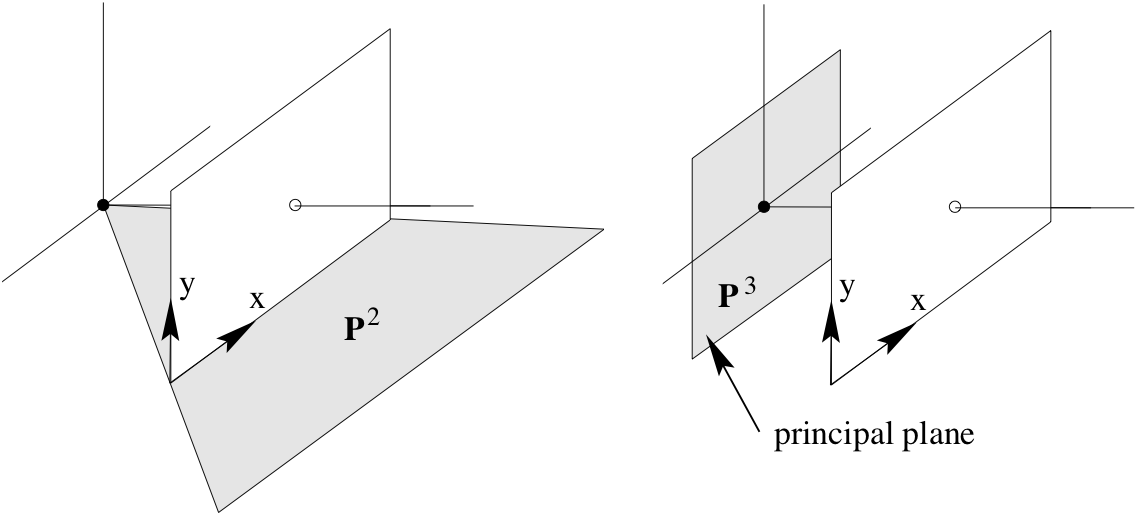
    <br>
    
    Figure from Hartley and Zisserman
    
</center><p>One way to convince ourselves that <span class="MathJax_Preview" style="color: inherit;"></span><span class="MathJax" id="MathJax-Element-172-Frame" tabindex="0" data-mathml="<math xmlns=&quot;http://www.w3.org/1998/Math/MathML&quot;><msup><mi mathvariant=&quot;bold&quot;>p</mi><mrow><mn>3</mn><mi>T</mi></mrow></msup></math>" role="presentation" style="position: relative;"><nobr aria-hidden="true"><span class="math" id="MathJax-Span-2966" style="width: 1.908em; display: inline-block;"><span style="display: inline-block; position: relative; width: 1.551em; height: 0px; font-size: 120%;"><span style="position: absolute; clip: rect(1.134em, 1001.55em, 2.503em, -999.997em); top: -2.14em; left: 0em;"><span class="mrow" id="MathJax-Span-2967"><span class="msubsup" id="MathJax-Span-2968"><span style="display: inline-block; position: relative; width: 1.551em; height: 0px;"><span style="position: absolute; clip: rect(3.336em, 1000.6em, 4.348em, -999.997em); top: -3.985em; left: 0em;"><span class="texatom" id="MathJax-Span-2969"><span class="mrow" id="MathJax-Span-2970"><span class="mi" id="MathJax-Span-2971" style="font-family: MathJax_Main-bold;">p</span></span></span><span style="display: inline-block; width: 0px; height: 3.991em;"></span></span><span style="position: absolute; top: -4.342em; left: 0.658em;"><span class="texatom" id="MathJax-Span-2972"><span class="mrow" id="MathJax-Span-2973"><span class="mn" id="MathJax-Span-2974" style="font-size: 70.7%; font-family: MathJax_Main;">3</span><span class="mi" id="MathJax-Span-2975" style="font-size: 70.7%; font-family: MathJax_Math-italic;">T<span style="display: inline-block; overflow: hidden; height: 1px; width: 0.063em;"></span></span></span></span><span style="display: inline-block; width: 0px; height: 3.991em;"></span></span></span></span></span><span style="display: inline-block; width: 0px; height: 2.146em;"></span></span></span><span style="display: inline-block; overflow: hidden; vertical-align: -0.282em; border-left: 0px solid; width: 0px; height: 1.361em;"></span></span></nobr><span class="MJX_Assistive_MathML" role="presentation"><math xmlns="http://www.w3.org/1998/Math/MathML"><msup><mi mathvariant="bold">p</mi><mrow><mn>3</mn><mi>T</mi></mrow></msup></math></span></span><script type="math/tex" id="MathJax-Element-172">\mathbf{p}^{3T}</script> represents the principal plane is to see that the only way a point <span class="MathJax_Preview" style="color: inherit;"></span><span class="MathJax" id="MathJax-Element-173-Frame" tabindex="0" data-mathml="<math xmlns=&quot;http://www.w3.org/1998/Math/MathML&quot;><mi mathvariant=&quot;bold&quot;>X</mi></math>" role="presentation" style="position: relative;"><nobr aria-hidden="true"><span class="math" id="MathJax-Span-2976" style="width: 1.015em; display: inline-block;"><span style="display: inline-block; position: relative; width: 0.836em; height: 0px; font-size: 120%;"><span style="position: absolute; clip: rect(1.372em, 1000.78em, 2.443em, -999.997em); top: -2.259em; left: 0em;"><span class="mrow" id="MathJax-Span-2977"><span class="texatom" id="MathJax-Span-2978"><span class="mrow" id="MathJax-Span-2979"><span class="mi" id="MathJax-Span-2980" style="font-family: MathJax_Main-bold;">X</span></span></span></span><span style="display: inline-block; width: 0px; height: 2.265em;"></span></span></span><span style="display: inline-block; overflow: hidden; vertical-align: -0.068em; border-left: 0px solid; width: 0px; height: 1.004em;"></span></span></nobr><span class="MJX_Assistive_MathML" role="presentation"><math xmlns="http://www.w3.org/1998/Math/MathML"><mi mathvariant="bold">X</mi></math></span></span><script type="math/tex" id="MathJax-Element-173">\mathbf{X}</script> maps to <span class="MathJax_Preview" style="color: inherit;"></span><span class="MathJax" id="MathJax-Element-174-Frame" tabindex="0" data-mathml="<math xmlns=&quot;http://www.w3.org/1998/Math/MathML&quot;><mo stretchy=&quot;false&quot;>(</mo><mi>x</mi><mo>,</mo><mi>y</mi><mo>,</mo><mn>0</mn><mo stretchy=&quot;false&quot;>)</mo></math>" role="presentation" style="position: relative;"><nobr aria-hidden="true"><span class="math" id="MathJax-Span-2981" style="width: 3.932em; display: inline-block;"><span style="display: inline-block; position: relative; width: 3.277em; height: 0px; font-size: 120%;"><span style="position: absolute; clip: rect(1.253em, 1003.16em, 2.622em, -999.997em); top: -2.199em; left: 0em;"><span class="mrow" id="MathJax-Span-2982"><span class="mo" id="MathJax-Span-2983" style="font-family: MathJax_Main;">(</span><span class="mi" id="MathJax-Span-2984" style="font-family: MathJax_Math-italic;">x</span><span class="mo" id="MathJax-Span-2985" style="font-family: MathJax_Main;">,</span><span class="mi" id="MathJax-Span-2986" style="font-family: MathJax_Math-italic; padding-left: 0.182em;">y<span style="display: inline-block; overflow: hidden; height: 1px; width: 0.003em;"></span></span><span class="mo" id="MathJax-Span-2987" style="font-family: MathJax_Main;">,</span><span class="mn" id="MathJax-Span-2988" style="font-family: MathJax_Main; padding-left: 0.182em;">0</span><span class="mo" id="MathJax-Span-2989" style="font-family: MathJax_Main;">)</span></span><span style="display: inline-block; width: 0px; height: 2.205em;"></span></span></span><span style="display: inline-block; overflow: hidden; vertical-align: -0.354em; border-left: 0px solid; width: 0px; height: 1.361em;"></span></span></nobr><span class="MJX_Assistive_MathML" role="presentation"><math xmlns="http://www.w3.org/1998/Math/MathML"><mo stretchy="false">(</mo><mi>x</mi><mo>,</mo><mi>y</mi><mo>,</mo><mn>0</mn><mo stretchy="false">)</mo></math></span></span><script type="math/tex" id="MathJax-Element-174">(x,y,0)</script> is if <span class="MathJax_Preview" style="color: inherit;"></span><span class="MathJax" id="MathJax-Element-175-Frame" tabindex="0" data-mathml="<math xmlns=&quot;http://www.w3.org/1998/Math/MathML&quot;><msup><mi mathvariant=&quot;bold&quot;>p</mi><mn>3</mn></msup><mi mathvariant=&quot;bold&quot;>X</mi><mo>=</mo><mn>0</mn></math>" role="presentation" style="position: relative;"><nobr aria-hidden="true"><span class="math" id="MathJax-Span-2990" style="width: 4.586em; display: inline-block;"><span style="display: inline-block; position: relative; width: 3.812em; height: 0px; font-size: 120%;"><span style="position: absolute; clip: rect(1.253em, 1003.75em, 2.622em, -999.997em); top: -2.259em; left: 0em;"><span class="mrow" id="MathJax-Span-2991"><span class="msubsup" id="MathJax-Span-2992"><span style="display: inline-block; position: relative; width: 1.074em; height: 0px;"><span style="position: absolute; clip: rect(3.336em, 1000.6em, 4.348em, -999.997em); top: -3.985em; left: 0em;"><span class="texatom" id="MathJax-Span-2993"><span class="mrow" id="MathJax-Span-2994"><span class="mi" id="MathJax-Span-2995" style="font-family: MathJax_Main-bold;">p</span></span></span><span style="display: inline-block; width: 0px; height: 3.991em;"></span></span><span style="position: absolute; top: -4.342em; left: 0.658em;"><span class="texatom" id="MathJax-Span-2996"><span class="mrow" id="MathJax-Span-2997"><span class="mn" id="MathJax-Span-2998" style="font-size: 70.7%; font-family: MathJax_Main;">3</span></span></span><span style="display: inline-block; width: 0px; height: 3.991em;"></span></span></span></span><span class="texatom" id="MathJax-Span-2999"><span class="mrow" id="MathJax-Span-3000"><span class="mi" id="MathJax-Span-3001" style="font-family: MathJax_Main-bold;">X</span></span></span><span class="mo" id="MathJax-Span-3002" style="font-family: MathJax_Main; padding-left: 0.301em;">=</span><span class="mn" id="MathJax-Span-3003" style="font-family: MathJax_Main; padding-left: 0.301em;">0</span></span><span style="display: inline-block; width: 0px; height: 2.265em;"></span></span></span><span style="display: inline-block; overflow: hidden; vertical-align: -0.282em; border-left: 0px solid; width: 0px; height: 1.361em;"></span></span></nobr><span class="MJX_Assistive_MathML" role="presentation"><math xmlns="http://www.w3.org/1998/Math/MathML"><msup><mi mathvariant="bold">p</mi><mn>3</mn></msup><mi mathvariant="bold">X</mi><mo>=</mo><mn>0</mn></math></span></span><script type="math/tex" id="MathJax-Element-175">\mathbf{p}^{3} \mathbf{X} = 0</script>.  Similar arguments can be made for <span class="MathJax_Preview" style="color: inherit;"></span><span class="MathJax" id="MathJax-Element-176-Frame" tabindex="0" data-mathml="<math xmlns=&quot;http://www.w3.org/1998/Math/MathML&quot;><msup><mi mathvariant=&quot;bold&quot;>p</mi><mrow><mn>1</mn><mi>T</mi></mrow></msup></math>" role="presentation" style="position: relative;"><nobr aria-hidden="true"><span class="math" id="MathJax-Span-3004" style="width: 1.908em; display: inline-block;"><span style="display: inline-block; position: relative; width: 1.551em; height: 0px; font-size: 120%;"><span style="position: absolute; clip: rect(1.134em, 1001.55em, 2.503em, -999.997em); top: -2.14em; left: 0em;"><span class="mrow" id="MathJax-Span-3005"><span class="msubsup" id="MathJax-Span-3006"><span style="display: inline-block; position: relative; width: 1.551em; height: 0px;"><span style="position: absolute; clip: rect(3.336em, 1000.6em, 4.348em, -999.997em); top: -3.985em; left: 0em;"><span class="texatom" id="MathJax-Span-3007"><span class="mrow" id="MathJax-Span-3008"><span class="mi" id="MathJax-Span-3009" style="font-family: MathJax_Main-bold;">p</span></span></span><span style="display: inline-block; width: 0px; height: 3.991em;"></span></span><span style="position: absolute; top: -4.342em; left: 0.658em;"><span class="texatom" id="MathJax-Span-3010"><span class="mrow" id="MathJax-Span-3011"><span class="mn" id="MathJax-Span-3012" style="font-size: 70.7%; font-family: MathJax_Main;">1</span><span class="mi" id="MathJax-Span-3013" style="font-size: 70.7%; font-family: MathJax_Math-italic;">T<span style="display: inline-block; overflow: hidden; height: 1px; width: 0.063em;"></span></span></span></span><span style="display: inline-block; width: 0px; height: 3.991em;"></span></span></span></span></span><span style="display: inline-block; width: 0px; height: 2.146em;"></span></span></span><span style="display: inline-block; overflow: hidden; vertical-align: -0.282em; border-left: 0px solid; width: 0px; height: 1.361em;"></span></span></nobr><span class="MJX_Assistive_MathML" role="presentation"><math xmlns="http://www.w3.org/1998/Math/MathML"><msup><mi mathvariant="bold">p</mi><mrow><mn>1</mn><mi>T</mi></mrow></msup></math></span></span><script type="math/tex" id="MathJax-Element-176">\mathbf{p}^{1T}</script> and <span class="MathJax_Preview" style="color: inherit;"></span><span class="MathJax" id="MathJax-Element-177-Frame" tabindex="0" data-mathml="<math xmlns=&quot;http://www.w3.org/1998/Math/MathML&quot;><msup><mi mathvariant=&quot;bold&quot;>p</mi><mrow><mn>2</mn><mi>T</mi></mrow></msup></math>" role="presentation" style="position: relative;"><nobr aria-hidden="true"><span class="math" id="MathJax-Span-3014" style="width: 1.908em; display: inline-block;"><span style="display: inline-block; position: relative; width: 1.551em; height: 0px; font-size: 120%;"><span style="position: absolute; clip: rect(1.134em, 1001.55em, 2.503em, -999.997em); top: -2.14em; left: 0em;"><span class="mrow" id="MathJax-Span-3015"><span class="msubsup" id="MathJax-Span-3016"><span style="display: inline-block; position: relative; width: 1.551em; height: 0px;"><span style="position: absolute; clip: rect(3.336em, 1000.6em, 4.348em, -999.997em); top: -3.985em; left: 0em;"><span class="texatom" id="MathJax-Span-3017"><span class="mrow" id="MathJax-Span-3018"><span class="mi" id="MathJax-Span-3019" style="font-family: MathJax_Main-bold;">p</span></span></span><span style="display: inline-block; width: 0px; height: 3.991em;"></span></span><span style="position: absolute; top: -4.342em; left: 0.658em;"><span class="texatom" id="MathJax-Span-3020"><span class="mrow" id="MathJax-Span-3021"><span class="mn" id="MathJax-Span-3022" style="font-size: 70.7%; font-family: MathJax_Main;">2</span><span class="mi" id="MathJax-Span-3023" style="font-size: 70.7%; font-family: MathJax_Math-italic;">T<span style="display: inline-block; overflow: hidden; height: 1px; width: 0.063em;"></span></span></span></span><span style="display: inline-block; width: 0px; height: 3.991em;"></span></span></span></span></span><span style="display: inline-block; width: 0px; height: 2.146em;"></span></span></span><span style="display: inline-block; overflow: hidden; vertical-align: -0.282em; border-left: 0px solid; width: 0px; height: 1.361em;"></span></span></nobr><span class="MJX_Assistive_MathML" role="presentation"><math xmlns="http://www.w3.org/1998/Math/MathML"><msup><mi mathvariant="bold">p</mi><mrow><mn>2</mn><mi>T</mi></mrow></msup></math></span></span><script type="math/tex" id="MathJax-Element-177">\mathbf{p}^{2T}</script> representing planes defined by camera center and image plane cooridnate axis <span class="MathJax_Preview" style="color: inherit;"></span><span class="MathJax" id="MathJax-Element-178-Frame" tabindex="0" data-mathml="<math xmlns=&quot;http://www.w3.org/1998/Math/MathML&quot;><mi>x</mi></math>" role="presentation" style="position: relative;"><nobr aria-hidden="true"><span class="math" id="MathJax-Span-3024" style="width: 0.717em; display: inline-block;"><span style="display: inline-block; position: relative; width: 0.598em; height: 0px; font-size: 120%;"><span style="position: absolute; clip: rect(1.551em, 1000.54em, 2.324em, -999.997em); top: -2.14em; left: 0em;"><span class="mrow" id="MathJax-Span-3025"><span class="mi" id="MathJax-Span-3026" style="font-family: MathJax_Math-italic;">x</span></span><span style="display: inline-block; width: 0px; height: 2.146em;"></span></span></span><span style="display: inline-block; overflow: hidden; vertical-align: -0.068em; border-left: 0px solid; width: 0px; height: 0.718em;"></span></span></nobr><span class="MJX_Assistive_MathML" role="presentation"><math xmlns="http://www.w3.org/1998/Math/MathML"><mi>x</mi></math></span></span><script type="math/tex" id="MathJax-Element-178">x</script> and <span class="MathJax_Preview" style="color: inherit;"></span><span class="MathJax" id="MathJax-Element-179-Frame" tabindex="0" data-mathml="<math xmlns=&quot;http://www.w3.org/1998/Math/MathML&quot;><mi>y</mi></math>" role="presentation" style="position: relative;"><nobr aria-hidden="true"><span class="math" id="MathJax-Span-3027" style="width: 0.598em; display: inline-block;"><span style="display: inline-block; position: relative; width: 0.479em; height: 0px; font-size: 120%;"><span style="position: absolute; clip: rect(1.551em, 1000.48em, 2.503em, -999.997em); top: -2.14em; left: 0em;"><span class="mrow" id="MathJax-Span-3028"><span class="mi" id="MathJax-Span-3029" style="font-family: MathJax_Math-italic;">y<span style="display: inline-block; overflow: hidden; height: 1px; width: 0.003em;"></span></span></span><span style="display: inline-block; width: 0px; height: 2.146em;"></span></span></span><span style="display: inline-block; overflow: hidden; vertical-align: -0.282em; border-left: 0px solid; width: 0px; height: 0.932em;"></span></span></nobr><span class="MJX_Assistive_MathML" role="presentation"><math xmlns="http://www.w3.org/1998/Math/MathML"><mi>y</mi></math></span></span><script type="math/tex" id="MathJax-Element-179">y</script>, respectively.</p>

</div>

<div class="text_cell_render border-box-sizing rendered_html">
<h3 id="Principal-Point">Principal Point<a class="anchor-link" href="#Principal-Point">¶</a></h3><p>The principal point is given by <span class="MathJax_Preview" style="color: inherit;"></span><span class="MathJax" id="MathJax-Element-180-Frame" tabindex="0" style="position: relative;" data-mathml="<math xmlns=&quot;http://www.w3.org/1998/Math/MathML&quot;><mi mathvariant=&quot;monospace&quot;>M</mi><msup><mi mathvariant=&quot;bold&quot;>m</mi><mn>3</mn></msup></math>" role="presentation"><nobr aria-hidden="true"><span class="math" id="MathJax-Span-3030" style="width: 2.324em; display: inline-block;"><span style="display: inline-block; position: relative; width: 1.908em; height: 0px; font-size: 120%;"><span style="position: absolute; clip: rect(1.134em, 1001.91em, 2.324em, -999.997em); top: -2.14em; left: 0em;"><span class="mrow" id="MathJax-Span-3031"><span class="texatom" id="MathJax-Span-3032"><span class="mrow" id="MathJax-Span-3033"><span class="mi" id="MathJax-Span-3034" style="font-family: MathJax_Typewriter;">M</span></span></span><span class="msubsup" id="MathJax-Span-3035"><span style="display: inline-block; position: relative; width: 1.372em; height: 0px;"><span style="position: absolute; clip: rect(3.336em, 1000.96em, 4.17em, -999.997em); top: -3.985em; left: 0em;"><span class="texatom" id="MathJax-Span-3036"><span class="mrow" id="MathJax-Span-3037"><span class="mi" id="MathJax-Span-3038" style="font-family: MathJax_Main-bold;">m</span></span></span><span style="display: inline-block; width: 0px; height: 3.991em;"></span></span><span style="position: absolute; top: -4.342em; left: 0.955em;"><span class="texatom" id="MathJax-Span-3039"><span class="mrow" id="MathJax-Span-3040"><span class="mn" id="MathJax-Span-3041" style="font-size: 70.7%; font-family: MathJax_Main;">3</span></span></span><span style="display: inline-block; width: 0px; height: 3.991em;"></span></span></span></span></span><span style="display: inline-block; width: 0px; height: 2.146em;"></span></span></span><span style="display: inline-block; overflow: hidden; vertical-align: -0.068em; border-left: 0px solid; width: 0px; height: 1.146em;"></span></span></nobr><span class="MJX_Assistive_MathML" role="presentation"><math xmlns="http://www.w3.org/1998/Math/MathML"><mi mathvariant="monospace">M</mi><msup><mi mathvariant="bold">m</mi><mn>3</mn></msup></math></span></span><script type="math/tex" id="MathJax-Element-180">\mathtt{M} \mathbf{m}^{3}</script>,
where <span class="MathJax_Preview" style="color: inherit;"></span><span class="MathJax" id="MathJax-Element-181-Frame" tabindex="0" style="position: relative;" data-mathml="<math xmlns=&quot;http://www.w3.org/1998/Math/MathML&quot;><msup><mi mathvariant=&quot;bold&quot;>m</mi><mrow><mn>3</mn><mi>T</mi></mrow></msup></math>" role="presentation"><nobr aria-hidden="true"><span class="math" id="MathJax-Span-3042" style="width: 2.324em; display: inline-block;"><span style="display: inline-block; position: relative; width: 1.908em; height: 0px; font-size: 120%;"><span style="position: absolute; clip: rect(1.134em, 1001.91em, 2.324em, -999.997em); top: -2.14em; left: 0em;"><span class="mrow" id="MathJax-Span-3043"><span class="msubsup" id="MathJax-Span-3044"><span style="display: inline-block; position: relative; width: 1.908em; height: 0px;"><span style="position: absolute; clip: rect(3.336em, 1000.96em, 4.17em, -999.997em); top: -3.985em; left: 0em;"><span class="texatom" id="MathJax-Span-3045"><span class="mrow" id="MathJax-Span-3046"><span class="mi" id="MathJax-Span-3047" style="font-family: MathJax_Main-bold;">m</span></span></span><span style="display: inline-block; width: 0px; height: 3.991em;"></span></span><span style="position: absolute; top: -4.342em; left: 0.955em;"><span class="texatom" id="MathJax-Span-3048"><span class="mrow" id="MathJax-Span-3049"><span class="mn" id="MathJax-Span-3050" style="font-size: 70.7%; font-family: MathJax_Main;">3</span><span class="mi" id="MathJax-Span-3051" style="font-size: 70.7%; font-family: MathJax_Math-italic;">T<span style="display: inline-block; overflow: hidden; height: 1px; width: 0.063em;"></span></span></span></span><span style="display: inline-block; width: 0px; height: 3.991em;"></span></span></span></span></span><span style="display: inline-block; width: 0px; height: 2.146em;"></span></span></span><span style="display: inline-block; overflow: hidden; vertical-align: -0.068em; border-left: 0px solid; width: 0px; height: 1.146em;"></span></span></nobr><span class="MJX_Assistive_MathML" role="presentation"><math xmlns="http://www.w3.org/1998/Math/MathML"><msup><mi mathvariant="bold">m</mi><mrow><mn>3</mn><mi>T</mi></mrow></msup></math></span></span><script type="math/tex" id="MathJax-Element-181">\mathbf{m}^{3T}</script> is the third row of <span class="MathJax_Preview" style="color: inherit;"></span><span class="MathJax" id="MathJax-Element-182-Frame" tabindex="0" style="position: relative;" data-mathml="<math xmlns=&quot;http://www.w3.org/1998/Math/MathML&quot;><mi mathvariant=&quot;monospace&quot;>M</mi></math>" role="presentation"><nobr aria-hidden="true"><span class="math" id="MathJax-Span-3052" style="width: 0.658em; display: inline-block;"><span style="display: inline-block; position: relative; width: 0.539em; height: 0px; font-size: 120%;"><span style="position: absolute; clip: rect(1.372em, 1000.54em, 2.324em, -999.997em); top: -2.14em; left: 0em;"><span class="mrow" id="MathJax-Span-3053"><span class="texatom" id="MathJax-Span-3054"><span class="mrow" id="MathJax-Span-3055"><span class="mi" id="MathJax-Span-3056" style="font-family: MathJax_Typewriter;">M</span></span></span></span><span style="display: inline-block; width: 0px; height: 2.146em;"></span></span></span><span style="display: inline-block; overflow: hidden; vertical-align: -0.068em; border-left: 0px solid; width: 0px; height: 0.861em;"></span></span></nobr><span class="MJX_Assistive_MathML" role="presentation"><math xmlns="http://www.w3.org/1998/Math/MathML"><mi mathvariant="monospace">M</mi></math></span></span><script type="math/tex" id="MathJax-Element-182">\mathtt{M}</script>.</p>
<p><em>Aside</em>:</p>
<p>Notice that the principal plane is given by <span class="MathJax_Preview" style="color: inherit;"></span><span class="MathJax" id="MathJax-Element-183-Frame" tabindex="0" style="position: relative;" data-mathml="<math xmlns=&quot;http://www.w3.org/1998/Math/MathML&quot;><msup><mi mathvariant=&quot;bold&quot;>p</mi><mrow><mn>3</mn><mi>T</mi></mrow></msup></math>" role="presentation"><nobr aria-hidden="true"><span class="math" id="MathJax-Span-3057" style="width: 1.908em; display: inline-block;"><span style="display: inline-block; position: relative; width: 1.551em; height: 0px; font-size: 120%;"><span style="position: absolute; clip: rect(1.134em, 1001.55em, 2.503em, -999.997em); top: -2.14em; left: 0em;"><span class="mrow" id="MathJax-Span-3058"><span class="msubsup" id="MathJax-Span-3059"><span style="display: inline-block; position: relative; width: 1.551em; height: 0px;"><span style="position: absolute; clip: rect(3.336em, 1000.6em, 4.348em, -999.997em); top: -3.985em; left: 0em;"><span class="texatom" id="MathJax-Span-3060"><span class="mrow" id="MathJax-Span-3061"><span class="mi" id="MathJax-Span-3062" style="font-family: MathJax_Main-bold;">p</span></span></span><span style="display: inline-block; width: 0px; height: 3.991em;"></span></span><span style="position: absolute; top: -4.342em; left: 0.658em;"><span class="texatom" id="MathJax-Span-3063"><span class="mrow" id="MathJax-Span-3064"><span class="mn" id="MathJax-Span-3065" style="font-size: 70.7%; font-family: MathJax_Main;">3</span><span class="mi" id="MathJax-Span-3066" style="font-size: 70.7%; font-family: MathJax_Math-italic;">T<span style="display: inline-block; overflow: hidden; height: 1px; width: 0.063em;"></span></span></span></span><span style="display: inline-block; width: 0px; height: 3.991em;"></span></span></span></span></span><span style="display: inline-block; width: 0px; height: 2.146em;"></span></span></span><span style="display: inline-block; overflow: hidden; vertical-align: -0.282em; border-left: 0px solid; width: 0px; height: 1.361em;"></span></span></nobr><span class="MJX_Assistive_MathML" role="presentation"><math xmlns="http://www.w3.org/1998/Math/MathML"><msup><mi mathvariant="bold">p</mi><mrow><mn>3</mn><mi>T</mi></mrow></msup></math></span></span><script type="math/tex" id="MathJax-Element-183">\mathbf{p}^{3T}</script>.  The normal to this plane is <span class="MathJax_Preview" style="color: inherit;"></span><span class="MathJax" id="MathJax-Element-184-Frame" tabindex="0" style="position: relative;" data-mathml="<math xmlns=&quot;http://www.w3.org/1998/Math/MathML&quot;><mo stretchy=&quot;false&quot;>(</mo><msub><mi>p</mi><mn>31</mn></msub><mo>,</mo><msub><mi>p</mi><mn>32</mn></msub><mo>,</mo><msub><mi>p</mi><mn>33</mn></msub><mo stretchy=&quot;false&quot;>)</mo></math>" role="presentation"><nobr aria-hidden="true"><span class="math" id="MathJax-Span-3067" style="width: 6.729em; display: inline-block;"><span style="display: inline-block; position: relative; width: 5.598em; height: 0px; font-size: 120%;"><span style="position: absolute; clip: rect(1.253em, 1005.48em, 2.622em, -999.997em); top: -2.199em; left: 0em;"><span class="mrow" id="MathJax-Span-3068"><span class="mo" id="MathJax-Span-3069" style="font-family: MathJax_Main;">(</span><span class="msubsup" id="MathJax-Span-3070"><span style="display: inline-block; position: relative; width: 1.313em; height: 0px;"><span style="position: absolute; clip: rect(3.396em, 1000.48em, 4.348em, -999.997em); top: -3.985em; left: 0em;"><span class="mi" id="MathJax-Span-3071" style="font-family: MathJax_Math-italic;">p</span><span style="display: inline-block; width: 0px; height: 3.991em;"></span></span><span style="position: absolute; top: -3.807em; left: 0.479em;"><span class="texatom" id="MathJax-Span-3072"><span class="mrow" id="MathJax-Span-3073"><span class="mn" id="MathJax-Span-3074" style="font-size: 70.7%; font-family: MathJax_Main;">31</span></span></span><span style="display: inline-block; width: 0px; height: 3.991em;"></span></span></span></span><span class="mo" id="MathJax-Span-3075" style="font-family: MathJax_Main;">,</span><span class="msubsup" id="MathJax-Span-3076" style="padding-left: 0.182em;"><span style="display: inline-block; position: relative; width: 1.313em; height: 0px;"><span style="position: absolute; clip: rect(3.396em, 1000.48em, 4.348em, -999.997em); top: -3.985em; left: 0em;"><span class="mi" id="MathJax-Span-3077" style="font-family: MathJax_Math-italic;">p</span><span style="display: inline-block; width: 0px; height: 3.991em;"></span></span><span style="position: absolute; top: -3.807em; left: 0.479em;"><span class="texatom" id="MathJax-Span-3078"><span class="mrow" id="MathJax-Span-3079"><span class="mn" id="MathJax-Span-3080" style="font-size: 70.7%; font-family: MathJax_Main;">32</span></span></span><span style="display: inline-block; width: 0px; height: 3.991em;"></span></span></span></span><span class="mo" id="MathJax-Span-3081" style="font-family: MathJax_Main;">,</span><span class="msubsup" id="MathJax-Span-3082" style="padding-left: 0.182em;"><span style="display: inline-block; position: relative; width: 1.313em; height: 0px;"><span style="position: absolute; clip: rect(3.396em, 1000.48em, 4.348em, -999.997em); top: -3.985em; left: 0em;"><span class="mi" id="MathJax-Span-3083" style="font-family: MathJax_Math-italic;">p</span><span style="display: inline-block; width: 0px; height: 3.991em;"></span></span><span style="position: absolute; top: -3.807em; left: 0.479em;"><span class="texatom" id="MathJax-Span-3084"><span class="mrow" id="MathJax-Span-3085"><span class="mn" id="MathJax-Span-3086" style="font-size: 70.7%; font-family: MathJax_Main;">33</span></span></span><span style="display: inline-block; width: 0px; height: 3.991em;"></span></span></span></span><span class="mo" id="MathJax-Span-3087" style="font-family: MathJax_Main;">)</span></span><span style="display: inline-block; width: 0px; height: 2.205em;"></span></span></span><span style="display: inline-block; overflow: hidden; vertical-align: -0.354em; border-left: 0px solid; width: 0px; height: 1.361em;"></span></span></nobr><span class="MJX_Assistive_MathML" role="presentation"><math xmlns="http://www.w3.org/1998/Math/MathML"><mo stretchy="false">(</mo><msub><mi>p</mi><mn>31</mn></msub><mo>,</mo><msub><mi>p</mi><mn>32</mn></msub><mo>,</mo><msub><mi>p</mi><mn>33</mn></msub><mo stretchy="false">)</mo></math></span></span><script type="math/tex" id="MathJax-Element-184">(p_{31}, p_{32}, p_{33})</script> and using this information we can set a point at infinity using homogeneous coordinates as follows</p>
<span class="MathJax_Preview" style="color: inherit;"></span><div class="MathJax_Display" style="text-align: center;"><span class="MathJax" id="MathJax-Element-185-Frame" tabindex="0" style="text-align: center; position: relative;" data-mathml="<math xmlns=&quot;http://www.w3.org/1998/Math/MathML&quot; display=&quot;block&quot;><msup><mover><mi mathvariant=&quot;bold&quot;>p</mi><mo stretchy=&quot;false&quot;>&amp;#x005E;</mo></mover><mn>3</mn></msup><mo>=</mo><mo stretchy=&quot;false&quot;>(</mo><msub><mi>p</mi><mn>31</mn></msub><mo>,</mo><msub><mi>p</mi><mn>32</mn></msub><mo>,</mo><msub><mi>p</mi><mn>33</mn></msub><mo>,</mo><mn>0</mn><mo stretchy=&quot;false&quot;>)</mo></math>" role="presentation"><nobr aria-hidden="true"><span class="math" id="MathJax-Span-3088" style="width: 10.896em; display: inline-block;"><span style="display: inline-block; position: relative; width: 9.051em; height: 0px; font-size: 120%;"><span style="position: absolute; clip: rect(1.074em, 1008.93em, 2.622em, -999.997em); top: -2.199em; left: 0em;"><span class="mrow" id="MathJax-Span-3089"><span class="msubsup" id="MathJax-Span-3090"><span style="display: inline-block; position: relative; width: 1.074em; height: 0px;"><span style="position: absolute; clip: rect(3.039em, 1000.6em, 4.348em, -999.997em); top: -3.985em; left: 0em;"><span class="texatom" id="MathJax-Span-3091"><span class="mrow" id="MathJax-Span-3092"><span class="munderover" id="MathJax-Span-3093"><span style="display: inline-block; position: relative; width: 0.658em; height: 0px;"><span style="position: absolute; clip: rect(3.336em, 1000.6em, 4.348em, -999.997em); top: -3.985em; left: 0em;"><span class="texatom" id="MathJax-Span-3094"><span class="mrow" id="MathJax-Span-3095"><span class="mi" id="MathJax-Span-3096" style="font-family: MathJax_Main-bold;">p</span></span></span><span style="display: inline-block; width: 0px; height: 3.991em;"></span></span><span style="position: absolute; clip: rect(3.098em, 1000.42em, 3.634em, -999.997em); top: -4.045em; left: 0.063em;"><span class="mo" id="MathJax-Span-3097" style="font-family: MathJax_Main;">^</span><span style="display: inline-block; width: 0px; height: 3.991em;"></span></span></span></span></span></span><span style="display: inline-block; width: 0px; height: 3.991em;"></span></span><span style="position: absolute; top: -4.461em; left: 0.658em;"><span class="texatom" id="MathJax-Span-3098"><span class="mrow" id="MathJax-Span-3099"><span class="mn" id="MathJax-Span-3100" style="font-size: 70.7%; font-family: MathJax_Main;">3</span></span></span><span style="display: inline-block; width: 0px; height: 3.991em;"></span></span></span></span><span class="mo" id="MathJax-Span-3101" style="font-family: MathJax_Main; padding-left: 0.301em;">=</span><span class="mo" id="MathJax-Span-3102" style="font-family: MathJax_Main; padding-left: 0.301em;">(</span><span class="msubsup" id="MathJax-Span-3103"><span style="display: inline-block; position: relative; width: 1.313em; height: 0px;"><span style="position: absolute; clip: rect(3.396em, 1000.48em, 4.348em, -999.997em); top: -3.985em; left: 0em;"><span class="mi" id="MathJax-Span-3104" style="font-family: MathJax_Math-italic;">p</span><span style="display: inline-block; width: 0px; height: 3.991em;"></span></span><span style="position: absolute; top: -3.807em; left: 0.479em;"><span class="texatom" id="MathJax-Span-3105"><span class="mrow" id="MathJax-Span-3106"><span class="mn" id="MathJax-Span-3107" style="font-size: 70.7%; font-family: MathJax_Main;">31</span></span></span><span style="display: inline-block; width: 0px; height: 3.991em;"></span></span></span></span><span class="mo" id="MathJax-Span-3108" style="font-family: MathJax_Main;">,</span><span class="msubsup" id="MathJax-Span-3109" style="padding-left: 0.182em;"><span style="display: inline-block; position: relative; width: 1.313em; height: 0px;"><span style="position: absolute; clip: rect(3.396em, 1000.48em, 4.348em, -999.997em); top: -3.985em; left: 0em;"><span class="mi" id="MathJax-Span-3110" style="font-family: MathJax_Math-italic;">p</span><span style="display: inline-block; width: 0px; height: 3.991em;"></span></span><span style="position: absolute; top: -3.807em; left: 0.479em;"><span class="texatom" id="MathJax-Span-3111"><span class="mrow" id="MathJax-Span-3112"><span class="mn" id="MathJax-Span-3113" style="font-size: 70.7%; font-family: MathJax_Main;">32</span></span></span><span style="display: inline-block; width: 0px; height: 3.991em;"></span></span></span></span><span class="mo" id="MathJax-Span-3114" style="font-family: MathJax_Main;">,</span><span class="msubsup" id="MathJax-Span-3115" style="padding-left: 0.182em;"><span style="display: inline-block; position: relative; width: 1.313em; height: 0px;"><span style="position: absolute; clip: rect(3.396em, 1000.48em, 4.348em, -999.997em); top: -3.985em; left: 0em;"><span class="mi" id="MathJax-Span-3116" style="font-family: MathJax_Math-italic;">p</span><span style="display: inline-block; width: 0px; height: 3.991em;"></span></span><span style="position: absolute; top: -3.807em; left: 0.479em;"><span class="texatom" id="MathJax-Span-3117"><span class="mrow" id="MathJax-Span-3118"><span class="mn" id="MathJax-Span-3119" style="font-size: 70.7%; font-family: MathJax_Main;">33</span></span></span><span style="display: inline-block; width: 0px; height: 3.991em;"></span></span></span></span><span class="mo" id="MathJax-Span-3120" style="font-family: MathJax_Main;">,</span><span class="mn" id="MathJax-Span-3121" style="font-family: MathJax_Main; padding-left: 0.182em;">0</span><span class="mo" id="MathJax-Span-3122" style="font-family: MathJax_Main;">)</span></span><span style="display: inline-block; width: 0px; height: 2.205em;"></span></span></span><span style="display: inline-block; overflow: hidden; vertical-align: -0.354em; border-left: 0px solid; width: 0px; height: 1.575em;"></span></span></nobr><span class="MJX_Assistive_MathML MJX_Assistive_MathML_Block" role="presentation"><math xmlns="http://www.w3.org/1998/Math/MathML" display="block"><msup><mover><mi mathvariant="bold">p</mi><mo stretchy="false">^</mo></mover><mn>3</mn></msup><mo>=</mo><mo stretchy="false">(</mo><msub><mi>p</mi><mn>31</mn></msub><mo>,</mo><msub><mi>p</mi><mn>32</mn></msub><mo>,</mo><msub><mi>p</mi><mn>33</mn></msub><mo>,</mo><mn>0</mn><mo stretchy="false">)</mo></math></span></span></div><script type="math/tex; mode=display" id="MathJax-Element-185">
\hat{\mathbf{p}}^{3} = (p_{31}, p_{32}, p_{33}, 0)
</script><p>Now project this point using <span class="MathJax_Preview" style="color: inherit;"></span><span class="MathJax" id="MathJax-Element-186-Frame" tabindex="0" style="position: relative;" data-mathml="<math xmlns=&quot;http://www.w3.org/1998/Math/MathML&quot;><mi mathvariant=&quot;monospace&quot;>P</mi></math>" role="presentation"><nobr aria-hidden="true"><span class="math" id="MathJax-Span-3123" style="width: 0.658em; display: inline-block;"><span style="display: inline-block; position: relative; width: 0.539em; height: 0px; font-size: 120%;"><span style="position: absolute; clip: rect(1.372em, 1000.48em, 2.324em, -999.997em); top: -2.14em; left: 0em;"><span class="mrow" id="MathJax-Span-3124"><span class="texatom" id="MathJax-Span-3125"><span class="mrow" id="MathJax-Span-3126"><span class="mi" id="MathJax-Span-3127" style="font-family: MathJax_Typewriter;">P</span></span></span></span><span style="display: inline-block; width: 0px; height: 2.146em;"></span></span></span><span style="display: inline-block; overflow: hidden; vertical-align: -0.068em; border-left: 0px solid; width: 0px; height: 0.861em;"></span></span></nobr><span class="MJX_Assistive_MathML" role="presentation"><math xmlns="http://www.w3.org/1998/Math/MathML"><mi mathvariant="monospace">P</mi></math></span></span><script type="math/tex" id="MathJax-Element-186">\mathtt{P}</script> and we get the principal point.</p>

</div>

<div class="text_cell_render border-box-sizing rendered_html">
<h3 id="Principal-Axis-Vector">Principal Axis Vector<a class="anchor-link" href="#Principal-Axis-Vector">¶</a></h3><p><span class="MathJax_Preview" style="color: inherit;"></span><span class="MathJax" id="MathJax-Element-187-Frame" tabindex="0" data-mathml="<math xmlns=&quot;http://www.w3.org/1998/Math/MathML&quot;><mi mathvariant=&quot;bold&quot;>v</mi><mo>=</mo><mrow><mi mathvariant=&quot;normal&quot;>d</mi><mi mathvariant=&quot;normal&quot;>e</mi><mi mathvariant=&quot;normal&quot;>t</mi></mrow><mo stretchy=&quot;false&quot;>(</mo><mi mathvariant=&quot;monospace&quot;>M</mi><mo stretchy=&quot;false&quot;>)</mo><msup><mi mathvariant=&quot;bold&quot;>m</mi><mn>3</mn></msup></math>" role="presentation" style="position: relative;"><nobr aria-hidden="true"><span class="math" id="MathJax-Span-3128" style="width: 7.324em; display: inline-block;"><span style="display: inline-block; position: relative; width: 6.074em; height: 0px; font-size: 120%;"><span style="position: absolute; clip: rect(1.253em, 1006.07em, 2.682em, -999.997em); top: -2.259em; left: 0em;"><span class="mrow" id="MathJax-Span-3129"><span class="texatom" id="MathJax-Span-3130"><span class="mrow" id="MathJax-Span-3131"><span class="mi" id="MathJax-Span-3132" style="font-family: MathJax_Main-bold;">v</span></span></span><span class="mo" id="MathJax-Span-3133" style="font-family: MathJax_Main; padding-left: 0.301em;">=</span><span class="texatom" id="MathJax-Span-3134" style="padding-left: 0.301em;"><span class="mrow" id="MathJax-Span-3135"><span class="mi" id="MathJax-Span-3136" style="font-family: MathJax_Main;">d</span><span class="mi" id="MathJax-Span-3137" style="font-family: MathJax_Main;">e</span><span class="mi" id="MathJax-Span-3138" style="font-family: MathJax_Main;">t</span></span></span><span class="mo" id="MathJax-Span-3139" style="font-family: MathJax_Main;">(</span><span class="texatom" id="MathJax-Span-3140"><span class="mrow" id="MathJax-Span-3141"><span class="mi" id="MathJax-Span-3142" style="font-family: MathJax_Typewriter;">M</span></span></span><span class="mo" id="MathJax-Span-3143" style="font-family: MathJax_Main;">)</span><span class="msubsup" id="MathJax-Span-3144"><span style="display: inline-block; position: relative; width: 1.372em; height: 0px;"><span style="position: absolute; clip: rect(3.336em, 1000.96em, 4.17em, -999.997em); top: -3.985em; left: 0em;"><span class="texatom" id="MathJax-Span-3145"><span class="mrow" id="MathJax-Span-3146"><span class="mi" id="MathJax-Span-3147" style="font-family: MathJax_Main-bold;">m</span></span></span><span style="display: inline-block; width: 0px; height: 3.991em;"></span></span><span style="position: absolute; top: -4.342em; left: 0.955em;"><span class="mn" id="MathJax-Span-3148" style="font-size: 70.7%; font-family: MathJax_Main;">3</span><span style="display: inline-block; width: 0px; height: 3.991em;"></span></span></span></span></span><span style="display: inline-block; width: 0px; height: 2.265em;"></span></span></span><span style="display: inline-block; overflow: hidden; vertical-align: -0.354em; border-left: 0px solid; width: 0px; height: 1.432em;"></span></span></nobr><span class="MJX_Assistive_MathML" role="presentation"><math xmlns="http://www.w3.org/1998/Math/MathML"><mi mathvariant="bold">v</mi><mo>=</mo><mrow><mi mathvariant="normal">d</mi><mi mathvariant="normal">e</mi><mi mathvariant="normal">t</mi></mrow><mo stretchy="false">(</mo><mi mathvariant="monospace">M</mi><mo stretchy="false">)</mo><msup><mi mathvariant="bold">m</mi><mn>3</mn></msup></math></span></span><script type="math/tex" id="MathJax-Element-187">\mathbf{v} = \mathrm{det}(\mathtt{M}) \mathbf{m}^3</script> is a vector in the direction of the principal axis, directed towards the front of the camera.</p>

</div>

<div class="cell border-box-sizing text_cell rendered"><div class="prompt input_prompt">
</div><div class="inner_cell">
<div class="text_cell_render border-box-sizing rendered_html">
<h2 id="Action-of-$\mathtt{P}$-on-points">Action of <span class="MathJax_Preview" style="color: inherit;"></span><span class="MathJax" id="MathJax-Element-188-Frame" tabindex="0" data-mathml="<math xmlns=&quot;http://www.w3.org/1998/Math/MathML&quot;><mi mathvariant=&quot;monospace&quot;>P</mi></math>" role="presentation" style="position: relative;"><nobr aria-hidden="true"><span class="math" id="MathJax-Span-3149" style="width: 0.646em; display: inline-block;"><span style="display: inline-block; position: relative; width: 0.533em; height: 0px; font-size: 120%;"><span style="position: absolute; clip: rect(1.404em, 1000.5em, 2.238em, -999.998em); top: -2.121em; left: 0em;"><span class="mrow" id="MathJax-Span-3150"><span class="texatom" id="MathJax-Span-3151"><span class="mrow" id="MathJax-Span-3152"><span class="mi" id="MathJax-Span-3153" style="font-family: MathJax_Typewriter;">P</span></span></span></span><span style="display: inline-block; width: 0px; height: 2.125em;"></span></span></span><span style="display: inline-block; overflow: hidden; vertical-align: -0.043em; border-left: 0px solid; width: 0px; height: 0.821em;"></span></span></nobr><span class="MJX_Assistive_MathML" role="presentation"><math xmlns="http://www.w3.org/1998/Math/MathML"><mi mathvariant="monospace">P</mi></math></span></span><script type="math/tex" id="MathJax-Element-188">\mathtt{P}</script> on points<a class="anchor-link" href="#Action-of-$\mathtt{P}$-on-points">¶</a></h2>
</div>
</div>
</div>

<div class="text_cell_render border-box-sizing rendered_html">
<h3 id="Forward-Projection">Forward Projection<a class="anchor-link" href="#Forward-Projection">¶</a></h3><p>Points in the world are mapped to image coordinates using</p>
<span class="MathJax_Preview" style="color: inherit;"></span><div class="MathJax_Display" style="text-align: center;"><span class="MathJax" id="MathJax-Element-189-Frame" tabindex="0" style="text-align: center; position: relative;" data-mathml="<math xmlns=&quot;http://www.w3.org/1998/Math/MathML&quot; display=&quot;block&quot;><mi mathvariant=&quot;bold&quot;>x</mi><mo>=</mo><mi mathvariant=&quot;monospace&quot;>P</mi><mi mathvariant=&quot;bold&quot;>X</mi></math>" role="presentation"><nobr aria-hidden="true"><span class="math" id="MathJax-Span-3154" style="width: 4.11em; display: inline-block;"><span style="display: inline-block; position: relative; width: 3.396em; height: 0px; font-size: 120%;"><span style="position: absolute; clip: rect(1.372em, 1003.34em, 2.443em, -999.997em); top: -2.259em; left: 0em;"><span class="mrow" id="MathJax-Span-3155"><span class="texatom" id="MathJax-Span-3156"><span class="mrow" id="MathJax-Span-3157"><span class="mi" id="MathJax-Span-3158" style="font-family: MathJax_Main-bold;">x</span></span></span><span class="mo" id="MathJax-Span-3159" style="font-family: MathJax_Main; padding-left: 0.301em;">=</span><span class="texatom" id="MathJax-Span-3160" style="padding-left: 0.301em;"><span class="mrow" id="MathJax-Span-3161"><span class="mi" id="MathJax-Span-3162" style="font-family: MathJax_Typewriter;">P</span></span></span><span class="texatom" id="MathJax-Span-3163"><span class="mrow" id="MathJax-Span-3164"><span class="mi" id="MathJax-Span-3165" style="font-family: MathJax_Main-bold;">X</span></span></span></span><span style="display: inline-block; width: 0px; height: 2.265em;"></span></span></span><span style="display: inline-block; overflow: hidden; vertical-align: -0.068em; border-left: 0px solid; width: 0px; height: 1.004em;"></span></span></nobr><span class="MJX_Assistive_MathML MJX_Assistive_MathML_Block" role="presentation"><math xmlns="http://www.w3.org/1998/Math/MathML" display="block"><mi mathvariant="bold">x</mi><mo>=</mo><mi mathvariant="monospace">P</mi><mi mathvariant="bold">X</mi></math></span></span></div><script type="math/tex; mode=display" id="MathJax-Element-189">
\mathbf{x} = \mathtt{P} \mathbf{X}
</script><p>Points <span class="MathJax_Preview" style="color: inherit;"></span><span class="MathJax" id="MathJax-Element-190-Frame" tabindex="0" style="position: relative;" data-mathml="<math xmlns=&quot;http://www.w3.org/1998/Math/MathML&quot;><mi mathvariant=&quot;bold&quot;>D</mi><mo>=</mo><mo stretchy=&quot;false&quot;>(</mo><msup><mi mathvariant=&quot;bold&quot;>d</mi><mi>T</mi></msup><mo>,</mo><mn>0</mn><mo stretchy=&quot;false&quot;>)</mo></math>" role="presentation"><nobr aria-hidden="true"><span class="math" id="MathJax-Span-3166" style="width: 6.253em; display: inline-block;"><span style="display: inline-block; position: relative; width: 5.182em; height: 0px; font-size: 120%;"><span style="position: absolute; clip: rect(1.193em, 1005.06em, 2.682em, -999.997em); top: -2.259em; left: 0em;"><span class="mrow" id="MathJax-Span-3167"><span class="texatom" id="MathJax-Span-3168"><span class="mrow" id="MathJax-Span-3169"><span class="mi" id="MathJax-Span-3170" style="font-family: MathJax_Main-bold;">D</span></span></span><span class="mo" id="MathJax-Span-3171" style="font-family: MathJax_Main; padding-left: 0.301em;">=</span><span class="mo" id="MathJax-Span-3172" style="font-family: MathJax_Main; padding-left: 0.301em;">(</span><span class="msubsup" id="MathJax-Span-3173"><span style="display: inline-block; position: relative; width: 1.193em; height: 0px;"><span style="position: absolute; clip: rect(3.098em, 1000.6em, 4.17em, -999.997em); top: -3.985em; left: 0em;"><span class="texatom" id="MathJax-Span-3174"><span class="mrow" id="MathJax-Span-3175"><span class="mi" id="MathJax-Span-3176" style="font-family: MathJax_Main-bold;">d</span></span></span><span style="display: inline-block; width: 0px; height: 3.991em;"></span></span><span style="position: absolute; top: -4.402em; left: 0.658em;"><span class="mi" id="MathJax-Span-3177" style="font-size: 70.7%; font-family: MathJax_Math-italic;">T<span style="display: inline-block; overflow: hidden; height: 1px; width: 0.063em;"></span></span><span style="display: inline-block; width: 0px; height: 3.991em;"></span></span></span></span><span class="mo" id="MathJax-Span-3178" style="font-family: MathJax_Main;">,</span><span class="mn" id="MathJax-Span-3179" style="font-family: MathJax_Main; padding-left: 0.182em;">0</span><span class="mo" id="MathJax-Span-3180" style="font-family: MathJax_Main;">)</span></span><span style="display: inline-block; width: 0px; height: 2.265em;"></span></span></span><span style="display: inline-block; overflow: hidden; vertical-align: -0.354em; border-left: 0px solid; width: 0px; height: 1.504em;"></span></span></nobr><span class="MJX_Assistive_MathML" role="presentation"><math xmlns="http://www.w3.org/1998/Math/MathML"><mi mathvariant="bold">D</mi><mo>=</mo><mo stretchy="false">(</mo><msup><mi mathvariant="bold">d</mi><mi>T</mi></msup><mo>,</mo><mn>0</mn><mo stretchy="false">)</mo></math></span></span><script type="math/tex" id="MathJax-Element-190">\mathbf{D}=(\mathbf{d}^T,0)</script>  on the plane at infinity map to vanishing points in the image <span class="MathJax_Preview" style="color: inherit;"></span><span class="MathJax" id="MathJax-Element-191-Frame" tabindex="0" style="position: relative;" data-mathml="<math xmlns=&quot;http://www.w3.org/1998/Math/MathML&quot;><mi mathvariant=&quot;bold&quot;>x</mi><mo>=</mo><mi mathvariant=&quot;monospace&quot;>M</mi><mi mathvariant=&quot;bold&quot;>d</mi></math>" role="presentation"><nobr aria-hidden="true"><span class="math" id="MathJax-Span-3181" style="width: 3.812em; display: inline-block;"><span style="display: inline-block; position: relative; width: 3.158em; height: 0px; font-size: 120%;"><span style="position: absolute; clip: rect(1.372em, 1003.1em, 2.443em, -999.997em); top: -2.259em; left: 0em;"><span class="mrow" id="MathJax-Span-3182"><span class="texatom" id="MathJax-Span-3183"><span class="mrow" id="MathJax-Span-3184"><span class="mi" id="MathJax-Span-3185" style="font-family: MathJax_Main-bold;">x</span></span></span><span class="mo" id="MathJax-Span-3186" style="font-family: MathJax_Main; padding-left: 0.301em;">=</span><span class="texatom" id="MathJax-Span-3187" style="padding-left: 0.301em;"><span class="mrow" id="MathJax-Span-3188"><span class="mi" id="MathJax-Span-3189" style="font-family: MathJax_Typewriter;">M</span></span></span><span class="texatom" id="MathJax-Span-3190"><span class="mrow" id="MathJax-Span-3191"><span class="mi" id="MathJax-Span-3192" style="font-family: MathJax_Main-bold;">d</span></span></span></span><span style="display: inline-block; width: 0px; height: 2.265em;"></span></span></span><span style="display: inline-block; overflow: hidden; vertical-align: -0.068em; border-left: 0px solid; width: 0px; height: 1.004em;"></span></span></nobr><span class="MJX_Assistive_MathML" role="presentation"><math xmlns="http://www.w3.org/1998/Math/MathML"><mi mathvariant="bold">x</mi><mo>=</mo><mi mathvariant="monospace">M</mi><mi mathvariant="bold">d</mi></math></span></span><script type="math/tex" id="MathJax-Element-191">\mathbf{x} = \mathtt{M} \mathbf{d}</script></p>

</div>

<div class="text_cell_render border-box-sizing rendered_html">
<h3 id="Back-projection-of-points-to-rays">Back-projection of points to rays<a class="anchor-link" href="#Back-projection-of-points-to-rays">¶</a></h3><p>Given a point <span class="MathJax_Preview" style="color: inherit;"></span><span class="MathJax" id="MathJax-Element-192-Frame" tabindex="0" style="position: relative;" data-mathml="<math xmlns=&quot;http://www.w3.org/1998/Math/MathML&quot;><mi mathvariant=&quot;bold&quot;>x</mi></math>" role="presentation"><nobr aria-hidden="true"><span class="math" id="MathJax-Span-3193" style="width: 0.717em; display: inline-block;"><span style="display: inline-block; position: relative; width: 0.598em; height: 0px; font-size: 120%;"><span style="position: absolute; clip: rect(1.67em, 1000.6em, 2.443em, -999.997em); top: -2.259em; left: 0em;"><span class="mrow" id="MathJax-Span-3194"><span class="texatom" id="MathJax-Span-3195"><span class="mrow" id="MathJax-Span-3196"><span class="mi" id="MathJax-Span-3197" style="font-family: MathJax_Main-bold;">x</span></span></span></span><span style="display: inline-block; width: 0px; height: 2.265em;"></span></span></span><span style="display: inline-block; overflow: hidden; vertical-align: -0.068em; border-left: 0px solid; width: 0px; height: 0.646em;"></span></span></nobr><span class="MJX_Assistive_MathML" role="presentation"><math xmlns="http://www.w3.org/1998/Math/MathML"><mi mathvariant="bold">x</mi></math></span></span><script type="math/tex" id="MathJax-Element-192">\mathbf{x}</script> in the image, we seek to determine the set of points in space that map to this point.  This set of points is a ray passing point <span class="MathJax_Preview" style="color: inherit;"></span><span class="MathJax" id="MathJax-Element-193-Frame" tabindex="0" style="position: relative;" data-mathml="<math xmlns=&quot;http://www.w3.org/1998/Math/MathML&quot;><msup><mi mathvariant=&quot;monospace&quot;>P</mi><mo>+</mo></msup><mi mathvariant=&quot;bold&quot;>x</mi></math>" role="presentation"><nobr aria-hidden="true"><span class="math" id="MathJax-Span-3198" style="width: 2.146em; display: inline-block;"><span style="display: inline-block; position: relative; width: 1.789em; height: 0px; font-size: 120%;"><span style="position: absolute; clip: rect(1.313em, 1001.79em, 2.443em, -999.997em); top: -2.259em; left: 0em;"><span class="mrow" id="MathJax-Span-3199"><span class="msubsup" id="MathJax-Span-3200"><span style="display: inline-block; position: relative; width: 1.134em; height: 0px;"><span style="position: absolute; clip: rect(3.217em, 1000.48em, 4.17em, -999.997em); top: -3.985em; left: 0em;"><span class="texatom" id="MathJax-Span-3201"><span class="mrow" id="MathJax-Span-3202"><span class="mi" id="MathJax-Span-3203" style="font-family: MathJax_Typewriter;">P</span></span></span><span style="display: inline-block; width: 0px; height: 3.991em;"></span></span><span style="position: absolute; top: -4.342em; left: 0.539em;"><span class="mo" id="MathJax-Span-3204" style="font-size: 70.7%; font-family: MathJax_Main;">+</span><span style="display: inline-block; width: 0px; height: 3.991em;"></span></span></span></span><span class="texatom" id="MathJax-Span-3205"><span class="mrow" id="MathJax-Span-3206"><span class="mi" id="MathJax-Span-3207" style="font-family: MathJax_Main-bold;">x</span></span></span></span><span style="display: inline-block; width: 0px; height: 2.265em;"></span></span></span><span style="display: inline-block; overflow: hidden; vertical-align: -0.068em; border-left: 0px solid; width: 0px; height: 1.075em;"></span></span></nobr><span class="MJX_Assistive_MathML" role="presentation"><math xmlns="http://www.w3.org/1998/Math/MathML"><msup><mi mathvariant="monospace">P</mi><mo>+</mo></msup><mi mathvariant="bold">x</mi></math></span></span><script type="math/tex" id="MathJax-Element-193">\mathtt{P}^+ \mathbf{x}</script> and the camera centre.</p>
<span class="MathJax_Preview" style="color: inherit;"></span><div class="MathJax_Display" style="text-align: center;"><span class="MathJax" id="MathJax-Element-194-Frame" tabindex="0" style="text-align: center; position: relative;" data-mathml="<math xmlns=&quot;http://www.w3.org/1998/Math/MathML&quot; display=&quot;block&quot;><mi mathvariant=&quot;bold&quot;>X</mi><mo stretchy=&quot;false&quot;>(</mo><mi>&amp;#x03BB;</mi><mo stretchy=&quot;false&quot;>)</mo><mo>=</mo><msup><mi mathvariant=&quot;monospace&quot;>P</mi><mo mathvariant=&quot;monospace&quot;>+</mo></msup><mi mathvariant=&quot;bold&quot;>x</mi><mo>+</mo><mi>&amp;#x03BB;</mi><mi mathvariant=&quot;bold&quot;>C</mi></math>" role="presentation"><nobr aria-hidden="true"><span class="math" id="MathJax-Span-3208" style="width: 9.467em; display: inline-block;"><span style="display: inline-block; position: relative; width: 7.86em; height: 0px; font-size: 120%;"><span style="position: absolute; clip: rect(1.313em, 1007.8em, 2.682em, -999.997em); top: -2.259em; left: 0em;"><span class="mrow" id="MathJax-Span-3209"><span class="texatom" id="MathJax-Span-3210"><span class="mrow" id="MathJax-Span-3211"><span class="mi" id="MathJax-Span-3212" style="font-family: MathJax_Main-bold;">X</span></span></span><span class="mo" id="MathJax-Span-3213" style="font-family: MathJax_Main;">(</span><span class="mi" id="MathJax-Span-3214" style="font-family: MathJax_Math-italic;">λ</span><span class="mo" id="MathJax-Span-3215" style="font-family: MathJax_Main;">)</span><span class="mo" id="MathJax-Span-3216" style="font-family: MathJax_Main; padding-left: 0.301em;">=</span><span class="texatom" id="MathJax-Span-3217" style="padding-left: 0.301em;"><span class="mrow" id="MathJax-Span-3218"><span class="msubsup" id="MathJax-Span-3219"><span style="display: inline-block; position: relative; width: 0.955em; height: 0px;"><span style="position: absolute; clip: rect(3.217em, 1000.48em, 4.17em, -999.997em); top: -3.985em; left: 0em;"><span class="mi" id="MathJax-Span-3220" style="font-family: MathJax_Typewriter;">P</span><span style="display: inline-block; width: 0px; height: 3.991em;"></span></span><span style="position: absolute; top: -4.402em; left: 0.539em;"><span class="mo" id="MathJax-Span-3221" style="font-size: 70.7%; font-family: MathJax_Typewriter;">+</span><span style="display: inline-block; width: 0px; height: 3.991em;"></span></span></span></span></span></span><span class="texatom" id="MathJax-Span-3222"><span class="mrow" id="MathJax-Span-3223"><span class="mi" id="MathJax-Span-3224" style="font-family: MathJax_Main-bold;">x</span></span></span><span class="mo" id="MathJax-Span-3225" style="font-family: MathJax_Main; padding-left: 0.241em;">+</span><span class="mi" id="MathJax-Span-3226" style="font-family: MathJax_Math-italic; padding-left: 0.241em;">λ</span><span class="texatom" id="MathJax-Span-3227"><span class="mrow" id="MathJax-Span-3228"><span class="mi" id="MathJax-Span-3229" style="font-family: MathJax_Main-bold;">C</span></span></span></span><span style="display: inline-block; width: 0px; height: 2.265em;"></span></span></span><span style="display: inline-block; overflow: hidden; vertical-align: -0.354em; border-left: 0px solid; width: 0px; height: 1.361em;"></span></span></nobr><span class="MJX_Assistive_MathML MJX_Assistive_MathML_Block" role="presentation"><math xmlns="http://www.w3.org/1998/Math/MathML" display="block"><mi mathvariant="bold">X</mi><mo stretchy="false">(</mo><mi>λ</mi><mo stretchy="false">)</mo><mo>=</mo><msup><mi mathvariant="monospace">P</mi><mo mathvariant="monospace">+</mo></msup><mi mathvariant="bold">x</mi><mo>+</mo><mi>λ</mi><mi mathvariant="bold">C</mi></math></span></span></div><script type="math/tex; mode=display" id="MathJax-Element-194">
\mathbf{X}(\lambda) = \mathtt{P^+} \mathbf{x} + \lambda \mathbf{C}
</script><p>Here  <span class="MathJax_Preview" style="color: inherit;"></span><span class="MathJax" id="MathJax-Element-195-Frame" tabindex="0" style="position: relative;" data-mathml="<math xmlns=&quot;http://www.w3.org/1998/Math/MathML&quot;><msup><mi mathvariant=&quot;monospace&quot;>P</mi><mo>+</mo></msup><mo>=</mo><msup><mi mathvariant=&quot;monospace&quot;>P</mi><mi>T</mi></msup><msup><mrow><mo>(</mo><mi mathvariant=&quot;monospace&quot;>P</mi><msup><mi mathvariant=&quot;monospace&quot;>P</mi><mi>T</mi></msup><mo>)</mo></mrow><mrow><mo>&amp;#x2212;</mo><mn>1</mn></mrow></msup></math>" role="presentation"><nobr aria-hidden="true"><span class="math" id="MathJax-Span-3230" style="width: 8.515em; display: inline-block;"><span style="display: inline-block; position: relative; width: 7.086em; height: 0px; font-size: 120%;"><span style="position: absolute; clip: rect(0.955em, 1007.09em, 2.741em, -999.997em); top: -2.199em; left: 0em;"><span class="mrow" id="MathJax-Span-3231"><span class="msubsup" id="MathJax-Span-3232"><span style="display: inline-block; position: relative; width: 1.134em; height: 0px;"><span style="position: absolute; clip: rect(3.217em, 1000.48em, 4.17em, -999.997em); top: -3.985em; left: 0em;"><span class="texatom" id="MathJax-Span-3233"><span class="mrow" id="MathJax-Span-3234"><span class="mi" id="MathJax-Span-3235" style="font-family: MathJax_Typewriter;">P</span></span></span><span style="display: inline-block; width: 0px; height: 3.991em;"></span></span><span style="position: absolute; top: -4.342em; left: 0.539em;"><span class="mo" id="MathJax-Span-3236" style="font-size: 70.7%; font-family: MathJax_Main;">+</span><span style="display: inline-block; width: 0px; height: 3.991em;"></span></span></span></span><span class="mo" id="MathJax-Span-3237" style="font-family: MathJax_Main; padding-left: 0.301em;">=</span><span class="msubsup" id="MathJax-Span-3238" style="padding-left: 0.301em;"><span style="display: inline-block; position: relative; width: 1.074em; height: 0px;"><span style="position: absolute; clip: rect(3.217em, 1000.48em, 4.17em, -999.997em); top: -3.985em; left: 0em;"><span class="texatom" id="MathJax-Span-3239"><span class="mrow" id="MathJax-Span-3240"><span class="mi" id="MathJax-Span-3241" style="font-family: MathJax_Typewriter;">P</span></span></span><span style="display: inline-block; width: 0px; height: 3.991em;"></span></span><span style="position: absolute; top: -4.342em; left: 0.539em;"><span class="mi" id="MathJax-Span-3242" style="font-size: 70.7%; font-family: MathJax_Math-italic;">T<span style="display: inline-block; overflow: hidden; height: 1px; width: 0.063em;"></span></span><span style="display: inline-block; width: 0px; height: 3.991em;"></span></span></span></span><span class="msubsup" id="MathJax-Span-3243"><span style="display: inline-block; position: relative; width: 3.515em; height: 0px;"><span style="position: absolute; clip: rect(2.979em, 1002.38em, 4.527em, -999.997em); top: -3.985em; left: 0em;"><span class="mrow" id="MathJax-Span-3244"><span class="mo" id="MathJax-Span-3245" style="vertical-align: 0em;"><span style="font-family: MathJax_Size1;">(</span></span><span class="texatom" id="MathJax-Span-3246"><span class="mrow" id="MathJax-Span-3247"><span class="mi" id="MathJax-Span-3248" style="font-family: MathJax_Typewriter;">P</span></span></span><span class="msubsup" id="MathJax-Span-3249"><span style="display: inline-block; position: relative; width: 1.074em; height: 0px;"><span style="position: absolute; clip: rect(3.217em, 1000.48em, 4.17em, -999.997em); top: -3.985em; left: 0em;"><span class="texatom" id="MathJax-Span-3250"><span class="mrow" id="MathJax-Span-3251"><span class="mi" id="MathJax-Span-3252" style="font-family: MathJax_Typewriter;">P</span></span></span><span style="display: inline-block; width: 0px; height: 3.991em;"></span></span><span style="position: absolute; top: -4.342em; left: 0.539em;"><span class="mi" id="MathJax-Span-3253" style="font-size: 70.7%; font-family: MathJax_Math-italic;">T<span style="display: inline-block; overflow: hidden; height: 1px; width: 0.063em;"></span></span><span style="display: inline-block; width: 0px; height: 3.991em;"></span></span></span></span><span class="mo" id="MathJax-Span-3254" style="vertical-align: 0em;"><span style="font-family: MathJax_Size1;">)</span></span></span><span style="display: inline-block; width: 0px; height: 3.991em;"></span></span><span style="position: absolute; top: -4.58em; left: 2.562em;"><span class="texatom" id="MathJax-Span-3255"><span class="mrow" id="MathJax-Span-3256"><span class="mo" id="MathJax-Span-3257" style="font-size: 70.7%; font-family: MathJax_Main;">−</span><span class="mn" id="MathJax-Span-3258" style="font-size: 70.7%; font-family: MathJax_Main;">1</span></span></span><span style="display: inline-block; width: 0px; height: 3.991em;"></span></span></span></span></span><span style="display: inline-block; width: 0px; height: 2.205em;"></span></span></span><span style="display: inline-block; overflow: hidden; vertical-align: -0.496em; border-left: 0px solid; width: 0px; height: 1.789em;"></span></span></nobr><span class="MJX_Assistive_MathML" role="presentation"><math xmlns="http://www.w3.org/1998/Math/MathML"><msup><mi mathvariant="monospace">P</mi><mo>+</mo></msup><mo>=</mo><msup><mi mathvariant="monospace">P</mi><mi>T</mi></msup><msup><mrow><mo>(</mo><mi mathvariant="monospace">P</mi><msup><mi mathvariant="monospace">P</mi><mi>T</mi></msup><mo>)</mo></mrow><mrow><mo>−</mo><mn>1</mn></mrow></msup></math></span></span><script type="math/tex" id="MathJax-Element-195">\mathtt{P}^+ = \mathtt{P}^T \left( \mathtt{P} \mathtt{P}^T \right)^{-1}</script> is the psuedo-inverse of <span class="MathJax_Preview" style="color: inherit;"></span><span class="MathJax" id="MathJax-Element-196-Frame" tabindex="0" style="position: relative;" data-mathml="<math xmlns=&quot;http://www.w3.org/1998/Math/MathML&quot;><mi mathvariant=&quot;monospace&quot;>P</mi></math>" role="presentation"><nobr aria-hidden="true"><span class="math" id="MathJax-Span-3259" style="width: 0.658em; display: inline-block;"><span style="display: inline-block; position: relative; width: 0.539em; height: 0px; font-size: 120%;"><span style="position: absolute; clip: rect(1.372em, 1000.48em, 2.324em, -999.997em); top: -2.14em; left: 0em;"><span class="mrow" id="MathJax-Span-3260"><span class="texatom" id="MathJax-Span-3261"><span class="mrow" id="MathJax-Span-3262"><span class="mi" id="MathJax-Span-3263" style="font-family: MathJax_Typewriter;">P</span></span></span></span><span style="display: inline-block; width: 0px; height: 2.146em;"></span></span></span><span style="display: inline-block; overflow: hidden; vertical-align: -0.068em; border-left: 0px solid; width: 0px; height: 0.861em;"></span></span></nobr><span class="MJX_Assistive_MathML" role="presentation"><math xmlns="http://www.w3.org/1998/Math/MathML"><mi mathvariant="monospace">P</mi></math></span></span><script type="math/tex" id="MathJax-Element-196">\mathtt{P}</script>.  Note that <span class="MathJax_Preview" style="color: inherit;"></span><span class="MathJax" id="MathJax-Element-197-Frame" tabindex="0" style="position: relative;" data-mathml="<math xmlns=&quot;http://www.w3.org/1998/Math/MathML&quot;><mi mathvariant=&quot;monospace&quot;>P</mi><msup><mi mathvariant=&quot;monospace&quot;>P</mi><mo>+</mo></msup><mo>=</mo><mi mathvariant=&quot;bold&quot;>I</mi></math>" role="presentation"><nobr aria-hidden="true"><span class="math" id="MathJax-Span-3264" style="width: 4.17em; display: inline-block;"><span style="display: inline-block; position: relative; width: 3.455em; height: 0px; font-size: 120%;"><span style="position: absolute; clip: rect(1.313em, 1003.46em, 2.443em, -999.997em); top: -2.259em; left: 0em;"><span class="mrow" id="MathJax-Span-3265"><span class="texatom" id="MathJax-Span-3266"><span class="mrow" id="MathJax-Span-3267"><span class="mi" id="MathJax-Span-3268" style="font-family: MathJax_Typewriter;">P</span></span></span><span class="msubsup" id="MathJax-Span-3269"><span style="display: inline-block; position: relative; width: 1.134em; height: 0px;"><span style="position: absolute; clip: rect(3.217em, 1000.48em, 4.17em, -999.997em); top: -3.985em; left: 0em;"><span class="texatom" id="MathJax-Span-3270"><span class="mrow" id="MathJax-Span-3271"><span class="mi" id="MathJax-Span-3272" style="font-family: MathJax_Typewriter;">P</span></span></span><span style="display: inline-block; width: 0px; height: 3.991em;"></span></span><span style="position: absolute; top: -4.342em; left: 0.539em;"><span class="mo" id="MathJax-Span-3273" style="font-size: 70.7%; font-family: MathJax_Main;">+</span><span style="display: inline-block; width: 0px; height: 3.991em;"></span></span></span></span><span class="mo" id="MathJax-Span-3274" style="font-family: MathJax_Main; padding-left: 0.301em;">=</span><span class="texatom" id="MathJax-Span-3275" style="padding-left: 0.301em;"><span class="mrow" id="MathJax-Span-3276"><span class="mi" id="MathJax-Span-3277" style="font-family: MathJax_Main-bold;">I</span></span></span></span><span style="display: inline-block; width: 0px; height: 2.265em;"></span></span></span><span style="display: inline-block; overflow: hidden; vertical-align: -0.068em; border-left: 0px solid; width: 0px; height: 1.075em;"></span></span></nobr><span class="MJX_Assistive_MathML" role="presentation"><math xmlns="http://www.w3.org/1998/Math/MathML"><mi mathvariant="monospace">P</mi><msup><mi mathvariant="monospace">P</mi><mo>+</mo></msup><mo>=</mo><mi mathvariant="bold">I</mi></math></span></span><script type="math/tex" id="MathJax-Element-197">\mathtt{P} \mathtt{P}^+ = \mathbf{I}</script>.</p>
<p>For finite cameras, we can develop a simpler expression.  Recall that camera centre for these cameras is given by <span class="MathJax_Preview" style="color: inherit;"></span><span class="MathJax" id="MathJax-Element-198-Frame" tabindex="0" style="position: relative;" data-mathml="<math xmlns=&quot;http://www.w3.org/1998/Math/MathML&quot;><mover><mi mathvariant=&quot;bold&quot;>C</mi><mo stretchy=&quot;false&quot;>&amp;#x007E;</mo></mover><mo>=</mo><mo>&amp;#x2212;</mo><msup><mi mathvariant=&quot;monospace&quot;>M</mi><mrow><mo>&amp;#x2212;</mo><mn>1</mn></mrow></msup><msub><mi mathvariant=&quot;bold&quot;>p</mi><mn>4</mn></msub></math>" role="presentation"><nobr aria-hidden="true"><span class="math" id="MathJax-Span-3278" style="width: 6.729em; display: inline-block;"><span style="display: inline-block; position: relative; width: 5.598em; height: 0px; font-size: 120%;"><span style="position: absolute; clip: rect(1.074em, 1005.6em, 2.622em, -999.997em); top: -2.199em; left: 0em;"><span class="mrow" id="MathJax-Span-3279"><span class="texatom" id="MathJax-Span-3280"><span class="mrow" id="MathJax-Span-3281"><span class="munderover" id="MathJax-Span-3282"><span style="display: inline-block; position: relative; width: 0.836em; height: 0px;"><span style="position: absolute; clip: rect(3.098em, 1000.78em, 4.17em, -999.997em); top: -3.985em; left: 0em;"><span class="texatom" id="MathJax-Span-3283"><span class="mrow" id="MathJax-Span-3284"><span class="mi" id="MathJax-Span-3285" style="font-family: MathJax_Main-bold;">C</span></span></span><span style="display: inline-block; width: 0px; height: 3.991em;"></span></span><span style="position: absolute; clip: rect(3.515em, 1000.42em, 3.932em, -999.997em); top: -4.64em; left: 0.182em;"><span class="mo" id="MathJax-Span-3286" style="font-family: MathJax_Main;">~</span><span style="display: inline-block; width: 0px; height: 3.991em;"></span></span></span></span></span></span><span class="mo" id="MathJax-Span-3287" style="font-family: MathJax_Main; padding-left: 0.301em;">=</span><span class="mo" id="MathJax-Span-3288" style="font-family: MathJax_Main; padding-left: 0.301em;">−</span><span class="msubsup" id="MathJax-Span-3289"><span style="display: inline-block; position: relative; width: 1.491em; height: 0px;"><span style="position: absolute; clip: rect(3.217em, 1000.54em, 4.17em, -999.997em); top: -3.985em; left: 0em;"><span class="texatom" id="MathJax-Span-3290"><span class="mrow" id="MathJax-Span-3291"><span class="mi" id="MathJax-Span-3292" style="font-family: MathJax_Typewriter;">M</span></span></span><span style="display: inline-block; width: 0px; height: 3.991em;"></span></span><span style="position: absolute; top: -4.342em; left: 0.539em;"><span class="texatom" id="MathJax-Span-3293"><span class="mrow" id="MathJax-Span-3294"><span class="mo" id="MathJax-Span-3295" style="font-size: 70.7%; font-family: MathJax_Main;">−</span><span class="mn" id="MathJax-Span-3296" style="font-size: 70.7%; font-family: MathJax_Main;">1</span></span></span><span style="display: inline-block; width: 0px; height: 3.991em;"></span></span></span></span><span class="msubsup" id="MathJax-Span-3297"><span style="display: inline-block; position: relative; width: 1.074em; height: 0px;"><span style="position: absolute; clip: rect(3.336em, 1000.6em, 4.348em, -999.997em); top: -3.985em; left: 0em;"><span class="texatom" id="MathJax-Span-3298"><span class="mrow" id="MathJax-Span-3299"><span class="mi" id="MathJax-Span-3300" style="font-family: MathJax_Main-bold;">p</span></span></span><span style="display: inline-block; width: 0px; height: 3.991em;"></span></span><span style="position: absolute; top: -3.747em; left: 0.658em;"><span class="mn" id="MathJax-Span-3301" style="font-size: 70.7%; font-family: MathJax_Main;">4</span><span style="display: inline-block; width: 0px; height: 3.991em;"></span></span></span></span></span><span style="display: inline-block; width: 0px; height: 2.205em;"></span></span></span><span style="display: inline-block; overflow: hidden; vertical-align: -0.354em; border-left: 0px solid; width: 0px; height: 1.575em;"></span></span></nobr><span class="MJX_Assistive_MathML" role="presentation"><math xmlns="http://www.w3.org/1998/Math/MathML"><mover><mi mathvariant="bold">C</mi><mo stretchy="false">~</mo></mover><mo>=</mo><mo>−</mo><msup><mi mathvariant="monospace">M</mi><mrow><mo>−</mo><mn>1</mn></mrow></msup><msub><mi mathvariant="bold">p</mi><mn>4</mn></msub></math></span></span><script type="math/tex" id="MathJax-Element-198">\tilde{\mathbf{C}} = - \mathtt{M}^{-1} \mathbf{p}_4</script>.  An image point <span class="MathJax_Preview" style="color: inherit;"></span><span class="MathJax" id="MathJax-Element-199-Frame" tabindex="0" style="position: relative;" data-mathml="<math xmlns=&quot;http://www.w3.org/1998/Math/MathML&quot;><mi mathvariant=&quot;bold&quot;>x</mi></math>" role="presentation"><nobr aria-hidden="true"><span class="math" id="MathJax-Span-3302" style="width: 0.717em; display: inline-block;"><span style="display: inline-block; position: relative; width: 0.598em; height: 0px; font-size: 120%;"><span style="position: absolute; clip: rect(1.67em, 1000.6em, 2.443em, -999.997em); top: -2.259em; left: 0em;"><span class="mrow" id="MathJax-Span-3303"><span class="texatom" id="MathJax-Span-3304"><span class="mrow" id="MathJax-Span-3305"><span class="mi" id="MathJax-Span-3306" style="font-family: MathJax_Main-bold;">x</span></span></span></span><span style="display: inline-block; width: 0px; height: 2.265em;"></span></span></span><span style="display: inline-block; overflow: hidden; vertical-align: -0.068em; border-left: 0px solid; width: 0px; height: 0.646em;"></span></span></nobr><span class="MJX_Assistive_MathML" role="presentation"><math xmlns="http://www.w3.org/1998/Math/MathML"><mi mathvariant="bold">x</mi></math></span></span><script type="math/tex" id="MathJax-Element-199">\mathbf{x}</script> back projects to a ray intersecting the plane at infinity at the points <span class="MathJax_Preview" style="color: inherit;"></span><span class="MathJax" id="MathJax-Element-200-Frame" tabindex="0" style="position: relative;" data-mathml="<math xmlns=&quot;http://www.w3.org/1998/Math/MathML&quot;><mi mathvariant=&quot;bold&quot;>D</mi><mo>=</mo><msup><mrow><mo>(</mo><mrow><mo>(</mo><msup><mi mathvariant=&quot;monospace&quot;>M</mi><mrow><mo>&amp;#x2212;</mo><mn>1</mn></mrow></msup><mi mathvariant=&quot;bold&quot;>x</mi><mo>)</mo></mrow><mo>,</mo><mn>0</mn><mo>)</mo></mrow><mi>T</mi></msup></math>" role="presentation"><nobr aria-hidden="true"><span class="math" id="MathJax-Span-3307" style="width: 9.527em; display: inline-block;"><span style="display: inline-block; position: relative; width: 7.92em; height: 0px; font-size: 120%;"><span style="position: absolute; clip: rect(1.015em, 1007.92em, 2.801em, -999.997em); top: -2.259em; left: 0em;"><span class="mrow" id="MathJax-Span-3308"><span class="texatom" id="MathJax-Span-3309"><span class="mrow" id="MathJax-Span-3310"><span class="mi" id="MathJax-Span-3311" style="font-family: MathJax_Main-bold;">D</span></span></span><span class="mo" id="MathJax-Span-3312" style="font-family: MathJax_Main; padding-left: 0.301em;">=</span><span class="msubsup" id="MathJax-Span-3313" style="padding-left: 0.301em;"><span style="display: inline-block; position: relative; width: 5.658em; height: 0px;"><span style="position: absolute; clip: rect(2.979em, 1004.94em, 4.527em, -999.997em); top: -3.985em; left: 0em;"><span class="mrow" id="MathJax-Span-3314"><span class="mo" id="MathJax-Span-3315" style="vertical-align: 0em;"><span style="font-family: MathJax_Size1;">(</span></span><span class="mrow" id="MathJax-Span-3316"><span class="mo" id="MathJax-Span-3317" style="vertical-align: 0em;"><span style="font-family: MathJax_Size1;">(</span></span><span class="msubsup" id="MathJax-Span-3318"><span style="display: inline-block; position: relative; width: 1.491em; height: 0px;"><span style="position: absolute; clip: rect(3.217em, 1000.54em, 4.17em, -999.997em); top: -3.985em; left: 0em;"><span class="texatom" id="MathJax-Span-3319"><span class="mrow" id="MathJax-Span-3320"><span class="mi" id="MathJax-Span-3321" style="font-family: MathJax_Typewriter;">M</span></span></span><span style="display: inline-block; width: 0px; height: 3.991em;"></span></span><span style="position: absolute; top: -4.342em; left: 0.539em;"><span class="texatom" id="MathJax-Span-3322"><span class="mrow" id="MathJax-Span-3323"><span class="mo" id="MathJax-Span-3324" style="font-size: 70.7%; font-family: MathJax_Main;">−</span><span class="mn" id="MathJax-Span-3325" style="font-size: 70.7%; font-family: MathJax_Main;">1</span></span></span><span style="display: inline-block; width: 0px; height: 3.991em;"></span></span></span></span><span class="texatom" id="MathJax-Span-3326"><span class="mrow" id="MathJax-Span-3327"><span class="mi" id="MathJax-Span-3328" style="font-family: MathJax_Main-bold;">x</span></span></span><span class="mo" id="MathJax-Span-3329" style="vertical-align: 0em;"><span style="font-family: MathJax_Size1;">)</span></span></span><span class="mo" id="MathJax-Span-3330" style="font-family: MathJax_Main; padding-left: 0.182em;">,</span><span class="mn" id="MathJax-Span-3331" style="font-family: MathJax_Main; padding-left: 0.182em;">0</span><span class="mo" id="MathJax-Span-3332" style="vertical-align: 0em;"><span style="font-family: MathJax_Size1;">)</span></span></span><span style="display: inline-block; width: 0px; height: 3.991em;"></span></span><span style="position: absolute; top: -4.58em; left: 5.063em;"><span class="mi" id="MathJax-Span-3333" style="font-size: 70.7%; font-family: MathJax_Math-italic;">T<span style="display: inline-block; overflow: hidden; height: 1px; width: 0.063em;"></span></span><span style="display: inline-block; width: 0px; height: 3.991em;"></span></span></span></span></span><span style="display: inline-block; width: 0px; height: 2.265em;"></span></span></span><span style="display: inline-block; overflow: hidden; vertical-align: -0.496em; border-left: 0px solid; width: 0px; height: 1.861em;"></span></span></nobr><span class="MJX_Assistive_MathML" role="presentation"><math xmlns="http://www.w3.org/1998/Math/MathML"><mi mathvariant="bold">D</mi><mo>=</mo><msup><mrow><mo>(</mo><mrow><mo>(</mo><msup><mi mathvariant="monospace">M</mi><mrow><mo>−</mo><mn>1</mn></mrow></msup><mi mathvariant="bold">x</mi><mo>)</mo></mrow><mo>,</mo><mn>0</mn><mo>)</mo></mrow><mi>T</mi></msup></math></span></span><script type="math/tex" id="MathJax-Element-200">\mathbf{D} = \left( \left( \mathtt{M}^{-1} \mathbf{x} \right), 0 \right)^T</script>.  Using camera centre and <span class="MathJax_Preview" style="color: inherit;"></span><span class="MathJax" id="MathJax-Element-201-Frame" tabindex="0" style="position: relative;" data-mathml="<math xmlns=&quot;http://www.w3.org/1998/Math/MathML&quot;><mi mathvariant=&quot;bold&quot;>D</mi></math>" role="presentation"><nobr aria-hidden="true"><span class="math" id="MathJax-Span-3334" style="width: 1.074em; display: inline-block;"><span style="display: inline-block; position: relative; width: 0.896em; height: 0px; font-size: 120%;"><span style="position: absolute; clip: rect(1.372em, 1000.84em, 2.443em, -999.997em); top: -2.259em; left: 0em;"><span class="mrow" id="MathJax-Span-3335"><span class="texatom" id="MathJax-Span-3336"><span class="mrow" id="MathJax-Span-3337"><span class="mi" id="MathJax-Span-3338" style="font-family: MathJax_Main-bold;">D</span></span></span></span><span style="display: inline-block; width: 0px; height: 2.265em;"></span></span></span><span style="display: inline-block; overflow: hidden; vertical-align: -0.068em; border-left: 0px solid; width: 0px; height: 1.004em;"></span></span></nobr><span class="MJX_Assistive_MathML" role="presentation"><math xmlns="http://www.w3.org/1998/Math/MathML"><mi mathvariant="bold">D</mi></math></span></span><script type="math/tex" id="MathJax-Element-201">\mathbf{D}</script>, we get</p>
<span class="MathJax_Preview" style="color: inherit;"></span><div class="MathJax_Display" style="text-align: center;"><span class="MathJax" id="MathJax-Element-202-Frame" tabindex="0" style="text-align: center; position: relative;" data-mathml="<math xmlns=&quot;http://www.w3.org/1998/Math/MathML&quot; display=&quot;block&quot;><mi mathvariant=&quot;bold&quot;>X</mi><mo stretchy=&quot;false&quot;>(</mo><mi>&amp;#x03BC;</mi><mo stretchy=&quot;false&quot;>)</mo><mo>=</mo><mi>&amp;#x03BC;</mi><mrow><mo>(</mo><mtable rowspacing=&quot;4pt&quot; columnspacing=&quot;1em&quot;><mtr><mtd><msup><mi mathvariant=&quot;monospace&quot;>M</mi><mrow><mo>&amp;#x2212;</mo><mn>1</mn></mrow></msup><mi mathvariant=&quot;bold&quot;>x</mi></mtd></mtr><mtr><mtd><mn>0</mn></mtd></mtr></mtable><mo>)</mo></mrow><mo>+</mo><mrow><mo>(</mo><mtable rowspacing=&quot;4pt&quot; columnspacing=&quot;1em&quot;><mtr><mtd><mo>&amp;#x2212;</mo><msup><mi mathvariant=&quot;monospace&quot;>M</mi><mrow><mo>&amp;#x2212;</mo><mn>1</mn></mrow></msup><msub><mi mathvariant=&quot;bold&quot;>p</mi><mn>4</mn></msub></mtd></mtr><mtr><mtd><mn>1</mn></mtd></mtr></mtable><mo>)</mo></mrow></math>" role="presentation"><nobr aria-hidden="true"><span class="math" id="MathJax-Span-3339" style="width: 17.741em; display: inline-block;"><span style="display: inline-block; position: relative; width: 14.765em; height: 0px; font-size: 120%;"><span style="position: absolute; clip: rect(1.729em, 1014.53em, 4.527em, -999.997em); top: -3.39em; left: 0em;"><span class="mrow" id="MathJax-Span-3340"><span class="texatom" id="MathJax-Span-3341"><span class="mrow" id="MathJax-Span-3342"><span class="mi" id="MathJax-Span-3343" style="font-family: MathJax_Main-bold;">X</span></span></span><span class="mo" id="MathJax-Span-3344" style="font-family: MathJax_Main;">(</span><span class="mi" id="MathJax-Span-3345" style="font-family: MathJax_Math-italic;">μ</span><span class="mo" id="MathJax-Span-3346" style="font-family: MathJax_Main;">)</span><span class="mo" id="MathJax-Span-3347" style="font-family: MathJax_Main; padding-left: 0.301em;">=</span><span class="mi" id="MathJax-Span-3348" style="font-family: MathJax_Math-italic; padding-left: 0.301em;">μ</span><span class="mrow" id="MathJax-Span-3349" style="padding-left: 0.182em;"><span class="mo" id="MathJax-Span-3350" style="vertical-align: 0em;"><span style="font-family: MathJax_Size3;">(</span></span><span class="mtable" id="MathJax-Span-3351"><span style="display: inline-block; position: relative; width: 2.086em; height: 0px; margin-right: 0.182em; margin-left: 0.182em;"><span style="position: absolute; clip: rect(2.324em, 1002.09em, 4.943em, -999.997em); top: -3.985em; left: 0em;"><span style="display: inline-block; position: relative; width: 2.086em; height: 0px;"><span style="position: absolute; clip: rect(2.979em, 1002.09em, 4.17em, -999.997em); top: -4.64em; left: 50%; margin-left: -1.068em;"><span class="mtd" id="MathJax-Span-3352"><span class="mrow" id="MathJax-Span-3353"><span class="msubsup" id="MathJax-Span-3354"><span style="display: inline-block; position: relative; width: 1.491em; height: 0px;"><span style="position: absolute; clip: rect(3.217em, 1000.54em, 4.17em, -999.997em); top: -3.985em; left: 0em;"><span class="texatom" id="MathJax-Span-3355"><span class="mrow" id="MathJax-Span-3356"><span class="mi" id="MathJax-Span-3357" style="font-family: MathJax_Typewriter;">M</span></span></span><span style="display: inline-block; width: 0px; height: 3.991em;"></span></span><span style="position: absolute; top: -4.342em; left: 0.539em;"><span class="texatom" id="MathJax-Span-3358"><span class="mrow" id="MathJax-Span-3359"><span class="mo" id="MathJax-Span-3360" style="font-size: 70.7%; font-family: MathJax_Main;">−</span><span class="mn" id="MathJax-Span-3361" style="font-size: 70.7%; font-family: MathJax_Main;">1</span></span></span><span style="display: inline-block; width: 0px; height: 3.991em;"></span></span></span></span><span class="texatom" id="MathJax-Span-3362"><span class="mrow" id="MathJax-Span-3363"><span class="mi" id="MathJax-Span-3364" style="font-family: MathJax_Main-bold;">x</span></span></span></span></span><span style="display: inline-block; width: 0px; height: 3.991em;"></span></span><span style="position: absolute; clip: rect(3.158em, 1000.48em, 4.17em, -999.997em); top: -3.211em; left: 50%; margin-left: -0.235em;"><span class="mtd" id="MathJax-Span-3365"><span class="mrow" id="MathJax-Span-3366"><span class="mn" id="MathJax-Span-3367" style="font-family: MathJax_Main;">0</span></span></span><span style="display: inline-block; width: 0px; height: 3.991em;"></span></span></span><span style="display: inline-block; width: 0px; height: 3.991em;"></span></span></span></span><span class="mo" id="MathJax-Span-3368" style="vertical-align: 0em;"><span style="font-family: MathJax_Size3;">)</span></span></span><span class="mo" id="MathJax-Span-3369" style="font-family: MathJax_Main; padding-left: 0.241em;">+</span><span class="mrow" id="MathJax-Span-3370" style="padding-left: 0.241em;"><span class="mo" id="MathJax-Span-3371" style="vertical-align: 0em;"><span style="font-family: MathJax_Size3;">(</span></span><span class="mtable" id="MathJax-Span-3372"><span style="display: inline-block; position: relative; width: 3.336em; height: 0px; margin-right: 0.182em; margin-left: 0.182em;"><span style="position: absolute; clip: rect(2.324em, 1003.34em, 4.943em, -999.997em); top: -3.985em; left: 0em;"><span style="display: inline-block; position: relative; width: 3.336em; height: 0px;"><span style="position: absolute; clip: rect(2.979em, 1003.34em, 4.408em, -999.997em); top: -4.64em; left: 50%; margin-left: -1.664em;"><span class="mtd" id="MathJax-Span-3373"><span class="mrow" id="MathJax-Span-3374"><span class="mo" id="MathJax-Span-3375" style="font-family: MathJax_Main;">−</span><span class="msubsup" id="MathJax-Span-3376"><span style="display: inline-block; position: relative; width: 1.491em; height: 0px;"><span style="position: absolute; clip: rect(3.217em, 1000.54em, 4.17em, -999.997em); top: -3.985em; left: 0em;"><span class="texatom" id="MathJax-Span-3377"><span class="mrow" id="MathJax-Span-3378"><span class="mi" id="MathJax-Span-3379" style="font-family: MathJax_Typewriter;">M</span></span></span><span style="display: inline-block; width: 0px; height: 3.991em;"></span></span><span style="position: absolute; top: -4.342em; left: 0.539em;"><span class="texatom" id="MathJax-Span-3380"><span class="mrow" id="MathJax-Span-3381"><span class="mo" id="MathJax-Span-3382" style="font-size: 70.7%; font-family: MathJax_Main;">−</span><span class="mn" id="MathJax-Span-3383" style="font-size: 70.7%; font-family: MathJax_Main;">1</span></span></span><span style="display: inline-block; width: 0px; height: 3.991em;"></span></span></span></span><span class="msubsup" id="MathJax-Span-3384"><span style="display: inline-block; position: relative; width: 1.074em; height: 0px;"><span style="position: absolute; clip: rect(3.336em, 1000.6em, 4.348em, -999.997em); top: -3.985em; left: 0em;"><span class="texatom" id="MathJax-Span-3385"><span class="mrow" id="MathJax-Span-3386"><span class="mi" id="MathJax-Span-3387" style="font-family: MathJax_Main-bold;">p</span></span></span><span style="display: inline-block; width: 0px; height: 3.991em;"></span></span><span style="position: absolute; top: -3.747em; left: 0.658em;"><span class="mn" id="MathJax-Span-3388" style="font-size: 70.7%; font-family: MathJax_Main;">4</span><span style="display: inline-block; width: 0px; height: 3.991em;"></span></span></span></span></span></span><span style="display: inline-block; width: 0px; height: 3.991em;"></span></span><span style="position: absolute; clip: rect(3.158em, 1000.42em, 4.17em, -999.997em); top: -3.211em; left: 50%; margin-left: -0.235em;"><span class="mtd" id="MathJax-Span-3389"><span class="mrow" id="MathJax-Span-3390"><span class="mn" id="MathJax-Span-3391" style="font-family: MathJax_Main;">1</span></span></span><span style="display: inline-block; width: 0px; height: 3.991em;"></span></span></span><span style="display: inline-block; width: 0px; height: 3.991em;"></span></span></span></span><span class="mo" id="MathJax-Span-3392" style="vertical-align: 0em;"><span style="font-family: MathJax_Size3;">)</span></span></span></span><span style="display: inline-block; width: 0px; height: 3.396em;"></span></span></span><span style="display: inline-block; overflow: hidden; vertical-align: -1.211em; border-left: 0px solid; width: 0px; height: 3.075em;"></span></span></nobr><span class="MJX_Assistive_MathML MJX_Assistive_MathML_Block" role="presentation"><math xmlns="http://www.w3.org/1998/Math/MathML" display="block"><mi mathvariant="bold">X</mi><mo stretchy="false">(</mo><mi>μ</mi><mo stretchy="false">)</mo><mo>=</mo><mi>μ</mi><mrow><mo>(</mo><mtable rowspacing="4pt" columnspacing="1em"><mtr><mtd><msup><mi mathvariant="monospace">M</mi><mrow><mo>−</mo><mn>1</mn></mrow></msup><mi mathvariant="bold">x</mi></mtd></mtr><mtr><mtd><mn>0</mn></mtd></mtr></mtable><mo>)</mo></mrow><mo>+</mo><mrow><mo>(</mo><mtable rowspacing="4pt" columnspacing="1em"><mtr><mtd><mo>−</mo><msup><mi mathvariant="monospace">M</mi><mrow><mo>−</mo><mn>1</mn></mrow></msup><msub><mi mathvariant="bold">p</mi><mn>4</mn></msub></mtd></mtr><mtr><mtd><mn>1</mn></mtd></mtr></mtable><mo>)</mo></mrow></math></span></span></div><script type="math/tex; mode=display" id="MathJax-Element-202">
\mathbf{X}(\mu) = \mu
\left(
\begin{array}{c}
\mathtt{M}^{-1} \mathbf{x} \\
0
\end{array}
\right)
+
\left(
\begin{array}{c}
- \mathtt{M}^{-1} \mathbf{p}_4 \\
1
\end{array}
\right)
</script>
</div>

<div class="text_cell_render border-box-sizing rendered_html">
<h2 id="Decomposition-of-the-camera-matrix">Decomposition of the camera matrix<a class="anchor-link" href="#Decomposition-of-the-camera-matrix">¶</a></h2><p>Given a camera matrix <span class="MathJax_Preview" style="color: inherit;"></span><span class="MathJax" id="MathJax-Element-203-Frame" tabindex="0" style="position: relative;" data-mathml="<math xmlns=&quot;http://www.w3.org/1998/Math/MathML&quot;><mi mathvariant=&quot;monospace&quot;>P</mi></math>" role="presentation"><nobr aria-hidden="true"><span class="math" id="MathJax-Span-3393" style="width: 0.658em; display: inline-block;"><span style="display: inline-block; position: relative; width: 0.539em; height: 0px; font-size: 120%;"><span style="position: absolute; clip: rect(1.372em, 1000.48em, 2.324em, -999.997em); top: -2.14em; left: 0em;"><span class="mrow" id="MathJax-Span-3394"><span class="texatom" id="MathJax-Span-3395"><span class="mrow" id="MathJax-Span-3396"><span class="mi" id="MathJax-Span-3397" style="font-family: MathJax_Typewriter;">P</span></span></span></span><span style="display: inline-block; width: 0px; height: 2.146em;"></span></span></span><span style="display: inline-block; overflow: hidden; vertical-align: -0.068em; border-left: 0px solid; width: 0px; height: 0.861em;"></span></span></nobr><span class="MJX_Assistive_MathML" role="presentation"><math xmlns="http://www.w3.org/1998/Math/MathML"><mi mathvariant="monospace">P</mi></math></span></span><script type="math/tex" id="MathJax-Element-203">\mathtt{P}</script>, we often desire to find: camera centre, camera rotation, and camera intrinsic parameters.</p>
<h3 id="Camera-centre">Camera centre<a class="anchor-link" href="#Camera-centre">¶</a></h3><p>We can find camera center by using <span class="MathJax_Preview" style="color: inherit;"></span><span class="MathJax" id="MathJax-Element-204-Frame" tabindex="0" style="position: relative;" data-mathml="<math xmlns=&quot;http://www.w3.org/1998/Math/MathML&quot;><mi mathvariant=&quot;monospace&quot;>P</mi><mi mathvariant=&quot;bold&quot;>C</mi><mo>=</mo><mn>0</mn></math>" role="presentation"><nobr aria-hidden="true"><span class="math" id="MathJax-Span-3398" style="width: 3.872em; display: inline-block;"><span style="display: inline-block; position: relative; width: 3.217em; height: 0px; font-size: 120%;"><span style="position: absolute; clip: rect(1.372em, 1003.16em, 2.443em, -999.997em); top: -2.259em; left: 0em;"><span class="mrow" id="MathJax-Span-3399"><span class="texatom" id="MathJax-Span-3400"><span class="mrow" id="MathJax-Span-3401"><span class="mi" id="MathJax-Span-3402" style="font-family: MathJax_Typewriter;">P</span></span></span><span class="texatom" id="MathJax-Span-3403"><span class="mrow" id="MathJax-Span-3404"><span class="mi" id="MathJax-Span-3405" style="font-family: MathJax_Main-bold;">C</span></span></span><span class="mo" id="MathJax-Span-3406" style="font-family: MathJax_Main; padding-left: 0.301em;">=</span><span class="mn" id="MathJax-Span-3407" style="font-family: MathJax_Main; padding-left: 0.301em;">0</span></span><span style="display: inline-block; width: 0px; height: 2.265em;"></span></span></span><span style="display: inline-block; overflow: hidden; vertical-align: -0.068em; border-left: 0px solid; width: 0px; height: 1.004em;"></span></span></nobr><span class="MJX_Assistive_MathML" role="presentation"><math xmlns="http://www.w3.org/1998/Math/MathML"><mi mathvariant="monospace">P</mi><mi mathvariant="bold">C</mi><mo>=</mo><mn>0</mn></math></span></span><script type="math/tex" id="MathJax-Element-204">\mathtt{P} \mathbf{C} = 0</script> as discussed earlier, i.e., by finding a null vector of the projection matrix.</p>
<h3 id="Camera-rotation-and-intrinsic-parameters">Camera rotation and intrinsic parameters<a class="anchor-link" href="#Camera-rotation-and-intrinsic-parameters">¶</a></h3><p>Recall that</p>
<span class="MathJax_Preview" style="color: inherit;"></span><div class="MathJax_Display" style="text-align: center;"><span class="MathJax" id="MathJax-Element-205-Frame" tabindex="0" style="text-align: center; position: relative;" data-mathml="<math xmlns=&quot;http://www.w3.org/1998/Math/MathML&quot; display=&quot;block&quot;><mi mathvariant=&quot;monospace&quot;>P</mi><mo>=</mo><mrow><mo>[</mo><mi mathvariant=&quot;monospace&quot;>M</mi><mtext>&amp;#xA0;</mtext><mo stretchy=&quot;false&quot;>|</mo><mtext>&amp;#xA0;</mtext><mo>&amp;#x2212;</mo><mi mathvariant=&quot;monospace&quot;>M</mi><mover><mi mathvariant=&quot;bold&quot;>C</mi><mo stretchy=&quot;false&quot;>&amp;#x007E;</mo></mover><mo>]</mo></mrow><mo>=</mo><mi mathvariant=&quot;monospace&quot;>K</mi><mrow><mo>[</mo><mi mathvariant=&quot;monospace&quot;>R</mi><mtext>&amp;#xA0;</mtext><mo stretchy=&quot;false&quot;>|</mo><mtext>&amp;#xA0;</mtext><mo>&amp;#x2212;</mo><mi mathvariant=&quot;monospace&quot;>R</mi><mover><mi mathvariant=&quot;bold&quot;>C</mi><mo stretchy=&quot;false&quot;>&amp;#x007E;</mo></mover><mo>]</mo></mrow><mo>.</mo></math>" role="presentation"><nobr aria-hidden="true"><span class="math" id="MathJax-Span-3408" style="width: 17.027em; display: inline-block;"><span style="display: inline-block; position: relative; width: 14.17em; height: 0px; font-size: 120%;"><span style="position: absolute; clip: rect(1.967em, 1014.11em, 4.11em, -999.997em); top: -3.271em; left: 0em;"><span class="mrow" id="MathJax-Span-3409"><span class="texatom" id="MathJax-Span-3410"><span class="mrow" id="MathJax-Span-3411"><span class="mi" id="MathJax-Span-3412" style="font-family: MathJax_Typewriter;">P</span></span></span><span class="mo" id="MathJax-Span-3413" style="font-family: MathJax_Main; padding-left: 0.301em;">=</span><span class="mrow" id="MathJax-Span-3414" style="padding-left: 0.301em;"><span class="mo" id="MathJax-Span-3415" style="vertical-align: 0em;"><span style="font-family: MathJax_Size2;">[</span></span><span class="texatom" id="MathJax-Span-3416"><span class="mrow" id="MathJax-Span-3417"><span class="mi" id="MathJax-Span-3418" style="font-family: MathJax_Typewriter;">M</span></span></span><span class="mtext" id="MathJax-Span-3419" style="font-family: MathJax_Main;">&nbsp;</span><span class="texatom" id="MathJax-Span-3420"><span class="mrow" id="MathJax-Span-3421"><span class="mo" id="MathJax-Span-3422" style="font-family: MathJax_Main;">|</span></span></span><span class="mtext" id="MathJax-Span-3423" style="font-family: MathJax_Main;">&nbsp;</span><span class="mo" id="MathJax-Span-3424" style="font-family: MathJax_Main; padding-left: 0.241em;">−</span><span class="texatom" id="MathJax-Span-3425" style="padding-left: 0.241em;"><span class="mrow" id="MathJax-Span-3426"><span class="mi" id="MathJax-Span-3427" style="font-family: MathJax_Typewriter;">M</span></span></span><span class="texatom" id="MathJax-Span-3428"><span class="mrow" id="MathJax-Span-3429"><span class="munderover" id="MathJax-Span-3430"><span style="display: inline-block; position: relative; width: 0.836em; height: 0px;"><span style="position: absolute; clip: rect(3.098em, 1000.78em, 4.17em, -999.997em); top: -3.985em; left: 0em;"><span class="texatom" id="MathJax-Span-3431"><span class="mrow" id="MathJax-Span-3432"><span class="mi" id="MathJax-Span-3433" style="font-family: MathJax_Main-bold;">C</span></span></span><span style="display: inline-block; width: 0px; height: 3.991em;"></span></span><span style="position: absolute; clip: rect(3.515em, 1000.42em, 3.932em, -999.997em); top: -4.64em; left: 0.182em;"><span class="mo" id="MathJax-Span-3434" style="font-family: MathJax_Main;">~</span><span style="display: inline-block; width: 0px; height: 3.991em;"></span></span></span></span></span></span><span class="mo" id="MathJax-Span-3435" style="vertical-align: 0em;"><span style="font-family: MathJax_Size2;">]</span></span></span><span class="mo" id="MathJax-Span-3436" style="font-family: MathJax_Main; padding-left: 0.301em;">=</span><span class="texatom" id="MathJax-Span-3437" style="padding-left: 0.301em;"><span class="mrow" id="MathJax-Span-3438"><span class="mi" id="MathJax-Span-3439" style="font-family: MathJax_Typewriter;">K</span></span></span><span class="mrow" id="MathJax-Span-3440" style="padding-left: 0.182em;"><span class="mo" id="MathJax-Span-3441" style="vertical-align: 0em;"><span style="font-family: MathJax_Size2;">[</span></span><span class="texatom" id="MathJax-Span-3442"><span class="mrow" id="MathJax-Span-3443"><span class="mi" id="MathJax-Span-3444" style="font-family: MathJax_Typewriter;">R</span></span></span><span class="mtext" id="MathJax-Span-3445" style="font-family: MathJax_Main;">&nbsp;</span><span class="texatom" id="MathJax-Span-3446"><span class="mrow" id="MathJax-Span-3447"><span class="mo" id="MathJax-Span-3448" style="font-family: MathJax_Main;">|</span></span></span><span class="mtext" id="MathJax-Span-3449" style="font-family: MathJax_Main;">&nbsp;</span><span class="mo" id="MathJax-Span-3450" style="font-family: MathJax_Main; padding-left: 0.241em;">−</span><span class="texatom" id="MathJax-Span-3451" style="padding-left: 0.241em;"><span class="mrow" id="MathJax-Span-3452"><span class="mi" id="MathJax-Span-3453" style="font-family: MathJax_Typewriter;">R</span></span></span><span class="texatom" id="MathJax-Span-3454"><span class="mrow" id="MathJax-Span-3455"><span class="munderover" id="MathJax-Span-3456"><span style="display: inline-block; position: relative; width: 0.836em; height: 0px;"><span style="position: absolute; clip: rect(3.098em, 1000.78em, 4.17em, -999.997em); top: -3.985em; left: 0em;"><span class="texatom" id="MathJax-Span-3457"><span class="mrow" id="MathJax-Span-3458"><span class="mi" id="MathJax-Span-3459" style="font-family: MathJax_Main-bold;">C</span></span></span><span style="display: inline-block; width: 0px; height: 3.991em;"></span></span><span style="position: absolute; clip: rect(3.515em, 1000.42em, 3.932em, -999.997em); top: -4.64em; left: 0.182em;"><span class="mo" id="MathJax-Span-3460" style="font-family: MathJax_Main;">~</span><span style="display: inline-block; width: 0px; height: 3.991em;"></span></span></span></span></span></span><span class="mo" id="MathJax-Span-3461" style="vertical-align: 0em;"><span style="font-family: MathJax_Size2;">]</span></span></span><span class="mo" id="MathJax-Span-3462" style="font-family: MathJax_Main; padding-left: 0.182em;">.</span></span><span style="display: inline-block; width: 0px; height: 3.277em;"></span></span></span><span style="display: inline-block; overflow: hidden; vertical-align: -0.854em; border-left: 0px solid; width: 0px; height: 2.289em;"></span></span></nobr><span class="MJX_Assistive_MathML MJX_Assistive_MathML_Block" role="presentation"><math xmlns="http://www.w3.org/1998/Math/MathML" display="block"><mi mathvariant="monospace">P</mi><mo>=</mo><mrow><mo>[</mo><mi mathvariant="monospace">M</mi><mtext>&nbsp;</mtext><mo stretchy="false">|</mo><mtext>&nbsp;</mtext><mo>−</mo><mi mathvariant="monospace">M</mi><mover><mi mathvariant="bold">C</mi><mo stretchy="false">~</mo></mover><mo>]</mo></mrow><mo>=</mo><mi mathvariant="monospace">K</mi><mrow><mo>[</mo><mi mathvariant="monospace">R</mi><mtext>&nbsp;</mtext><mo stretchy="false">|</mo><mtext>&nbsp;</mtext><mo>−</mo><mi mathvariant="monospace">R</mi><mover><mi mathvariant="bold">C</mi><mo stretchy="false">~</mo></mover><mo>]</mo></mrow><mo>.</mo></math></span></span></div><script type="math/tex; mode=display" id="MathJax-Element-205">
\mathtt{P} = \left[ \mathtt{M}\ |\ -\mathtt{M} \tilde{\mathbf{C}} \right] = \mathtt{K} \left[ \mathtt{R}\ |\ - \mathtt{R} \tilde{\mathbf{C}} \right].
</script><p>We can find <span class="MathJax_Preview" style="color: inherit;"></span><span class="MathJax" id="MathJax-Element-206-Frame" tabindex="0" style="position: relative;" data-mathml="<math xmlns=&quot;http://www.w3.org/1998/Math/MathML&quot;><mi mathvariant=&quot;monospace&quot;>K</mi></math>" role="presentation"><nobr aria-hidden="true"><span class="math" id="MathJax-Span-3463" style="width: 0.658em; display: inline-block;"><span style="display: inline-block; position: relative; width: 0.539em; height: 0px; font-size: 120%;"><span style="position: absolute; clip: rect(1.372em, 1000.48em, 2.324em, -999.997em); top: -2.14em; left: 0em;"><span class="mrow" id="MathJax-Span-3464"><span class="texatom" id="MathJax-Span-3465"><span class="mrow" id="MathJax-Span-3466"><span class="mi" id="MathJax-Span-3467" style="font-family: MathJax_Typewriter;">K</span></span></span></span><span style="display: inline-block; width: 0px; height: 2.146em;"></span></span></span><span style="display: inline-block; overflow: hidden; vertical-align: -0.068em; border-left: 0px solid; width: 0px; height: 0.861em;"></span></span></nobr><span class="MJX_Assistive_MathML" role="presentation"><math xmlns="http://www.w3.org/1998/Math/MathML"><mi mathvariant="monospace">K</mi></math></span></span><script type="math/tex" id="MathJax-Element-206">\mathtt{K}</script> (camera intrisic parameters) and <span class="MathJax_Preview" style="color: inherit;"></span><span class="MathJax" id="MathJax-Element-207-Frame" tabindex="0" style="position: relative;" data-mathml="<math xmlns=&quot;http://www.w3.org/1998/Math/MathML&quot;><mi mathvariant=&quot;monospace&quot;>R</mi></math>" role="presentation"><nobr aria-hidden="true"><span class="math" id="MathJax-Span-3468" style="width: 0.658em; display: inline-block;"><span style="display: inline-block; position: relative; width: 0.539em; height: 0px; font-size: 120%;"><span style="position: absolute; clip: rect(1.372em, 1000.54em, 2.324em, -999.997em); top: -2.14em; left: 0em;"><span class="mrow" id="MathJax-Span-3469"><span class="texatom" id="MathJax-Span-3470"><span class="mrow" id="MathJax-Span-3471"><span class="mi" id="MathJax-Span-3472" style="font-family: MathJax_Typewriter;">R</span></span></span></span><span style="display: inline-block; width: 0px; height: 2.146em;"></span></span></span><span style="display: inline-block; overflow: hidden; vertical-align: -0.068em; border-left: 0px solid; width: 0px; height: 0.861em;"></span></span></nobr><span class="MJX_Assistive_MathML" role="presentation"><math xmlns="http://www.w3.org/1998/Math/MathML"><mi mathvariant="monospace">R</mi></math></span></span><script type="math/tex" id="MathJax-Element-207">\mathtt{R}</script> (camera rotation) using the <a href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.rq.html">RQ-decomposition</a> of <span class="MathJax_Preview" style="color: inherit;"></span><span class="MathJax" id="MathJax-Element-208-Frame" tabindex="0" style="position: relative;" data-mathml="<math xmlns=&quot;http://www.w3.org/1998/Math/MathML&quot;><mi mathvariant=&quot;monospace&quot;>M</mi></math>" role="presentation"><nobr aria-hidden="true"><span class="math" id="MathJax-Span-3473" style="width: 0.658em; display: inline-block;"><span style="display: inline-block; position: relative; width: 0.539em; height: 0px; font-size: 120%;"><span style="position: absolute; clip: rect(1.372em, 1000.54em, 2.324em, -999.997em); top: -2.14em; left: 0em;"><span class="mrow" id="MathJax-Span-3474"><span class="texatom" id="MathJax-Span-3475"><span class="mrow" id="MathJax-Span-3476"><span class="mi" id="MathJax-Span-3477" style="font-family: MathJax_Typewriter;">M</span></span></span></span><span style="display: inline-block; width: 0px; height: 2.146em;"></span></span></span><span style="display: inline-block; overflow: hidden; vertical-align: -0.068em; border-left: 0px solid; width: 0px; height: 0.861em;"></span></span></nobr><span class="MJX_Assistive_MathML" role="presentation"><math xmlns="http://www.w3.org/1998/Math/MathML"><mi mathvariant="monospace">M</mi></math></span></span><script type="math/tex" id="MathJax-Element-208">\mathtt{M}</script>.  We require that the diagonal entries of <span class="MathJax_Preview" style="color: inherit;"></span><span class="MathJax" id="MathJax-Element-209-Frame" tabindex="0" style="position: relative;" data-mathml="<math xmlns=&quot;http://www.w3.org/1998/Math/MathML&quot;><mi mathvariant=&quot;monospace&quot;>K</mi></math>" role="presentation"><nobr aria-hidden="true"><span class="math" id="MathJax-Span-3478" style="width: 0.658em; display: inline-block;"><span style="display: inline-block; position: relative; width: 0.539em; height: 0px; font-size: 120%;"><span style="position: absolute; clip: rect(1.372em, 1000.48em, 2.324em, -999.997em); top: -2.14em; left: 0em;"><span class="mrow" id="MathJax-Span-3479"><span class="texatom" id="MathJax-Span-3480"><span class="mrow" id="MathJax-Span-3481"><span class="mi" id="MathJax-Span-3482" style="font-family: MathJax_Typewriter;">K</span></span></span></span><span style="display: inline-block; width: 0px; height: 2.146em;"></span></span></span><span style="display: inline-block; overflow: hidden; vertical-align: -0.068em; border-left: 0px solid; width: 0px; height: 0.861em;"></span></span></nobr><span class="MJX_Assistive_MathML" role="presentation"><math xmlns="http://www.w3.org/1998/Math/MathML"><mi mathvariant="monospace">K</mi></math></span></span><script type="math/tex" id="MathJax-Element-209">\mathtt{K}</script> are positive to get rid of the ambiguity in the decomposition.</p>

</div>

<div class="text_cell_render border-box-sizing rendered_html">
<h5 id="Why-RQ-decomposition?">Why RQ-decomposition?<a class="anchor-link" href="#Why-RQ-decomposition?">¶</a></h5><p>We can use RQ decomposition to find <span class="MathJax_Preview" style="color: inherit;"></span><span class="MathJax" id="MathJax-Element-210-Frame" tabindex="0" style="position: relative;" data-mathml="<math xmlns=&quot;http://www.w3.org/1998/Math/MathML&quot;><mi mathvariant=&quot;bold&quot;>K</mi></math>" role="presentation"><nobr aria-hidden="true"><span class="math" id="MathJax-Span-3483" style="width: 1.074em; display: inline-block;"><span style="display: inline-block; position: relative; width: 0.896em; height: 0px; font-size: 120%;"><span style="position: absolute; clip: rect(1.372em, 1000.84em, 2.443em, -999.997em); top: -2.259em; left: 0em;"><span class="mrow" id="MathJax-Span-3484"><span class="texatom" id="MathJax-Span-3485"><span class="mrow" id="MathJax-Span-3486"><span class="mi" id="MathJax-Span-3487" style="font-family: MathJax_Main-bold;">K</span></span></span></span><span style="display: inline-block; width: 0px; height: 2.265em;"></span></span></span><span style="display: inline-block; overflow: hidden; vertical-align: -0.068em; border-left: 0px solid; width: 0px; height: 1.004em;"></span></span></nobr><span class="MJX_Assistive_MathML" role="presentation"><math xmlns="http://www.w3.org/1998/Math/MathML"><mi mathvariant="bold">K</mi></math></span></span><script type="math/tex" id="MathJax-Element-210">\mathbf{K}</script> and <span class="MathJax_Preview" style="color: inherit;"></span><span class="MathJax" id="MathJax-Element-211-Frame" tabindex="0" style="position: relative;" data-mathml="<math xmlns=&quot;http://www.w3.org/1998/Math/MathML&quot;><mi mathvariant=&quot;bold&quot;>R</mi></math>" role="presentation"><nobr aria-hidden="true"><span class="math" id="MathJax-Span-3488" style="width: 1.015em; display: inline-block;"><span style="display: inline-block; position: relative; width: 0.836em; height: 0px; font-size: 120%;"><span style="position: absolute; clip: rect(1.372em, 1000.84em, 2.443em, -999.997em); top: -2.259em; left: 0em;"><span class="mrow" id="MathJax-Span-3489"><span class="texatom" id="MathJax-Span-3490"><span class="mrow" id="MathJax-Span-3491"><span class="mi" id="MathJax-Span-3492" style="font-family: MathJax_Main-bold;">R</span></span></span></span><span style="display: inline-block; width: 0px; height: 2.265em;"></span></span></span><span style="display: inline-block; overflow: hidden; vertical-align: -0.068em; border-left: 0px solid; width: 0px; height: 1.004em;"></span></span></nobr><span class="MJX_Assistive_MathML" role="presentation"><math xmlns="http://www.w3.org/1998/Math/MathML"><mi mathvariant="bold">R</mi></math></span></span><script type="math/tex" id="MathJax-Element-211">\mathbf{R}</script> matrices from <span class="MathJax_Preview" style="color: inherit;"></span><span class="MathJax" id="MathJax-Element-212-Frame" tabindex="0" style="position: relative;" data-mathml="<math xmlns=&quot;http://www.w3.org/1998/Math/MathML&quot;><mi mathvariant=&quot;monospace&quot;>M</mi></math>" role="presentation"><nobr aria-hidden="true"><span class="math" id="MathJax-Span-3493" style="width: 0.658em; display: inline-block;"><span style="display: inline-block; position: relative; width: 0.539em; height: 0px; font-size: 120%;"><span style="position: absolute; clip: rect(1.372em, 1000.54em, 2.324em, -999.997em); top: -2.14em; left: 0em;"><span class="mrow" id="MathJax-Span-3494"><span class="texatom" id="MathJax-Span-3495"><span class="mrow" id="MathJax-Span-3496"><span class="mi" id="MathJax-Span-3497" style="font-family: MathJax_Typewriter;">M</span></span></span></span><span style="display: inline-block; width: 0px; height: 2.146em;"></span></span></span><span style="display: inline-block; overflow: hidden; vertical-align: -0.068em; border-left: 0px solid; width: 0px; height: 0.861em;"></span></span></nobr><span class="MJX_Assistive_MathML" role="presentation"><math xmlns="http://www.w3.org/1998/Math/MathML"><mi mathvariant="monospace">M</mi></math></span></span><script type="math/tex" id="MathJax-Element-212">\mathtt{M}</script></p>
<span class="MathJax_Preview" style="color: inherit;"></span><div class="MathJax_Display" style="text-align: center;"><span class="MathJax" id="MathJax-Element-213-Frame" tabindex="0" style="text-align: center; position: relative;" data-mathml="<math xmlns=&quot;http://www.w3.org/1998/Math/MathML&quot; display=&quot;block&quot;><mtable columnalign=&quot;right left right left right left right left right left right left&quot; rowspacing=&quot;3pt&quot; columnspacing=&quot;0em 2em 0em 2em 0em 2em 0em 2em 0em 2em 0em&quot; displaystyle=&quot;true&quot;><mtr><mtd><mi mathvariant=&quot;bold&quot;>x</mi></mtd><mtd><mi></mi><mo>=</mo><mi mathvariant=&quot;monospace&quot;>P</mi><mi mathvariant=&quot;bold&quot;>X</mi></mtd></mtr><mtr><mtd /><mtd><mi></mi><mo>=</mo><mi mathvariant=&quot;bold&quot;>K</mi><mrow><mo>[</mo><mi mathvariant=&quot;bold&quot;>R</mi><mtext>&amp;#xA0;</mtext><mo stretchy=&quot;false&quot;>|</mo><mtext>&amp;#xA0;</mtext><mi mathvariant=&quot;bold&quot;>t</mi><mo>]</mo></mrow><mi mathvariant=&quot;bold&quot;>X</mi></mtd></mtr><mtr><mtd /><mtd><mi></mi><mo>=</mo><mrow><mo>[</mo><mi mathvariant=&quot;bold&quot;>K</mi><mi mathvariant=&quot;bold&quot;>R</mi><mtext>&amp;#xA0;</mtext><mo stretchy=&quot;false&quot;>|</mo><mtext>&amp;#xA0;</mtext><mi mathvariant=&quot;bold&quot;>K</mi><mi mathvariant=&quot;bold&quot;>t</mi><mo>]</mo></mrow><mi mathvariant=&quot;bold&quot;>X</mi></mtd></mtr></mtable></math>" role="presentation"><nobr aria-hidden="true"><span class="math" id="MathJax-Span-3498" style="width: 9.467em; display: inline-block;"><span style="display: inline-block; position: relative; width: 7.86em; height: 0px; font-size: 120%;"><span style="position: absolute; clip: rect(-0.116em, 1007.8em, 3.932em, -999.997em); top: -2.14em; left: 0em;"><span class="mrow" id="MathJax-Span-3499"><span class="mtable" id="MathJax-Span-3500"><span style="display: inline-block; position: relative; width: 7.503em; height: 0px; margin-right: 0.182em; margin-left: 0.182em;"><span style="position: absolute; clip: rect(2.205em, 1000.6em, 5.658em, -999.997em); top: -4.104em; left: 0em;"><span style="display: inline-block; position: relative; width: 0.598em; height: 0px;"><span style="position: absolute; clip: rect(3.396em, 1000.6em, 4.17em, -999.997em); top: -5.295em; right: 0em;"><span class="mtd" id="MathJax-Span-3501"><span class="mrow" id="MathJax-Span-3502"><span class="texatom" id="MathJax-Span-3503"><span class="mrow" id="MathJax-Span-3504"><span class="mi" id="MathJax-Span-3505" style="font-family: MathJax_Main-bold;">x</span></span></span></span></span><span style="display: inline-block; width: 0px; height: 3.991em;"></span></span><span style="position: absolute; clip: rect(3.812em, 1000em, 4.17em, -999.997em); top: -3.985em; right: 0em;"><span class="mtd" id="MathJax-Span-3516"><span class="mrow" id="MathJax-Span-3517"></span></span><span style="display: inline-block; width: 0px; height: 3.991em;"></span></span><span style="position: absolute; clip: rect(3.812em, 1000em, 4.17em, -999.997em); top: -2.616em; right: 0em;"><span class="mtd" id="MathJax-Span-3542"><span class="mrow" id="MathJax-Span-3543"></span></span><span style="display: inline-block; width: 0px; height: 3.991em;"></span></span></span><span style="display: inline-block; width: 0px; height: 4.11em;"></span></span><span style="position: absolute; clip: rect(2.443em, 1006.85em, 6.372em, -999.997em); top: -4.58em; left: 0.598em;"><span style="display: inline-block; position: relative; width: 6.908em; height: 0px;"><span style="position: absolute; clip: rect(3.098em, 1002.74em, 4.17em, -999.997em); top: -5.295em; left: 0em;"><span class="mtd" id="MathJax-Span-3506"><span class="mrow" id="MathJax-Span-3507"><span class="mi" id="MathJax-Span-3508"></span><span class="mo" id="MathJax-Span-3509" style="font-family: MathJax_Main; padding-left: 0.301em;">=</span><span class="texatom" id="MathJax-Span-3510" style="padding-left: 0.301em;"><span class="mrow" id="MathJax-Span-3511"><span class="mi" id="MathJax-Span-3512" style="font-family: MathJax_Typewriter;">P</span></span></span><span class="texatom" id="MathJax-Span-3513"><span class="mrow" id="MathJax-Span-3514"><span class="mi" id="MathJax-Span-3515" style="font-family: MathJax_Main-bold;">X</span></span></span></span></span><span style="display: inline-block; width: 0px; height: 3.991em;"></span></span><span style="position: absolute; clip: rect(3.039em, 1006.13em, 4.408em, -999.997em); top: -3.985em; left: 0em;"><span class="mtd" id="MathJax-Span-3518"><span class="mrow" id="MathJax-Span-3519"><span class="mi" id="MathJax-Span-3520"></span><span class="mo" id="MathJax-Span-3521" style="font-family: MathJax_Main; padding-left: 0.301em;">=</span><span class="texatom" id="MathJax-Span-3522" style="padding-left: 0.301em;"><span class="mrow" id="MathJax-Span-3523"><span class="mi" id="MathJax-Span-3524" style="font-family: MathJax_Main-bold;">K</span></span></span><span class="mrow" id="MathJax-Span-3525" style="padding-left: 0.182em;"><span class="mo" id="MathJax-Span-3526" style="font-family: MathJax_Main;">[</span><span class="texatom" id="MathJax-Span-3527"><span class="mrow" id="MathJax-Span-3528"><span class="mi" id="MathJax-Span-3529" style="font-family: MathJax_Main-bold;">R</span></span></span><span class="mtext" id="MathJax-Span-3530" style="font-family: MathJax_Main;">&nbsp;</span><span class="texatom" id="MathJax-Span-3531"><span class="mrow" id="MathJax-Span-3532"><span class="mo" id="MathJax-Span-3533" style="font-family: MathJax_Main;">|</span></span></span><span class="mtext" id="MathJax-Span-3534" style="font-family: MathJax_Main;">&nbsp;</span><span class="texatom" id="MathJax-Span-3535"><span class="mrow" id="MathJax-Span-3536"><span class="mi" id="MathJax-Span-3537" style="font-family: MathJax_Main-bold;">t</span></span></span><span class="mo" id="MathJax-Span-3538" style="font-family: MathJax_Main;">]</span></span><span class="texatom" id="MathJax-Span-3539" style="padding-left: 0.182em;"><span class="mrow" id="MathJax-Span-3540"><span class="mi" id="MathJax-Span-3541" style="font-family: MathJax_Main-bold;">X</span></span></span></span></span><span style="display: inline-block; width: 0px; height: 3.991em;"></span></span><span style="position: absolute; clip: rect(3.039em, 1006.85em, 4.408em, -999.997em); top: -2.616em; left: 0em;"><span class="mtd" id="MathJax-Span-3544"><span class="mrow" id="MathJax-Span-3545"><span class="mi" id="MathJax-Span-3546"></span><span class="mo" id="MathJax-Span-3547" style="font-family: MathJax_Main; padding-left: 0.301em;">=</span><span class="mrow" id="MathJax-Span-3548" style="padding-left: 0.301em;"><span class="mo" id="MathJax-Span-3549" style="font-family: MathJax_Main;">[</span><span class="texatom" id="MathJax-Span-3550"><span class="mrow" id="MathJax-Span-3551"><span class="mi" id="MathJax-Span-3552" style="font-family: MathJax_Main-bold;">K</span></span></span><span class="texatom" id="MathJax-Span-3553"><span class="mrow" id="MathJax-Span-3554"><span class="mi" id="MathJax-Span-3555" style="font-family: MathJax_Main-bold;">R</span></span></span><span class="mtext" id="MathJax-Span-3556" style="font-family: MathJax_Main;">&nbsp;</span><span class="texatom" id="MathJax-Span-3557"><span class="mrow" id="MathJax-Span-3558"><span class="mo" id="MathJax-Span-3559" style="font-family: MathJax_Main;">|</span></span></span><span class="mtext" id="MathJax-Span-3560" style="font-family: MathJax_Main;">&nbsp;</span><span class="texatom" id="MathJax-Span-3561"><span class="mrow" id="MathJax-Span-3562"><span class="mi" id="MathJax-Span-3563" style="font-family: MathJax_Main-bold;">K</span></span></span><span class="texatom" id="MathJax-Span-3564"><span class="mrow" id="MathJax-Span-3565"><span class="mi" id="MathJax-Span-3566" style="font-family: MathJax_Main-bold;">t</span></span></span><span class="mo" id="MathJax-Span-3567" style="font-family: MathJax_Main;">]</span></span><span class="texatom" id="MathJax-Span-3568" style="padding-left: 0.182em;"><span class="mrow" id="MathJax-Span-3569"><span class="mi" id="MathJax-Span-3570" style="font-family: MathJax_Main-bold;">X</span></span></span></span></span><span style="display: inline-block; width: 0px; height: 3.991em;"></span></span></span><span style="display: inline-block; width: 0px; height: 4.586em;"></span></span></span></span></span><span style="display: inline-block; width: 0px; height: 2.146em;"></span></span></span><span style="display: inline-block; overflow: hidden; vertical-align: -1.996em; border-left: 0px solid; width: 0px; height: 4.575em;"></span></span></nobr><span class="MJX_Assistive_MathML MJX_Assistive_MathML_Block" role="presentation"><math xmlns="http://www.w3.org/1998/Math/MathML" display="block"><mtable columnalign="right left right left right left right left right left right left" rowspacing="3pt" columnspacing="0em 2em 0em 2em 0em 2em 0em 2em 0em 2em 0em" displaystyle="true"><mtr><mtd><mi mathvariant="bold">x</mi></mtd><mtd><mi></mi><mo>=</mo><mi mathvariant="monospace">P</mi><mi mathvariant="bold">X</mi></mtd></mtr><mtr><mtd></mtd><mtd><mi></mi><mo>=</mo><mi mathvariant="bold">K</mi><mrow><mo>[</mo><mi mathvariant="bold">R</mi><mtext>&nbsp;</mtext><mo stretchy="false">|</mo><mtext>&nbsp;</mtext><mi mathvariant="bold">t</mi><mo>]</mo></mrow><mi mathvariant="bold">X</mi></mtd></mtr><mtr><mtd></mtd><mtd><mi></mi><mo>=</mo><mrow><mo>[</mo><mi mathvariant="bold">K</mi><mi mathvariant="bold">R</mi><mtext>&nbsp;</mtext><mo stretchy="false">|</mo><mtext>&nbsp;</mtext><mi mathvariant="bold">K</mi><mi mathvariant="bold">t</mi><mo>]</mo></mrow><mi mathvariant="bold">X</mi></mtd></mtr></mtable></math></span></span></div><script type="math/tex; mode=display" id="MathJax-Element-213">
\begin{align}
\mathbf{x} & = \mathtt{P} \mathbf{X} \\
& = \mathbf{K} \left[ \mathbf{R}\ |\ \mathbf{t} \right] \mathbf{X} \\
& = \left[ \mathbf{K} \mathbf{R}\ |\ \mathbf{K} \mathbf{t} \right] \mathbf{X}
\end{align}
</script><p>This suggest that</p>
<span class="MathJax_Preview" style="color: inherit;"></span><div class="MathJax_Display" style="text-align: center;"><span class="MathJax" id="MathJax-Element-214-Frame" tabindex="0" style="text-align: center; position: relative;" data-mathml="<math xmlns=&quot;http://www.w3.org/1998/Math/MathML&quot; display=&quot;block&quot;><mi mathvariant=&quot;monospace&quot;>M</mi><mo>=</mo><mrow><mo>[</mo><mi mathvariant=&quot;bold&quot;>K</mi><mi mathvariant=&quot;bold&quot;>R</mi><mo>]</mo></mrow><mo>,</mo></math>" role="presentation"><nobr aria-hidden="true"><span class="math" id="MathJax-Span-3571" style="width: 5.598em; display: inline-block;"><span style="display: inline-block; position: relative; width: 4.646em; height: 0px; font-size: 120%;"><span style="position: absolute; clip: rect(1.313em, 1004.59em, 2.682em, -999.997em); top: -2.259em; left: 0em;"><span class="mrow" id="MathJax-Span-3572"><span class="texatom" id="MathJax-Span-3573"><span class="mrow" id="MathJax-Span-3574"><span class="mi" id="MathJax-Span-3575" style="font-family: MathJax_Typewriter;">M</span></span></span><span class="mo" id="MathJax-Span-3576" style="font-family: MathJax_Main; padding-left: 0.301em;">=</span><span class="mrow" id="MathJax-Span-3577" style="padding-left: 0.301em;"><span class="mo" id="MathJax-Span-3578" style="font-family: MathJax_Main;">[</span><span class="texatom" id="MathJax-Span-3579"><span class="mrow" id="MathJax-Span-3580"><span class="mi" id="MathJax-Span-3581" style="font-family: MathJax_Main-bold;">K</span></span></span><span class="texatom" id="MathJax-Span-3582"><span class="mrow" id="MathJax-Span-3583"><span class="mi" id="MathJax-Span-3584" style="font-family: MathJax_Main-bold;">R</span></span></span><span class="mo" id="MathJax-Span-3585" style="font-family: MathJax_Main;">]</span></span><span class="mo" id="MathJax-Span-3586" style="font-family: MathJax_Main; padding-left: 0.182em;">,</span></span><span style="display: inline-block; width: 0px; height: 2.265em;"></span></span></span><span style="display: inline-block; overflow: hidden; vertical-align: -0.354em; border-left: 0px solid; width: 0px; height: 1.361em;"></span></span></nobr><span class="MJX_Assistive_MathML MJX_Assistive_MathML_Block" role="presentation"><math xmlns="http://www.w3.org/1998/Math/MathML" display="block"><mi mathvariant="monospace">M</mi><mo>=</mo><mrow><mo>[</mo><mi mathvariant="bold">K</mi><mi mathvariant="bold">R</mi><mo>]</mo></mrow><mo>,</mo></math></span></span></div><script type="math/tex; mode=display" id="MathJax-Element-214">
\mathtt{M} = \left[ \mathbf{K} \mathbf{R} \right],
</script><p>where <span class="MathJax_Preview" style="color: inherit;"></span><span class="MathJax" id="MathJax-Element-215-Frame" tabindex="0" style="position: relative;" data-mathml="<math xmlns=&quot;http://www.w3.org/1998/Math/MathML&quot;><mi mathvariant=&quot;bold&quot;>K</mi></math>" role="presentation"><nobr aria-hidden="true"><span class="math" id="MathJax-Span-3587" style="width: 1.074em; display: inline-block;"><span style="display: inline-block; position: relative; width: 0.896em; height: 0px; font-size: 120%;"><span style="position: absolute; clip: rect(1.372em, 1000.84em, 2.443em, -999.997em); top: -2.259em; left: 0em;"><span class="mrow" id="MathJax-Span-3588"><span class="texatom" id="MathJax-Span-3589"><span class="mrow" id="MathJax-Span-3590"><span class="mi" id="MathJax-Span-3591" style="font-family: MathJax_Main-bold;">K</span></span></span></span><span style="display: inline-block; width: 0px; height: 2.265em;"></span></span></span><span style="display: inline-block; overflow: hidden; vertical-align: -0.068em; border-left: 0px solid; width: 0px; height: 1.004em;"></span></span></nobr><span class="MJX_Assistive_MathML" role="presentation"><math xmlns="http://www.w3.org/1998/Math/MathML"><mi mathvariant="bold">K</mi></math></span></span><script type="math/tex" id="MathJax-Element-215">\mathbf{K}</script> is an upper-triangular matrix and <span class="MathJax_Preview" style="color: inherit;"></span><span class="MathJax" id="MathJax-Element-216-Frame" tabindex="0" style="position: relative;" data-mathml="<math xmlns=&quot;http://www.w3.org/1998/Math/MathML&quot;><mi mathvariant=&quot;bold&quot;>R</mi></math>" role="presentation"><nobr aria-hidden="true"><span class="math" id="MathJax-Span-3592" style="width: 1.015em; display: inline-block;"><span style="display: inline-block; position: relative; width: 0.836em; height: 0px; font-size: 120%;"><span style="position: absolute; clip: rect(1.372em, 1000.84em, 2.443em, -999.997em); top: -2.259em; left: 0em;"><span class="mrow" id="MathJax-Span-3593"><span class="texatom" id="MathJax-Span-3594"><span class="mrow" id="MathJax-Span-3595"><span class="mi" id="MathJax-Span-3596" style="font-family: MathJax_Main-bold;">R</span></span></span></span><span style="display: inline-block; width: 0px; height: 2.265em;"></span></span></span><span style="display: inline-block; overflow: hidden; vertical-align: -0.068em; border-left: 0px solid; width: 0px; height: 1.004em;"></span></span></nobr><span class="MJX_Assistive_MathML" role="presentation"><math xmlns="http://www.w3.org/1998/Math/MathML"><mi mathvariant="bold">R</mi></math></span></span><script type="math/tex" id="MathJax-Element-216">\mathbf{R}</script> is an orthogonal matrix.</p>

</div>

<div class="text_cell_render border-box-sizing rendered_html">
<h5 id="Make-$\mathbf{K}$-diagonal-entries-positive">Make <span class="MathJax_Preview" style="color: inherit;"></span><span class="MathJax" id="MathJax-Element-217-Frame" tabindex="0" data-mathml="<math xmlns=&quot;http://www.w3.org/1998/Math/MathML&quot;><mi mathvariant=&quot;bold&quot;>K</mi></math>" role="presentation" style="position: relative;"><nobr aria-hidden="true"><span class="math" id="MathJax-Span-3597" style="width: 1.074em; display: inline-block;"><span style="display: inline-block; position: relative; width: 0.896em; height: 0px; font-size: 120%;"><span style="position: absolute; clip: rect(1.372em, 1000.84em, 2.443em, -999.997em); top: -2.259em; left: 0em;"><span class="mrow" id="MathJax-Span-3598"><span class="texatom" id="MathJax-Span-3599"><span class="mrow" id="MathJax-Span-3600"><span class="mi" id="MathJax-Span-3601" style="font-family: MathJax_Main-bold;">K</span></span></span></span><span style="display: inline-block; width: 0px; height: 2.265em;"></span></span></span><span style="display: inline-block; overflow: hidden; vertical-align: -0.068em; border-left: 0px solid; width: 0px; height: 1.004em;"></span></span></nobr><span class="MJX_Assistive_MathML" role="presentation"><math xmlns="http://www.w3.org/1998/Math/MathML"><mi mathvariant="bold">K</mi></math></span></span><script type="math/tex" id="MathJax-Element-217">\mathbf{K}</script> diagonal entries positive<a class="anchor-link" href="#Make-$\mathbf{K}$-diagonal-entries-positive">¶</a></h5><p>Use the fact that</p>
<div class="highlight"><pre><span></span><span class="n">FOO</span> <span class="o">=</span> <span class="n">np</span><span class="o">.</span><span class="n">diag</span><span class="p">(</span><span class="n">np</span><span class="o">.</span><span class="n">sign</span><span class="p">(</span><span class="n">np</span><span class="o">.</span><span class="n">diag</span><span class="p">(</span><span class="n">K</span><span class="p">)))</span>
<span class="n">np</span><span class="o">.</span><span class="n">dot</span><span class="p">(</span><span class="n">FOO</span><span class="p">,</span> <span class="n">FOO</span><span class="p">)</span> <span class="o">=</span> <span class="n">np</span><span class="o">.</span><span class="n">eye</span><span class="p">(</span><span class="mi">3</span><span class="p">)</span>
</pre></div>

</div>

<font color = "magenta">**Exercise:</font><font color = "yellow"> determining camera parameters from a projection matrix**</font>

<p>(This is example 6.2 from <a href="https://www.robots.ox.ac.uk/~vgg/hzbook/">Multiple View Geometry in Computer Vision (2nd Ed.)</a> by Harley and Zisserman)</p>

<p>Suppose we are given a projection matrix <span class="MathJax_Preview" style="color: inherit;"></span><span class="MathJax" id="MathJax-Element-218-Frame" tabindex="0" style="position: relative;" data-mathml="<math xmlns=&quot;http://www.w3.org/1998/Math/MathML&quot;><mi mathvariant=&quot;monospace&quot;>P</mi></math>" role="presentation"><nobr aria-hidden="true"><span class="math" id="MathJax-Span-3602" style="width: 0.658em; display: inline-block;"><span style="display: inline-block; position: relative; width: 0.539em; height: 0px; font-size: 120%;"><span style="position: absolute; clip: rect(1.372em, 1000.48em, 2.324em, -999.997em); top: -2.14em; left: 0em;"><span class="mrow" id="MathJax-Span-3603"><span class="texatom" id="MathJax-Span-3604"><span class="mrow" id="MathJax-Span-3605"><span class="mi" id="MathJax-Span-3606" style="font-family: MathJax_Typewriter;">P</span></span></span></span><span style="display: inline-block; width: 0px; height: 2.146em;"></span></span></span><span style="display: inline-block; overflow: hidden; vertical-align: -0.068em; border-left: 0px solid; width: 0px; height: 0.861em;"></span></span></nobr><span class="MJX_Assistive_MathML" role="presentation"><math xmlns="http://www.w3.org/1998/Math/MathML"><mi mathvariant="monospace">P</mi></math></span></span><script type="math/tex" id="MathJax-Element-218">\mathtt{P}</script> as follows:</p>

<div class="MathJax_Display" style="text-align: center;"><span class="MathJax" id="MathJax-Element-219-Frame" tabindex="0" style="text-align: center; position: relative;" data-mathml="<math xmlns=&quot;http://www.w3.org/1998/Math/MathML&quot; display=&quot;block&quot;><mi mathvariant=&quot;monospace&quot;>P</mi><mo>=</mo><mrow><mo>[</mo><mtable rowspacing=&quot;4pt&quot; columnspacing=&quot;1em&quot;><mtr><mtd><mn>3.53553</mn><mo>&amp;#x00D7;</mo><msup><mn>10</mn><mn>2</mn></msup></mtd><mtd><mn>3.39645</mn><mo>&amp;#x00D7;</mo><msup><mn>10</mn><mn>2</mn></msup></mtd><mtd><mn>2.77744</mn><mo>&amp;#x00D7;</mo><msup><mn>10</mn><mn>2</mn></msup></mtd><mtd><mo>&amp;#x2212;</mo><mn>1.44946</mn><mo>&amp;#x00D7;</mo><msup><mn>10</mn><mn>6</mn></msup></mtd></mtr><mtr><mtd><mo>&amp;#x2212;</mo><mn>1.03528</mn><mo>&amp;#x00D7;</mo><msup><mn>10</mn><mn>2</mn></msup></mtd><mtd><mn>2.33212</mn><mo>&amp;#x00D7;</mo><msup><mn>10</mn><mn>1</mn></msup></mtd><mtd><mn>4.59607</mn><mo>&amp;#x00D7;</mo><msup><mn>10</mn><mn>2</mn></msup></mtd><mtd><mo>&amp;#x2212;</mo><mn>6.32525</mn><mo>&amp;#x00D7;</mo><msup><mn>10</mn><mn>5</mn></msup></mtd></mtr><mtr><mtd><mn>7.07107</mn><mo>&amp;#x00D7;</mo><msup><mn>10</mn><mrow><mo>&amp;#x2212;</mo><mn>1</mn></mrow></msup></mtd><mtd><mo>&amp;#x2212;</mo><mn>3.53553</mn><mo>&amp;#x00D7;</mo><msup><mn>10</mn><mrow><mo>&amp;#x2212;</mo><mn>1</mn></mrow></msup></mtd><mtd><mn>6.12372</mn><mo>&amp;#x00D7;</mo><msup><mn>10</mn><mrow><mo>&amp;#x2212;</mo><mn>1</mn></mrow></msup></mtd><mtd><mo>&amp;#x2212;</mo><mn>9.18559</mn><mo>&amp;#x00D7;</mo><msup><mn>10</mn><mn>2</mn></msup></mtd></mtr></mtable><mo>]</mo></mrow></math>" role="presentation"><nobr aria-hidden="true"><span class="math" id="MathJax-Span-3607" style="width: 40.717em; display: inline-block;"><span style="display: inline-block; position: relative; width: 33.932em; height: 0px; font-size: 120%;"><span style="position: absolute; clip: rect(2.027em, 1033.63em, 6.372em, -999.997em); top: -4.461em; left: 0em;"><span class="mrow" id="MathJax-Span-3608"><span class="texatom" id="MathJax-Span-3609"><span class="mrow" id="MathJax-Span-3610"><span class="mi" id="MathJax-Span-3611" style="font-family: MathJax_Typewriter;">P</span></span></span><span class="mo" id="MathJax-Span-3612" style="font-family: MathJax_Main; padding-left: 0.301em;">=</span><span class="mrow" id="MathJax-Span-3613" style="padding-left: 0.301em;"><span class="mo" id="MathJax-Span-3614" style="vertical-align: 2.265em;"><span style="display: inline-block; position: relative; width: 0.658em; height: 0px;"><span style="position: absolute; font-family: MathJax_Size4; top: -2.854em; left: 0em;">⎡<span style="display: inline-block; width: 0px; height: 3.991em;"></span></span><span style="position: absolute; font-family: MathJax_Size4; top: -0.652em; left: 0em;">⎣<span style="display: inline-block; width: 0px; height: 3.991em;"></span></span><span style="font-family: MathJax_Size4; position: absolute; top: -1.664em; left: 0em;">⎢<span style="display: inline-block; width: 0px; height: 3.991em;"></span></span></span></span><span class="mtable" id="MathJax-Span-3615"><span style="display: inline-block; position: relative; width: 30.301em; height: 0px; margin-right: 0.182em; margin-left: 0.182em;"><span style="position: absolute; clip: rect(2.384em, 1006.73em, 6.551em, -999.997em); top: -4.818em; left: 0em;"><span style="display: inline-block; position: relative; width: 6.729em; height: 0px;"><span style="position: absolute; clip: rect(2.92em, 1005.96em, 4.17em, -999.997em); top: -5.354em; left: 50%; margin-left: -2.973em;"><span class="mtd" id="MathJax-Span-3616"><span class="mrow" id="MathJax-Span-3617"><span class="mn" id="MathJax-Span-3618" style="font-family: MathJax_Main;">3.53553</span><span class="mo" id="MathJax-Span-3619" style="font-family: MathJax_Main; padding-left: 0.241em;">×</span><span class="msubsup" id="MathJax-Span-3620" style="padding-left: 0.241em;"><span style="display: inline-block; position: relative; width: 1.432em; height: 0px;"><span style="position: absolute; clip: rect(3.158em, 1000.96em, 4.17em, -999.997em); top: -3.985em; left: 0em;"><span class="mn" id="MathJax-Span-3621" style="font-family: MathJax_Main;">10</span><span style="display: inline-block; width: 0px; height: 3.991em;"></span></span><span style="position: absolute; top: -4.402em; left: 1.015em;"><span class="texatom" id="MathJax-Span-3622"><span class="mrow" id="MathJax-Span-3623"><span class="mn" id="MathJax-Span-3624" style="font-size: 70.7%; font-family: MathJax_Main;">2</span></span></span><span style="display: inline-block; width: 0px; height: 3.991em;"></span></span></span></span></span></span><span style="display: inline-block; width: 0px; height: 3.991em;"></span></span><span style="position: absolute; clip: rect(2.92em, 1006.73em, 4.229em, -999.997em); top: -3.926em; left: 50%; margin-left: -3.39em;"><span class="mtd" id="MathJax-Span-3653"><span class="mrow" id="MathJax-Span-3654"><span class="mo" id="MathJax-Span-3655" style="font-family: MathJax_Main;">−</span><span class="mn" id="MathJax-Span-3656" style="font-family: MathJax_Main;">1.03528</span><span class="mo" id="MathJax-Span-3657" style="font-family: MathJax_Main; padding-left: 0.241em;">×</span><span class="msubsup" id="MathJax-Span-3658" style="padding-left: 0.241em;"><span style="display: inline-block; position: relative; width: 1.432em; height: 0px;"><span style="position: absolute; clip: rect(3.158em, 1000.96em, 4.17em, -999.997em); top: -3.985em; left: 0em;"><span class="mn" id="MathJax-Span-3659" style="font-family: MathJax_Main;">10</span><span style="display: inline-block; width: 0px; height: 3.991em;"></span></span><span style="position: absolute; top: -4.402em; left: 1.015em;"><span class="texatom" id="MathJax-Span-3660"><span class="mrow" id="MathJax-Span-3661"><span class="mn" id="MathJax-Span-3662" style="font-size: 70.7%; font-family: MathJax_Main;">2</span></span></span><span style="display: inline-block; width: 0px; height: 3.991em;"></span></span></span></span></span></span><span style="display: inline-block; width: 0px; height: 3.991em;"></span></span><span style="position: absolute; clip: rect(2.92em, 1006.49em, 4.17em, -999.997em); top: -2.438em; left: 50%; margin-left: -3.271em;"><span class="mtd" id="MathJax-Span-3691"><span class="mrow" id="MathJax-Span-3692"><span class="mn" id="MathJax-Span-3693" style="font-family: MathJax_Main;">7.07107</span><span class="mo" id="MathJax-Span-3694" style="font-family: MathJax_Main; padding-left: 0.241em;">×</span><span class="msubsup" id="MathJax-Span-3695" style="padding-left: 0.241em;"><span style="display: inline-block; position: relative; width: 1.967em; height: 0px;"><span style="position: absolute; clip: rect(3.158em, 1000.96em, 4.17em, -999.997em); top: -3.985em; left: 0em;"><span class="mn" id="MathJax-Span-3696" style="font-family: MathJax_Main;">10</span><span style="display: inline-block; width: 0px; height: 3.991em;"></span></span><span style="position: absolute; top: -4.402em; left: 1.015em;"><span class="texatom" id="MathJax-Span-3697"><span class="mrow" id="MathJax-Span-3698"><span class="mo" id="MathJax-Span-3699" style="font-size: 70.7%; font-family: MathJax_Main;">−</span><span class="mn" id="MathJax-Span-3700" style="font-size: 70.7%; font-family: MathJax_Main;">1</span></span></span><span style="display: inline-block; width: 0px; height: 3.991em;"></span></span></span></span></span></span><span style="display: inline-block; width: 0px; height: 3.991em;"></span></span></span><span style="display: inline-block; width: 0px; height: 4.824em;"></span></span><span style="position: absolute; clip: rect(2.443em, 1007.32em, 6.67em, -999.997em); top: -4.878em; left: 7.741em;"><span style="display: inline-block; position: relative; width: 7.324em; height: 0px;"><span style="position: absolute; clip: rect(2.92em, 1005.96em, 4.17em, -999.997em); top: -5.354em; left: 50%; margin-left: -2.973em;"><span class="mtd" id="MathJax-Span-3625"><span class="mrow" id="MathJax-Span-3626"><span class="mn" id="MathJax-Span-3627" style="font-family: MathJax_Main;">3.39645</span><span class="mo" id="MathJax-Span-3628" style="font-family: MathJax_Main; padding-left: 0.241em;">×</span><span class="msubsup" id="MathJax-Span-3629" style="padding-left: 0.241em;"><span style="display: inline-block; position: relative; width: 1.432em; height: 0px;"><span style="position: absolute; clip: rect(3.158em, 1000.96em, 4.17em, -999.997em); top: -3.985em; left: 0em;"><span class="mn" id="MathJax-Span-3630" style="font-family: MathJax_Main;">10</span><span style="display: inline-block; width: 0px; height: 3.991em;"></span></span><span style="position: absolute; top: -4.402em; left: 1.015em;"><span class="texatom" id="MathJax-Span-3631"><span class="mrow" id="MathJax-Span-3632"><span class="mn" id="MathJax-Span-3633" style="font-size: 70.7%; font-family: MathJax_Main;">2</span></span></span><span style="display: inline-block; width: 0px; height: 3.991em;"></span></span></span></span></span></span><span style="display: inline-block; width: 0px; height: 3.991em;"></span></span><span style="position: absolute; clip: rect(2.92em, 1005.96em, 4.17em, -999.997em); top: -3.926em; left: 50%; margin-left: -2.973em;"><span class="mtd" id="MathJax-Span-3663"><span class="mrow" id="MathJax-Span-3664"><span class="mn" id="MathJax-Span-3665" style="font-family: MathJax_Main;">2.33212</span><span class="mo" id="MathJax-Span-3666" style="font-family: MathJax_Main; padding-left: 0.241em;">×</span><span class="msubsup" id="MathJax-Span-3667" style="padding-left: 0.241em;"><span style="display: inline-block; position: relative; width: 1.432em; height: 0px;"><span style="position: absolute; clip: rect(3.158em, 1000.96em, 4.17em, -999.997em); top: -3.985em; left: 0em;"><span class="mn" id="MathJax-Span-3668" style="font-family: MathJax_Main;">10</span><span style="display: inline-block; width: 0px; height: 3.991em;"></span></span><span style="position: absolute; top: -4.402em; left: 1.015em;"><span class="texatom" id="MathJax-Span-3669"><span class="mrow" id="MathJax-Span-3670"><span class="mn" id="MathJax-Span-3671" style="font-size: 70.7%; font-family: MathJax_Main;">1</span></span></span><span style="display: inline-block; width: 0px; height: 3.991em;"></span></span></span></span></span></span><span style="display: inline-block; width: 0px; height: 3.991em;"></span></span><span style="position: absolute; clip: rect(2.92em, 1007.32em, 4.229em, -999.997em); top: -2.438em; left: 50%; margin-left: -3.628em;"><span class="mtd" id="MathJax-Span-3701"><span class="mrow" id="MathJax-Span-3702"><span class="mo" id="MathJax-Span-3703" style="font-family: MathJax_Main;">−</span><span class="mn" id="MathJax-Span-3704" style="font-family: MathJax_Main;">3.53553</span><span class="mo" id="MathJax-Span-3705" style="font-family: MathJax_Main; padding-left: 0.241em;">×</span><span class="msubsup" id="MathJax-Span-3706" style="padding-left: 0.241em;"><span style="display: inline-block; position: relative; width: 1.967em; height: 0px;"><span style="position: absolute; clip: rect(3.158em, 1000.96em, 4.17em, -999.997em); top: -3.985em; left: 0em;"><span class="mn" id="MathJax-Span-3707" style="font-family: MathJax_Main;">10</span><span style="display: inline-block; width: 0px; height: 3.991em;"></span></span><span style="position: absolute; top: -4.402em; left: 1.015em;"><span class="texatom" id="MathJax-Span-3708"><span class="mrow" id="MathJax-Span-3709"><span class="mo" id="MathJax-Span-3710" style="font-size: 70.7%; font-family: MathJax_Main;">−</span><span class="mn" id="MathJax-Span-3711" style="font-size: 70.7%; font-family: MathJax_Main;">1</span></span></span><span style="display: inline-block; width: 0px; height: 3.991em;"></span></span></span></span></span></span><span style="display: inline-block; width: 0px; height: 3.991em;"></span></span></span><span style="display: inline-block; width: 0px; height: 4.884em;"></span></span><span style="position: absolute; clip: rect(2.384em, 1006.49em, 6.551em, -999.997em); top: -4.818em; left: 16.015em;"><span style="display: inline-block; position: relative; width: 6.491em; height: 0px;"><span style="position: absolute; clip: rect(2.92em, 1005.96em, 4.17em, -999.997em); top: -5.354em; left: 50%; margin-left: -2.973em;"><span class="mtd" id="MathJax-Span-3634"><span class="mrow" id="MathJax-Span-3635"><span class="mn" id="MathJax-Span-3636" style="font-family: MathJax_Main;">2.77744</span><span class="mo" id="MathJax-Span-3637" style="font-family: MathJax_Main; padding-left: 0.241em;">×</span><span class="msubsup" id="MathJax-Span-3638" style="padding-left: 0.241em;"><span style="display: inline-block; position: relative; width: 1.432em; height: 0px;"><span style="position: absolute; clip: rect(3.158em, 1000.96em, 4.17em, -999.997em); top: -3.985em; left: 0em;"><span class="mn" id="MathJax-Span-3639" style="font-family: MathJax_Main;">10</span><span style="display: inline-block; width: 0px; height: 3.991em;"></span></span><span style="position: absolute; top: -4.402em; left: 1.015em;"><span class="texatom" id="MathJax-Span-3640"><span class="mrow" id="MathJax-Span-3641"><span class="mn" id="MathJax-Span-3642" style="font-size: 70.7%; font-family: MathJax_Main;">2</span></span></span><span style="display: inline-block; width: 0px; height: 3.991em;"></span></span></span></span></span></span><span style="display: inline-block; width: 0px; height: 3.991em;"></span></span><span style="position: absolute; clip: rect(2.92em, 1005.96em, 4.17em, -999.997em); top: -3.926em; left: 50%; margin-left: -2.973em;"><span class="mtd" id="MathJax-Span-3672"><span class="mrow" id="MathJax-Span-3673"><span class="mn" id="MathJax-Span-3674" style="font-family: MathJax_Main;">4.59607</span><span class="mo" id="MathJax-Span-3675" style="font-family: MathJax_Main; padding-left: 0.241em;">×</span><span class="msubsup" id="MathJax-Span-3676" style="padding-left: 0.241em;"><span style="display: inline-block; position: relative; width: 1.432em; height: 0px;"><span style="position: absolute; clip: rect(3.158em, 1000.96em, 4.17em, -999.997em); top: -3.985em; left: 0em;"><span class="mn" id="MathJax-Span-3677" style="font-family: MathJax_Main;">10</span><span style="display: inline-block; width: 0px; height: 3.991em;"></span></span><span style="position: absolute; top: -4.402em; left: 1.015em;"><span class="texatom" id="MathJax-Span-3678"><span class="mrow" id="MathJax-Span-3679"><span class="mn" id="MathJax-Span-3680" style="font-size: 70.7%; font-family: MathJax_Main;">2</span></span></span><span style="display: inline-block; width: 0px; height: 3.991em;"></span></span></span></span></span></span><span style="display: inline-block; width: 0px; height: 3.991em;"></span></span><span style="position: absolute; clip: rect(2.92em, 1006.49em, 4.17em, -999.997em); top: -2.438em; left: 50%; margin-left: -3.271em;"><span class="mtd" id="MathJax-Span-3712"><span class="mrow" id="MathJax-Span-3713"><span class="mn" id="MathJax-Span-3714" style="font-family: MathJax_Main;">6.12372</span><span class="mo" id="MathJax-Span-3715" style="font-family: MathJax_Main; padding-left: 0.241em;">×</span><span class="msubsup" id="MathJax-Span-3716" style="padding-left: 0.241em;"><span style="display: inline-block; position: relative; width: 1.967em; height: 0px;"><span style="position: absolute; clip: rect(3.158em, 1000.96em, 4.17em, -999.997em); top: -3.985em; left: 0em;"><span class="mn" id="MathJax-Span-3717" style="font-family: MathJax_Main;">10</span><span style="display: inline-block; width: 0px; height: 3.991em;"></span></span><span style="position: absolute; top: -4.402em; left: 1.015em;"><span class="texatom" id="MathJax-Span-3718"><span class="mrow" id="MathJax-Span-3719"><span class="mo" id="MathJax-Span-3720" style="font-size: 70.7%; font-family: MathJax_Main;">−</span><span class="mn" id="MathJax-Span-3721" style="font-size: 70.7%; font-family: MathJax_Main;">1</span></span></span><span style="display: inline-block; width: 0px; height: 3.991em;"></span></span></span></span></span></span><span style="display: inline-block; width: 0px; height: 3.991em;"></span></span></span><span style="display: inline-block; width: 0px; height: 4.824em;"></span></span><span style="position: absolute; clip: rect(2.443em, 1006.73em, 6.67em, -999.997em); top: -4.878em; left: 23.574em;"><span style="display: inline-block; position: relative; width: 6.729em; height: 0px;"><span style="position: absolute; clip: rect(2.92em, 1006.73em, 4.229em, -999.997em); top: -5.354em; left: 50%; margin-left: -3.39em;"><span class="mtd" id="MathJax-Span-3643"><span class="mrow" id="MathJax-Span-3644"><span class="mo" id="MathJax-Span-3645" style="font-family: MathJax_Main;">−</span><span class="mn" id="MathJax-Span-3646" style="font-family: MathJax_Main;">1.44946</span><span class="mo" id="MathJax-Span-3647" style="font-family: MathJax_Main; padding-left: 0.241em;">×</span><span class="msubsup" id="MathJax-Span-3648" style="padding-left: 0.241em;"><span style="display: inline-block; position: relative; width: 1.432em; height: 0px;"><span style="position: absolute; clip: rect(3.158em, 1000.96em, 4.17em, -999.997em); top: -3.985em; left: 0em;"><span class="mn" id="MathJax-Span-3649" style="font-family: MathJax_Main;">10</span><span style="display: inline-block; width: 0px; height: 3.991em;"></span></span><span style="position: absolute; top: -4.402em; left: 1.015em;"><span class="texatom" id="MathJax-Span-3650"><span class="mrow" id="MathJax-Span-3651"><span class="mn" id="MathJax-Span-3652" style="font-size: 70.7%; font-family: MathJax_Main;">6</span></span></span><span style="display: inline-block; width: 0px; height: 3.991em;"></span></span></span></span></span></span><span style="display: inline-block; width: 0px; height: 3.991em;"></span></span><span style="position: absolute; clip: rect(2.92em, 1006.73em, 4.229em, -999.997em); top: -3.926em; left: 50%; margin-left: -3.39em;"><span class="mtd" id="MathJax-Span-3681"><span class="mrow" id="MathJax-Span-3682"><span class="mo" id="MathJax-Span-3683" style="font-family: MathJax_Main;">−</span><span class="mn" id="MathJax-Span-3684" style="font-family: MathJax_Main;">6.32525</span><span class="mo" id="MathJax-Span-3685" style="font-family: MathJax_Main; padding-left: 0.241em;">×</span><span class="msubsup" id="MathJax-Span-3686" style="padding-left: 0.241em;"><span style="display: inline-block; position: relative; width: 1.432em; height: 0px;"><span style="position: absolute; clip: rect(3.158em, 1000.96em, 4.17em, -999.997em); top: -3.985em; left: 0em;"><span class="mn" id="MathJax-Span-3687" style="font-family: MathJax_Main;">10</span><span style="display: inline-block; width: 0px; height: 3.991em;"></span></span><span style="position: absolute; top: -4.402em; left: 1.015em;"><span class="texatom" id="MathJax-Span-3688"><span class="mrow" id="MathJax-Span-3689"><span class="mn" id="MathJax-Span-3690" style="font-size: 70.7%; font-family: MathJax_Main;">5</span></span></span><span style="display: inline-block; width: 0px; height: 3.991em;"></span></span></span></span></span></span><span style="display: inline-block; width: 0px; height: 3.991em;"></span></span><span style="position: absolute; clip: rect(2.92em, 1006.73em, 4.229em, -999.997em); top: -2.438em; left: 50%; margin-left: -3.39em;"><span class="mtd" id="MathJax-Span-3722"><span class="mrow" id="MathJax-Span-3723"><span class="mo" id="MathJax-Span-3724" style="font-family: MathJax_Main;">−</span><span class="mn" id="MathJax-Span-3725" style="font-family: MathJax_Main;">9.18559</span><span class="mo" id="MathJax-Span-3726" style="font-family: MathJax_Main; padding-left: 0.241em;">×</span><span class="msubsup" id="MathJax-Span-3727" style="padding-left: 0.241em;"><span style="display: inline-block; position: relative; width: 1.432em; height: 0px;"><span style="position: absolute; clip: rect(3.158em, 1000.96em, 4.17em, -999.997em); top: -3.985em; left: 0em;"><span class="mn" id="MathJax-Span-3728" style="font-family: MathJax_Main;">10</span><span style="display: inline-block; width: 0px; height: 3.991em;"></span></span><span style="position: absolute; top: -4.402em; left: 1.015em;"><span class="texatom" id="MathJax-Span-3729"><span class="mrow" id="MathJax-Span-3730"><span class="mn" id="MathJax-Span-3731" style="font-size: 70.7%; font-family: MathJax_Main;">2</span></span></span><span style="display: inline-block; width: 0px; height: 3.991em;"></span></span></span></span></span></span><span style="display: inline-block; width: 0px; height: 3.991em;"></span></span></span><span style="display: inline-block; width: 0px; height: 4.884em;"></span></span></span></span><span class="mo" id="MathJax-Span-3732" style="vertical-align: 2.265em;"><span style="display: inline-block; position: relative; width: 0.658em; height: 0px;"><span style="position: absolute; font-family: MathJax_Size4; top: -2.854em; left: 0em;">⎤<span style="display: inline-block; width: 0px; height: 3.991em;"></span></span><span style="position: absolute; font-family: MathJax_Size4; top: -0.652em; left: 0em;">⎦<span style="display: inline-block; width: 0px; height: 3.991em;"></span></span><span style="font-family: MathJax_Size4; position: absolute; top: -1.664em; left: 0em;">⎥<span style="display: inline-block; width: 0px; height: 3.991em;"></span></span></span></span></span></span><span style="display: inline-block; width: 0px; height: 4.467em;"></span></span></span><span style="display: inline-block; overflow: hidden; vertical-align: -2.139em; border-left: 0px solid; width: 0px; height: 4.932em;"></span></span></nobr><span class="MJX_Assistive_MathML MJX_Assistive_MathML_Block" role="presentation"><math xmlns="http://www.w3.org/1998/Math/MathML" display="block"><mi mathvariant="monospace">P</mi><mo>=</mo><mrow><mo>[</mo><mtable rowspacing="4pt" columnspacing="1em"><mtr><mtd><mn>3.53553</mn><mo>×</mo><msup><mn>10</mn><mn>2</mn></msup></mtd><mtd><mn>3.39645</mn><mo>×</mo><msup><mn>10</mn><mn>2</mn></msup></mtd><mtd><mn>2.77744</mn><mo>×</mo><msup><mn>10</mn><mn>2</mn></msup></mtd><mtd><mo>−</mo><mn>1.44946</mn><mo>×</mo><msup><mn>10</mn><mn>6</mn></msup></mtd></mtr><mtr><mtd><mo>−</mo><mn>1.03528</mn><mo>×</mo><msup><mn>10</mn><mn>2</mn></msup></mtd><mtd><mn>2.33212</mn><mo>×</mo><msup><mn>10</mn><mn>1</mn></msup></mtd><mtd><mn>4.59607</mn><mo>×</mo><msup><mn>10</mn><mn>2</mn></msup></mtd><mtd><mo>−</mo><mn>6.32525</mn><mo>×</mo><msup><mn>10</mn><mn>5</mn></msup></mtd></mtr><mtr><mtd><mn>7.07107</mn><mo>×</mo><msup><mn>10</mn><mrow><mo>−</mo><mn>1</mn></mrow></msup></mtd><mtd><mo>−</mo><mn>3.53553</mn><mo>×</mo><msup><mn>10</mn><mrow><mo>−</mo><mn>1</mn></mrow></msup></mtd><mtd><mn>6.12372</mn><mo>×</mo><msup><mn>10</mn><mrow><mo>−</mo><mn>1</mn></mrow></msup></mtd><mtd><mo>−</mo><mn>9.18559</mn><mo>×</mo><msup><mn>10</mn><mn>2</mn></msup></mtd></mtr></mtable><mo>]</mo></mrow></math></span></span></div>

<p>Use <span class="MathJax_Preview" style="color: inherit;"></span><span class="MathJax" id="MathJax-Element-220-Frame" tabindex="0" style="position: relative;" data-mathml="<math xmlns=&quot;http://www.w3.org/1998/Math/MathML&quot;><mi mathvariant=&quot;monospace&quot;>P</mi></math>" role="presentation"><nobr aria-hidden="true"><span class="math" id="MathJax-Span-3733" style="width: 0.658em; display: inline-block;"><span style="display: inline-block; position: relative; width: 0.539em; height: 0px; font-size: 120%;"><span style="position: absolute; clip: rect(1.372em, 1000.48em, 2.324em, -999.997em); top: -2.14em; left: 0em;"><span class="mrow" id="MathJax-Span-3734"><span class="texatom" id="MathJax-Span-3735"><span class="mrow" id="MathJax-Span-3736"><span class="mi" id="MathJax-Span-3737" style="font-family: MathJax_Typewriter;">P</span></span></span></span><span style="display: inline-block; width: 0px; height: 2.146em;"></span></span></span><span style="display: inline-block; overflow: hidden; vertical-align: -0.068em; border-left: 0px solid; width: 0px; height: 0.861em;"></span></span></nobr><span class="MJX_Assistive_MathML" role="presentation"><math xmlns="http://www.w3.org/1998/Math/MathML"><mi mathvariant="monospace">P</mi></math></span></span><script type="math/tex" id="MathJax-Element-220">\mathtt{P}</script> as given above to find the camera centre, the rotation, and the intrinsic parameters.</p>

In [2]:
# Answer
P = np.array([[3.53553e2, 3.39645e2, 2.77744e2, -1.44946e6],
              [-1.03528e2, 2.33212e1, 4.59607e2, -6.32525e5],
              [7.07107e-1, -3.53553e-1, 6.12372e-1, -9.18559e2]]) 


In [4]:
M = P[:3, :3]
print('M = {}'.format(M))

M = [[ 3.53553e+02  3.39645e+02  2.77744e+02]
 [-1.03528e+02  2.33212e+01  4.59607e+02]
 [ 7.07107e-01 -3.53553e-01  6.12372e-01]]


In [22]:
p4 = P[:, -1:]
print('p4 = {}'.format(p4))

p4 = [[-1.44946e+06]
 [-6.32525e+05]
 [-9.18559e+02]]


In [55]:
C_tilda = np.dot(-np.linalg.inv(M), p4)
print('C_tilda = {}'.format(C_tilda))

C_tilda = [[1000.00073079]
 [2000.001952  ]
 [1500.00028314]]


In [54]:
one = np.array([1])
C = np.transpose(np.column_stack((np.transpose(C_tilda), one)))
print('Camera center, C = {}'.format(C))

Camera center, C = [[1.00000073e+03]
 [2.00000195e+03]
 [1.50000028e+03]
 [1.00000000e+00]]


In [56]:
K, R = linalg.rq(M)
print(f'K = {K}')
print(f'R = {R}')

K = [[ 468.16467128  -91.22505222 -300.00001631]
 [   0.         -427.20086371 -199.99985412]
 [   0.            0.           -0.99999975]]
R = [[ 0.41380237  0.90914861  0.04707869]
 [ 0.57338211 -0.22011137 -0.78916661]
 [-0.70710718  0.35355309 -0.61237215]]


In [57]:
np.isclose(np.dot(R[:,0], R[:,1]), 0)

True

In [58]:
np.dot(R, R.T)

array([[ 1.00000000e+00, -2.77555756e-16, -3.81639165e-17],
       [-2.77555756e-16,  1.00000000e+00,  1.11022302e-16],
       [-3.81639165e-17,  1.11022302e-16,  1.00000000e+00]])

In [59]:
K

array([[ 468.16467128,  -91.22505222, -300.00001631],
       [   0.        , -427.20086371, -199.99985412],
       [   0.        ,    0.        ,   -0.99999975]])

In [60]:
np.diag(K)

array([ 468.16467128, -427.20086371,   -0.99999975])

In [61]:
np.sign(np.diag(K))

array([ 1., -1., -1.])

In [62]:
FOO = np.diag(np.sign(np.diag(K)))
print(f'FOO = {FOO}')

FOO = [[ 1.  0.  0.]
 [ 0. -1.  0.]
 [ 0.  0. -1.]]


In [63]:
np.dot(FOO, FOO) # FORTRAN IDENTITY

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

M = K R = *(K FOO) (FOO R)*

In [64]:
new_R = np.dot(FOO, R)
print(f'new_R = {new_R}')

new_R = [[ 0.41380237  0.90914861  0.04707869]
 [-0.57338211  0.22011137  0.78916661]
 [ 0.70710718 -0.35355309  0.61237215]]


## Camera Calibration ##